 **Iranian Telecom Churn Analysis**

- *Nitharshan Coimbatore Venkatesan*

# Project Description

Conduct a thorough analysis of a data set using statistical modeling techniques that we have learned in this class. I expect you to include a minimum of 5 of the major concepts that we have discussed in class this semester. Below is a listing of techniques you may choose from.


* hypothesis testing
* hypothesis testing with randomization
* confidence intervals
* bootstrapping
* regression modeling
* diagnostics of the model – goodness of fit,  feature selection, residuals
* t-tests
* F-tests
* Causal Inference
* Bayesian networks
* ANOVA
* Model Selection – AIC, BIC, MSPE, R^2, Ra^2
* Generalized Linear Modeling

# DataSet Link : https://archive.ics.uci.edu/dataset/563/iranian+churn+dataset

# Dataset Description :

This dataset is randomly collected from an Iranian telecom company database over a period of 12 months. A total of 3150 rows of data, each representing a customer, bear information for 13 columns. The attributes that are in this dataset
are call failures, frequency of SMS, number of complaints, number of distinct calls, subscription length, age group, the charge amount, type of service, seconds of use, status, frequency of use, and Customer Value.

All of the attributes except for attribute churn is the aggregated data of the first 9 months. The churn labels are the state of the customers at the end of 12 months. The three months is the designated planning gap.


# Attributes :

Anonymous Customer ID
* Call Failures: number of call failures

* Complains: binary (0: No complaint, 1: complaint)
* Subscription Length: total months of subscription
* Charge Amount: Ordinal attribute (0: lowest amount, 9: highest amount)
* Seconds of Use: total seconds of calls
* Frequency of use: total number of calls
* Frequency of SMS: total number of text messages
* Distinct Called Numbers: total number of distinct phone calls
* Age Group: ordinal attribute (1: younger age, 5: older age)
* Tariff Plan: binary (1: Pay as you go, 2: contractual)
* Status: binary (1: active, 2: non-active)
* Churn: binary (1: churn, 0: non-churn) - Class label
* Customer Value: The calculated value of customer

### Research Questions:
Reseach Question 1 : Are there discernible patterns in usage duration among customers enrolled in different tariff plans?

Research Question 2 : Do customers with longer subscription lengths exhibit different calling and messaging behaviors compared to those with shorter subscriptions?

Research Question 3 : How do customer perceptions of service quality and satisfaction interact with their level of activity to influence churn likelihood, and what strategies can companies employ to enhance retention among both active and non-active customers?

Research Question 4 : Can demographic segmentation based on age help identify high-value customer segments and inform targeted marketing strategies?

Research Question 5 : How do changes in the predictor variables over time influence the accuracy and reliability of CLV predictions in regression modeling?

Research Question 6 : What changes in plans can be performed so that churned ratio can be reduced.

Installing Necessary Packages:


In [ ]:
install.packages("psych")
install.packages("gmodels")
install.packages("reshape2")
install.packages("corrplot")
install.packages("car")
install.packages("leaps")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gtools’, ‘gdata’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Importing Libraries

In [ ]:
library(tidyverse)
library(ggplot2)
library(psych)
library(gmodels)
library(corrplot)
library(car)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


corrplot 0.92 loaded

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:psych’:

    logit


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




In [ ]:
#Reading the csv file
df<-read_csv("/content/Customer Churn.csv")

Rows: 3150 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): Call  Failure, Complains, Subscription  Length, Charge  Amount, Se...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
# top 5 rows of dataset
head(df,5)

Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [ ]:
#Dataset Description
describe(df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Call Failure,1,3150,7.627937e+00,7.2638856,6.00,6.613889e+00,7.4130,0,36.00,36.00,1.0887142,0.9009997,0.129423672
Complains,2,3150,7.650794e-02,0.2658513,0.00,0.000000e+00,0.0000,0,1.00,1.00,3.1849206,8.1463054,0.004736783
Subscription Length,3,3150,3.254190e+01,8.5734821,35.00,3.378532e+01,5.9304,3,47.00,44.00,-1.2987771,1.2093354,0.152757298
Charge Amount,4,3150,9.428571e-01,1.5210719,0.00,6.238095e-01,0.0000,0,10.00,10.00,2.5824069,8.8308906,0.027101571
Seconds of Use,5,3150,4.472460e+03,4197.9086865,2990.00,3.770891e+03,2959.2696,0,17090.00,17090.00,1.3206841,0.9876620,74.795885933
Frequency of use,6,3150,6.946063e+01,57.4133078,54.00,6.180675e+01,48.9258,0,255.00,255.00,1.1430770,0.8144964,1.022956795
Frequency of SMS,7,3150,7.317492e+01,112.2375597,21.00,4.700635e+01,31.1346,0,522.00,522.00,1.9722620,3.2474974,1.999783306
Distinct Called Numbers,8,3150,2.350984e+01,17.2173374,21.00,2.190437e+01,16.3086,0,97.00,97.00,1.0284220,1.3531632,0.306768466
Age Group,9,3150,2.826032e+00,0.8925551,3.00,2.763889e+00,1.4826,1,5.00,4.00,0.4731913,0.2008719,0.015903026


In [ ]:
#Summary Statistics
summary(df)

 Call  Failure      Complains       Subscription  Length Charge  Amount   
 Min.   : 0.000   Min.   :0.00000   Min.   : 3.00        Min.   : 0.0000  
 1st Qu.: 1.000   1st Qu.:0.00000   1st Qu.:30.00        1st Qu.: 0.0000  
 Median : 6.000   Median :0.00000   Median :35.00        Median : 0.0000  
 Mean   : 7.628   Mean   :0.07651   Mean   :32.54        Mean   : 0.9429  
 3rd Qu.:12.000   3rd Qu.:0.00000   3rd Qu.:38.00        3rd Qu.: 1.0000  
 Max.   :36.000   Max.   :1.00000   Max.   :47.00        Max.   :10.0000  
 Seconds of Use  Frequency of use Frequency of SMS Distinct Called Numbers
 Min.   :    0   Min.   :  0.00   Min.   :  0.00   Min.   : 0.00          
 1st Qu.: 1391   1st Qu.: 27.00   1st Qu.:  6.00   1st Qu.:10.00          
 Median : 2990   Median : 54.00   Median : 21.00   Median :21.00          
 Mean   : 4472   Mean   : 69.46   Mean   : 73.17   Mean   :23.51          
 3rd Qu.: 6478   3rd Qu.: 95.00   3rd Qu.: 87.00   3rd Qu.:34.00          
 Max.   :17090   Max.   :

In [ ]:
str(df)

spc_tbl_ [3,150 × 14] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Call  Failure          : num [1:3150] 8 0 10 10 3 11 4 13 7 7 ...
 $ Complains              : num [1:3150] 0 0 0 0 0 0 0 0 0 0 ...
 $ Subscription  Length   : num [1:3150] 38 39 37 38 38 38 38 37 38 38 ...
 $ Charge  Amount         : num [1:3150] 0 0 0 0 0 1 0 2 0 1 ...
 $ Seconds of Use         : num [1:3150] 4370 318 2453 4198 2393 ...
 $ Frequency of use       : num [1:3150] 71 5 60 66 58 82 39 121 169 83 ...
 $ Frequency of SMS       : num [1:3150] 5 7 359 1 2 32 285 144 0 2 ...
 $ Distinct Called Numbers: num [1:3150] 17 4 24 35 33 28 18 43 44 25 ...
 $ Age Group              : num [1:3150] 3 2 3 1 1 3 3 3 3 3 ...
 $ Tariff Plan            : num [1:3150] 1 1 1 1 1 1 1 1 1 1 ...
 $ Status                 : num [1:3150] 1 2 1 1 1 1 1 1 1 1 ...
 $ Age                    : num [1:3150] 30 25 30 15 15 30 30 30 30 30 ...
 $ Customer Value         : num [1:3150] 198 46 1537 240 146 ...
 $ Churn                  : num [1:315

# Preprocessing

In [ ]:
#Checking Column names
Churn_col<-colnames(df)
Churn_col

[1] "Call  Failure"           "Complains"              
 [3] "Subscription  Length"    "Charge  Amount"         
 [5] "Seconds of Use"          "Frequency of use"       
 [7] "Frequency of SMS"        "Distinct Called Numbers"
 [9] "Age Group"               "Tariff Plan"            
[11] "Status"                  "Age"                    
[13] "Customer Value"          "Churn"

In [ ]:
#Updating Column names
new_col_names<-c("Call_Fail","Complains","Sub_len","Charge_amt","Use_sec","Call_freq","SMS_freq","Dist_numb","Age_g","T_plan","Status","Age","Cust_value","Churn")
names(df)<-new_col_names

In [ ]:
colnames(df)

[1] "Call_Fail"  "Complains"  "Sub_len"    "Charge_amt" "Use_sec"   
 [6] "Call_freq"  "SMS_freq"   "Dist_numb"  "Age_g"      "T_plan"    
[11] "Status"     "Age"        "Cust_value" "Churn"

In [ ]:
#Checking Null Values
missing_values <- is.na(df)
missing_counts <- colSums(missing_values)
missing_data <- data.frame(Column = colnames(df), Missing_Count = missing_counts)

In [ ]:
print(missing_data,row.names = FALSE)

     Column Missing_Count
  Call_Fail             0
  Complains             0
    Sub_len             0
 Charge_amt             0
    Use_sec             0
  Call_freq             0
   SMS_freq             0
  Dist_numb             0
      Age_g             0
     T_plan             0
     Status             0
        Age             0
 Cust_value             0
      Churn             0


In [ ]:
#Checking Age Group Values
Age_g_dist<-(table(df$Age_g))
Age_g_dist


   1    2    3    4    5 
 123 1037 1425  395  170 

In [ ]:
#Checking Churn count
Churn_freq<-table(df$Churn)
Churn_freq


   0    1 
2655  495 

# EDA

1) Churned VS Non- Churned

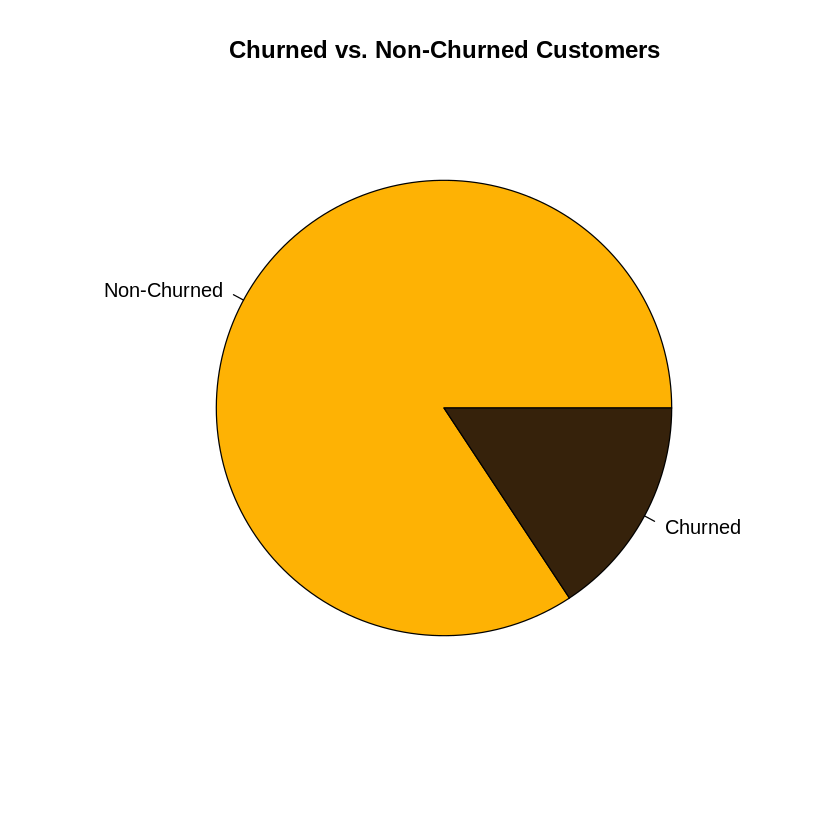

In [ ]:
pie(Churn_freq,
    labels = c("Non-Churned", "Churned"),
    col = c("#feb204","#36220b"),
    main = "Churned vs. Non-Churned Customers")

From the Pie Chart we are able to understand that the ratio of Churned customers are very less (15%) of the total dstribution . Majority of the dataset has values of non-churned customers. This shows a heavy imbalance in the dataset.



2) Age Category vs Churn

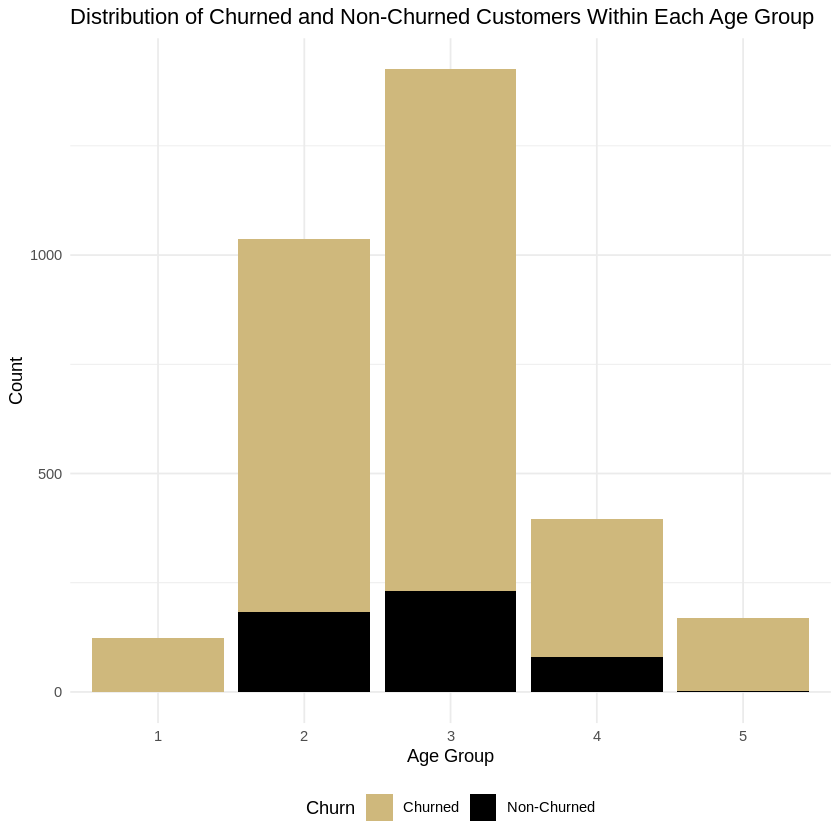

In [ ]:
age_churn_distribution <- table(df$Age_g, df$Churn)

# Convert the table to a data frame
age_churn_df <- as.data.frame(age_churn_distribution)
colnames(age_churn_df) <- c("Age_Group", "Churn", "Count")

ggplot(age_churn_df, aes(x = Age_Group, y = Count, fill = factor(Churn))) +
  geom_bar(stat = "identity") +
  labs(x = "Age Group", y = "Count", fill = "Churn") +
  scale_fill_manual(values = c("#CFB87C", "#000000"), labels = c("Churned", "Non-Churned")) +
  theme_minimal() +
  theme(legend.position = "bottom") +
  ggtitle("Distribution of Churned and Non-Churned Customers Within Each Age Group")

This bar plot shows the representation of Churned and non - Churned ratio with respectivee to different age categories. From this we can see that the maximum no of users of  Iranin telecom Company is of people from the age category of 30-39 age group. Also the churn ratio is very in this age category. Also we can see that people around age category 10-19 and 50-59 churn high.

### 3)Frequency of Calls vs Frequency of texts

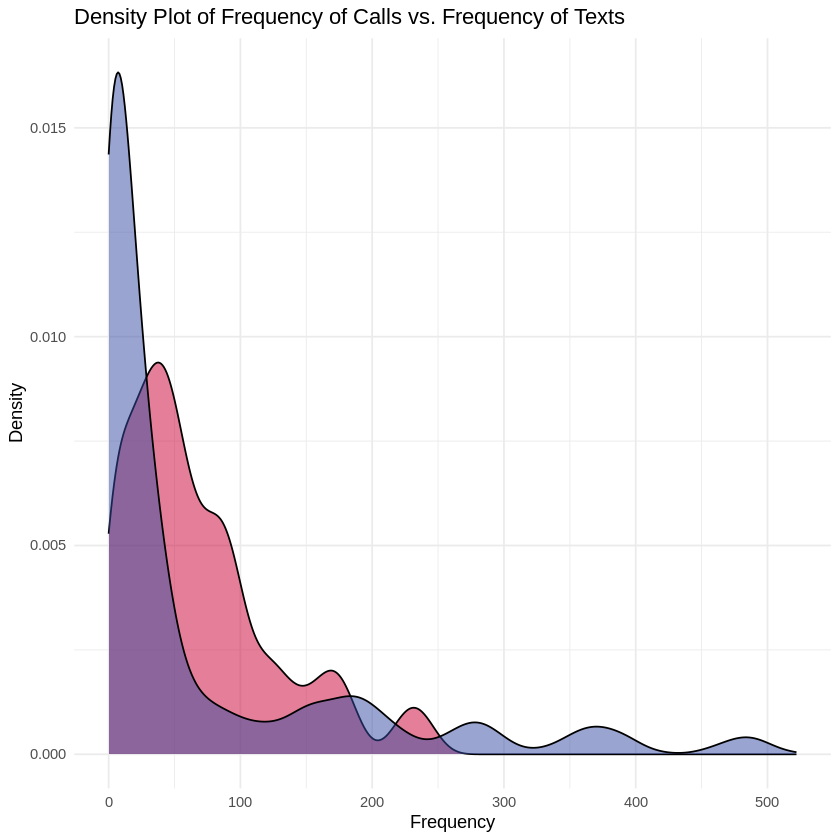

In [ ]:
ggplot(df, aes(x = Call_freq, fill = "Call_freq")) +
  geom_density(alpha = 0.5, color = "black", fill = "#CC0035") +
  geom_density(aes(x = SMS_freq, fill = "SMS_freq"), alpha = 0.5, color = "black", fill = "#354CA1") +
  scale_fill_manual(values = c("Frequency of Calls" = "#CC0035", "Frequency of Texts" = "#354CA1")) +
  labs(x = "Frequency", y = "Density") +
  ggtitle("Density Plot of Frequency of Calls vs. Frequency of Texts")+
  theme_minimal() +
  theme(legend.position = "top")

Density plot helps us to understand the distribution of the Frequency of calls and Frequemcy of SMS useage by customers in Iranian Telecom service.Both calls and texts have right-skewed distributions, with a higher concentration of customers using these services less frequently and fewer customers showing high usage. The mode of calls appears to be higher than for texts indicating that calling is the more frequent communication method among the majority of customers.The overlap area between the two distributions may represent a customer segment with a balanced use of both services.



### 4) Seconds of Use vs Complains

Warning message:
“The `guide` argument in `scale_*()` cannot be `FALSE`. This was deprecated in
ggplot2 3.3.4.
ℹ Please use "none" instead.”


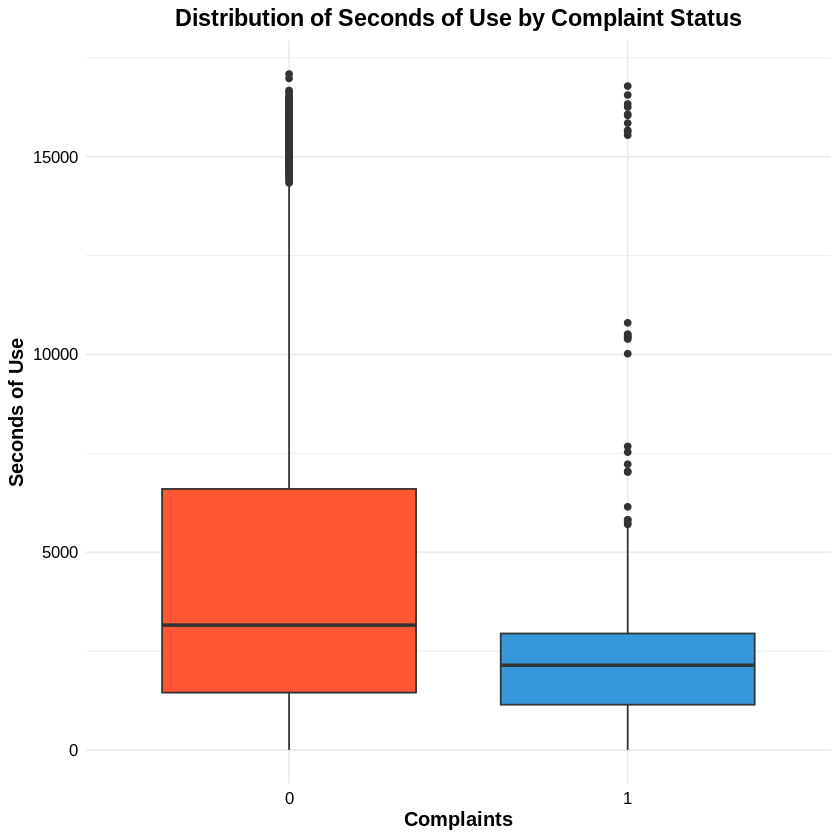

In [ ]:
ggplot(df, aes(x = factor(Complains), y = Use_sec, fill = factor(Complains))) +
  geom_boxplot() +
  labs(x = "Complaints", y = "Seconds of Use", fill = "Complaints") +
  scale_fill_manual(values = c("#FF5733", "#3498DB"), guide = FALSE) +  # Specify custom colors and hide legend
  theme_minimal() +
  theme(axis.title.x = element_text(size = 12, face = "bold"),  # Customize x-axis label
        axis.title.y = element_text(size = 12, face = "bold"),  # Customize y-axis label
        axis.text.x = element_text(size = 10, color = "black"),  # Customize x-axis tick labels
        axis.text.y = element_text(size = 10, color = "black"),  # Customize y-axis tick labels
        plot.title = element_text(size = 14, face = "bold", hjust = 0.5)) +  # Customize plot title
  ggtitle("Distribution of Seconds of Use by Complaint Status")  # Add plot title

The box plot suggests that customers who have not filed complaints exhibit a wider range of service usage times, indicating greater variability in behavior. Those who have filed complaints display a tighter interquartile range, implying more uniform usage among them. However, the mean usage time for customers who have complained is lower than for those who haven't, potentially pointing to a link between lower usage and higher dissatisfaction.

### 5)Distribution of Churned and Non-Churned Customers Within Each Tariff Plan

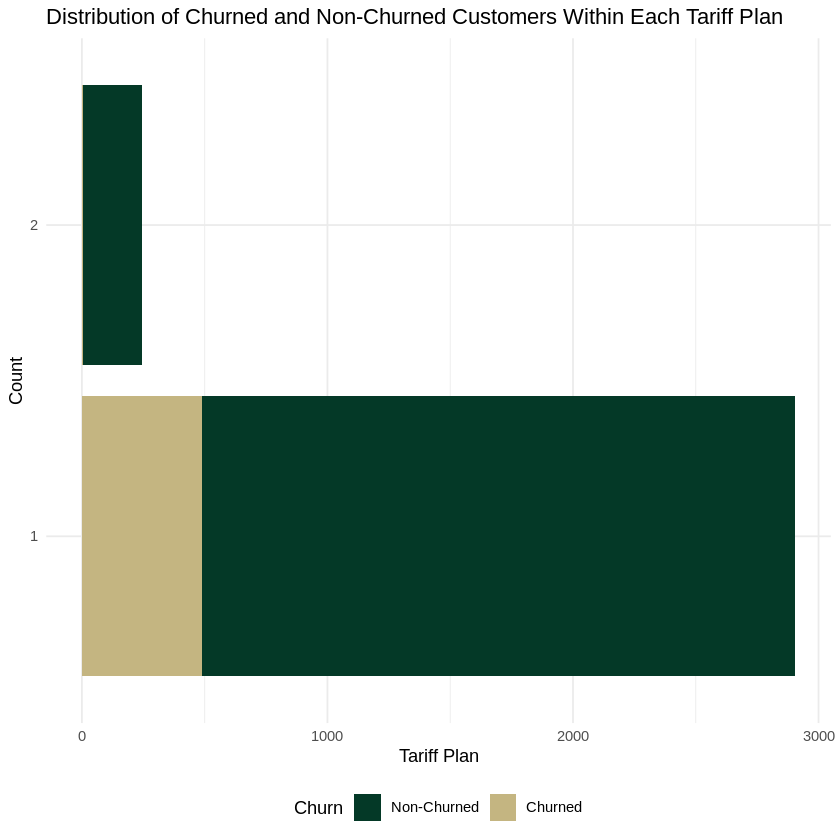

In [ ]:
tariff_churn_distribution <- table(df$T_plan, df$Churn)

tariff_churn_df <- as.data.frame(tariff_churn_distribution)
colnames(tariff_churn_df) <- c("Tariff_Plan", "Churn", "Count")

ggplot(tariff_churn_df, aes(x = Tariff_Plan, y = Count, fill = factor(Churn))) +
  geom_bar(stat = "identity") +
  labs(x = "Count", y = "Tariff Plan", fill = "Churn") +
  scale_fill_manual(values = c("#043927","#C4B581"), labels = c("Non-Churned", "Churned")) +
  theme_minimal() +
  theme(legend.position = "bottom") +
  coord_flip()+
  ggtitle("Distribution of Churned and Non-Churned Customers Within Each Tariff Plan")



The bar chart illustrates that customers subscribed to the pay-as-you-go plan (Plan 1) exhibit a greater tendency to switch providers compared to those on the contractual plan (Plan 2). The churn rate is notably higher for the pay-as-you-go plan, suggesting these customers are more prone to discontinuing their service. On the other hand, the contractual plan has a noticeably lower rate of customer turnover, indicating a level of contentment with the services provided. This pattern suggests that the commitment and potential benefits associated with the contractual plan may contribute to better customer loyalty.

### 6)Correlation Plot

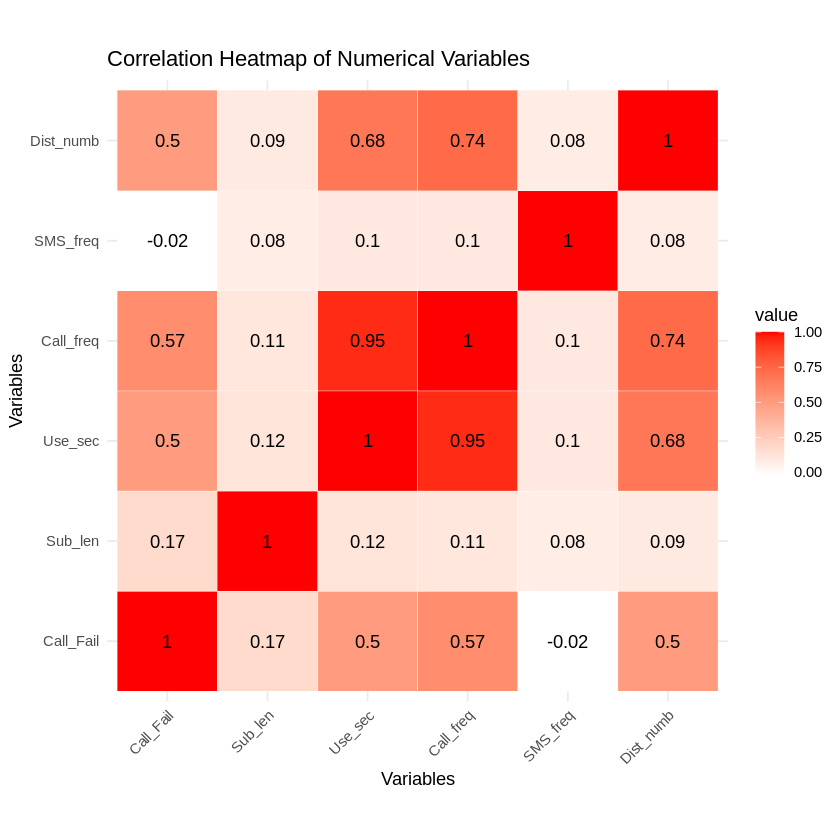

In [ ]:
numerical_df <- df[, c("Call_Fail", "Sub_len", "Use_sec", "Call_freq", "SMS_freq", "Dist_numb")]

correlation_matrix <- cor(numerical_df)

heatmap_plot <- ggplot(reshape2::melt(correlation_matrix), aes(Var1, Var2, fill = value, label = round(value, 2))) +
  geom_tile(color = "white") +
  geom_text(color = "black") +
  scale_fill_gradient(low = "White", high = "red") +
  labs(title = "Correlation Heatmap of Numerical Variables",
       x = "Variables", y = "Variables") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  coord_fixed()

print(heatmap_plot)

Correlation Plot to understand the relationship between each variables.Call_freq and Use_sec have high correlation and affect each other heavily .

### 7) Frequency of Calls and Frequency of SMS based on Subscription Length

In [ ]:
breaks <- c(0, 10, 20, 30, 40, 50, Inf)

labels <- c("Group 1", "Group 2", "Group 3", "Group 4", "Group 5", "Group 6")

df$Sub_Group <- cut(df$Sub_len, breaks = breaks, labels = labels, right = FALSE)
group_counts <- aggregate(cbind(Call_freq, SMS_freq) ~ Sub_Group, data = df, FUN = sum)

group_counts

Sub_Group,Call_freq,SMS_freq
<fct>,<dbl>,<dbl>
Group 1,2597,7851
Group 2,21327,16679
Group 3,22784,20073
Group 4,130515,138283
Group 5,41578,47615


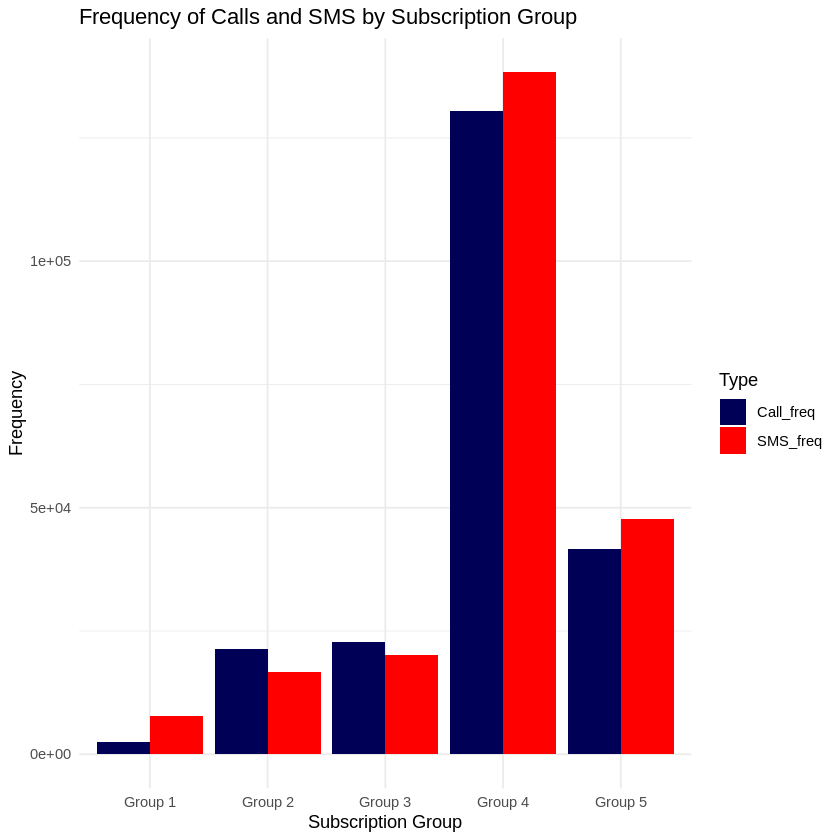

In [ ]:
group_counts_long <- pivot_longer(group_counts, cols = c(Call_freq, SMS_freq), names_to = "Type", values_to = "Frequency")

ggplot(group_counts_long, aes(x = Sub_Group, y = Frequency, fill = Type)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(x = "Subscription Group", y = "Frequency", fill = "Type") +
  ggtitle("Frequency of Calls and SMS by Subscription Group") +
  scale_fill_manual(values = c(Call_freq = "#010057", SMS_freq = "#ff0000"))+
  theme_minimal()

The double bar graph displays call and SMS frequencies across five subscription duration categories. Initial groups, likely with shorter durations, show a preference for calls over SMS. However, in the latter groups, presumed to be longer-term subscriptions, SMS usage surpasses call frequency. This pattern suggests that telecom companies should consider enhancing call features in plans for short-term subscribers, while emphasizing SMS services for customers with longer commitments. Adapting plans according to these usage trends could improve customer satisfaction and retention.

# **STATSTICAL TESTING :**

## **1) HYPOTHESIS TESTING**

**Test - 1 :**

"*Is there a significant difference in the average usage (measured in seconds of use) between customers subscribed to Tariff Plan 1 and those subscribed to Tariff Plan 2?"*

This research question aims to understand whether the type of tariff plan influences how long customers use their service, which could indicate varying levels of satisfaction, service quality, or customer engagement between different tariff plans.

**Test** : T-test

**Hypotheses:**

**Null Hypothesis (H0):** The average seconds of use for customers on Tariff Plan 1 is equal to that for customers on Tariff Plan 2.

**Alternative Hypothesis (H1):**The average seconds of use for customers on Tariff Plan 1 is not equal to that for customers on Tariff Plan 2.


In [ ]:
#Splitting Useage seconds data based on Traiff plans
tariff1_seconds <- df[df$T_plan == 1,]$Use_sec
tariff2_seconds <- df[df$T_plan == 2,]$Use_sec

#T-test
t_test_result <- t.test(tariff1_seconds, tariff2_seconds, alternative = "two.sided", var.equal = FALSE)
print(t_test_result)


	Welch Two Sample t-test

data:  tariff1_seconds and tariff2_seconds
t = -7.4271, df = 284.86, p-value = 1.295e-12
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2648.493 -1538.787
sample estimates:
mean of x mean of y 
 4309.621  6403.261 



### **Result:**

From the T test, we can observe that T value = -7.4271 which suggests that mean of sample tariff one is less than mean of sample tariff two as the value is obtained from the difference of two means. Also the obtained
 p-value = 1.295e-12 < 0.05 significance value.
Thus , we are rejecting NULL hypothesis and Proving that there is significant Difference in the Average seconds of use between different Tariff Plans provided by the telecom company.Specifically, customers on Tariff Plan 2 use the service more, on average, than those on Tariff Plan 1.

**Test - 2 :**

"Active customers are less likely to churn compared to non-active customers."
The chi-square test of independence will assess whether there is a significant relationship between the categorical variables Status (active or non-active) and Churn (churned or not churned). If the test results in a low p-value, we reject the null hypothesis, suggesting that there is evidence to support the alternative hypothesis. This would indicate that there is indeed an association between the status of customers and their likelihood to churn.

**Test:** Chi-square test of independence.


**Null Hypothesis (H0):** There is no association between Status and Churn. In other words, the proportion of churned customers is the same among active and non-active customers.

**Alternative Hypothesis (H1):** There is an association between Status and Churn. Specifically, active customers are less likely to churn compared to non-active customers.



In [ ]:
#Creating a dataframe to store customer status and respective churn values
contingency_table <- table(df$Status, df$Churn)

#chi-square test
chi_square_result <- chisq.test(contingency_table)
print(chi_square_result)


	Pearson's Chi-squared test with Yates' continuity correction

data:  contingency_table
X-squared = 781.11, df = 1, p-value < 2.2e-16



### **Result**:

From the chi Square test we observe that the test statistic value, that is chi squared value = 781.11 , which is very large shows that there is strong association between status and churn . P value of the test = 2.2e-16 < 0.05 significance level provides  proof to Reject the Null hypothesis . Thus we come to a conclusion that there is an association between Status and Churn. Specifically, active customers are less likely to churn compared to non-active customers.

##**2)ANOVA TEST:**

**Hypothesis - 1**

"*Are there significant differences in the customer value among different age groups of customers?*"

This question seeks to explore if customer value, which could reflect the revenue generated or the profitability from customers, varies significantly across age groups. This can help in tailoring marketing strategies, customer service enhancements, and product offerings to different demographic segments based on their value contribution.

**Test** : ANOVA

**Hypotheses:**
**Null Hypothesis (H0):** There is no difference in the mean customer value across the age groups.
**Alternative Hypothesis (H1):** At least one age group has a different mean customer value from others.

In [ ]:
anova_result <- aov(Cust_value ~ Age_g, data = df)
summary(anova_result)

              Df    Sum Sq  Mean Sq F value Pr(>F)    
Age_g          1  28337571 28337571   109.7 <2e-16 ***
Residuals   3148 813405741   258388                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### **Result**:

The results of the ANOVA test show that we are rejecting the null hypothesis as obtained p value <0.05.

From which we are concluding that the mean customer value from vary across different age groups.

**Hypothesis - 2**

 There is a significant difference in the mean frequency of calls (Call_freq) across different age groups.

**Test:** ANOVA to compare the mean frequency of calls among different age groups (Age Group 1, 2, 3, 4, 5).

**Null Hypothesis (H0):** The mean frequency of calls is equal across all age groups.

**Alternative Hypothesis (H1):** At least one age group has a different mean frequency of calls compared to the others.

In [ ]:
annova_result2 <- aov(Call_freq ~ Age_g, data = df)

summary(annova_result2)

              Df   Sum Sq Mean Sq F value Pr(>F)  
Age_g          1    10993   10993   3.338 0.0678 .
Residuals   3148 10369017    3294                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### **Result**:

From the Anova Test Result , we are able to identify that the P value = 0.0678 > 0.05 thus we are accepting the NULL hypothesis.

Which states that the mean call frequency across all age group are same.

**Hypothesis - 3**

There is a significant difference in the mean frequency of calls (SMS_freq) across different age groups.

**Test:** ANOVA to compare the mean frequency of sms among different age groups (Age Group 1, 2, 3, 4, 5).

**Null Hypothesis (H0):** The mean frequency of sms is equal across all age groups.

**Alternative Hypothesis (H1):** At least one age group has a different mean frequency of calls compared to the others.



In [ ]:
annova_result3 <- aov(SMS_freq ~ Age_g, data = df)

summary(annova_result3)

              Df   Sum Sq Mean Sq F value  Pr(>F)   
Age_g          1   114472  114472    9.11 0.00256 **
Residuals   3148 39554331   12565                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### **Result** :

From the Anova Test Result , we are able to identify that the P value = 0.00256 < 0.05 thus we have strong evidence to Reject the NULL hypothesis.

Which states that the mean SMS frequency across atleast one of the age group are differ.

## **Summary** :

From the three Anova test hypothesis , we were able to figure out that customer values differ across the age group , which gives us a idea to approach and create stratergies for differenct age groups uniquely .

To identify more precise strategies we performed 2 hypothesis for Call Frequency and SMS frequency services , as they play a major role in the telecom useage rating.

The result from the Call frequency anova test we observed that the sample mean was same for all the age category, which shows that all age category customers use the call services equally so there isnt much room for improvement in this sector.

From the SMS frequency anova test we observed that the sample mean differed for all the age category. From which we are able to infer that most of the customers spend time on sms , due to the age criteria. From EDA ,20-29 and 30-39 age category customers are high and prefer texting. Thus leveraging plans on increasing the sms count can help in increasing CLV value and reduce churn ratio.  

##**3) Regression Modeling**

**Shapiro - Wilk Test :**

Checking the normality of numerical attributes in the dataset

In [ ]:
colnames(df)

[1] "Call_Fail"  "Complains"  "Sub_len"    "Charge_amt" "Use_sec"   
 [6] "Call_freq"  "SMS_freq"   "Dist_numb"  "Age_g"      "T_plan"    
[11] "Status"     "Age"        "Cust_value" "Churn"      "Sub_Group"

In [ ]:
df$Charge_amt

[1]  0  0  0  0  0  1  0  2  0  1  0  0  3  1  0  1  0  0  0  0  1  1  0  8
  [25]  1  0  0  0  0  0  1  0  1  3  3  0  0  0  1  0  0  0  0  0  0  1  0  3
  [49]  1  1  1  1  1  1  1  2  1  3  1  2  1  1  4  2  1  2  1  1  1  1  2  2
  [73]  1  9  2  1  1  1  1  1  2  1  2  4  4  1  1  1  2  1  1  1  1  1  1  2
  [97]  1  4  2  2  0  0  0  0  0  0  0  1  0  0  0  0  2  0  0  0  0  0  0  0
 [121]  0  0  0  7  0  0  0  0  0  0  0  0  0  2  2  0  0  0  0  0  0  0  0  0
 [145]  0  0  0  2  0  0  1  0  1  1  1  2  1  3  1  2  1  0  4  2  1  2  0  0
 [169]  0  1  2  2  0  9  2  1  0  0  0  1  2  0  2  4  4  1  0  1  2  1  0  0
 [193]  1  1  1  2  1  4  2  2  0  0  0  0  0  0  0  1  0  0  0  0  2  0  0  0
 [217]  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  2  2  0  0  0  0  0
 [241]  0  0  0  0  0  0  0  2  0  0  1  0  1  1  1  2  1  3  1  2  1  0  4  2
 [265]  1  2  0  0  0  1  2  2  0  9  2  1  0  0  0  1  2  0  2  4  4  1  0  1
 [289]  2  1  0  0  1  1  1  2  1  4  2  2  0  0  0  0  0  0  0  1  0  0  0  0
 [313]  2  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  2  2  0
 [337]  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  1  0  2  0  1
 [361]  0  0  3  1  0  1  0  0  0  0  1  1  0  8  1  0  0  0  0  0  1  0  1  3
 [385]  3  0  0  0  1  0  0  0  0  0  0  1  0  3  1  1  0  0  0  0  0  1  0  2
 [409]  0  1  0  0  3  1  0  1  0  0  0  0  1  1  0  8  1  0  0  0  0  0  1  0
 [433]  0  3  3  0  0  0  1  0  0  0  0  0  0  1  0  3  1  1  2  0  2  2  2  3
 [457]  2  4  2  3  2  0  5  3  2  3  0  0  0  2  3  3  0 10  3  2  0  0  0  2
 [481]  3  0  3  5  5  2  0  2  3  2  0  0  2  2  2  3  2  5  3  3  0  0  0  0
 [505]  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0
 [529]  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  1  0
 [553]  1  1  1  2  1  3  1  2  1  0  4  2  1  2  0  0  0  1  2  2  0  9  2  1
 [577]  0  0  0  1  2  0  2  4  4  1  0  1  2  1  0  0  1  1  1  2  1  4  2  2
 [601]  0  0  0  0  0  0  0  1  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  7
 [625]  0  0  0  0  0  0  0  0  0  2  2  0  0  0  0  0  0  0  0  0  0  0  0  2
 [649]  0  0  0  0  0  0  0  1  0  2  0  1  0  0  3  1  0  1  0  0  0  0  1  1
 [673]  0  8  1  0  0  0  0  0  1  0  1  3  3  0  0  0  1  0  0  0  0  0  0  1
 [697]  0  3  1  1  0  0  0  0  0  1  0  2  0  1  0  0  3  1  0  1  0  0  0  0
 [721]  1  1  0  8  1  0  0  0  0  0  1  0  1  3  3  0  0  0  1  0  0  0  0  0
 [745]  0  1  0  3  1  1  0  0  0  0  0  0  0  1  0  0  0  0  2  0  0  0  0  0
 [769]  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  2  2  0  0  0  0  0  0  0
 [793]  0  0  0  0  0  2  0  0  1  0  1  1  1  2  1  3  1  2  1  0  4  2  1  2
 [817]  0  0  0  1  2  2  0  9  2  1  0  0  0  1  2  0  2  4  4  1  0  1  2  1
 [841]  0  0  1  1  1  2  1  4  2  2  1  0  1  1  1  2  1  3  1  2  1  0  4  2
 [865]  1  2  0  0  0  1  2  2  0  9  2  1  0  0  0  1  2  0  2  4  4  1  0  1
 [889]  2  1  0  0  1  1  1  2  1  4  2  2  0  0  0  0  0  0  0  1  0  0  0  0
 [913]  2  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  2  2  0
 [937]  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  1  0  2  0  1
 [961]  0  0  3  1  0  1  0  0  0  0  1  1  0  8  1  0  0  0  0  0  1  0  1  3
 [985]  3  0  0  0  1  0  0  0  0  0  0  1  0  3  1  1  0  0  0  0  0  1  0  2
[1009]  0  1  0  0  3  1  0  1  0  0  0  0  1  1  0  8  1  0  0  0  0  0  1  0
[1033]  1  3  3  0  0  0  1  0  0  0  0  0  0  1  0  3  1  1  0  0  0  0  0  0
[1057]  0  1  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0
[1081]  0  0  0  2  2  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0
[1105]  0  1  0  2  0  1  0  0  3  1  0  1  0  0  0  0  1  1  0  8  1  0  0  0
[1129]  0  0  1  0  1  3  3  0  0  0  1  0  0  0  0  0  0  1  0  3  1  1  0  0
[1153]  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  6  0  0
[1177]  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0
[1201]  0  0  0  0  0  1  0  2  0  1  0  0  3  1  0  

In [ ]:
# Selecting the desired columns and creating a new dataset
num_val <- df[, c("Call_Fail", "Sub_len", "Charge_amt", "Use_sec","Dist_numb", "Call_freq", "SMS_freq","Cust_value")]
str(num_val)

tibble [3,150 × 8] (S3: tbl_df/tbl/data.frame)
 $ Call_Fail : num [1:3150] 8 0 10 10 3 11 4 13 7 7 ...
 $ Sub_len   : num [1:3150] 38 39 37 38 38 38 38 37 38 38 ...
 $ Charge_amt: num [1:3150] 0 0 0 0 0 1 0 2 0 1 ...
 $ Use_sec   : num [1:3150] 4370 318 2453 4198 2393 ...
 $ Dist_numb : num [1:3150] 17 4 24 35 33 28 18 43 44 25 ...
 $ Call_freq : num [1:3150] 71 5 60 66 58 82 39 121 169 83 ...
 $ SMS_freq  : num [1:3150] 5 7 359 1 2 32 285 144 0 2 ...
 $ Cust_value: num [1:3150] 198 46 1537 240 146 ...


In [ ]:
head(num_val)

Call_Fail,Sub_len,Charge_amt,Use_sec,Dist_numb,Call_freq,SMS_freq,Cust_value
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,38,0,4370,17,71,5,197.640
0,39,0,318,4,5,7,46.035
10,37,0,2453,24,60,359,1536.520
10,38,0,4198,35,66,1,240.020
3,38,0,2393,33,58,2,145.805
11,38,1,3775,28,82,32,282.280


In [ ]:
# Selecting the desired columns and creating a new dataset
cat_val <- df[, c("Complains", "Age_g", "T_plan", "Status")]
# Checking the structure of the new dataset
str(cat_val)

tibble [3,150 × 4] (S3: tbl_df/tbl/data.frame)
 $ Complains: num [1:3150] 0 0 0 0 0 0 0 0 0 0 ...
 $ Age_g    : num [1:3150] 3 2 3 1 1 3 3 3 3 3 ...
 $ T_plan   : num [1:3150] 1 1 1 1 1 1 1 1 1 1 ...
 $ Status   : num [1:3150] 1 2 1 1 1 1 1 1 1 1 ...


In [ ]:
# List to store the results
shapiro_results <- list()

# Function to print the result message
print_result <- function(attribute, p_value) {
  cat("Attribute:", attribute, "\n")
  cat("Shapiro-Wilk test p-value:", p_value, "\n")
  if (p_value < 0.05) {
    cat(attribute, "doesn't follow a normal distribution.\n")
  } else {
    cat(attribute, "follows a normal distribution.\n")
  }
  cat("\n")
}

# Shapiro-Wilk test for each attribute
for (attribute in names(num_val)) {
  shapiro_test_result <- shapiro.test(num_val[[attribute]])
  shapiro_results[[attribute]] <- shapiro_test_result$p.value
  print_result(attribute, shapiro_test_result$p.value)
}

Attribute: Call_Fail 
Shapiro-Wilk test p-value: 1.197194e-42 
Call_Fail doesn't follow a normal distribution.

Attribute: Sub_len 
Shapiro-Wilk test p-value: 1.264421e-44 
Sub_len doesn't follow a normal distribution.

Attribute: Charge_amt 
Shapiro-Wilk test p-value: 4.048419e-62 
Charge_amt doesn't follow a normal distribution.

Attribute: Use_sec 
Shapiro-Wilk test p-value: 3.820692e-48 
Use_sec doesn't follow a normal distribution.

Attribute: Dist_numb 
Shapiro-Wilk test p-value: 6.855205e-36 
Dist_numb doesn't follow a normal distribution.

Attribute: Call_freq 
Shapiro-Wilk test p-value: 6.811963e-42 
Call_freq doesn't follow a normal distribution.

Attribute: SMS_freq 
Shapiro-Wilk test p-value: 9.304905e-61 
SMS_freq doesn't follow a normal distribution.

Attribute: Cust_value 
Shapiro-Wilk test p-value: 1.14844e-52 
Cust_value doesn't follow a normal distribution.



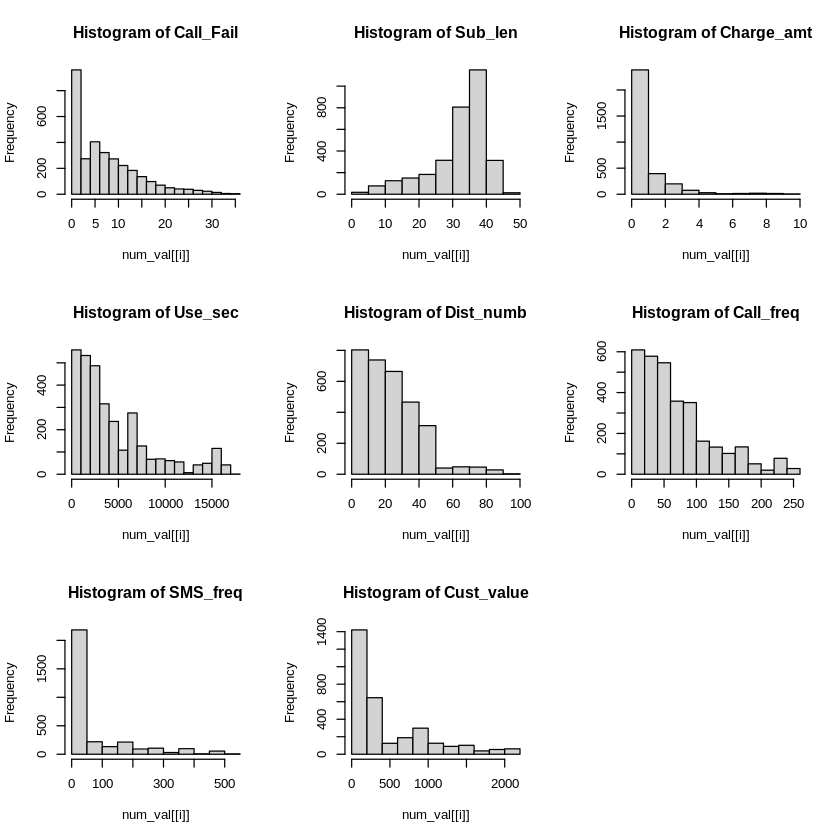

In [ ]:
# Check distribution of numerical variables with histograms
par(mfrow = c(3, 3))
for (i in 1:ncol(num_val)) {
  if (is.numeric(num_val[[i]])) {
    hist(num_val[[i]], main = paste("Histogram of", names(num_val)[i]))
  }
}
par(mfrow = c(1, 1))

# Check distribution of categorical variables with tables
cat_vars <- sapply(num_val, is.factor)
for (i in 1:length(cat_vars)) {
  if (cat_vars[i]) {
    cat_table <- table(num_val[[i]])
    cat_name <- names(num_val)[i]
    cat_name <- ifelse(cat_name == "", "Unnamed", cat_name)
    cat_name <- paste("Table for", cat_name)
    print(cat_name)
    print(cat_table)
  }
}


As the Dataset doesnt follow normal distribution , we are trying to transform all the attrbitute to normal distrbution .

Thus implementing two transformation techniques :

1) Log - transformation

2)SQRT transformation


**Log - Transformation**

In [ ]:
#Log Transformation
log_df<-log(num_val+1)
head(log_df)

,Call_Fail,Sub_len,Charge_amt,Use_sec,Dist_numb,Call_freq,SMS_freq,Cust_value
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2.197225,3.663562,0.0000000,8.382747,2.890372,4.276666,1.7917595,5.291494
2,0.000000,3.688879,0.0000000,5.765191,1.609438,1.791759,2.0794415,3.850892
3,2.397895,3.637586,0.0000000,7.805475,3.218876,4.110874,5.8861040,7.337926
4,2.397895,3.663562,0.0000000,8.342602,3.583519,4.204693,0.6931472,5.484880
5,1.386294,3.663562,0.0000000,7.780721,3.526361,4.077537,1.0986123,4.989105
6,2.484907,3.663562,0.6931472,8.236421,3.367296,4.418841,3.4965076,5.646436


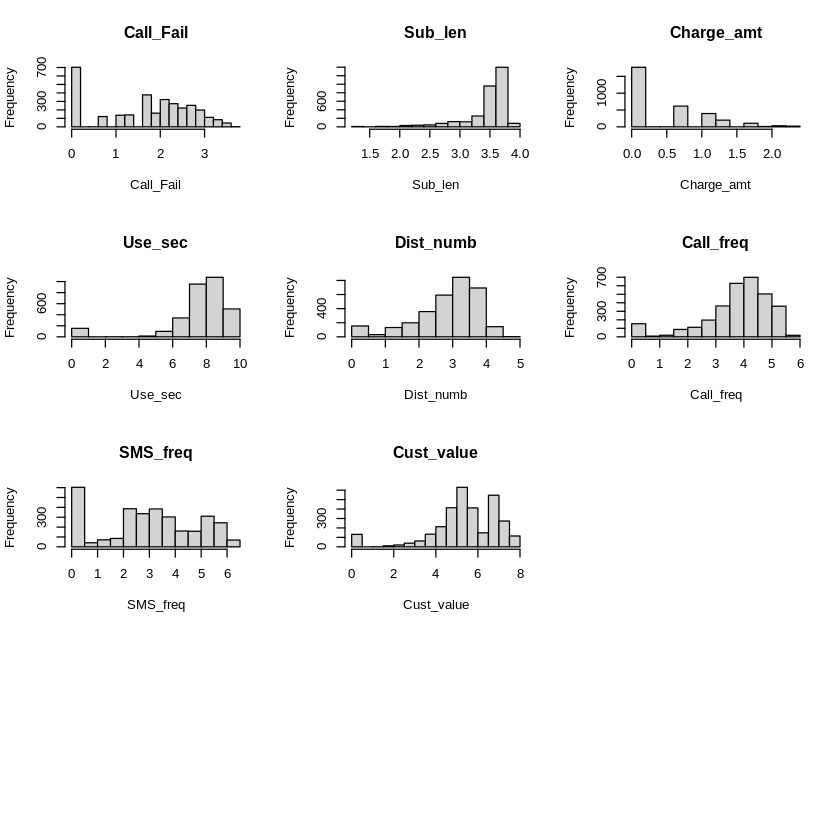

In [ ]:
# Histograms for each log transformed variables
par(mfrow = c(4, 3))
for (col in names(log_df)) {
  hist(log_df[[col]], main = col, xlab = col)
}

**Square root Transformation**

In [ ]:
#SQRT transformation
sqrt_transformed_df <- as.data.frame(apply(num_val, 2, sqrt))


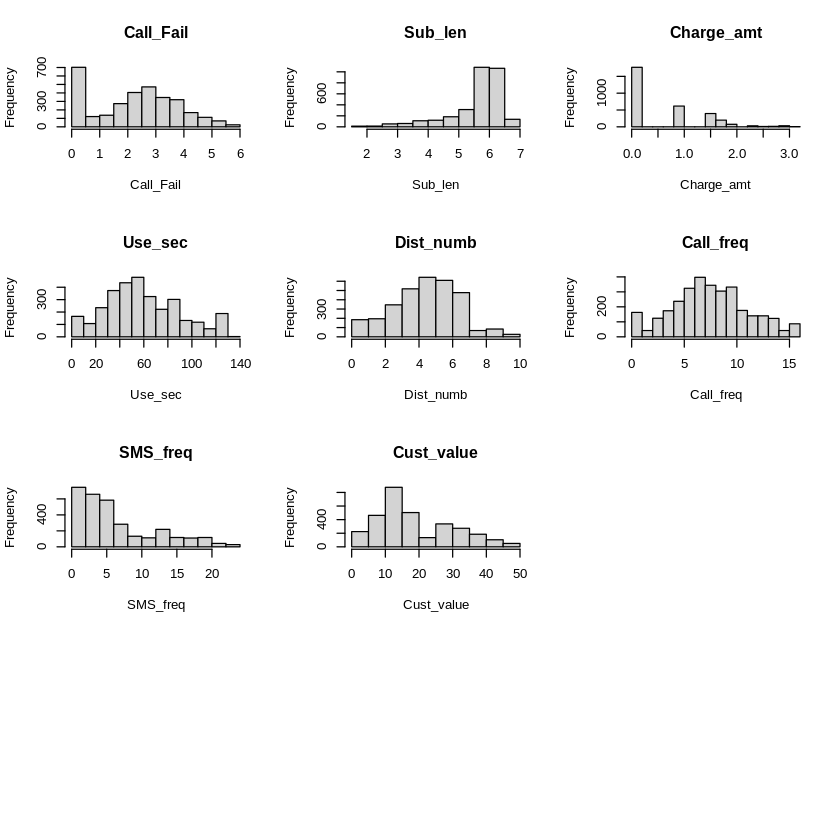

In [ ]:
par(mfrow = c(4, 3))
#Histograms for each sqrt transformed variable
for (col in names(sqrt_transformed_df)) {
  hist(sqrt_transformed_df[[col]], main = col, xlab = col)
}


Comparing the distributions of both log transformed and sqsrt trasnformed data , we are able to find out that the SQRT transformed variable distribution tends to show more normal distribution characteristics compared to the log transformed data.

Hence we are using the sqrt transformed data for Linear modelling

### **Linear Modelling : Sqaure transformed data**

In [ ]:
colnames(sqrt_transformed_df)

[1] "Call_Fail"  "Sub_len"    "Charge_amt" "Use_sec"    "Dist_numb" 
[6] "Call_freq"  "SMS_freq"   "Cust_value"

In [ ]:
set.seed(11111)
n <- floor(0.8 * nrow(df))  # Determine the number of rows for the training set
index <- sample(seq_len(nrow(df)), size = n)  # Generate random indices for the training set
train <- sqrt_transformed_df[index, ]  # Create the training set
test <- sqrt_transformed_df[-index, ]  # Create the testing set
cat("There are", dim(train)[1], "rows and", dim(train)[2], "columns in the training set.\n")
cat("There are", dim(test)[1], "rows and", dim(test)[2], "columns in the testing set.\n")

There are 2520 rows and 8 columns in the training set.
There are 630 rows and 8 columns in the testing set.


In [ ]:
#Full model
full_sqrt_model <- lm(Cust_value ~ ., data = train)
summary(full_sqrt_model)


Call:
lm(formula = Cust_value ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.310  -1.032   0.066   1.526   9.154 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.318372   0.379801  -3.471 0.000527 ***
Call_Fail   -0.328436   0.053322  -6.160 8.47e-10 ***
Sub_len      0.301381   0.065371   4.610 4.22e-06 ***
Charge_amt  -0.938466   0.100746  -9.315  < 2e-16 ***
Use_sec      0.158355   0.006280  25.215  < 2e-16 ***
Dist_numb   -0.116289   0.052367  -2.221 0.026463 *  
Call_freq    0.136371   0.063651   2.142 0.032251 *  
SMS_freq     1.529519   0.009943 153.822  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.801 on 2512 degrees of freedom
Multiple R-squared:  0.9394,	Adjusted R-squared:  0.9393 
F-statistic:  5568 on 7 and 2512 DF,  p-value: < 2.2e-16


In [ ]:
#Calculating the MSPE Value
predictedsqrt <- predict(full_sqrt_model, newdata = test)
mspesqrt <- mean((test$Cust_value - predictedsqrt)^2)
cat("MSPE = ",mspesqrt)

MSPE =  7.276996

In [ ]:
alpha_crit <- 0.05
# Extract p-values and remove intercept
p_values <- summary(full_sqrt_model)$coefficients[-1, "Pr(>|t|)"]

# Get the maximum p-value and its attribute name
max_p_value_index <- which.max(p_values)
max_p_value <- max(p_values)
max_p_att <- names(p_values)[max_p_value_index]

# Check if the maximum p-value exceeds the critical alpha value
if (max_p_value > alpha_crit) {
  cat("Remove\nAttribute Name::", max_p_att, "\nMaximum p-value", max_p_value)
} else {
  print("No need to remove attribute")
}

[1] "No need to remove attribute"


As the maximum pvalue for all the variables are less than the alpha critcial value we are not removing any variable for updated model.

Thus model with 7 predictor is considered to be the best model

### 4)AIC , BIC ,  Adjusted R^2 comparision|

In [ ]:
library(leaps)
library(MASS)

n <- dim(train)[1]
reg <- regsubsets(Cust_value ~ ., data = train)
rs <- summary(reg)
rs$which


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




,(Intercept),Call_Fail,Sub_len,Charge_amt,Use_sec,Dist_numb,Call_freq,SMS_freq
1,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
2,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE
3,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE
4,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE
5,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE
6,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE
7,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


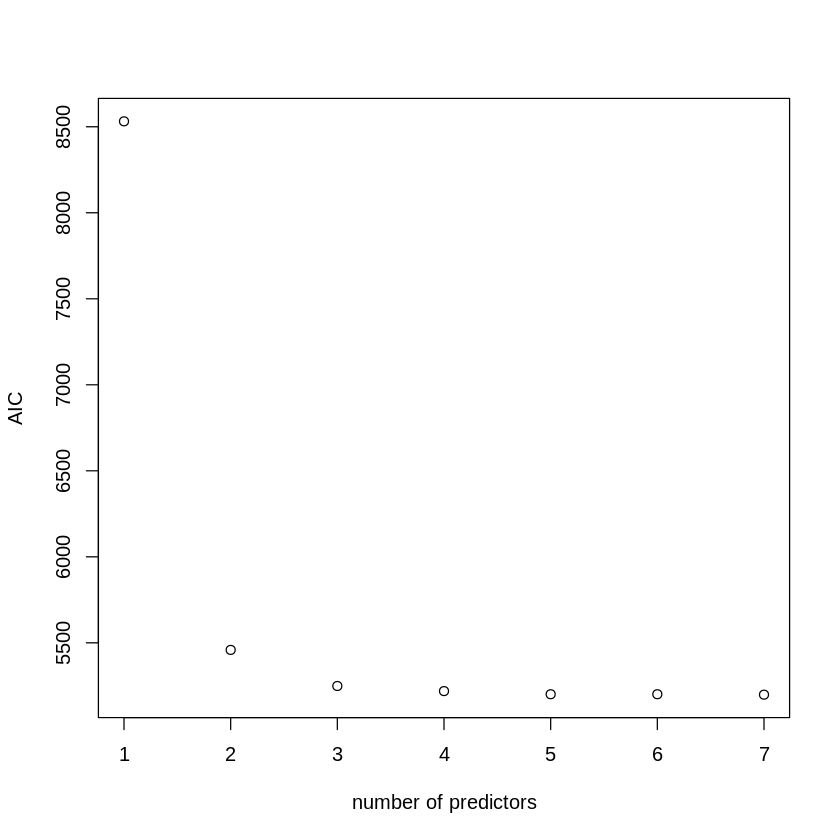

In [ ]:
# Calculating AIC
AIC <- 2 * (2:8) + n * log(rs$rss/n)
plot(AIC ~ I(1:7), xlab = "number of predictors", ylab = "AIC")

### **Result:**

Based on the AIC value , the model containing seven predictors shows the lowest AIC value among all the models evaluated.The model with the lowest AIC value is regarded as the most favorable, indicating a better trade-off between model fit and complexity.

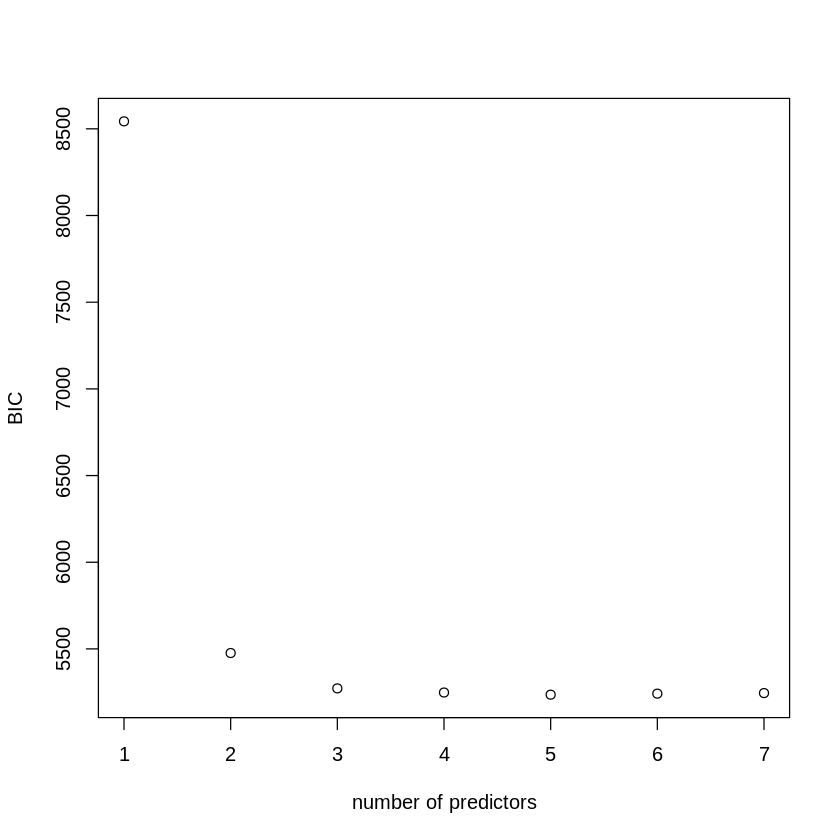

In [ ]:
#Calculating BIC
BIC <- log(n) * (2:8) + n * log(rs$rss/n)
plot(BIC ~ I(1:7), xlab = "number of predictors", ylab = "BIC")

### **Result :**

The model containing seven predictors shows the lowest BIC value, indicating its superiority among the models under consideration. In BIC-based model selection, preference is typically given to the model with the lowest BIC value, as it signifies the optimal compromise between model fitness and complexity.

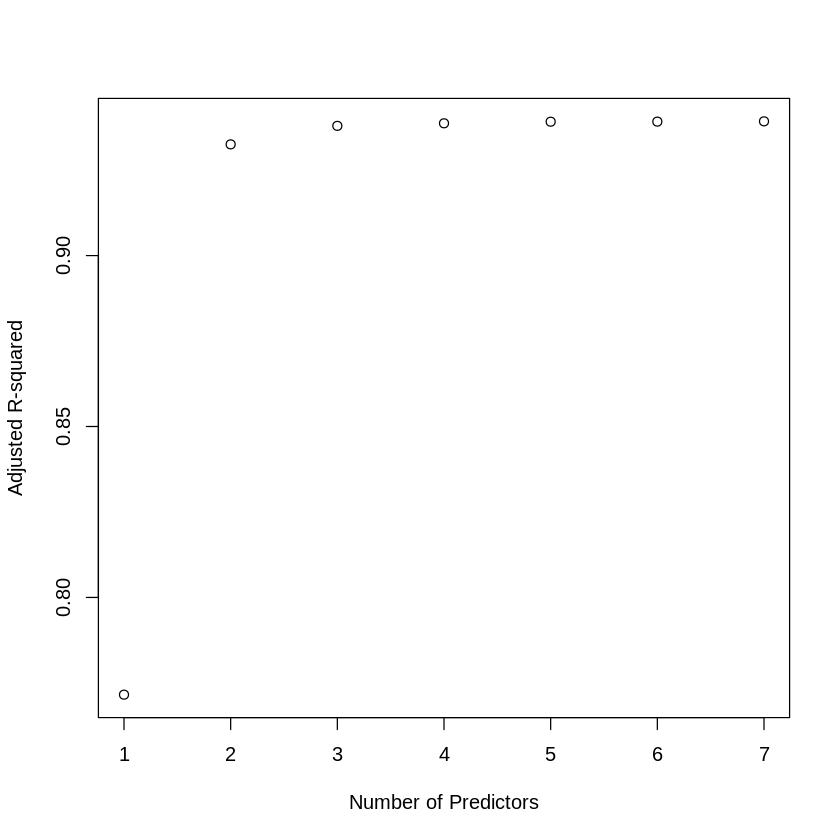

In [ ]:
#Calculating Adjusted R^2
plot(1:7, rs$adjr2, xlab = "Number of Predictors", ylab = "Adjusted R-squared")

### **Result :**

The model with seven parameters demonstrates the highest adjusted R-squared value, suggesting that it explains a substantial proportion of the variability in the response variable while accounting for the number of predictors. This indicates that the model with seven parameters provides the best balance, making it a suitable choice for capturing the relationship between the predictors and the response variable.

## **Summary :**

Based on the results from all the model comparisions test , we figure out that the best fit model for calculating the Customer Lifetime Value (CLV) is generated based on 7 parameters.As the result from AIC , BIC , Adjusted R^2 shows model with 7 parameters provide the best outcome.

Thus the final seven parameters used to calculate the CLV value are :

Call_Fail, Sub_len, Charge_amt, Use_sec, Dist_numb, Call_freq, SMS_freq,Cust_value

### **5)Diagnostics Plot : SQRT transformed model**

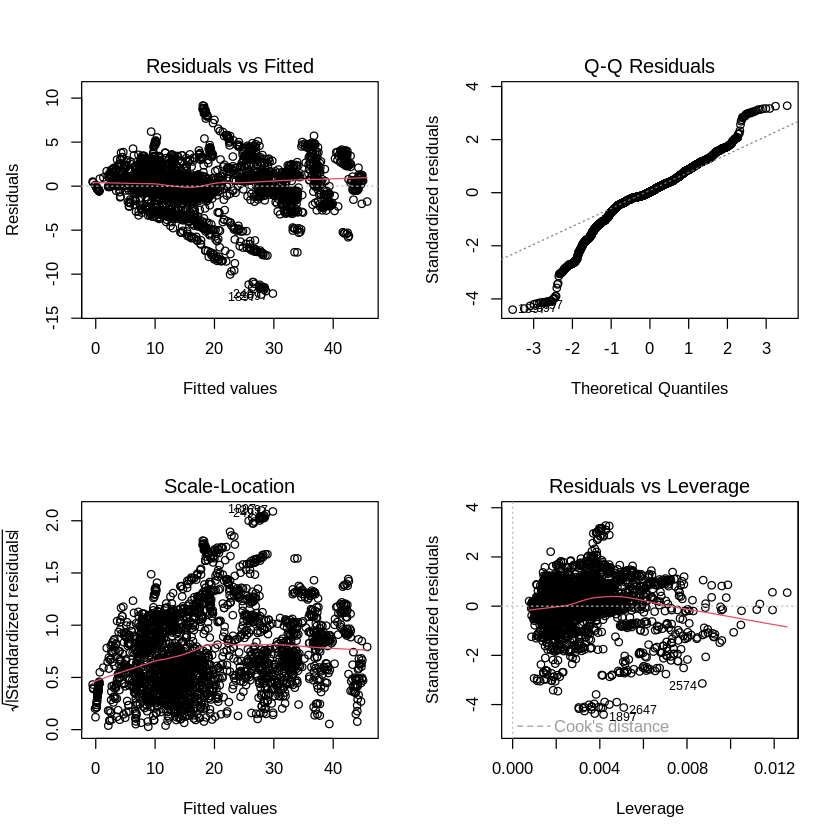

In [ ]:
par(mfrow = c(2, 2))
plot(full_sqrt_model)

### **Result :**

**Residuals vs Fitted:**

This plot evaluates whether residuals exhibit any systematic patterns. Ideally, residuals should scatter randomly around the horizontal line (representing zero residual). However, in this plot, we observe a widening pattern of residuals as fitted values increase, suggesting potential issues with non-constant variance (heteroscedasticity).

**Normal Q-Q Plot:**

The Q-Q plot assesses the normality of residuals by comparing them to a theoretical normal distribution. Ideally, residuals should align closely with the reference line. However, deviations from this line, particularly at the tails, indicate departures from normality, possibly indicating heavier tails in the distribution.

**Scale-Location Plot:**

This plot examines whether residuals exhibit consistent spread across the range of predictors. Similar to the Residuals vs Fitted plot, it indicates non-random patterns, particularly a rising curve, suggesting heteroscedasticity varying spread of residuals across predictor values.

**Residuals vs Leverage:**

This plot identifies influential cases  observations that strongly affect regression coefficient estimation. High leverage points, situated far to the right, merit attention. While some points show elevated leverage, none exceed the Cook's distance lines, suggesting no outliers significantly impacting the model.


From the graphs outcome we are able to figure out that the model defies all the intial assumption of normality.Thus its better to perform logistic regression or some other techniques to solve the problem and generate a better model.

Checking Call_freq of Churned AND Non Churned customers


In [ ]:
churned_Callfreq <- df[df$Churn == 1, "Call_freq"]
length(churned_Callfreq$Call_freq)

non_churned_Call_freq<-df[df$Churn==0,"Call_freq"]
length(non_churned_Call_freq$Call_freq)

[1] 495

[1] 2655

### **6)Confidence Intervals  :**



In [ ]:
mean_churned_CFreq<-mean(churned_Callfreq$Call_freq)
LB_churned_CFreq<-quantile(churned_Callfreq$Call_freq,0.025)
UB_churned_CFreq<-quantile(churned_Callfreq$Call_freq,0.975)

In [ ]:
cat("Confidence Interval for Mean Call Failures (Churned) before BOOTSTRAP:\n")
cat("Mean:", mean_churned_CFreq, "\n")
cat("Lower Bound:", LB_churned_CFreq, "\n")
cat("Upper Bound:", UB_churned_CFreq, "\n")

Confidence Interval for Mean Call Failures (Churned) before BOOTSTRAP:
Mean: 29.13333 
Lower Bound: 0 
Upper Bound: 95.65 


In [ ]:
mean_nonchurned_CFreq<-mean(non_churned_Call_freq$Call_freq)
LB_nonchurned_CFreq<-quantile(non_churned_Call_freq$Call_freq,0.025)
UB_nonchurned_CFreq<-quantile(non_churned_Call_freq$Call_freq,0.975)

In [ ]:
cat("Confidence Interval for Mean Call Failures (NON_Churned) before BOOTSTRAP:\n")
cat("Mean:", mean_nonchurned_CFreq, "\n")
cat("Lower Bound:", LB_nonchurned_CFreq, "\n")
cat("Upper Bound:", UB_nonchurned_CFreq, "\n")

Confidence Interval for Mean Call Failures (NON_Churned) before BOOTSTRAP:
Mean: 76.97928 
Lower Bound: 0 
Upper Bound: 231 


We are able to see that the confidence interval values of Call failures for Churned and Non Churned customers. Next step we would perform bootstrapping to cross check if the confidence intervals after performing provides simalr output.

### **7)Bootstrapping**

Call Failures - Churned Customers

In [ ]:
num_bootstraps <- 3000

bootstrap_statistic <- function(data) {
  return(mean(data))
}

# Perform bootstrapping
churned_Callfreq_bootstrap_results <- replicate(num_bootstraps, {
  bootstrap_sample <- sample(churned_Callfreq$Call_freq, replace = TRUE)
  bootstrap_statistic(bootstrap_sample)
})

# Calculate the observed statistic
churned_BS_mean <- mean(churned_Callfreq_bootstrap_results)
churned_BS_mean

LB_churned_BS<-quantile(churned_Callfreq_bootstrap_results,0.025)
UB_churned_BS<-quantile(churned_Callfreq_bootstrap_results,0.975)

[1] 29.1425

### Confidence Interval of Bootstrapped sample Call failures of Churned Customers

In [ ]:
cat("Confidence Interval for Mean Call Failures (Churned):\n")
cat("Mean:", churned_BS_mean, "\n")
cat("Lower Bound:", LB_churned_BS, "\n")
cat("Upper Bound:", UB_churned_BS, "\n")

Confidence Interval for Mean Call Failures (Churned):
Mean: 29.1425 
Lower Bound: 26.77369 
Upper Bound: 31.53364 


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


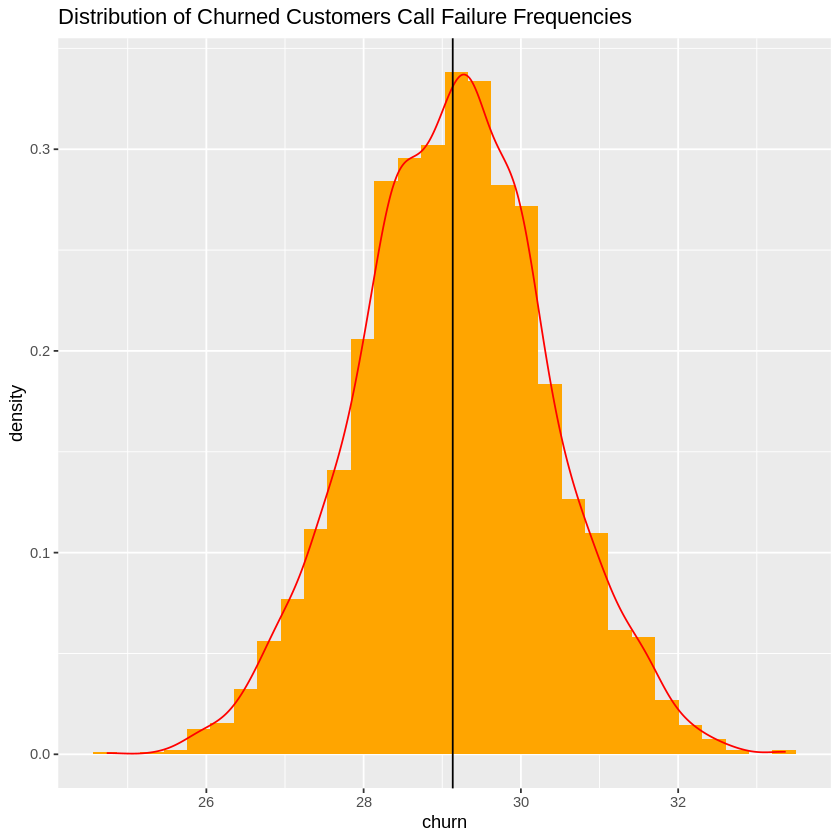

In [ ]:
ggplot(data.frame(churn =churned_Callfreq_bootstrap_results ), aes(x =churn )) +
  geom_histogram(aes(y = after_stat(density)) , fill = "orange") +
  geom_density(color = 'red') +
  geom_vline(xintercept =mean(mean_churned_CFreq)) +
  labs(title = "Distribution of Churned Customers Call Failure Frequencies")

In [ ]:
lb_mean_Diff_Churned<- mean_churned_CFreq -LB_churned_BS
ub_mean_Diff_Churned<-UB_churned_BS - mean_churned_CFreq


In [ ]:
lb_mean_Diff_Churned

2.5% 
2.359646

In [ ]:
ub_mean_Diff_Churned

97.5% 
2.400303

From the graph , the distribution of call failure frequencies among churned customers, displaying a symmetric, bell-shaped curve centered around a mean frequency of approximately 29. The tight confidence interval indicated by the vertical line confirms a consistent issue of call failures among this group.
So call failures happen with a short span of time makes customers easily churn from the service.

## **Bootstrapping**

Call Failures of Non Churned Customers

In [ ]:
nonchurned_Callfreq_bootstrap_results <- replicate(num_bootstraps, {
  bootstrap_sample <- sample(non_churned_Call_freq$Call_freq, replace = TRUE)
  bootstrap_statistic(bootstrap_sample)
})

# Calculate the observed statistic
nonchurned_BS_mean <- mean(nonchurned_Callfreq_bootstrap_results)
LB_nonchurned_BS<-quantile(nonchurned_Callfreq_bootstrap_results,0.025)
UB_nonchurned_BS<-quantile(nonchurned_Callfreq_bootstrap_results,0.975)

### Confidence Interval of Bootstrapped sample Call failures of Non - Churned Customers

In [ ]:
cat("Confidence Interval for Mean Call Failures (Churned):\n")
cat("Mean:", nonchurned_BS_mean, "\n")
cat("Lower Bound:", LB_nonchurned_BS, "\n")
cat("Upper Bound:", UB_nonchurned_BS, "\n")

Confidence Interval for Mean Call Failures (Churned):
Mean: 76.97378 
Lower Bound: 74.67709 
Upper Bound: 79.29611 


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


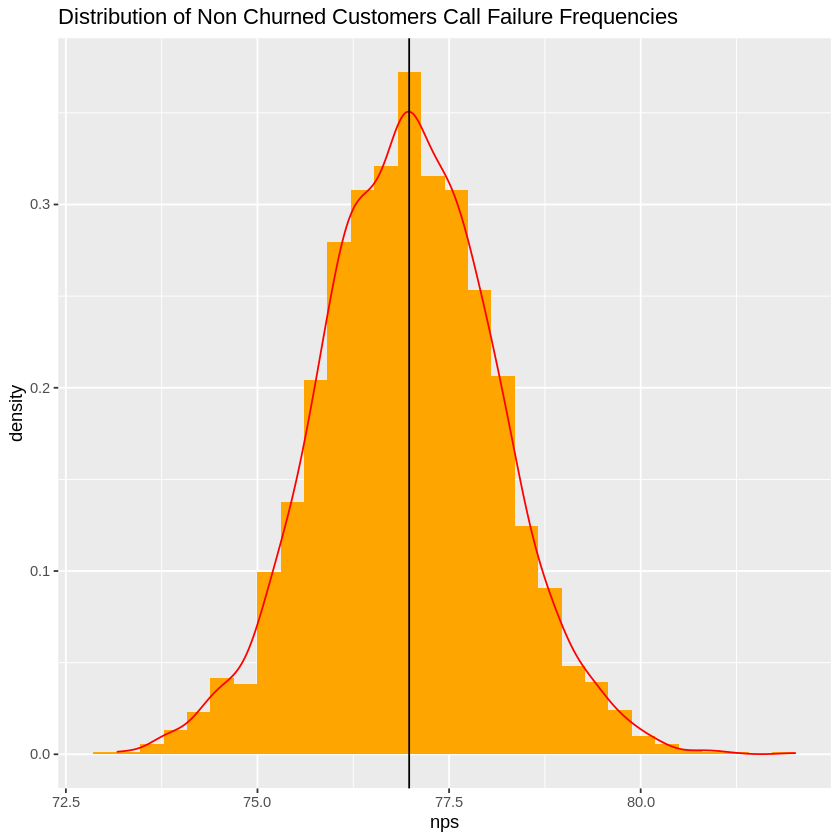

In [ ]:
ggplot(data.frame(nps =nonchurned_Callfreq_bootstrap_results ), aes(x = nps)) +
  geom_histogram(aes(y = after_stat(density)) , fill = "orange") +
  geom_density(color = 'red') +
  geom_vline(xintercept =mean(non_churned_Call_freq$Call_freq)) +
  labs(title = "Distribution of Non Churned Customers Call Failure Frequencies")

In [ ]:
lb_mean_Diff_nonChurned<- mean_nonchurned_CFreq -LB_nonchurned_BS
ub_mean_Diff_nonChurned<-UB_nonchurned_BS - mean_nonchurned_CFreq

In [ ]:
lb_mean_Diff_nonChurned
ub_mean_Diff_nonChurned

2.5% 
2.302194

97.5% 
2.316827

The second graph, contrary to initial description, actually represents the call failure frequencies for non-churned customers, also showing a similar bell-shaped distribution centered around a slightly higher mean, suggesting that while call failures are common, their frequency alone might not be the sole determinant of churn. Moreover long term customers do face call failures but some other facotrs play a majore role in customer retention.

## **Summary:**

These findings highlight that both churned and non-churned customers experience call failures, albeit with a slightly higher frequency in the non-churned group, which might indicate a tolerance or acceptance among some customers, or other compensating factors such as higher overall satisfaction. Retention Stratergies can be made into action such as focus on reducing call failures through improved network infrastructure and robust quality controls, ensuring reliable service to reduce churn driven by technical dissatisfaction , Customizble Plans can be given as a option to the customers so that Customer churn rate can be optimized.

# **Final Project** - **Iranian Telecom Churn Analysis**

# **Introduction /Background :**

In the highly competitive telecommunications sector, maintaining customers is crucial for companies' economic viability. When a major Iranian telecom company experienced a significant increase in customers switching to competitors, it highlighted the importance of retaining subscribers. Faced with the prospect of losing a large portion of their customer base, the company's leaders understood the need to understand why customers were switching to other providers. They aimed to gain insights that would help them develop specific strategies to retain customers and reduce the loss of subscribers. As my interest of performing data analysis on marketing and customer service segment aligns with this scenario, decided to perform statistical analysis on this topic.


While there are numerous research papers that employ advanced machine learning models and big data implementations to predict customer churn rates, the focus of our current project is on leveraging statistical techniques to uncover deeper insights and interpretations from the data. Nonetheless, prior work in this domain can offer valuable context and perspectives.

For instance, the paper "Customer Churn Prediction in Telecommunications" by Huang et al. introduced novel ways to anticipate when landline phone customers might terminate their services. By analyzing factors like usage patterns, billing behaviors, demographics, and location data, the authors explored seven different prediction methods, demonstrating improved performance over traditional approaches.

Similarly, the study "Telco Churn Prediction with Big Data" by Huang et al. highlighted the potential of harnessing massive datasets from a large telecom company to accurately forecast customer attrition. By combining various data sources and leveraging scalable analytical techniques, they developed a highly effective prediction system, which was successfully implemented in one of China's largest mobile companies, enabling targeted retention efforts and increased profitability.

While numerous studies employ machine learning and big data for churn prediction, our project takes an interpretative approach. By applying  statistical methods like hypothesis testing, ANOVA, bootstrapping, and linear regression modeling, we aim to unravel the intricate relationships and underlying factors driving customer churn in the Iranian telecom market. My goal is not only to develop accurate predictive models but also to gain a nuanced understanding of the significant variables influencing customer behavior. By interpreting these factors through a statistical lens, we can provide telecom companies with actionable insights to inform targeted retention strategies, tailored service improvements, and ultimately, enhance customer loyalty and satisfaction.

### Research Questions:
Reseach Question 1 : Are there discernible patterns in usage duration among customers enrolled in different tariff plans?(Hypothesis Test T-Test)

Research Question 2 : Do customers with longer subscription lengths exhibit different calling and messaging behaviors compared to those with shorter subscriptions? (EDA 7)

Research Question 3 : How do customer perceptions of service quality and satisfaction interact with their level of activity to influence churn likelihood, and what strategies can companies employ to enhance retention among both active and non-active customers? ( Hypothesis Test Chi squared)

Research Question 4 : Can demographic segmentation based on age help identify high-value customer segments and inform targeted marketing strategies?(ANOVA , EDA)

Research Question 5 : How do changes in the predictor variables over time influence the accuracy and reliability of CLV predictions in regression modeling?(Regression Modelling , AIC,BIC,R^2, DIAGANOSTICS)

Research Question 6 : What changes in plans can be performed so that churned ratio can be reduced.(BootStrapping and Confidence Interval)




## **Methods/Results(Experimental design and data collection)** :

**1)How did you obtain the data?Government Website ? Web Scrapping?**

The dataset for this project, sourced from the UCI Machine Learning repository, comprises real customer data from an Iranian telecom company collected over 12 months. With 3,150 rows, each representing a unique customer, it offers detailed insights into customer attributes and behaviors. The dataset includes 13 columns, covering metrics like call failures, SMS frequency, complaints, subscription length, and more. Attributes, except for the "churn" label indicating customer retention, are aggregated data from the first 9 months, with the final three as a planning gap. To protect privacy, the dataset is anonymized, with each row identified by a unique Customer ID. A "Customer Value" metric offers insights into each customer's significance. Obtaining the dataset from UCI ensures its reliability, accurately reflecting the Iranian telecom market and customer base.

**2)What analyses are most appropriate to answer the questions of intreset?**

Various statistical techniques like t-tests and ANOVA were utilized to compare group means across key variables such as usage duration and age segmentation. The normality of data distribution was evaluated using the Shapiro-Wilk test, which helped in determining the appropriate use of parametric or non-parametric methods.

Linear regression was a critical tool in this analysis, identifying significant predictors of customer lifetime value and churn propensity. To improve the models and address deviations from normality, transformations like logging and square rooting were applied. Model diagnostics and comparative metrics such as the Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC), and adjusted R-squared were used to ensure optimal model fit and reliability.

Additionally, bootstrapping and hypothesis testing were employed to evaluate the effects of plan changes or interventions on churn rates. Exploratory Data Analysis (EDA) was instrumental in uncovering distributions, patterns, and correlations within the data, providing deeper insights.

This comprehensive statistical approach provided valuable insights, aiding telecom companies in optimizing services and improving long-term profitability through targeted strategies that address customer needs and behaviors effectively.

**3)Present relevant graphics and interpret results?**

In a series of exploratory data analyses (EDAs), conducted on the Iranian telecom industry reveal significant insights into customer behaviors and service usage, guiding strategic decisions for service improvement.

* EDA1 shows that only 15% of customers have churned, indicating an imbalance in the dataset and highlighting the need to explore the reasons behind this minority's dissatisfaction.

* EDA2 highlights varying churn rates across age groups, with the 30-39 age range showing low churn rates where as the overall population of ranges more than 1000 and 60% have churned , while both younger (10-19) and older (50-59) groups exhibit higher churn rates as almost the entire population has churned compared to other age categories. This suggests unmet needs or expectations in these age demographics.

* EDA3 identifies a preference for calls over texts with right-skewed distributions for both, indicating that calls dominate communication preferences among the majority of users.

* EDA4 delves into service usage differences, showing that customers who have filed complaints typically used the services less, hinting at possible links between lower usage and dissatisfaction.

* EDA5 contrasts churn rates between pay-as-you-go and contractual plans, revealing higher churn among pay-as-you-go users and lower churn in contractual plans, which implies greater satisfaction and loyalty in the latter due to their perceived benefits.

* EDA6 notes a shift in communication preferences with subscription length, where shorter terms favor calls and longer terms see an increase in SMS usage, suggesting that adjusting features in plans according to subscription length could boost customer retention and satisfaction.

<p float ="left">
<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA0gAAANICAIAAAByhViMAAAACXBIWXMAABJ0AAASdAHeZh94%0AAAAgAElEQVR4nOzdd3wU1cLG8TOz6QkthNASCCGhSEdCNaFIk15FqoqAigrSRMWCigp2QMRr%0AAbyA0i9FmgJSRUAFqYaWQGhpEEgvO/P+sdd9c6mpnNnZ3/cPPpvZye6zkwnz5JzZWUXXdQEA%0AAADHp8oOAAAAgKJBsQMAADAJih0AAIBJUOwAAABMgmIHAABgEhQ7AAAAk6DYAQAAmATFDgAA%0AwCQodgAAACZBsQMAADAJih0AAIBJUOwAAABMgmIHAABgEhQ7AAAAk6DYAQAAmATFDgAAwCQo%0AdgAAACZBsQMAADAJih0AAIBJUOwAAABMgmIHAABgEhQ7AAAAk6DYAQAAmATFDgAAwCQodgAA%0AACZBsQMAADAJih0AAIBJUOwAAABMgmIHAABgEhQ7AAAAk6DYAQAAmATFDgAAwCQodgAAACZB%0AsQMAADAJih0AAIBJUOwAAABMgmIHAABgEhQ7AAAAk6DYAQAAmATFDua3YsUKRVEURfHw8JCd%0ApVisXr3a9gJdXFxkZ3Eu7FoAjIZiB0eVk5OzaNGiAQMGBAcHlyxZ0s3Nzd/fv02bNjNmzIiP%0Aj5edDv/jm2++Uf5Rr149q9V60wqLFi2y3du5c2cpCXNj1yoMth4gmQ44oD/++CMkJOROe3Wp%0AUqUWL15sX3n58uW25e7u7hIzF5///Oc/thdosVhkZ7m9r7/+OvcP6JtvvrlphYULF9ru6tSp%0Ak5SEduxaueV318rX1ismV65csVgsQogTJ04U93MBBsToOhzPn3/+GR4enpaWZvvSw8OjTp06%0Arq6up06dSkxMFEJcv3598ODBrq6u/fv3l5oUt/f6668/9thj3t7esoPcjF2rMAyy9ZYtW3br%0AkDDgPJiKhYOxWq2DBg2yHTwURZk6dWpCQsLvv/++d+/ehISE1atXV65c2bbmuHHjMjMzpYbF%0A7V2+fPnjjz+WneJm7FqFYZytt3Tp0uJ7cMD4KHZwMKtXr46MjLTdfvvtt998883cAz89e/b8%0A5ZdfPD09hRCurq5//vln7u9VVVUIsWvXrg4dOpQpU8bHxyc8PHzLli2513nttddsJ3s1b978%0Apue99SzyefPm2Ra2bt06Jydn7Nix5cqVK1++fO67IiIi7vmkNpGRkc8880xoaKiHh0fJkiXD%0AwsJmzZqVk5Nz02oLFixo0qSJt7e3r69v165df//9d0VR8rLp2rdvb4vUsWPHm+5auHCh7S5X%0AV1fbiVA5OTlfffVV+/bt/f39XV1d/f39w8LC3n///YSEhLw81520a9fOlvbDDz+8cuXKPde/%0AcePGe++917x5c19fXzc3t/Lly3fq1Gn+/Pk3DckUYGvfil2rwLtWwbZevjaIyMM+2a1bN0VR%0A9uzZY/uydu3aiqK8+OKL9kco2O60YsWKRo0aeXl5BQUFvfbaa9nZ2UKIEydO9OjRw7bZO3bs%0AeOzYsfxu87v8iPPyYoE7kj0XDOTPoEGDbLuur69vZmbmbdfZtm3byZMn7V/aT4QqU6bM5s2b%0A3dzccv8KWCyWn376yb7ylClTbMubNWuW+zFve7LR999/b1tYv359+xCUbYUlS5bYvqxbt+5t%0An3TLli25H3/lypW3fWdlu3bt0tPT7atNmDDhphXc3d1fe+21W7Pd6ttvv7Wt5ubmduPGjdx3%0A9enTx3ZXly5ddF3Pyspq06bNbf/HCA4OPn369F2e5bbs59g99dRTAwYMsN0eNWqUfYXbnmN3%0A6NAh+zDPTVq0aJGQkGBfM79b+7bYtW5aIe+7VsG2Xr42SF72ya5du95679ixY22PULDdadmy%0AZTe12+eee+7s2bN+fn65F5YrVy4pKSlf2/wuP+Ii/wWEU6HYwcHYT81+9NFH8/gt9qOvn59f%0AUFBQw4YNX3nlldyjVmFhYfaV83WwsT9yUFBQYGCgq6trw4YNa9asmfuuihUr3vZJmzZtan+c%0As2fP2gYzhBCTJk2KjIw8cOBA69atbUteeeUV22r79u3LfYRYtWrV2rVrO3fubB/YuPvR99q1%0Aa/YSsGzZMvvy9PR0++DK999/r+v63LlzbV/WqlXrhx9++PXXXzdt2tS3b1/bwtatW+dxy9vZ%0Ai92AAQPOnDlji2GxWI4dO2Zb4dZid/XqVfthuFq1anPnzl29evXkyZPtL7Zr1663/iDysrXv%0AhF2rwLtWwbZevjZIXvbJY8eOrVmzxv5CFi9evGvXrrNnz+qF2J0CAgJ69Ojx/PPPlypVyrbQ%0A3d39kUceqVSp0tixY5s1a2Z/uk8//TRf2/wuP+Ii/wWEU6HYwcHYK8irr76ax2+x/wcqhIiI%0AiMjIyLAtHzx4sG2hqqpZWVm2hQU7+gohQkNDY2JibntXeHi4/c/02z7p888/b1vYpk0b+yPE%0Ax8f7+PgIIUqUKGH79pEjR9pWK1euXEpKim217OzsWrVq5fHo27NnT9uaQ4cOtS+0HwtLlCiR%0Ampqq6/oTTzxhW/Lxxx/bV8vKyho4cODzzz8/ffp0q9Wahw3//+zFrm/fvrqu22fH7EfTW4vd%0AW2+9ZVtSsmTJixcv2h/KvqYQ4vfffy/A1r4Tdq3C7FoF2Hr52iB53CcvX75s3zi53xVb4N2p%0Af//+toUrV660L/Tw8Dhz5oyu65mZmTVr1rQt7N69u23NPG7zu/yIi/wXEE6Fc+zgYOzvufPy%0A8irAt0+dOtXd3d12+8knn7Td0DTt4sWLhQz21ltvBQQE3Oku+7xM7ie9dOmS7fbGjRttN1q1%0AapXxDx8fn8aNGwshkpOTbacN7d6927Za9+7d7cdRFxcX+xH9ngYOHGi7sWHDBvt5RfbjaJ8+%0AfWxbtWTJkrYlM2fOXLhwYWxsrBDC1dX1+++/nz179uTJk22nlBXY66+/Xrp0aSHE+vXrt23b%0Adtt1Vq1aZU9VqVKl3C+hTJky9ldx6zfec2vfCbuWKMSuVcitd0+F3CcLvDtNmjTJdqN79+72%0An2/v3r2Dg4OFEG5ubt27d7ctjImJsd3I4zbP7aYfcXH/AsLc2DngYEqUKGG7kZKSUoBvb9Kk%0Aif121apV7bcL9mi5tWvXLr9PmpycLITQdT0qKsq25N133/XMZefOnbbltlOzo6OjbV+Ghobm%0Afvw6derkMWSPHj1swwaJiYm//vqrEMJqtf7444+2e4cMGWK78eSTT9oOz+fPnx82bFiFChVC%0AQkJGjBixatWqIrmQhK+v7yuvvGK7PXHiRF3Xb1pB13X72ej16tXLfZfFYrEPI504ceLWB7/7%0A1r5x40bQLWxv0mTXEoXYtQq59e6pMPtkYXanunXr2m64urqWK1fOdrt+/fr2FSpWrGi7kd9t%0AnttNP+Li/gWEuVHs4GDsR6+///47v9/r7u5uP/wIIYrwY6AsFov9P/38PmlaWpqmaXd//KtX%0Ar+q6np6ebvvypkGRvI+ReHp62mdj161bJ4TYtWuX7X12lSpVsh9dGjZsuH79+twH9TNnznz7%0A7bd9+/YNCQnZu3dvHp/uLsaMGVOlShUhxMGDBxctWnTT+x/T0tLs7x+0NdHc7ENKtkNpbvfc%0A2pqmnbuFrVmya4lC7FqF2Xp5UZh9sjC7k/1sOduXthu28Wabm968ksdtnvvLW3/E9+EXECZG%0AsYODadmype3G1q1bU1NTb7vOBx98MG7cuCNHjhTmiW661FZcXNxdVnZxcSnw5IiXl5ftQvlC%0AiM8+++y250xMnTo19weS3vTCb9y4kfens8/Grl27VgixevVq25eDBg3K/RLatGlz5MiRX3/9%0A9e233+7cubP9zPHo6OiePXveacvnnYeHx7Rp02y3p0yZclOx8/Lysi+59dXZD8D2VEWCXUsU%0AYtcqzNbL4wYp8D55P3enPG7z3N9y2x9xcf8CwsQodnAw9qsqJCcn3/T/o83Ro0ffeeedzz77%0ArH79+rNmzcrv49v/oL906VLuKcKbrltWhBRFqV69uu22fRLntmxDXOKWQZGDBw/m/ek6duxY%0AtmxZIURkZOTJkyftxc4+D5s7WIsWLV5//fWNGzcmJiauWbPGdjZSfHy8fVKpMIYMGdKwYUMh%0ARExMjP3SD/antk+BHTp0KPdd2dnZx48ft93OPSOWR6VLl771QGurNexaohC7VgG2XgE2SMH2%0AyeLbnW77XHnc5nl5qGL9BYRZUezgYCIiIuxXeProo4/GjRt37do1+73r1q3r1KmT7SyfMmXK%0ADB06NL+Pbz+FOS4ubv369bbbf//9d+53zxW5Tp062W4sX77cfhK61WodPHjw8OHDX3nlFdsJ%0A+C1atLDdtXbtWvurTklJyVc2V1fXfv362W6//fbb586dE0LUq1evQYMGtoXp6envv//+k08+%0A2bNnT/ukksVi6dGjR1hYmO1L2xDL3r17n/nHPaefbqUoyocffmi7nfsqFTb2S+utXr36woUL%0A9uULFiywDbEoitKrV6/8PuldsGuJQuxaBdh6ed8ged8nc19zLve1fO/n7pTHbX4neX+xwO3l%0A6z20gBGcO3fOfsKyEMJ2/aeIiIigoCD7QkVRli9fblv/Tp/Ubn8XmxDiyJEjtoVnzpyxHxu8%0Avb2ffvrpiRMn+vr62meabntNils/Az6/T2o/ladVq1br16/fvHmz/VBUp06dnJwcXde3b99u%0A/94HH3xwyZIl3333XVhYmH3kQ1XVvGzA3I9jM2PGjNwr2AbShBB9+/bdsGHD77//vnPnzrfe%0AesvV1dX2imJjY3Vdnz9/vv0RsrOz7/KMN13uJDf7UdDGfrmTa9eu2Q/8ISEhc+bMWbly5aRJ%0Ak+znOY0YMaJgW/su2LUKs2vld+vla4PkcZ/MycmxLRFChIeHL1u2bPPmzXoR7U72obi5c+fa%0AF86ePdu2sHr16vna5nf5EefxxQK3RbGDQzp37lyrVq3EHZQtW3blypX2lfN71H/mmWduesDQ%0A0FD79SAURdE07e6PXIAnXb58uf0Yk1vlypVzX47LfkkLO29v788//9z+ZV4ucKVpWu5L8Kuq%0AmvsaWrquHzly5E7X11BV9dtvv7WtViTF7vDhw7lPMMrjJ0/06dMn96cmFFWx09m1cinArpWv%0ArZevDZLHfVLX9UceeST3vfZrJRZ+d8pjscvjNr/LjzjvLxa4FcUODmz9+vXDhw+vWbNmqVKl%0AXFxc/Pz8Wrdu/eGHH9re6GeX3wNhTk7O+++/Hxoa6ubmVrly5VGjRsXGxuaevrFdxfcuj1yA%0AJ9V1/fjx48OHD69WrZq7u7uXl1fdunWnTJly02uxWq0ff/xxzZo13dzc/P39+/Xrd/To0dxX%0AT7jps8LuZPz48fZvadu27a0rXLly5Z133mnSpEn58uVdXV29vLxq1ao1atSov/76y75OkRQ7%0A/X8rRe5ip+v69evXp02bFhYWVqpUKVdX14oVK/bu3Xvt2rU3PUIRFjsbdq0C71p533r52iB6%0A3vZJXdcvXLjQq1ev0qVLe3h4VKtW7d1337XfVcjdKe/FLi/b/C4/4ry/WOBWin7LFaQAAADg%0AiHjzBAAAgElQ7AAAAEyCYgcAAGASFDsAAACToNgBAACYBMUOAADAJCh2AAAAJkGxAwAAMAmK%0AHQAAgElQ7AAAAEyCYgcAAGASFDsAAACToNgBAACYBMUOAADAJCh2AAAAJkGxAwAAMAmKHQAA%0AgElQ7AAAAEyCYgcAAGASFDsAAACToNgBAACYBMUOAADAJCh2AAAAJkGxAwAAMAmKHQAAgElQ%0A7AAAAEyCYgcAAGASFDsAAACToNgBAACYBMUOAADAJCh2AAAAJkGxAwAAMAmKHQAAgElQ7AAA%0AAEyCYgcAAGASFDsAAACToNgBAACYBMUOAADAJCh2AAAAJkGxAwAAMAmKHQAAgElQ7AAAAEyC%0AYgcAAGASFDsAAACToNgBAACYBMUOAADAJCh2AAAAJkGxAwAAMAmKHQAAgElQ7AAAAEyCYgcA%0AAGASFDsAAACToNgBAACYBMUOAADAJCh2AAAAJkGxAwAAMAmKHQAAgElQ7AAAAEyCYgcAAGAS%0AFDsAAACToNgBAACYBMUOAADAJCh2AAAAJkGxAwAAMAmKHQAAgElQ7AAAAEyCYgcAAGASFDsA%0AAACToNgBAACYBMUOAADAJCh2AAAAJkGxAwAAMAmKHQAAgElQ7AAAAEyCYgcAAGASFDsAAACT%0AoNgBAACYBMUOAADAJCh2AAAAJkGxAwAAMAmKHQAAgElQ7AAAAEyCYgcAAGASFDsAAACToNgB%0AAACYBMUOAADAJCh2AAAAJkGxAwAAMAmKHQAAgElQ7AAAAEyCYgcAAGASFDsAAACToNgBAACY%0ABMUOAADAJCh2AAAAJkGxAwAAMAmKHQAAgElQ7AAAAEyCYgcAAGASFDsAAACToNgBAACYBMUO%0AAADAJCh2AAAAJkGxAwAAMAmKHQAAgElQ7AAAAEyCYgcAAGASFDsAAACToNgBAACYBMUOAADA%0AJCh2AAAAJkGxAwAAMAmKHQAAgElQ7AAAAEyCYgcAAGASFDsAAACToNgBAACYBMUOAADAJCh2%0AAAAAJkGxAwAAMAkX2QEAwCiys7NTUlKSk5NzcnLS0tIyMzMzMjLS09Pv8i3u7u5eXl65//X2%0A9nZzc7tvmQEgN4odAPPTdT0uLi4uLu7SpUuxsbFXrly5fPlyXFxcUlLS9evXk/6Rmpp6228v%0A4SlcLLdZfi3l9k/n5eVVunTpMmXK2P8tW7ZshQoVKlasWKFChUqVKpUvX97f37/oXh8A/Jei%0A67rsDABQNHJyci5cuBD9j6ioqKioqOjo6MuXL+fk5Agh3F2FfylRyVcpX1r4l1ZKe4tS3qKU%0AtyjtrZT2FqW9RUkv4eMhVFWU8lKEEKW9haLc40lt9S4pVdd1kZQq0rNEUqpIShHXUvWklP/e%0ATkzWY5PExUQ97rrIzBZCCFdX1/LlywcFBVX7h+12QECAxXK7FgkAeUCxA+Co0tLS/v7778jI%0AyGPHjkVGRp44ceLUqVNZWVkWVVQuK4L8laDyIqi8EuQvqpRTypcWFcooZUvIDi1Ewg0Rm6Rf%0AviYuJYqoWD06Vo+KFdFx+sVEYdWEq6trSEhI7dq1a9WqVadOnVq1atWqVcvLy0t2agCOgWIH%0AwGFcuHDh0KFDBw8ePHjw4KFDh6Kjo3Vd9y8lHqii1Kys1AoUtQOU6hVFlXKKqwOOeWXliPPx%0AelSsiLyonzgv/r6gH4/RY5OEoihBQUH169dv1KhR48aNGzVqFBAQIDssAIOi2AEwrri4uL17%0A9/72229//PHHoUOH4uPjvdxF/SClYbDSMFjUrarUqqz4GmAQrvhcTRYnLujHz+uHo8WfZ/TD%0A0XpqhvD397eVvKZNm7Zo0aJ8+fKyYwIwCoodAAOxWq1Hjx7ds2fPb7/9tnfv3tOnT/t4iCah%0ASpMQpWGw0ihY1KisWJz4Mk1WTURe1A+eEQfP6n+e0X8/padkiJCQkBYtWrRs2bJly5Z16tTh%0AFD3AmVHsAEimadpff/31yy+/bNu2befOncnJydXKKy1ri+Y1lZa1lXpVldu+IxVCCKsmDkfr%0Av57Qf4vU9xzXo+NEyZIlH3rooXbt2rVr165Bgwaq6sQtGHBKFDsAckRGRm7dunXbtm3bt29P%0ATEysFaC0q6+0ra+0qq1UKCM7nGO6dFX8ekLfcVTfdlg/EaOXLVu2TZs2Dz/8cLt27WrWrCk7%0AHYD7gWIH4P7JyMjYvn37jz/+uGHDhqioqCB/0a6+2qa+0q6+UslXdjhzuXxNbP1L/+Wwvu2w%0Adi5OVKtWrUuXLt26dWvTpo2Hh4fsdACKC8UOQLGLiYlZv379hg0btm7das1Oi6ijdAlTujyo%0AhFa61zXiUBROX9Y3/amvP6DvOKpbXL0ffvjhrl27du3atXLlyrKjAShiFDsAxeXs2bMrV65c%0AsWLFgQMHKpbRuzZRH2mitG+o+DBgJElqhtjyl77hgL7+d+3yNaVJkyb9+vXr169fcHCw7GgA%0AigbFDkARi4yMXLly5cqVK//888/QSkrflkrflkrj6so9P8IB942ui4Nn9VW/6it+1U9e1Bs3%0AbmxreKGhobKjASgUih2AonHx4sXvv/9+0aJFhw8ffiBQ6dtS6dNSaVCNNmd0h6P1lXv0Fb/q%0AJ2L0Bg0aDBo0aNCgQVwDGXBQFDsAhZKcnLxq1apFixZt27YtyF8f0kYZEK7UDqTPOZ5j5/Xl%0Ae/TFv+hRcUq7du2GDh3ap08fHx8f2bkA5APFDkBBaJq2ZcuW7777bvXq1R6WtEcfUge3UVrW%0AYr7V4em6+PVvffF2fekuLUv37t2797Bhwx5++GEuiQc4BIodgPy5fPny/Pnzv/nmmwvno7qG%0AKUPbql2aKO6usmOhqGVmix8P6It+0Tb+oVcOrDZixIjhw4dXqFBBdi4Ad0OxA5AnmqZt27bt%0Aq6++Wr16dflS2YNbq6O7qoF+smOh+F1LEcv3aLPW6pGX1LZt244aNapPnz58cBlgTBQ7APdw%0A7dq1r7/+eu7cuZcuRPdspozopD7cQFGZcnUyui62Hta/2qSt+U0PrBo8atSokSNH+vpyXWnA%0AWCh2AO7o77//njlz5sKFC309U5/toj7ZXi1fWnYmyBabJOZv0b7cqCWkeg0dOvTFF1+sVauW%0A7FAA/otiB+Bmuq5v3bp15syZ69evb1xdvNBNHdhacWXmDbloulh/QJ+9Ttvyl96qVavJkyd3%0A69aN984A0lHsAPy/7OzsxYsXf/DBB6dPnuj/kDKmu9q0Bodq3M3+k/rMtdqKPXpozQcmTpw4%0AZMgQV1feSgNIQ7EDIIQQaWlp33777UcffZSUcP6ZzuqYHmolzp5Cnl1IEF9s0OZu0Er5VZk4%0AceKIESM8PT1lhwKcEcUOcHbJycnz5s2bMWNGdurl0V3VMd1U3xKyM8ExJaeLeVu0D1ZoOS7l%0ARo8ePXbs2DJlysgOBTgXih3gvJKSkj799NOZM2eWdL0+vrc6ooPq7SE7ExxfWqb4+iftk/9o%0AyTmln3/++fHjx1PvgPuGYgc4o5SUlJkzZ3788celXK9NGaAObau6ucjOBHPJyhELf9HeX65f%0AzSg1YcKEsWPHlijBUDBQ7Ch2gHPJzMz87rvv3nzzTZecKxN6q890VvnQCBSfbKv4YYf+9hLt%0AerbvpEmTXnjhBS8vL9mhADOj2AHOIjs7+1//+td7772nZ1ye3E99upPq4SY7E5xDRpb412Zt%0A+nJN9az46quvjho1ys2NnQ8oFhQ7wCmsWrXq5ZdfTrxyanJf9bmuqpe77EBwPqkZ4vP12ker%0AtNL+1adPn963b1+uewcUOYodYHIHDhyYOHHi3j07n2yvvjNELVdKdiA4t6RUMWOFNnOdVr9h%0A048//vihhx6SnQgwFVV2AADFJSYmZtiwYc2aNSuZvuv4XMuXz9HqIF9pb/H+42rkly41vQ9E%0ARER079797NmzskMB5kGxA0woLS1typQpoaGhZw4s2vOBuvZ1S/UKzHnBQAL9xHfjLLtnqImn%0A1z/wwAOvvPJKamqq7FCAGTAVC5jNihUrJkyYoKWd/2i4pX8rzmKCoem6WL5Hf2m+VfcI/OST%0AT/r16yc7EeDYGLEDzOPUqVNdunQZ9Fj/Xg0uHJvj8uhDtDoYnaKIRx9Sjn/h8uRDF4cM6t+u%0AXbtjx47JDgU4MIodYAYpKSmTJ0+uW7euFrvpyOeWz0aqJfigTjgOL3cxdaD61yyLa9L2xo0b%0AMzMLFBhTsYDD27hx47PPPivSz33ylKV3C8bo4NhW/qpP+NYqPKvMnTu3S5cusuMADoYRO8CB%0AxcfHDxkypHu3Lr0bxBz93IVWBxPo21I5Nselb6MLPbp3HTx4cHx8vOxEgCNhxA5wVMuXL3/u%0AuecqeCV89YLarAaVDmZz6Kw+YrYWdbX09OnTR44cyRmjQF5Q7ADHc+7cuWeeeWb7tk1THlVf%0A6qu6WmQHAopHtlXMWKG9u0xr+3DnL7/8smrVqrITAUbHVCzgYObPn1+/fv2U85sPzrRMeZRW%0ABzNztYjXBqgHZ1pSzm+uV6/eN998IzsRYHSM2AEOIzY2dtSoUT9tWvvOEHVcT1VlYgpOQ9PF%0AzLXalIVah07dv/766/Lly8tOBBgUxQ5wDBs2bBgxYoSf25XvxqkNg+l0cEYnYvTHP9XOXff7%0A8ssv+/TpIzsOYERMxQJGd/369WHDhvXs0fWpiNjfP7PQ6uC0agcqez60PNMuccCjfR9//PHr%0A16/LTgQYDiN2gKHt27dv4MCBblnR341Tm/LWV0AIIcS+k/rjn2qZLlV++OGHFi1ayI4DGAgj%0AdoBBaZo2Y8aM8PDwNtXP/f6phVYH2DWrofz5maV9jZiIiIjp06drmiY7EWAUjNgBRhQfH//4%0A44/v3r7xi2ctg9tQ6YDbW/mrPnK2tXGzdosWLapYsaLsOIB8jNgBhrNt27YGDRrEndr0x2e0%0AOuBu+rZUDs50Sbv4S8OGDTdt2iQ7DiAfxQ4wEE3T3nzzzY4dOw5sFrvnA0tIRVodcA9V/cX2%0A9y2Dmid069btjTfeYFoWTo6pWMAorl69OmTIkF93bPxuvKVHUyodkD9r9+tPfGptHt558eLF%0Avr6+suMAclDsAEM4dOhQ37593bKiVr6i1g6k1QEFcfqy3vc9LUkLWLlyZVhYmOw4gARMxQLy%0ALV68uFWrVk0rRx34xEKrAwospKKy72PLwzUuRkREzJs3T3YcQAKKHSBTdnb2888//+TjQ6YN%0Ayvh+ksXbQ3YgwMF5uIl5Y9V3B2c9PeqpMWPGZGdny04E3FdMxQLSXL16tX///kf/2Lb8ZUt4%0AHQbqgKK046g+YIa1TuO2K1as4JQ7OA+KHSDH6dOnu3fv7pIeufZ1NcifVgcUvYuJouc063UR%0AvG7dutq1a8uOA9wPTMUCEmzZsqVp06ZBXpG7ZlhodUAxqVxWbH/fUtfvbPPmzTds2CA7DnA/%0AUOyA++2rr77q0qXL0Ieur3vDUspLdhrA1Hw8xKpXLS92TenZs+fs2bNlxwGKnVhOj1gAACAA%0ASURBVIvsAIAT0TRtwoQJX3z+2dzR6vD2/FkF3A+KIqYOVAP9tOfGjzlz5swnn3yiqvz2wbQ4%0Axw64TzIzM4cNG/bT+mWrXrW0qcf0K3C/bT+i933f2v6R/gsXLnR3d5cdBygWFDvgfkhOTu7X%0Ar9+RAz+tf9PSMJhWB8hxPEbvMtVaOaTFunXrypYtKzsOUPQodkCxu3z5cpcuXbIS/9ow1VKl%0AnOw0gHO7dFV0fcua4/XAxo0bAwMDZccBihjnGQDF6/jx482bN/dI/2v7+7Q6QL5KvuKX9yxl%0AxfHmzZsfPnxYdhygiFHsgGK0f//+8PDwsICYbe9a/ErKTgNACCFEaW+x6S1L86qX27Ztu2/f%0APtlxgKJEsQOKy44dO9q3b9+nSdKSlywebrLTAMjFw00snWzp2ySpQ4cO27dvlx0HKDIUO6BY%0AbNy48ZFHHhkWkfrlc6qF3zPAeCyq+PI5deTDqZ07d16zZo3sOEDR4IADFL1169b16dNnTJfM%0A2U+rKm+BBYxKUcRHw9Wpj2U/+uijK1askB0HKAJcoBgoYgsXLhw+fPi0IdpLffjDCXAAk/uq%0AQuQMHDgwIyNjyJAhsuMAhUKxA4rS/PnzR40a9dkIbXQXWh3gMCb3VX08tCeeeCIrK2v48OGy%0A4wAFR7EDisy///3vkSNHznlGH9WJVgc4mOe6qu6u2qhRo1RVfeKJJ2THAQqIYgcUjWXLlj31%0A1FOfjaDVAY5qREdVUbSRI0daLJahQ4fKjgMUBMUOKAIrVqwYMmTIJ09pz3Wl1QEO7KkOqqZp%0Aw4cPV1V18ODBsuMA+UaxAwpr5cqVAwcOnDZEe55WBzi+kZ3UtCztiSeeUFV14MCBsuMA+UOx%0AAwpl7dq1AwcOnD5MG9+LVgeYxNjuanaO9vjjj3t5efXs2VN2HCAfFF3XZWcAHNWOHTs6d+78%0Aat+s1wbQ6gCzmbZUe2+l24YNG9q2bSs7C5BXFDuggP766682bdoMaXVj1tO0OsCcJs3Tvtrq%0AvW3btiZNmsjOAuQJxQ4oiFOnToWHh3eoHbdgnIXPlgDMStfFyNna2kO+O3furF27tuw4wL1R%0A7IB8u3DhwkMPPdSg/PkVr1hcLLLTAChOVk0MmGHdH1N59+7dVatWlR0HuAeKHZA/iYmJDz30%0AUAXXyA1vWjzcZKcBUPzSs8Qjb1rjtVo7d+708/OTHQe4G84NAvIhIyOjV69eHlmRq6fQ6gBn%0A4ekm1rxucc/8u1evXhkZGbLjAHdDsQPyStf1kSNHnj2+e81rlpJestMAuI9KeYn1b1piTu4Z%0ANmyYpmmy4wB3RLED8uqVV15Zs3LR+jctgUzFAM6nYhmx/k3LzxuWT5kyRXYW4I4odkCefPPN%0AN598NGP5y5YG1XgTLOCk6lRRVr5q+eSj6V988YXsLMDt8eYJ4N42btzYo0ePuc9qT3XgbyHA%0A2X3zkzb6S3XdunWdO3eWnQW4GcUOuIfjx4+3aNHihc4p7wyh1QEQQogp/9Y+3+y9d+/eOnXq%0AyM4C/A+KHXA3165da9q0ab1yZ1a8bFGYgwUghBBC18WjM6yHYoP379/v6+srOw7w/xiBAO7I%0AarUOHjzYNfPM/LG0OgD/T1HEv8dbSomzAwYMyMnJkR0H+H8UO+COJk2atG/3xrWvq1zcBMBN%0APN3Eylcsfx3YMnnyZNlZgP9HsQNub+HChZ/P+nTZZEv1CgzWAbiNqv5ixcuW2TM/mTdvnuws%0AwH9xjh1wG/v372/duvWMYVkvdOOPHwB3M3Od9spCt507d4aFhcnOAlDsgFskJiY++OCDbUNi%0A5o2l1QG4t+EztW2nAv7888+yZcvKzgJnx3EL+B+6rj/11FMlxfnPn+G3A0CefPGsWtYlZujQ%0AoXzaGKTj0AX8j/fee2/r5jVLJ6te7rKjAHAQHm5i6WT11x0bp0+fLjsLnB1TscD/2759e4cO%0AHb6foPdrxRsmAOTP8j36oI/Epk2b2rdvLzsLnBfFDviv2NjYRo0aDQiL/WQEI9kACmLsV9qy%0AA+X+/PPPSpUqyc4CJ0WxA4QQQtO0hx9+OOPyjh3TLa4W2WkAOKasHNH6ZatX5TY///yzxcJ/%0AJZCAkQlACCFmzJhx6MD2HybR6gAUnJuLWPKS5eD+XzjZDrIwYgeIP/74o2XLlvPHWAdGcGod%0AgMJa+as+8CNl165dzZs3l50FTodiB2eXmprauHHjFgGn5r/IYB2AovHkZ9bd54IPHjxYokQJ%0A2VngXJiKhbN7/vnnc26cmjmKVgegyMx+xqKmnx03bpzsIHA6FDs4tZUrVy5auGDheLWkl+wo%0AAEzEx0MsmqD+e8G3S5culZ0FzoWpWDivS5cu1a1bd1yX668N4C8cAEXv7SXarE2lDx8+XLly%0AZdlZ4CwodnBe3bt3jz+5fvcHFgu9DkAxsGoifLLVt/oj69evl50FzoIDGpzUggULft784zdj%0AVFodgGJiUcX8F9VftmxYsGCB7CxwFozYwRnZJmFf7nl9Uh9qHYDi9cEq7f3/lDh69GhAQIDs%0ALDA/jmpOYcSIEYqinD59WnaQPHFxcSnuiz+NHj26Rrmk8b3Y/wEUu4m91bqVbjzzzDOyg8Ap%0AcGAruEWLFimK4uHhcfLkyVvvDQkJadiw4X2Ioev6ihUrevXqValSJXd3d39//yZNmrz77rux%0AsbH34dkd0YIFCzZtWMMkLID7Q1XE1y+oW39e/+9//1t2FpgfR7bCyszMHD16tKxnT0pK6tix%0AY//+/X/++ecmTZqMGjWqffv2SUlJr732Wr169Xbt2iUrmGFduXJl3Lhxbw1W61ThQyYA3Ce1%0AApQ3B6ovvvji5cuXZWeByVHsCis8PHzr1q2LFi2S8uyDBw/esmVLz549o6Oj165dO3v27O+/%0A//7kyZNz5869evVqz5494+LipAQzrHHjxlXzvT6+J3s+gPtqYm81uGwSlyxGcePwVlgTJkyo%0AWrXqhAkTrl27dpfVzp079+STT1auXNnNzc3Pz69Hjx779++33zto0CBFUVJSUiZPnhwUFOTu%0A7h4YGPjpp5/e/a0tmzZt2rBhQ+PGjVesWFGuXDn7clVVn3nmmbfffrtx48ZnzpzJvXzGjBnB%0AwcHu7u5VqlR555137I/frVs3RVGSkpLsK+fk5CiK0r59e9uXjz32mKIocXFxHTp08PT0XLt2%0AbR5jx8bGPvfcc1WrVnVzcytXrlyvXr0OHDiQ+1Vs2LDhwQcf9PT09Pf3HzFiRO4MRe6nn35a%0AtnTJnGdVFz5mAsD9ZVHFl6PVFcuXcukTFCuKXWG5urrOnj07Li7u5ZdfvtM6MTExTZs2XbFi%0AxeDBg7/++uvx48f/+eefERERu3fvtq3g5uYmhOjXr9+NGzeWLFnyyy+/PPDAA+PHj7/7O+Rt%0Ap2tMmTLFxcXl1ntfffXVLVu2tGjRwr5k2rRpS5cuHTVq1LRp04QQb7zxxpIlS/L4Mm0Jx40b%0A5+rq+sYbbwQHB+cldnx8fLNmzRYvXjxw4MB58+aNHz/+jz/+CA8P37Fjh22FPXv29OjR48qV%0AK2+88cZ7772XmZnZo0cPVS2W3TI9PX306NHPdVWb12QSFoAED4Yoo7uozz//fGpqquwsMK3b%0AFALki6Zp3bt379mz59dff/3EE0/kLlJ2r7/+elxc3KpVq3r37m1b0rt373r16k2aNGnv3r1C%0ACFsz8/X1nTt3rm2FuXPnVq9efdWqVU8++eSdnnrfvn25B9Xu6dSpU/v27XN1dRVCPPzwww8+%0A+OCSJUsGDhyYl++1fVdCQsLGjRvtxeuesd98882LFy/u3bu3SZMmthWGDBlSp06diRMn2sbt%0A3n33XavVunr16rCwMCHEiBEjnnvuuWI6NXDatGmpV8+8NZh9HoA004aqq0ZHv//++7Y/sIEi%0Ax4hd0Zg9e7aXl9fTTz+dk5Nz0126rq9evbp8+fK9evWyL6xdu3aLFi1+++23xMRE+8LHH3/c%0Afjs4ONjLy+vChQt3edLY2NhSpUqVLFkyjyEnTJhg62dCiEaNGlkslkuXLuXxexVFsSW8dTjt%0ATrF1XV++fHn9+vUDAgKu/MPV1bVly5a///57SkqKpmnbt2+vXr26rdXZjBw5Mo+R8iUyMvLj%0Ajz+eNcpS2rs4Hh4A8qSEp/hkhOXDDz88fvy47CwwJ0YvikZgYODUqVMnTZr06aefTpo0Kfdd%0AV65cuX79+oMPPmjrRnY1a9bcvXv3yZMn7YN8VapUyb2Cq6trdna2ECIpKSn3PG9ISMjEiROF%0AEKqqWq3WvIcMDQ2131YUxcfHJz09Pe/fbst868I7xY6Li0tISEhISKhYseKt33X+/PlSpUql%0Ap6fbZnXtatWqla9IeTRq1KiH62X1a8W5dQAk699K+W5r9rPPPrt9+/abjgtA4VHsisyLL764%0AcOHCqVOnPvroo1WrVrUvt51L4e1980iRp6en/V4b+3DaTVJSUv71r3/Zv2zVqpWt2FWqVCky%0AMjIhIcHPzy8vCd3d3fP6Yu6gVKlSty68U+zk5GQhRMOGDd9///1b761UqVJ8fLwQwsPDI/dy%0ADw+PIv+fbtmyZft/23n0c1odAEOY/bRa57mdP/zww6BBg2RngdlQ7IqMi4vLl19+2apVqxde%0AeGHt2rX2KUsfHx/xvwXOxrakRIkS93zkgICA2749tmXLlpGRkevWrbvteXi6rh85cqR+/fr5%0AfSE2WVlZBftGO/tL69y5821XSElJEUJkZGTctLBoP+YuPT39pZdemtBLDa7AX8YADKFaeWVC%0AL/Wll17q2bPnrX/2A4XBOXZFqUWLFiNGjFi3bt1//vMf2ztGhRAVKlTw9fU9ceLETX3l+PHj%0AiqLcdnIzj2x97u2337aNjd3kiy++aNCgwZw5c/LyULZRN9sUqk1UVFSBg9mUL1/ez8/v77//%0AvukKJraBOiFEhQoV3Nzcbnqiw4cPF/J5bzJjxoyclHOT+7GrAzCQV/qrlqyLH3zwgewgMBuO%0AdkVsxowZ5cqVGzNmTO4a16dPn8uXL69Zs8a+5NChQ/v372/Xrl3p0qUL/Fzh4eEDBgyIjo7u%0A0KFD7uvV5eTkzJo1a+zYsRUrVszjOL/tNLgTJ07YlxTJR9/0798/IyPjww8/tC+Jj4+vX79+%0A9+7dhRAuLi4tW7Y8ffp07ivb5bGJJiYmPvDAA5988slNA343iYmJ+eijj6Y/bvHxuMtaAHC/%0AebmLd4ZYPvzww+joaNlZYCpMxRaxMmXKfPTRR7Y3ijZo0MC28K233vrxxx+HDh06ZsyYmjVr%0ARkdHz5kzx8fH55NPPink082bNy8zM3P16tW1atUKDw+vUaNGUlLSb7/9du7cueDg4E2bNpUp%0AUyYvjzNs2LC5c+eOHz/+ww8/9PLyWrNmzd69e/MyTXx3U6dOXb9+/XvvvXf58uXWrVtfunTp%0Ayy+/TExMHDNmjG2Fl156aceOHd26dRs+fHjZsmV37NiRlpZ22zP5buLr6/vss8++8847M2fO%0AfPvtt4cOHXrbq99NnDixfmDaoNacXQfAcIa0Ub7alPHyyy/n/ZKiwD0xYlf0hg0b1rZt29xL%0AKlWqtH///v79+8+fP/+pp56aM2dOu3bt9u3bV+AT4Oy8vLz+85//rF27tkePHpGRkfPmzduw%0AYUOFChW++OKLo0eP5n4b7N01b958wYIF6enpXbt27dmzZ2Ji4rp160qUKJGZmVmYeP7+/vv2%0A7Xv22We3bNkyYsSIDz74oGHDhrt37+7QoYNthUceeeSHH34oX778J5988sEHH/j7+69cubJk%0AyZL3PMNPUZQXXnghKipq9OjRY8aMqVu37vLly29aZ9euXSuWL/tspMrbzgAYkKKIj55Sly9b%0Ayud6owgpRXuiOnD/JSQkfPTRR5999lmjRo1mzJgREREhhNB1vUWLFjW89n83juE6AMb1+KfW%0AyNSw3377jUufoEgwYgeH5+fnN3369MjIyPr167dt27ZDhw6HDx9euXLlwT/2vTmQPRyAob03%0AzHLk0P5Vq1bJDgKTYMQOpnLgwIGXX355586dJUqUeCLi+sdPUewAGN3EedqPx0OOHTt22w/+%0ABvKFwx5MJSwsbOvWraNHj065cW1sD3ZvAA5gyqNq/KWT8+fPlx0EZsCIHcwmPT29Ro0aT7e5%0ANOVRih0Ax/DuMm3utgqnTp3y8vKSnQWOjSMfzObTTz+1pl54keE6AI5jfC9Vybw0e/Zs2UHg%0A8Bixg6lcv369WrVq0x67/uwjFDsAjmTuRu21JaXOnj1bmAvXAxz8YCqzZs3ysVx7qgM7NgAH%0AM6KjWtotadasWbKDwLExYgfzuHHjRrVq1aYNSHqG4ToADuhfm7SXF5eIjo5m0A4FxvEP5jFr%0A1ixv9eqT7dmrATik4R3UMu7X8/iR2cBtMWIHk0hJSalWrdpb/a9ydh0AxzV3o/b60tLR0dGF%0A/7RuOCcOgTCJmTNneoqE4QzXAXBkT3VQS7hc/fzzz2UHgaNixA5mkJKSEhQU9Fb/a6O7UOwA%0AOLY567W3VvpGRUX5+PjIzgLHw1EQZvDtt9+6aokM1wEwgac6qK7WhK+++kp2EDgkRuzg8HJy%0AckJCQka1jnmlH8UOgBm8v0Kbu63SmTNn3NzcZGeBg+FACIe3ZMmShNhzozqxMwMwidFd1BtX%0ALyxbtkx2EDgeRuzg8Bo3bty26l8fDafYATCP8d9oW6Pq/PXXX4qiyM4CR8KxEI5t8+bNRw8f%0AHNOdPRmAqYzvpf59/MiWLVtkB4GDYcQOjq19+/aVtG3fjbPIDgIARWzIx9Z4t/Y//fST7CBw%0AJBQ7OLAjR440aNDgj0/VhsFMVQAwm4Nn9SbjtIMHDzZo0EB2FjgMJrDgwObMmRNRR9DqAJhS%0Ao2Aloo7gYsXIF0bs4KiSkpICAgLmPZ/RvxXFDoA5Ld+jPzHL7cKFC76+vrKzwDEwYgdHNX/+%0A/FLuqb2a0+oAmFbv5oqvV/p3330nOwgcBsUODknX9S+//PLpR1RX3jUBwLxcLGJER3XOnDma%0ApsnOAsdAsYND2rRpU/TZkyM7sgMDMLlRndXz0Wd+/vln2UHgGDguwiF98cUXfVsqFcrIzgEA%0AxaxiGdG7hTJnzhzZQeAYePMEHM/FixerVq26bZoIr8MJdgDMb+cx/eHXRHR0dEBAgOwsMDpG%0A7OB4FixYEFxee+gBWh0ApxBRRwmtqPEWCuQFxQ4ORtf1BQsWPNmej08E4ESGtlO+/fZbJtlw%0ATxQ7OJidO3dGR50e1o5dF4ATebydev5c1K5du2QHgdFxdISDmTdvXufGSiUu1QnAmVTyFZ0a%0AK/Pnz5cdBEZHsYMjuXHjxooVK55oz34LwOk88bC6fPny5ORk2UFgaBwg4UiWLVvm7ZrWLYzT%0A6wA4nR7NFE9L6rJly2QHgaFR7OBIFi9ePOAh1c1Fdg4AuO/cXMSg1urChQtlB4GhUezgMC5d%0AurRr166BrRmuA+CkHotQdu3adeHCBdlBYFwUOziMJUuWVPa1Nq9JsQPgpJrXVKr568zG4i4o%0AdnAYP/zww+DWKpevA+DM+j+kLFmyRHYKGBfFDo7hzJkzf/zxx2PMwwJwbo9FKAcOHDh16pTs%0AIDAoih0cw+LFi2sFiHpVKXYAnFr9IKVOFWXp0qWyg8CgKHZwDMuWLRsYQasDAPFoOLOxuCOK%0AHRzAqVOnjh071rsFxQ4ARP9WyrFjxyIjI2UHgRFR7OAAVq1aFVpJqVOFYgcAolaAUrOysnr1%0AatlBYEQUOziANWvW9GG4DgD+0au5smbNGtkpYEQUOxhdbGzsvn37ejSj2AHAf/Vopuzbt+/y%0A5cuyg8BwKHYwutWrV5crqTXjusQA8I9mNZXypbQff/xRdhAYDsUORrd69ereLVSVXgcA/1AV%0A0S1MZTYWt6LYwdBSU1N/+eWX7k2pdQDwP3o0V7Zu3ZqSkiI7CIyFYgdD2759u6pntqlHsQOA%0A//FwfUXRMrZv3y47CIyFYgdD27RpU0RdxdNNdg4AMBgPNxFRV/npp59kB4GxUOxgaJs3b+7Y%0AiOE6ALiNDg2VzZs3y04BY6HYwbiioqJOnTrVqTHFDgBuo1Nj5eTJk2fPnpUdBAZCsYNxbdq0%0AKcBPPBBIsQOA26hTRQn0Ez///LPsIDAQih2Ma/PmzZ0bs4sCwB11aKhymh1y46gJg7Jardu3%0Ab+/ACXYAcGcdGyvbtm2zWq2yg8AoKHYwqIMHD964cb11XYodANxRu/rK9etJBw8elB0ERkGx%0Ag0Ht3LmzdoDiX0p2DgAwML+SonaAsnPnTtlBYBQUOxjUzp07IxiuA4B7iair7Nq1S3YKGAXF%0ADkak6/ru3bvD61DsAOAeHnpA2blzp6ZpsoPAECh2MKIjR44kJiZGUOwA4F5a11WuXr16/Phx%0A2UFgCBQ7GNGOHTtCKiqVy8rOAQCGV7msCK6g7NixQ3YQGALFDka0Z88e5mEBII8i6nCaHf6L%0AYgcj+u2335rWkB0CABxE81pi7969slPAECh2MJy4uLhz5841rcGIHQDkSViocv78+cuXL8sO%0AAvkodjCcffv2ebiJulUpdgCQJ/WqKp5u4o8//pAdBPJR7GA4Bw4ceLC64mqRnQMAHISLRTQK%0AVg4cOCA7COSj2MFw9u/fzzwsAORLWKiyf/9+2SkgH8UOxqLr+u+//94klGIHAPnQJFTZv3+/%0Aruuyg0Ayih2MJSoqKjExMSxUdg4AcChNa4irV69GRUXJDgLJKHYwlsOHD/t4iOAKjNgBQD6E%0AVFRKeIpDhw7JDgLJKHYwlr/++qtekKLS6wAgPxRF1K2qHDlyRHYQSEaxg7EcOXKkfhC1DgDy%0ArR7FDhQ7GM3hw4frVpUdAgAcUN0gQbEDxQ4GkpaWdubMGUbsAKAA6lVVzpw5k5aWJjsIZKLY%0AwUCOHj2qaRqfOQEABVA/SLFarcePH5cdBDJR7GAgx44dC/QTZXxk5wAAB1TGR1Quy2yss6PY%0AwUBOnjxZszLDdQBQQHWqKJGRkbJTQCaKHQzk1KlTNSh2AFBQIRWVU6dOyU4BmSh2MJCTJ0+G%0AVJIdAgAcVkglcfr0adkpIBPFDkah6/qZM2dCKzFiBwAFFFpJOX36NJ8Y68wodjCKCxcupKWl%0A1WDEDgAKKqSiSEtLu3TpkuwgkIZiB6M4deqUi0UElWfEDgAKqFp5xcUiOM3OmVHsYBSnTp0K%0A8ldcLbJzAIDDcnMRVcvx/gmnRrGDUZw/fz7IX3YIAHBwwRXE2bNnZaeANBQ7GMX58+cDyzEP%0ACwCFEuinXLhwQXYKSEOxg1HExMQE+skOAQAOLsBPxMTEyE4BaSh2MIqYmJgAih0AFE7lsoIR%0AO2dGsYMh6Lp+8eLFQD+mYgGgUALLKRcuXOBSdk6LYgdDiIuLy8zMDCwnOwcAOLiAsiIzMzM+%0APl52EMhBsYMh2CYOAsoyYgcAhRLgpwjBbKzzotjBEK5cueLtIUp6yc4BAA6utLfw8RB8+ITT%0AotjBEOLi4sqVlB0CAEyhXCmFqVinRbGDISQkJJQrxTwsABQBv5IiISFBdgrIQbGDIcTHx5cr%0AJTsEAJhCuVIUO+dFsYMhxMfHMxULAEXCr6RgKtZpUexgCPHx8UzFAkCR8CupMGLntCh2MIT4%0A+Hg/pmIBoCiU5Rw7J0axgyFcu3attLfsEABgCn4lKHbOi2IHQ0hOTi7pxVQsABSBEl5KcnKy%0A7BSQg2IHQ0hOTvbxkB0CAEzBx0NQ7JwWxQ7yaZqWlpZWwlN2DgAwBR8PkZaWpmma7CCQgGIH%0A+VJSUnRdp9gBQJHw8RS6rqempsoOAgkodpDPNmVAsQOAImE7syUlJUV2EEhAsYN8tv99fDx5%0A8wQAFIESnoqg2Dkrih3ks80XeLvLzgEApuDjKYTg/RNOimIH+bKzs4UQri6ycwCAKbi5CPHP%0Af61wNhQ7yJeTkyOEcLXIzgEApuBiEeKf/1rhbCh2kM/2Z6WFnREAioKLKgTFzllxLIV8OTk5%0ALhah8N4JACgKiiIsKsXOSVHsIF92djbzsABQhFwsFDsnRbGDfNnZ2bxzAgCKkIuFN084KQ6n%0AkM9qtXKCHRzC1B+05bt02SmAe0vPEleuXJGdAhJQ7CCfxWKx8pGGcARnLusnLuilvSxuLpwT%0ACkPTdeZhnRTFDvJR7OAo5r9oWX8gR9NEkB8X1IahJSTnVKxYUXYKSMAEGOSj2MFRuKhi9WuW%0A5HRr3A2GQ2BouhAuLozdOCOKHeRzcXHJscoOAeRNRB2lZ3Ml5mpWVg4n28G4dF24urrKTgEJ%0AKHaQjxE7OJZlL1t8PPSz8ZmygwB3w4idc6LYQT6LxaLrQmP4Aw7CRRVLX7LcSLfGJzMhCyPS%0AdSEods6KYgf5bPMF2Rwi4Tg6Nla6NFHOJzIhCyOy7ZQUO+dEsYN8Hh4eQoj0LNk5gPz4zxSL%0Ap7sencCELAxH13UhOMfOSVHsIJ+Pj48QIjVDdg4gP1wtYskkS1KaNTGF0WYYi+2sZdt/rXA2%0AFDvIZ/vfJyWDKS04mC5NlA6NlOgEJmRhLJquCyFKlCghOwgkoNhBPm9vbyFESrrsHED+rZli%0A8XBlQhbGwoidM6PYQT4fHx9FUVI5MsIBebiJ+ePUpDTrVSZkYRhWTVdV1cvLS3YQSECxg3yq%0Aqnp4eDBiBwfVr6Xapp4SnZiVbWVCFoZg1YW3t7eqcoh3RvzUYQg+Pj4pvHkCDuvHNyyuFv1c%0AAm/thiFoms48rNOi2MEQSpcufS2F0Q44Ki938e1Y9WpqzrVUJmQhn1XjBDvnRbGDIfj5+SXc%0AkB0CKITHwtVWtZWohKwcJmQhm1XTy5YtKzsF5KDYwRD8/PyuJssOARTOxrcsLqp+LpEJWUiW%0AbdXLlSsnOwXkoNjBEPz8/BJuMM4Bx+bjIeaNVRNTcq6lWmVngVPLodg5MYodDIGpWJjDYxFq%0AsxpKdEJmjsYfKpAmW6PYOS+KHQyhbNmyiUzFwhQ2v21RVf08E7KQhxE7JTpUMwAAIABJREFU%0AZ0axgyGULVuWETuYQ0kv8fnTakJyzvU0JmQhB+fYOTOKHQyhQoUKsUlMXcEknuqoNq6uRMVn%0AWpmQhQyM2Dkzih0MoXLlyqkZ4lqK7BxAEdn0lkVXmJCFBFZN13RBsXNaFDsYQkBAgBDiQiLD%0AGzAJv5Ji1tNqfHLO9XQmZHFfZeXoQojAwEDZQSAHxQ6G4Ofn5+HhcSFBdg6g6DzdSa0fpEQz%0AIYv7KytHd3d39/f3lx0EclDsYAiKolSuXPlCAsc/mMqWaRZN12OuZssOAieSmaMHBgYqiiI7%0ACOSg2MEoAgICLl6VHQIoUn4lxfQn1Lgb2TeYkMX9kmXVqlSpIjsFpKHYwSgCAgIuMhUL0xnX%0AU30gkHfI4v7JytE5wc6ZUexgFIGBgefjOfLBhDa/bbFq+sVrTMjifsjK0Rmxc2YUOxhF9erV%0Az1yRHQIoBpXLineGqrHXs1MymJBFscvK0W3XGYBzotjBKEJCQs7F6Vk5snMAxWByXzWkknI2%0APov5WBQrXReZOVpwcLDsIJCGYgejCA0NtWoiKpbjHsxpyzRLtlW7eJVLFqMYZeZoui5q1Kgh%0AOwikodjBKCpVquTt7X36suwcQPEI9BNTBqiXmZBFccrI1j09PZmKdWYUOxiFoijBwcGnLzNi%0AB9OaOlCtVl4wIYvik5Gt1ahRQ1U5uDsvfvYwkJCQkDOXZIcAitO291yyrdqla0zIoljYip3s%0AFJCJYgcDCQ0NjbzIUAbMrGo58VIf9fL17NRMTXYWmFBGtk6xc3IUOxjIAw88cOw8xQ4m9+4w%0ANdBPnI3L1NnZUdQysrXQ0FDZKSATxQ4GUrdu3UtXRWKy7BxAMdv8lktmjnYpiQlZFCWrpmfl%0A6LVq1ZIdBDJR7GAgDzzwgMViOXqOcQyYXM0A8UJ39VISE7IoSmlZmqqqdevWlR0EMlHsYCCe%0Anp7Vq1en2MEZfDpCreQrouKZkEWRScvSQkJCvL29ZQeBTBQ7GEvdunWPnZcdArgvfn7HJSNb%0Au5zEZ8iiaKRlag0aNJCdApJR7GAs9erVY8QOTqJWgHi6s3oxKSstiwlZFIG0LIodKHYwmHr1%0A6h2J1pmcgpOY86xaobQ4y4QsikI6xQ4UOxjNgw8+eD1NnLrEUQ7OYsNUl/Qs7cp1JmRRKBnZ%0AmqYLih0odjCWoKAgf3//A6dk5wDulwbVxPD2ysVrWRnZTMii4NKytDJlygQGBsoOAskodjCc%0ABx988PdTjNjBiXz9gsW/tDgbl8l+jwJLydDCwsJkp4B8FDsYTlhY2AGKHZzM+jddUrO0WCZk%0AUVApmVrz5s1lp4B8FDsYTlhY2J9n9Wyr7BzAfdQoWAxuo1y4yoQsCkLXRVqmtVmzZrKDQD6K%0AHQwnLCwsI0sc50Nj4WQWjLX4lhBn4zNlB4HjScvSdKE0bdpUdhDIR7GD4ZQvXz4wMHD/SYod%0AnIuqiv9MsaRmaLE3mJBF/qRkWkNCQvz8/GQHgXwUOxhRy5Yt95yg2MHptKqt9A9XYhKzMpmQ%0ARX6kZmjMw8KGYgcjCg8P33VMdghAhu8nWEp5i6iELNlB4EhSMjXmYWFDsYMRRURERMXqMQmy%0AcwD3naqKVa9aktOtcTdyZGeBY8i26hnZWqtWrWQHgSFQ7GBEdevWLVu27O7jzMbCGbWuq/Rq%0AoZxPzMzM5lcA93Yj3Vq6dGk+cwI2FDsYkaIoLVu23H2Moxqc1NLJlhKeIiqBd8ji3pIzrK1b%0At7ZYLLKDwBAodjCo8PDwnRQ7OCsXVSx9yXIj3RqfzIQs7uFGutamTRvZKWAUFDsYVOvWrY/H%0A6Ak3ZOcAJOnYWOkappxPzMrK4S8c3JHtBLu2bdvKDgKjUHSd/zJgRFartVy5cl+MuDEgXJGd%0ABZAjRxN+A3NUxVKjgofsLDCoxJScazne8fHxqspIDYRgxA6GZbFY2rZtu+UQf3jAebmo4vtJ%0AlqQ0a0IKE7K4vRvp1tatW9PqYMeuAOPq2LHj5oNcphVOrUsTpWMj5XxCVraVP3JwGzfSre3a%0AtZOdAgZCsYNxderU6UKCOB7D8QxObfUUi7ubHsVnyOIW6dlaZo7euXNn2UFgIBQ7GFdQUFBo%0AaOhPByl2cGoebmLJJEtSmjWRCVn8r+tp1tDQ0JCQENlBYCAUOxhax44dOc0O6BqmtK2vnEtk%0AQhb/IynN+sgjj8hOAWOh2MHQOnbsuP2Ins7HZsLp/fiGxc1FP8dnyOIfmi6SMyh2uBnFDobW%0Avn17YfHa+hejFHB2nm5i/lj1amrO1VQmZCGEENfTrB4enq1bt5YdBMZCsYOheXl5tWvXbu0+%0Aih0g+j+kPvSAEs07ZCGEEOJ6ek67du08PT1lB4GxUOxgdD179ly7T9M4kAFCrH/T4qLq5xOZ%0AkAUn2OH2KHYwuh49eiQkq/siaXaAKOEp5o1VE1NyrqVaZWeBTKmZWrZV9OjRQ3YQGA7FDkbn%0A7+/frFmzdfspdoAQQjwWoTavqUQnZOb8X3t3HmdT/T9w/HPOnRmzmRnDDDPGHkayky3JGrJF%0AYiIiU0rZQwv5lqUoadFUpL76yq6IIRS+8aWVypplZjD7vt/1nN8f089XvjSD4dz7ua/nHx66%0AZu68+37dzut8Pvecyzq2G8sqtLdr165GjRpGDwKnQ9jBBfTv338zb7MD/t+Of5hUNmTdW3ah%0AY/DgwUZPAWdE2MEFDBgw4MQF/VQibQcIIUSAr3jvSTUjnw1ZN1Vk1cw27cEHHzR6EDgjwg4u%0AoFGjRk2aNFnzb8IO+NPjPdVWdygJbMi6paxCe8uWLevWrWv0IHBGhB1cw9ChQ9d+xwEM+K+v%0AXzHpin6BDVn3wz4s/gZhB9cQFRV1KlH8GkfbAX8K9hdvR6vp+fbcYjZk3UixTSu2aoMGDTJ6%0AEDgpwg6uoW7duq1bt17Hoh1wmXG91Wa1lfh0i4MNWbeRmW9v3rx5ZGSk0YPASRF2cBlDhw5d%0A852uc/wCLrNrrkkT+oUsm9GD4DbJLLCPGDHC6CngvAg7uIyoqKiEdOWH05Qd8F9VAsTrj6lp%0AeTY2ZN1Bvtlh05Rhw4YZPQicF2EHlxEeHt6xY8fP9xJ2wF9M6q/eWZMNWbeQWWDv1q1b9erV%0AjR4EzouwgysZNWrUqn2ahU0n4K/2zDNpun4xm9eGzHRdZBU6hg8fbvQgcGqEHVzJ0KFDrbo/%0AHy8GXCEkUMwfpabl2vLNbMhKK6fI7unlPXDgQKMHgVMj7OBK/P39Bw0a9Ok3mtGDAE5n6kC1%0AfnUlLt3KfqysMgrsAwYMCAwMNHoQODXCDi5m9OjRX/+iX8wweg7A+Xwz12RzaBezuGWxhGwO%0APafIMWbMGKMHgbMj7OBiOnfuXLtOvVX7WLQDrlS9spg1VE1hQ1ZG6fn22rXrdOvWzehB4OwI%0AO7gYRVFGjhz5z2/YbQKuYnaUWq+aYENWPhn59ujoaFXlqI1S8FcEruexxx47nazuO8qBC7iK%0AXa962BxaYjYbsvLILXbYdXXUqFFGDwIXQNjB9dSsWbNv374xsezGAldRu6p44WE1JddWaOE1%0AIon0PPuAAQPCw8ONHgQugLCDS3r66ac3HdQTM42eA3BK/3hErRkizqVZ2JCVgN2hZxfZo6Oj%0AjR4ErkHhozfhinRdj4yMjGp15uUoTk6AqzidJBo9Za8W5BlRycvoWXBTknNspoDws2fP8gY7%0AlAV/S+CSFEUZN27cRzs0Gxf/AVdTP1zMeEhNzmFD1rXpukjNsz399NNUHcqIFTu4qpycnIiI%0AiE+eMT/UUTF6FsBJ1Rxtz8pXG1f3UXiVuKbMAntygenChQvBwcFGzwLXwBkAXFVQUNCwYcPe%0A5xIK4Np2vuphtmnJOXyGrKtKzbU99thjVB3KjrCDC5swYcK+o+KXs6w6A1cXGSGe6qMm5liL%0ArJwCuZ5Ci1Zo1Z955hmjB4ErYSsWrq1Xr17BxTtXTTMZPQjgvCIes+cUqo3D2ZB1MWfTLHd3%0A6hEbG2v0IHAlrNjBtU2dOnXdfv1cCucnwDXFzvEotmopuWzIuhKrQ88qtE+cONHoQeBiCDu4%0Ath49ejRt1mLpNsIOuKamtcXYnmpitrXYxoasy0jNtUVGNurZs6fRg8DFEHZweZMnT16+U8sp%0ANHoOwIl9OF4NDRJxaRbOgVyCQ9PT8uzTp09X2D7HdeI9dnB5NpvtjjvueKrLxRmDOVEBrunw%0AOdF6sr1GsFe1QE+jZ0EpkrJtin/VM2fOeHlxf2lcHw6EcHmenp7PPvvsO1u0Yj70HLi2FnXF%0Ao12UC1lsyDo7TRcpebbp06dTdbgBrNhBBoWFhXXq1Hnpwcxn+3KuAvyd0BF2s1VtFO7DDp/T%0ASsm1mU1B8fHxPj4+Rs8C18NREDLw8/ObNGnSa+tZtANKsWWWR6FZS+MKWWel6yIl1zZ58mSq%0ADjeGFTtIIi8vr06dOq88nPN0H05XgL/zyBuOdd/pTSJ8K3iybOd00vPt2TafhISEgIAAo2eB%0AS+IQCEkEBARMnDjx9Q2a1W70KIBz+9cUU5CfiMuwGD0IrqTrIinH+swzz1B1uGGs2EEeubm5%0AderUWfBI7hP3c8YC/J39x/XOMx21qniFBnCFrBNJy7Nn27zPnTvHh8PihnH8gzwCAwOfffbZ%0A19azaAeU4p47lQfbK+czrRYb5/bOQtNFUo71ueeeo+pwM1ixg1RycnLq1av3jyE54x/gpAX4%0AO3ZNhDxi13VTZJi30bNACCFScm1FSsC5c+cqVqxo9CxwYRz8IJWgoKAZM2a8skbLLzZ6FMC5%0AeajiyxdNecWO9HyWuI2n6SI5xzZz5kyqDjeJFTvIxmw2N2jQIPrexJeGct4ClKL/XMf2n0ST%0ACB8vD66QNVJSjs1RofKZM2d8fX2NngWujSMfZOPt7T1r1qxFm7S0XKNHAZzexudNvhX0eK6Q%0ANZTNoSdmWwcPHkzV4eYRdpDQmDFjImo3WrSRz00CSuFpEqunm3KKHBlsyBonJcdWsWLABx98%0A0K1btx9//NHoceDaCDtIyGQyvfLKK0tjtfPpRo8COL0+rZT7WyoJmVarnXfmGMBi11PybCtW%0ArDh69GjlypXbtm3br1+/06dPGz0XXBVhBzkNHjy4afO7X/zMYfQggAv44gWTtycbssa4kGlt%0A1679oEGDGjZsuG7dukOHDhUWFjZu3PjJJ59MTk42ejq4HsIOclIUZcmSJav36fuPswgBlMLb%0AS6yZbsopcmQWsCF7WxVYtOwixxtvvKEof168cvfdd3/77bexsbE//PDDHXfcMXPmzNzccn6/%0A8NixYxVFOXPmTPk+7S3i4eHRrl07o6dwJYQdpNW+ffuhw6ImL9c00g4ozQNtlK5NlYRMq83B%0AC+b2OZ9pjYqK6tChwxWPd+/e/eeff37//fdXr15dv379d999t4y3sNB1fcOGDQMHDgwPD69Q%0AoUJoaGjr1q3nzZuXmpp6C8aHMyLsILOFCxeeTPZdtZcDFVC6rbNNXh56fDobsrdJZoHdLjzn%0Az59/1T9VVXXUqFGnTp2aOXNmTExMVlZWqU+Yk5PTs2fPIUOG7Nq1q3Xr1k888UT37t1zcnJe%0AeumlJk2afPfdd+X9bwBnRNhBZhEREVOnTn1hpaPAbPQogNPz9hIrJqrZRY6sQjZkbzlNFxey%0ArJMmTapVq9bffJm3t/eUKVOOHz9euXLlUp9z+PDhu3fvHjBgQHx8/JYtW959993PP//8jz/+%0AKOnCAQMGpKWlld+/AZwUYQfJzZw50+RXcyG3PgHK4OF71E6NlfgMNmRvuaRsa2i16i+++GJ5%0APeGOHTtiY2Nbtmy5YcOGkJCQS4+rqjpu3LhXXnmlZcuWZ8+evfzx119/vW7duhUqVKhZs+ar%0Ar756abe3b9++iqLk5ORc+mK73a4oSvfu3Uv+cdiwYYqipKWl9ejRw8fHZ8uWLUKIRx55RFGU%0AgoKCGTNm1K5du0KFCjVq1Hjrrbcu30ROTU0dP358rVq1vLy8QkJCBg4ceMXtXWJjY1u1auXj%0A4xMaGjp27NjLZ0AZEXaQnI+Pz/z589/8QjubwoEKKN22l00eqn4+02r0IDIz27TkXNvixYv9%0A/f3L6zlXrlwphHjxxRc9PDz+909feOGF3bt3t2/f/tIjc+fOXbt27RNPPDF37lwhxOzZs9es%0AWVPGn+Xl5SWEmDx5sqen5+zZs+vWrXvpwYceeigvL2/NmjV79uy58847p0yZ8umnn5Z8V3p6%0Aetu2bVetWhUVFbVixYopU6b8/PPPnTp12rdvX8kXHDhwoH///ikpKbNnz54/f77FYunfv7+q%0AEirX5yr/9wOSGT58+IoVK575YM/2OSajZwGcnb+3WDFRfeQNe7CfqZIfx4hbIiHT2q1b9yFD%0AhpTjc37//feXL6qV6vTp099//72np6cQolu3bq1atVqzZk1UVFRZvrfkuzIyMrZv334pvEqC%0AMjg4OCYmpuSRmJiYevXqbdq0afTo0UKIl19+OTEx8eDBg61bty75ghEjRjRu3HjatGkl63bz%0A5s1zOBxffvllmzZthBBjx44dP348bw28XoQw3EJMTMzeY17rD7BoB5Ru2L1qu0glPsNq55Ly%0AWyCr0F5sN7377rvl+7SpqamBgYEBAQFl/PqpU6eW9JkQokWLFiaTKSkpqYzfW3JzllGjRv3v%0ActqoUaMu/b5u3bq+vr4XL14UQui6vn79+qZNm0ZERKT8P09Pzw4dOvz0008FBQWapu3du7de%0AvXolVVciOjq6jCPhEs7G4BYaNGgwbdq0ie/P69nCI5APYwRKs2OOqeqj9vOZ1rohFYyeRSqa%0ALi5kWqdNfz4yMrJ8n1lVVYfjOm7JXr9+/Uu/VxTF39+/uLj4un5iw4YN//fBmjVrXv6Pnp6e%0ANptNCJGWlpaRkZGRkREWFva/33X+/PnAwMDi4uKSXd1Lyv1/JXdA2MFdvPjii2vWrJmzKu6t%0AaBaqgVIE+Ir3xqnR79qD/TyCfHkPQ7lJzLJWq16zHK+ZuCQ8PPzUqVMZGRlVqlQpy9dXqHCz%0AyR4YGPi/D15aBbxCfn6+EKJ58+YLFiz43z8NDw9PT08XQnh7e1/+uLe396VbN6OMCDu4Cx8f%0An6VLlz7Qp9ejXZWW9fgvBVCKx3uoH27Xf4u3NInwMam8ZMpBoUVLybNt+dd7vr7lv3HQoUOH%0AU6dOffXVVyVvaLuCruu///5706ZNb+zJrdabvZimYsWKJb/p1avXVb+goKBACGE2m694sIx3%0AZsYlLF3Ajdx///2DBg8Zt1Sz8xGyQBnsfNUkBFfIlg9dF3EZlqioR/r27Xsrnr+k51555ZWS%0AtbErvP/++82aNVu6dGlZnqpk1a1kC7VEXFzcTY5XtWrVKlWqnDx58oo7mJQs1AkhqlWr5uXl%0AdcUP+u23327y57ohwg7uZenSpQm5Vd74gtvaAaUL8hPvPqmm59tzizgZullJOTbfisFvvfXW%0ALXr+Tp06DR06ND4+vkePHpffr85ut7/zzjsTJ04MCwt75JFHyvJUJW+DO3HixKVHSu6lcpOG%0ADBliNpsXLVp06ZH09PSmTZv269dPCOHh4dGhQ4czZ85cfme7MpYoLsdWLNxLSEjI4sWLx455%0AtN/dSuOa7C4BpYi+X30/Vj9xgQ3Zm2K2ack51n+teic0NPTW/ZQVK1ZYLJYvv/wyMjKyU6dO%0ADRo0yMnJOXToUEJCQt26dXfs2FGpUqWyPM/IkSNjYmKmTJmyaNEiX1/fzZs3Hzx48NJe6g2b%0AM2fOtm3b5s+fn5yc3Llz56SkpA8++CAzM3PChAklXzB9+vR9+/b17dt3zJgxlStX3rdvX1FR%0A0VXfyYe/wYod3M6IESN6PzBw7Duag2U7oAx2vWrShX4hiw3ZG3cu3dqrd58y3iXuhvn6+n7x%0AxRdbtmzp37//qVOnVqxYERsbW61atffff//o0aOXXwb799q1a/fpp58WFxc/8MADAwYMyMzM%0A/OqrrypWrGix3NTnCIeGhn7//fdPPfXU7t27x44du3DhwubNm+/fv79Hjx4lX9C7d+/Vq1dX%0ArVp18eLFCxcuDA0N3bhxY0BAwM2/w8+tKLwtEW4oOTm5cePGzw/MnfYg5zZA6ZZs0aYs1yLD%0AvAN8uEL2uqXk2nLtPkePHo2IiDB6FsiPoxrcUVhY2OLFi2f9Szt+gRMboHST+quNaypx6Rbu%0AWHy9zDbtYpZ10aJFVB1uD1bs4L769OmTE7dj3wKTB2sQQGlSc0SN0fbK/p61KnsZPYvL0HVx%0APKm4U5eesbGx3I8NtwcrdnBfy5Yt+yM9eO463moHlK5qkFgwSk3LteWbuUK2rBJzrD4Vgz/5%0A5BOqDrcNYQf3Vb169WXLls1fpx08ybo1ULqpA9UG1ZVzaWzIlkmBWUvOtsXExFSrVs3oWeBG%0ACDu4tQcffPDRkaNHvKnlFRk9CuAKds812TX9IlfIlkbTxbl0y+Njxz700ENGzwL3wnvs4O4K%0ACwtbtmzZPuL0J5N4qx1QugXrtZc+0xqF+/h7szRwTXHploohNY8cOXLzt38DrgsvS7g7Pz+/%0AVatWff6dx5rvOMkBSvf8ELVumDjHFbLXllVozy4WK1eupOpw+xF2gGjduvWsWbPGxzjiUjlS%0AAaXb/aqHzaElZrMhexUWmxaXbv3HP/7RsWNHo2eBO2IrFhBCCE3TevXqlRO/+9+vmSp4Gj0N%0A4PRe/lybu1a7M9zHrwILBP9Vcn+Tuzt03rVrl8nEuztgAMIO+FNqamrLli0Ht0x5+wkOVEDp%0A6o61p2arjSN8+AjZSxIyrMIn+MiRI1wJC6NwAAP+VLVq1c8///z97crn+zjbAUr39aseFruW%0AlMOG7J9yihwZhdqqVauoOhiIsAP+q3PnznPmzBm31HHyIm0HlKJ+mHhusJqcYyuycJdvYbHr%0AZ9MsL7/8crdu3YyeBW6NrVjgLzRN69OnT+rpnf9ZaPLmk5OA0tQcY8/KUxtX93Hnz1bQdHE8%0AqbhDp65ff/21qrJiAiMRdsCV0tPTW7Vq1bX+Re5sB5Tq5EVx13h7WJBX9Urue9nRuXSLX3D1%0AH3/8MSQkxOhZ4O44sQCuFBISsnnz5vWHfN7+ig0moBSREWJ8XzUpx+q2G7IpubYCm8fGjRup%0AOjgDwg64ihYtWnz00UfTPtZ2/MKSNlCKt6PVsEriXLrFDXeA8oodF7KsMTExrVq1MnoWQAjC%0ADriW4cOHT5w0ZcSbjrMp7newAq5T7ByPYpuWnGszepDbymLXz6RZpkyZ+thjjxk9C/An3mMH%0AXJPD4ejXr1/iiR0HFpr8vI2eBnBu497Xln2t3VXdx8fLLZYMNF0cTyxu36nLjh07PDw8jB4H%0A+BNhB/ydrKysNm3atAyLWzvd5M4X/QFlUe1Re5FZbVTdxx1eK6dTzUGhNX/44YcqVaoYPQvw%0AX25xXgXcsODg4M2bN+86GvDiZ276xnCg7GLneBRatRQ32JA9n2l1mPy2bNlC1cHZEHZAKe66%0A664vv/xy8RaPmO20HfB3WtYTo7opF7OsxVaZXyzp+fbMIrFx48a77rrL6FmAKxF2QOnuu+++%0AmJiYSR9pOw/z1gXg76yYYKpcUcRlWGR9qeQWO+IzLO+880737t2NngW4CsIOKJMxY8ZMfW7m%0AkNccv8XLesACysf2OR6FFi1Vxg3ZYqt2JtUyffqMcePGGT0LcHVcPAGUla7rw4YNO7Rn3cE3%0APMIqGT0N4MRGvOlY82+9SYRPBU95lg+sDv1EYnG/gYPXrl3L54bBaRF2wHUwm83dunUrSjm4%0AZ74p0NfoaQBnpWkiZITd4TBFhklyoyCHpp9IMrdo037Xrl0+Pj5GjwNcE+ccwHXw9vaOjY3V%0AKzbtM8dRaDZ6GsBZqarY/JIpv9iRlifDhqymiz9SLHXqN9qyZQtVBydH2AHXJzAwMDY2Ntlc%0AK2qRw+4wehrAWd1zpzK4o3I+02qxufYVsroQZ9MsQSHh27dvDw4ONnocoBRsxQI34syZM/fc%0Ac0+PRmn/nMyNi4Grs2sidLhd01x7QzYu3aJXCPruu+8iIyONngUoHSt2wI244447vv76661H%0AAictc+3VCODW8VDFphdMecWO9Hy70bPcoAtZVrPw2b59O1UHV0HYATeoWbNmGzdu/GiX57x1%0AtB1wdfc1UQa0Vc5nWq1219sdSsy2ZRWrX3zxRevWrY2eBSgrtmKBm7J58+YhQ4bMHe54bhCn%0AScBV2DVRJcouhIttyKbk2pLz9A0bNvTv39/oWYDrwKEIuCkDBgxYs2bNi/9SF25i3Q64Cg9V%0ArJlhyit2ZLjOhmxKri0xx7Fy5UqqDi6HsANu1qBBg1avXj1rlWnpNtoOuIpeLZXerZUEF9mQ%0ATc+3J+VqK1euHDZsmNGzANeNrVigfKxbt2748OFvR2tP9eZ8CbiSXROVo+wmxdSgmlNvyKbn%0A2y9kO1asWPHoo48aPQtwIzgCAeXj4Ycf/uijjyZ8qC3fybodcCUPVaycouYUOTILnHdDNj3f%0AHp9u+fDDD6k6uC4PowcA5DF69GhN05588skiizahH2dNwF8MaKt2b67v/d0a4GPyNDnd7R9T%0Ac22Judryjz8eM2aM0bMAN46tWKCcrVmzZuTIkS885Hg5irYD/sJsFSHD7V4mU30n25BNzrEl%0A52kff/zxyJEjjZ4FuCkceIByNmzYsI0bN77+hdfz/2RPFvgLby/xyWQ1u8iRVehEG7LJObbU%0AArF27VqqDhIg7IDy169fv02bNr0TW+HZDzXWxIHLPdRB7XyXEp9htTmc4rVxPtOaVqisX79+%0A0KBBRs8ClAO2YoFbZc+ePf3793+kY9HSp1QT51DA/yswi9ARdl8vjztCKxg4hi5EQoalSPP+%0A6quv7rvvPgMnAcoRRxvgVunSpcvOnTs3/lRpyGuOYqvR0wBOw99bfPSMmlVgzy50GDWDposz%0AqWaHZ+CuXbuoOsiEFTvg1jpx4kTv3r3DvM9vmWWqEmD0NIDTuGezGtQAAAATcUlEQVSG44c/%0ARNMIH4/bfoWsXdNPp1gqBlfdsWNHkyZNbvNPB24pVuyAW6tRo0YHDx40+zS773nH+XSjpwGc%0ARuzLJg9VT8i83avZVod+Mslcs17koUOHqDrIh7ADbrmwsLA9e/aE1L23w3P2X+NYIweEECLA%0AV7z/lJp5ezdki63a8cTiuzvcu3///ho1aty2nwvcNoQdcDsEBQXt2LGjfZfBXV907PmdtgOE%0AEOKx7urdDZSETItDux0virxix4kkc/+Bg3fs2BEUFHQbfiJw+xF2wG3i7e29bt260U9M6TXb%0AwceOASVi55iE0M/f+g3Z9Hz7qRTz+GcnrF27tkIFI6/GBW4pwg64fVRVffPNN2M+XD7+Q9Ok%0AZdptWaQAnFqwv1g6Tk3Pt+cW3cIN2cRs64VsxzvvvLtkyRJV5cAHmXFVLGCA/fv3P/jgg21q%0AZa5+zhTga/Q0gNFaTXIcOy+aRPiY1HK+Qtah6efSLcIrYP369d26dSvfJwecEGEHGOPUqVN9%0A+/b1185ufslUo4rR0wCGysgT1UfZK/l51K5SnpukVrt+OtVcLaLOV1991ahRo3J8ZsBpsSIN%0AGKNhw4aHDh0Kqtn57in2fUc5v4JbqxIgFo1R0/LsecXltiGbb3YcSyy+u0PnH374gaqD+yDs%0AAMNUrlx5165djz05o8csx+sbuZwCbm1CP/WuWkpcevlcIZuSazuZbH5i3NNff/11cHDwzT8h%0A4CrYigWMt3r16ujo6H4ti5Y9a/LzNnoawCDpuSLiMXuwn2etKl43/CSaLuIzLAU2j6VLl44Z%0AM6YcxwNcAit2gPGioqIOHDjwQ2KdjtMdZ1M414KbCgkU80epaXm2fPMNbsiabdrxxGLfSuH/%0A/ve/qTq4J8IOcArNmjX78ccfwxr2bDvVsfl72g5uaupANTJCiUu33sB+bHaR41iiuXO3+w8f%0APtymTZtbMB3gAgg7wFkEBwdv27Zt/KRZD70mJi/TLDajBwKMsPNVk82hXcy6jlsW67o4n2k9%0Al2578aVZW7du5U11cGe8xw5wOnv37h0+fHg1n+Q109U7wsr5tl6A81u4SXv+Uy0y3Luit6nU%0AL7bY9bOpZt/AKp9++mnv3r1vw3iAM2PFDnA6991335EjR6o26NVqkuPzfZx6we1MH6TWCyvT%0AhmxWof3oxeK293Q5cuQIVQcIwg5wTiEhIVu3bn1+1vzH3laefE8rNBs9EHB77Z5rsjm0xOxr%0AbshqukjItMZnOl6aNXvnzp1hYWG3czzAabEVCzi1AwcOjBgxwtOa8M/JaruGbMvCjcxepc1b%0Aq91Z3cevwpVrEIUW7WyaJSyi1urVq9u2bWvIeIBzYsUOcGodO3b89ddfu/SNvnem4/l/ala7%0A0QMBt8srw9XaVcW5dMvl6w+6Li5mW48nFQ8ZNvzw4cNUHXAFVuwA1xAbGzt27NgqXimfTVWb%0A1mbpDm7hdLJo9JS9WoBnRLCXEKLYqp1Lt/gGVP7ggw8GDRpk9HSAM2LFDnANffr0OXz4cK0m%0AD7Sf5liyRSuPT10CnF39MPHcIDU511Zo0dLy7McSi+/tev+RI0eoOuBaWLEDXMyyZcumTp3a%0ANKLgo2fURjVYuoP8aoy2J2WJgIDAt99+e9SoUUaPAzg1VuwAFxMdHX3s2LHAOr1bTnLMXavZ%0AbvCzlwAXYHOI+eu1jHxRs2atI0eOUHVAqVixA1zV+vXrx48fX803Y9mz6t0NWLqDbA6f0594%0ATzuXGfTaa69FR0crCn/JgdKxYge4qiFDhhw7dqxJx6h7Zjimf8K97iCPArOYvEy7e4qjUbvh%0Ap06deuKJJ6g6oIxYsQNc3tatW8ePH68XnX/zcdNDHTn+wbV9cVCfvNyh+tWOiYnp1auX0eMA%0ALoYVO8Dl9e3b9/jx48PHzhzxlqnXy44/Ejlbg0s6laj3nuMY9ob68KhpR48epeqAG0DYATLw%0A8/NbsGDB0aNH1ar3N3nGMWmZVsDOLFxHkUXMWa01n+CwBHT+5ZdfFi1a5OfnZ/RQgEtiKxaQ%0Azbp166ZOnWqyXnxtlOnhe3hvEpzdmu/051Y4VN8ab7755pAhQ4weB3BthB0goYKCgnnz5i1Z%0AsqR5Lcubj6vtI4k7OKMf/tCf+0T74YzXtGnTXnjhBV9fX6MnAlweW7GAhPz9/RcsWHDy5Mna%0ALYZ2muEYttARl8opHJzIuRQ9apGjw3OOsMZDjh07NnfuXKoOKBeEHSCtWrVqrV69+j8HDyXq%0AHe582jHjUy2n0OiZ4Pay8sW0FdqdTzsuah0O/Ofg2rVr69WrZ/RQgDzYigXkp+v6hg0bZs6c%0AmZ12buqD6sR+qp+30TPB/RRbxdJt2oL1Wkh4gwULFvB5r8CtQNgB7sJqtS5fvnzevHn2wqTn%0AH1afvF/19jJ6JrgHi018uEN7fYOmeVV96aWXnnzySU9PT6OHAuRE2AHuxWq1fvrpp7Nnz/Z0%0ApE59UB3XS63AERa3jM0hVu/T/7Fay7MHP/PMM1OmTAkICDB6KEBmhB3gjvLz8996663FixdX%0A8cmb8ZAysqvq5WH0TJCLzSE+26PNXaPl2ipNnTp1woQJFStWNHooQH6EHeC+srKylixZ8t57%0A7/mZsqc+qEb3VH0rGD0TXF+RRSzfqS3+UsuxBEyaNGnKlCmBgYFGDwW4C8IOcHcFBQUff/zx%0AwoULrQVJTz+gTuynVvI3eia4prwi8ck32sINms1UZfz48RMmTAgODjZ6KMC9EHYAhBCiuLh4%0A+fLlb7zxRm7G+Sd7qeP7qjWqGD0TXEdSlliyWftwhxYcWmvatGljxozhvnSAIQg7AP9ltVpX%0ArVq1ePHiUyeODu6gTBqg3t2AT63A3/nhD/3drdr6/Xr9ho2nT58eFRXFFa+AgQg7AFexf//+%0Ad955Z9OmTc3raM/2VR/prHiYjJ4JzsShidif9He/0nb/qnfs2HHixImDBg0ymfhbAhiMsANw%0ATSdPnlyyZMlnn30W4l8Ufb86prtarZLRM8Foabli+U4tJlbLMfuNHDlywoQJkZGRRg8F4E+E%0AHYBSZGZmfvzxxx999NH5+LMD2ilP9FK7NVUUdmjdjKaLb37Vl3+tbf5eD4+oPX78+LFjxwYF%0ABRk9F4C/IOwAlImu67t37/7www+3bNlSq4o9+n5lVDc1lLtYuIHkbPHJbm3FLv1Cpkffvn2j%0Ao6Pvv/9+VeWjxgFnRNgBuD7JyckrVqxYvnx54oX43q2UR7uqfdsofHyFfCw2sf1nfeW32tYf%0A9Vq16z3++OOjR4+uVq2a0XMB+DuEHYAboWnat99+u3Llyk2bNnkphUM7qY92UdpHskHr8nRd%0AHDihr9qrrz+gFdt9Bg4cOGbMmK5du7JEB7gEwg7ATSkoKNi0adPKlSv37NlTr5oeda/yUEfl%0ArloUnus5eVH/fJ++aq+ekK506dJlxIgRgwcP5nPAANdC2AEoHxcuXFi1atXatWuPHDkSGaEM%0A6ag8dI/ShMJzer/F65v+o286qB9N0Js2bfroo49GRUVVr17d6LkA3AjCDkA5O3369IYNG9av%0AX3/48OGG1ZUh9yj92yqt6nEhrRPRdfHTmT977nSS3qJFi8GDBw8aNKhRo0ZGjwbgphB2AG6V%0As2fPrl+/fsOGDb/88ku1IP2BNmqf1kqP5oqft9GTuasCs9h9RN/xsx77s5aYqbRt27ak5+rW%0ArWv0aADKB2EH4JZLSkratm3b1q1bd+/erdmLOt+l9G2j9GiuNKjOIt7t8Eeivu0nfftP+nfH%0AdZOnb9euXfv06dOvX7+IiAijRwNQzgg7ALeP2Wzes2fP1q1bt23blpCQUKOK6NZM7dpM6dZM%0ACeMzLcpVUpbY85u+93f929/0uFS9Xr16vXv3fuCBB+677z5vb5ZMAWkRdgCMcfr06W+++eab%0Ab77Zs2dPZmbmnTWUbs2UexorHRsp4cFGD+eaUnPEv4/pe3/T9/yun7yoV65cuXPnzl26dOnZ%0As2eDBg2Mng7A7UDYATCYpmlHjhzZvXv33r17Dxw4kJeXVztUdLxTaddQ6dhIaVJbMXEDtWuw%0AO8Rv8fp/Turfn9IPnRRnU/SAgIB77723a9euXbp0adq0KTefA9wNYQfAiWiaduzYsf379x88%0AePDAgQPnzp2r6CNa1lNa1lNa1FNa1hMNq7t15zk08UeifiROHDmnf39K/+mMXmQRd9xxR/v2%0A7du1a9e+ffumTZuaTCajxwRgGMIOgPNKSUk5ePDgTz/99Msvv/zyyy9paWl+3qJZbaVlPeWu%0A2qJRhHJnTaWy1DfQzSkUJy/qv8bpv8aJw2f13xP0IouoUqVK8+bN27RpU9JzISEhRo8JwFkQ%0AdgBcxsWLF0sK7/Dhw0ePHo2Pj9c0LTRQNK6pREYojWqK+mFKnaqidlXFy8PoWa+f3SEuZOh/%0AJIoTF/VTF8WpRP3EBT01Rwgh6tat2/z/tWjRgqtZAVwLYQfAVRUXF588efLEiRPHjh07efLk%0AsWPH4uLirFarqojqlUWdqkrdakrtqqJ2qFKtkggPFtUqKVUCjB5aiOwCkZKtJ2eLhDQ9IV3E%0Ap+rxqSIhXU/MFHaHqFChQv369SMjIxs2bNioUaOS3/j7+xs9NQDXQNgBkIemaYmJiefOnYuL%0Aiyv5NS4uLiEhIS0tzWq1CiEqeIqqQSKishISKCr5K5X8RZC/qOQvKvkplfxFJX/h5SGC/IUi%0ARCV/RVFEkF8pP9GhibwiIYTILxZ2h15gFrmFIrdI5BSK3EI9t0jkFYrMfJGWq6fmiOQsPS1X%0AWGxCCGEymapXr177MrVq1Sr5lTfJAbhhhB0At5CWlpaampqYmHjp1+z/YTabr/Xt3l7Cx+sv%0AjxRbhdl69S/29/cPvEzlypVDQ0PDwsKqVq0aGhoaHh4eGhoaGhrKJasAyh1hBwB/slgsRUVF%0AZrO5uLi4qKjIYrEUFhaWLPVdwWazeXp6CiH8/f09PT29vLz8/PyEEEFBQYGBgSy5ATAKYQcA%0AACAJNgIAAAAkQdgBAABIgrADAACQBGEHAAAgCcIOAABAEoQdAACAJAg7AAAASRB2AAAAkiDs%0AAAAAJEHYAQAASIKwAwAAkARhBwAAIAnCDgAAQBKEHQAAgCQIOwAAAEkQdgAAAJIg7AAAACRB%0A2AEAAEiCsAMAAJAEYQcAACAJwg4AAEAShB0AAIAkCDsAAABJEHYAAACSIOwAAAAkQdgBAABI%0AgrADAACQBGEHAAAgCcIOAABAEoQdAACAJAg7AAAASRB2AAAAkiDsAAAAJEHYAQAASIKwAwAA%0AkARhBwAAIAnCDgAAQBKEHQAAgCQIOwAAAEkQdgAAAJIg7AAAACRB2AEAAEiCsAMAAJAEYQcA%0AACAJwg4AAEAShB0AAIAkCDsAAABJEHYAAACSIOwAAAAkQdgBAABIgrADAACQBGEHAAAgCcIO%0AAABAEoQdAACAJAg7AAAASRB2AAAAkiDsAAAAJEHYAQAASIKwAwAAkARhBwAAIAnCDgAAQBKE%0AHQAAgCQIOwAAAEkQdgAAAJIg7AAAACRB2AEAAEiCsAMAAJAEYQcAACAJwg4AAEAShB0AAIAk%0ACDsAAABJEHYAAACSIOwAAAAkQdgBAABIgrADAACQBGEHAAAgCcIOAABAEoQdAACAJAg7AAAA%0ASRB2AAAAkiDsAAAAJEHYAQAASIKwAwAAkARhBwAAIAnCDgAAQBKEHQAAgCQIOwAAAEkQdgAA%0AAJIg7AAAACRB2AEAAEiCsAMAAJAEYQcAACAJwg4AAEAShB0AAIAkCDsAAABJEHYAAACSIOwA%0AAAAkQdgBAABIgrADAACQBGEHAAAgCcIOAABAEoQdAACAJAg7AAAASRB2AAAAkiDsAAAAJEHY%0AAQAASIKwAwAAkARhBwAAIAnCDgAAQBKEHQAAgCQIOwAAAEkQdgAAAJIg7AAAACRB2AEAAEiC%0AsAMAAJAEYQcAACAJwg4AAEAShB0AAIAkCDsAAABJEHYAAACSIOwAAAAkQdgBAABIgrADAACQ%0ABGEHAAAgCcIOAABAEoQdAACAJAg7AAAASRB2AAAAkiDsAAAAJEHYAQAASIKwAwAAkARhBwAA%0AIAnCDgAAQBKEHQAAgCQIOwAAAEkQdgAAAJIg7AAAACRB2AEAAEiCsAMAAJAEYQcAACAJwg4A%0AAEAShB0AAIAkCDsAAABJEHYAAACSIOwAAAAkQdgBAABIgrADAACQBGEHAAAgCcIOAABAEoQd%0AAACAJAg7AAAASRB2AAAAkiDsAAAAJEHYAQAASIKwAwAAkARhBwAAIAnCDgAAQBKEHQAAgCQI%0AOwAAAEkQdgAAAJIg7AAAACRB2AEAAEiCsAMAAJAEYQcAACAJwg4AAEAShB0AAIAkCDsAAABJ%0AEHYAAACSIOwAAAAkQdgBAABIgrADAACQBGEHAAAgCcIOAABAEoQdAACAJAg7AAAASRB2AAAA%0AkiDsAAAAJEHYAQAASIKwAwAAkARhBwAAIAnCDgAAQBKEHQAAgCQIOwAAAEkQdgAAAJIg7AAA%0AACRB2AEAAEiCsAMAAJAEYQcAACAJwg4AAEAShB0AAIAkCDsAAABJEHYAAACSIOwAAAAkQdgB%0AAABIgrADAACQBGEHAAAgCcIOAABAEoQdAACAJAg7AAAASRB2AAAAkiDsAAAAJEHYAQAASOL/%0AACt5F7vbFGc9AAAAAElFTkSuQmCC" width="350" height="350"/>
<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA0gAAANICAIAAAByhViMAAAACXBIWXMAABJ0AAASdAHeZh94%0AAAAgAElEQVR4nOzdeWAV5b0//jnZICEhgCCgaIsbuII7IIK7Raxoe10qiAsVqVut1w2Xi3Wr%0AVhDqUhUVRa17LVrU4o6te1tQa9WrqBS5oIIQEtYs5/fHtOeXb0jCSUg4yZPX66+c50xmPjPz%0AzJz3me0kkslkBABA65eV6QIAAGgagh0AQCAEOwCAQAh2AACBEOwAAAIh2AEABEKwAwAIhGAX%0ARVF0ySWXJBKJO+64o1lHe/nllycSiVtvvbVpp7L+hDJu7ty5++yzT15eXmFh4fz58zd+hNdf%0Af30ikZg4ceLGj2oTmzt3biKROOCAA9rg1JubXsEmsMG9azr9sKXtotPUejexNi7MYBfvN6sr%0ALCzcZptt/uu//uu+++5btWpVjeE7d+78ve99r6ioKP1JPPDAA08//XT9wzRitI2bevNNqHFO%0AOumkd999d/DgwWPHji0oKKhnyG+++eaXv/zlwIEDu3Xr1q5du169eg0aNGjixInffvvtJqu2%0ALUttKVdeeWWtAxxwwAGJRGLx4sWbsiq9ImUTL4p0dmuty5AhQxKJxH333bf+W4cffngikRg/%0Afvz6b40bNy6RSFx88cVRbXvXRiylJtlFr/+5tr4//elPGzOJprVy5cri4uJEInHggQdmqoZv%0Av/32mmuuGTJkSPfu3fPy8jp06LDDDjuMGjVq1qxZmSppU0iGaM6cOVEUFRYWHv8fw4cP33HH%0AHROJRBRFW2655fPPP7+Rk+jRo8eYMWMa9C+XXXZZFEW33HLLRk66cVPfZNasWRNFUceOHcvL%0Ay+sfcvr06XHsy83N3WuvvQ499NCddtopLy8viqLOnTvPmjUrNeSvfvWrKIpuvPHGZq696cVd%0AcejQoS1z6vEAURTl5eV9+OGH6w8wdOjQKIoWLVrUjFX+v/SKlPQXRVNpyTuWxrnhhhuiKDru%0AuONqtK9atap9+/ZRFPXr12/9//r+978fRdFrr71W6zhrLKVN1g/jbtOhQ4cRdfv73//ehFPc%0AyFm78847oyjaZpttoij6+OOPm7CwNN13333xFpSXl7fnnnsedthhe++9d+fOneOd3qmnnrpm%0AzZpNX9UmEHKw23bbbWu0f/nll6effnq8o9yY3eK8efOiKMpUsGvc1DeZZcuWRVH0ve99r/7B%0AHn744SiKsrKyLrvsspKSklT7119/fe6550ZRlJ2dndpJBf8RnqmpxwPstttuURQNGjSoqqqq%0AxgCbONjpFSkNWhRNooXvWBrnww8/jHNwRUVF9fZnn302iqKtt946kUjU6N4fffRRFEVdunSp%0A8S+x9ZfSJg5263+uNZ+NnLX+/fsXFRU99dRTURSdd955TVvbBj3wwANRFOXk5Fx99dUrVqxI%0AtZeXl8+YMaNXr15RFJ111lmbuKpNo20Fu9ivf/3rKIp69eq1atWquCU+5H777benhnn88ccP%0APPDAzp075+bm9uzZ8wc/+MGzzz4bv/XjH/+4+iHP/fbbL5lMXnrppVEUPfXUU7fddtsWW2xR%0AXFy8/mjjYHfbbbe9/PLLQ4YMKSoq6tChw3777ffCCy+kpnvWWWdFUXTvvfdWL/jNN9+Momj4%0A8OF1TX39+tetWzdlypS99tqrsLCwXbt222677VlnnbVw4cLUAJdffnlc8D/+8Y+jjz46PtHT%0Ar1+/hx56qP5lW/+YR4wYUeOQ8Keffrr+SFasWNGpU6caNVcXz9HYsWPjl/H+5aabbvrwww+H%0ADx/eqVOn9u3b9+vX75FHHkl/0SXrWE1pLoqqqqq77rprwIABhYWF7du379u37+WXX15WVlZ9%0AmC+//PL444/fbLPN8vPz+/Xrd88996TzEV5SUnLJJZf07du3ffv2eXl522233QUXXFD9szzN%0AChsx9XiAM88887jjjoui6Le//W2NAdYPds3XtfSKRi+KdGYz2fDdWrIhq/uNN94YOnRoYWFh%0A165dTz755BUrVlRVVU2ePLlPnz75+fk77rjjddddV/2bwwYXXa3rpf65qFV8xOgvf/lL9cY4%0AHMdXj9VYbpMnT46i6MQTT6y+qOMVUetSSqcf1thFN24baWiw2+COJZlMVlZW3nbbbXvttVeH%0ADh0KCwsPOuig2bNnp95NZ9bq8sYbb0RRdNJJJ1VUVPTs2bNz586rV69ef7D58+f/5Cc/6dq1%0Aa35+/l577fX73/9+6dKlURTts88+qWHS2cpq+O677+IT37/73e9qHeCzzz47+OCDJ0yYkDqz%0AVFd/2+AmkM7W94tf/CKKot///vfxp3/Hjh0LCwv333//F198cYNLshHCvMaufhdccEH//v2/%0A+uqrJ554otYB7rrrrmOPPfYf//jHcccdd8kllwwbNuydd94ZPnx4/A3g1FNPPeWUU6IoGjBg%0AwOTJk3/+859HURSfH5k9e/aFF144dOjQ+GOyVnPnzh02bFhBQcHpp59+yCGHvPHGG8OGDZs9%0Ae3aaxdc69RqqqqpGjBhx3nnnlZWVjRkz5qKLLtphhx3irTd1K0Nc8Jw5c/bbb79Vq1aNGjXq%0AkEMOee+990488cSXX365rqlvcMxjxoy57rrroijq3Lnz5MmTJ0+e3K1bt/XH8+CDDy5fvnyv%0AvfYaN25crRO68sor58+fHx/JT1m4cOF+++1XXl4+ZsyYww477L333vvJT37y0ksvpbfk/v+5%0ArrGa0lwUo0ePPv300+fPn3/GGWecf/75nTp1uuaaawYPHlxaWhoPsGzZsv333//RRx/deeed%0A//u//3vAgAGXXXbZzTffXH9J5eXlRx555PXXX9+hQ4ezzz77Zz/7WXZ29sSJEw855JDKysrq%0AZddfYeOmHluzZs3NN9/cuXPnSy65ZOHChfUM2XxdK9IrNnpR1K8Ru7X0V/dbb711xBFH9OjR%0A4+STT27fvv306dPPOuus8ePH33TTTQceeOCxxx47b968Sy+99MEHH0x/0dW6Xuqfi1odeeSR%0AURQ999xz1Rv/9Kc/bbnlliNHjoz/rv5WfPVV/F811LP7bVA/bPQ2kr50dixRFB1//PFnnXXW%0AqlWrTj755BEjRrzzzjtDhw6tsTAbt4ndfvvtURSdfPLJ2dnZJ5100rJlyx577LEawyxdunTw%0A4MEPP/xwnz59Lrroon79+o0cOTL+x/hEeWyDXWV99913X2lp6ZAhQ0488cRaB9h2221ffPHF%0AK6+8MicnJ26ptb+lswmkIx75K6+8Eufj008//eCDD/7LX/5y+OGHv/rqq+mPJ13NkRYzboPf%0AbK6//vooikaNGhW/rPF1atddd42i6LPPPksNv2DBgqKiogEDBsQvH3/88ej/PRofp5ni4uLq%0AZ3hrPWKXlZX11FNPpYa58cYbo2rfj9PJ/utPvcaEpk6dGkXRwIEDq19AEH9HTF1rEn8Vy8vL%0Ae+CBB1LDXHDBBVEUnXzyyXUtt3TGnM6p2PiL76RJk+oZprpaq73ooouiKBo9enT8Mp1FV+tq%0ASmdRPProo1EU7bnnnqlD+lVVVWeffXYURZdccknc8j//8z9RFB1//PGpkSxatKhHjx5Rvcdm%0Afv/730dRNGDAgNR5n7Vr1/bt2zeKoqeffjr9Chs39XhLOeWUU5L/WblHH3109QFqHLFrvq6V%0A1Cs2YlGkM5uN2K2lv7rbtWv3yiuvxC3z58/Pzs7Ozc3t27fv0qVL48a77747iqIjjzwyfpnO%0Aoqt1vWxwLtb3/PPPR1G0xx57pFq++OKLVCfZaaedunTpUllZGb+1evXq/Pz87Ozs7777Lm6p%0AsXddfyml0w9rjKRx20iDjtils2OJT/cPGzYsNczHH39cUFDQoUOH0tLSNGetVkuWLGnfvv33%0Av//9+Bjtxx9/HHekGoPFn4nHHntsquX111/Pz8+vvnWk01XWd9RRR0UNvPCp1v6WziaQztaX%0A+vT/4x//mBom/vSvp+s2Wls8YhdF0U477RRF0b/+9a9a312+fHkikejQoUOqpVevXkuWLIlX%0AVa3i2zJ23HHHww47rP5J77PPPnGfi5199tnt27d/4403vvvuuwbNQj2mT58eRdEVV1zRrl27%0AVOOFF16Yl5c3Y8aM1atXpxr33nvvUaNGpV4ee+yxURT97//+78aPuX6ff/55FEXxPjp9AwYM%0AqF7tMcccE0VRg7421bOa6l8Ud911VxRFv/rVr1L3tSUSiauvvjo3NzdeJlEUpS4lSY2kR48e%0AP/vZz+ovaY899njyySdvueWW7OzsuCUvLy8+o/3++++nX2Hjph5LJpNRFP30pz8dMmTIjBkz%0AnnzyybqGbL6uFekV1TRuUdSvEbu19Ff3AQcckHp6y9Zbb73rrruWl5efc845Xbp0iRvjA2Dx%0ABWpReouu1vXSiLkYOnRoUVHRnDlzvv7667glPnp3+OGHR1F06KGHfvfdd++880781uzZs1ev%0AXr3ffvulLrFPUyP6YSO2kSiKFi9e/F91qH4kOJ0dy7333htF0aWXXpoapk+fPtdee+24ceO+%0A+eabjZm1adOmrVmz5tRTT41XYp8+fQYNGvTmm2/W2Kf98Y9/jKLowgsvTLUMGjTohBNOqD5M%0AOl1lffEWtMsuu9RTZA219rem+siLDRw4sPqR4HPOOaegoODtt99uwk//WBsNdoWFhVEU1XUg%0A94c//GEymTzwwAOnTZuWetBDfCi1fgMHDtzgMIMHD67+Mr5iIJlMfvLJJxuuOw3JZPJvf/tb%0AFEWDBg2q3t6xY8c+ffqsW7cuvpo4NmDAgOrDxPuyujprg8Zcv3jJN/Tm/xrVxp8ZJSUlDRpJ%0AVMdqqn9RvPXWW9F6M96pU6dddtll0aJF//rXv6qqquJrrvv161d9mH333bf+Yr7//e8fc8wx%0Ae+21VxRFpaWlixcvXrx4cXwnV40VUU+FjZ56dYlEYurUqe3atTv77LNrXarN17ViekVK4xZF%0A/Rq6W2vQ6u7fv3+NYaL/3JRTvSX9RZdqrLFeGrFzzsvLO+yww5LJZOqU65/+9KdEInHooYdG%0A/4l31d+K6jgPW79G9MNGbCNRFK1cufL3dUjF0yi9Hcvrr78eRdGee+5ZffznnXfexIkT4wsT%0AGzdryWTyzjvvzMrKik9bx0477bQoiqpfPFBVVfXxxx9nZWXV6DzDhw+v/jL9rlJdWVlZ9J8P%0A+hr/WOMBMfHpu5Tq/a0JP/Ji++23X/WX7dq122677ZLJ5FdffdWg8WxQGw128eWZqW+TNUyZ%0AMuWMM86YN2/emDFjevbsufPOO1988cXx0fv61Xo9WQ09e/as0RKXEZ/B3HhlZWVr1qzJy8sr%0ALi6utbwlS5akWuJTQinxV5b4+M1Gjrl+8V6+obNcY/FmZWXVU23644nVsyhWr16d2k3U2CnE%0AJ0cWLlxYVla2bt269u3bx+cRUjbbbLMN1jNjxozBgwfn5+d37NixZ8+ePXv2nDBhQoMq3Jip%0AV9enT59LL7100aJF8ZmjGpqqa1VWVh7w/4qvK9IrUhq3KOrX0N1ag1Z3165dqw8QL6jqjQ1d%0AdDWm1ei5iFW/zK68vPyVV17ZY4894jEPHTq0Xbt2qWBXzwV29WtEP2zQ7jelnlOx1S9hjDa0%0AY1m5cuXKlSvX75wbP2uzZs2aN2/eIYccsvXWW6cajz/++A4dOjz44IMrV66MW+Kto6ioKDc3%0At/q/f+9730v93aCuUl3cadffgg444ICD/6NPnz71z2wTfuTFunfvXqMlTvOpY8lNJadpR9da%0AxN9s4gsO1pebm3vHHXdMmDDh6aeffu65515++eVf//rXU6ZMeeCBB+q5KyL+xw1OOnXQOyXe%0AnuOtZePVs3eoqqpKDZDZMffp0+fvf//7X//612HDhjWumI2RzmqqLp6vRCIRXy+1vh49esSL%0AZf2FU/065VpNnTr1jDPOKCoqGjdu3D777FNcXJyVlTVjxowGXRff6Kmv75JLLnn00UenTp06%0AcuTI/fffv/pbTdUBkslkjbuF4vM+ekVKcyyKhu7WmntPUv+iq172xsxFbPjw4VlZWc8//3xV%0AVdXrr79eWloaH6iLoqigoGDw4MGvvPLKsmXLysrKPvroo2222WbHHXds3Ky1HBvcscSfOPE9%0AoY1elbWK7354/vnnax3tQw89FD90LO5a6w9TvaVBXaW6vn37vvfee3/961/j47IpM2bMSP19%0A6623nnPOOTX+sXp/a/JNYP1P+Xjk66eCjdQWg926deseeuihKIqOOOKIegbr2bPnGWecccYZ%0AZ6xZs+a+++4755xzzjjjjBEjRlQ/194I62f86ocPa+1JixYtSn/8hYWFBQUFq1atWr58efzE%0AhJT4afXpHFZs7jEfcsghDz/88PTp08ePH5+6Kam6ZDJ5zTXXHHvssXWF7/Vt/KKrS/v27YuL%0Ai0tKSs4666y65rGysjI7O3vt2rXxxdep9g3+ZsNVV10VRdHMmTOHDBmSaqzngqFaFRYWNm7q%0A68vLy5s6der+++8/duzYuXPnVt/jNFUHyMnJqXVfqVekNHRRpD+b6e/Wmm9Pks6iq19Dd87d%0AunXbe++933777b///e8vvvhi9J8zsLHDDjvspZdeevnll+Mz4I04XNcCbXDHkp+fX1RUVFpa%0AunTp0hoHXDfGggULnnnmmU6dOq3/6KuVK1c+8cQTd955Zxzs4r1WaWlpvJlUH0Pq70Z3lcMO%0AO+zRRx+dPn36xRdf3OiDJmluAulvffFnfXXLly+PajuSt5Ha4qnYCy64YOHChbvssktd34bn%0Az59ffa20b99+3LhxgwYNWr58eXxJ5sZ4++23q79cu3btJ598kpWVFe+g43u8axxAfvfddxs0%0Aifi6ivj6iZTvvvvuk08+yc/P33nnnRtXeROO+Sc/+cnmm28+b968+F6h9V133XX/8z//M2bM%0AmPRra5JFV5f4oqjXXnutRnvqotfs7Oztt98+Wu+Oh7/85S/1jHbt2rULFy4sLCysvvOtfjFQ%0Amho39brst99+Y8eO/fjjj6+77roap2mar2tFekU1DV0U6cxmI3Zrzbe6N7jo6tLonfMPf/jD%0AKIpeffXV1157raioqPqlVHHIe+211+IHTwQQ7NLcscTrN066Kb/61a/i53A1btJ33nlnZWXl%0Aqaeeet96Hn/88b59+/7tb3/761//GkVRdnZ27969Kysr43tmU2oU2biucuKJJ/bs2fOTTz65%0A5ppr6homnSvb0tkE0t/JVL8IMoqi0tLSjz/+ODs7e6utttpgJQ3StoLdV199NXLkyFtuuaWg%0AoOD++++v9Tjqe++99/3vf3/UqFHr1q1LNZaWln7++efZ2dmbb7559J8VuX76TsdLL71UfZu5%0A6667Vq9efeCBB8ZX1cSXrMa3o8cDfPTRR/FtQSkbnHq8u7/uuuuqz8J1111XUVExcuTIjTni%0A2FRjzs/Pv+eeexKJxK9//evTTjut+gGMxYsXn3XWWZdffnnHjh3jRySkKZ1F12jxjF955ZXV%0Af6Pzz3/+c/fu3eN72aL/HAC+6aabUgN88cUX99xzTz2jbdeuXZcuXcrKylJfUpPJ5FVXXRVf%0AERx/mUtTI6ZejxtuuKFnz57XX399jUtYmq9rRXpFNQ1dFBuczcbt1pp7T1L/oltfOnNRlziu%0AvfTSS++8885BBx1U/Yxbv379evTo8frrr8eZL37ET102Zue/yaS5Yzn55JOjKJo4cWLqurcv%0Av/zyxhtvfPPNNxt3Mrq8vDzu2z/96U9rHSBe73fccUf8Mo7Ut9xyS2qAd955Jz6fVuNfGtpV%0A2rdvf//992dnZ0+YMOHMM8+sfpNvFEXvvffeyJEjb7jhhnbt2tW4d6TWguvfBNLfybz00kvx%0AvSCx++67b926dfHziuupoRFCPhUb3xYe/71u3boFCxa8//77VVVVW2655WOPPbb77rvX+l/9%0A+vU78cQTH3rooR133HHYsGGbbbbZkiVLnnnmma+++urnP/95fNVz/LOzzzzzzJgxY/Ly8uJL%0ACjaooqIiiqIxY8YMGzbsmGOO2WabbT766KPHH3+8Xbt21157bTzMj3/840suuWT27Nn77bff%0AgAEDFi1aNHPmzAkTJlx44YXxSf10pn7SSSc9+eSTTz311J577jls2LDc3Ny33377pZde2mGH%0AHWrcAdRQTTjmI4888vHHHz/ttNPuvffe6dOn77rrrptvvvmiRYv+93//d926dVtttdUzzzzT%0AoJ1LOouu0Y477rgZM2Y8/PDDu++++/HHH19UVPSPf/zj6aefzs/PT92r/9///d/333//Y489%0A9vnnnw8cOPDbb7997rnnTj/99Pjp9nU55ZRTbrrppoMPPjjeyc6cOXPZsmXTp08//PDDH3nk%0Aka222ip+huoGNW7qdSkuLr755puPPfbYuXPnVm9vvq4V0ytSGrQoNjibjdutNd/qTmfRrS+d%0Auajnf7faaqv4Mrvq52Fjhx566O9+97uqqqof/ehH9d9j27idfxNatGhRPccU+/fvHx+jSmfH%0ActJJJz3xxBMzZ87ceeedhw0btnLlyhkzZpSWlt51110NfdpL7A9/+MPixYsHDx4cP1BsfSef%0AfPJll132yCOPTJo0qbi4+IILLnjwwQfvvPPO+fPn77PPPvPnz3/yyScvv/zy6jdvNa6rRFF0%0AyCGHzJw5c9SoUbfffvudd94Zx/eysrLPP/88/r66++67//a3v61xz28N6WwC6e9kRo0addhh%0Ah/3oRz/abrvtPv3009/97ne5ubnx8/OaWCOefdfypX7aPCUrK6tbt24HH3zwLbfckvolsZQa%0AT4+Mf2Vl0KBBXbt2zc7OLi4u3n///adNm1b993Cuv/76rl27tmvXLn7uZa2/qVdjtPGzrB5/%0A/PFXXnllyJAhhYWFHTp0GDp06J///Ofq//XBBx8cdNBBBQUFhYWF++6774wZM+JvKgcccEBd%0AU1//J8XKy8unTJmyxx57FBQUtGvXrm/fvuPHj1+2bFlqgFoL/vTTT6M6fhU7/TGn+VuxsSVL%0Allx11VUDBgzo2rVrTk5O586dhwwZcvfdd9f48Zk0q93goqt1PGmOvLKy8q677ho4cGBRUVFO%0ATk6vXr1Gjx790UcfVf+vjz76aMSIEfEP7+y666533XVX/M1+3333rWsJrF69+rLLLtt2223b%0AtWu31VZbnXnmmUuWLEkmk6ecckqHDh169Ojx/vvvp1lhI6Yebyl1PRM19cDF6j8p1nxdK0Wv%0AaOiiSGc2G7FbSzZ2dccHvaovh/gRG9V3CxtcdLWOOZ25qEvq8YHVn28cS91POm3atBpvrb93%0ATWfnX6Or1PqA4oZuI+t/rq3v4IMPjgdOZ8eSTCbLy8snTZq022675efnd+jQYciQIS+//HJq%0Aig2tM36W4fTp0+uahWQyGR9mSz06eM6cOYceemhRUVHHjh2HDh368ssvf/DBBzU+79LZyuqy%0AYsWKiRMnHnTQQd27d8/Nze3cufNOO+00ZsyYZ555pkafqeuHcTe4CSTT2Priayp++9vfvvji%0Ai/Ev7xUWFg4dOvS1115LZy4aKpFs+HMBAACa3Ntvvz1gwIDhw4fPnDkz07U0mcsvv/zaa6+9%0A5ZZb4t/MaG5t6xo7AKAl+Prrr5999tkatxbFByZ79+6doaJCINgBAJvaCy+8MHz48J/97Gfl%0A5eVxS0lJyaRJk6Ig7k3OoJBvngAAWqbjjjvuzjvv/Mtf/rL77rsfccQRq1ateuqpp7766qtj%0Ajjlm/RtcSJ8jdgDAppaXl/fss8/+8pe/jKLo9ttvnzZtWteuXW+88cbHHnss06W1bm6eAAAI%0AhCN2AACBEOwAAAIh2AEABEKwAwAIhGAHABAIwQ4AIBCCHQBAIAQ7AIBACHZhKi0tLS0tzXQV%0ANMzq1atLSkoqKyszXQgNUF5eXlJSsnbt2kwXQgMkk8mSkpKVK1dmuhAapqysrKSkJNNVtHR+%0AKzZMFRUVflOk1amsrCwvL7fiWpeqqqry8vK8vLxMF0LDlJeXJxKJTFdBw1RUVFRUVGS6ipbO%0AETsAgEAIdgAAgRDsAAACIdgBAARCsAMACIRgBwAQCMEOACAQgh0AQCAEOwCAQAh2AACBEOwA%0AAAIh2AEABEKwAwAIhGAHABAIwQ4AIBCCHQBAIAQ7AIBACHYAAIEQ7AAAAiHYAQAEQrADAAiE%0AYAcAEAjBDgAgEIIdAEAgBDsAgEAIdgAAgRDsAAACIdgBAARCsAMACEROpgsA2rS5s67IdAlE%0AURT1P/zqTJcANAFH7AAAAiHYAQAEQrADAAiEYAcAEAjBDgAgEIIdAEAgBDsAgEAIdgAAgRDs%0AAAACIdgBAARCsAMACIRgBwAQCMEOACAQgh0AQCAEOwCAQAh2AACBEOwAAAIh2AEABEKwAwAI%0AhGAHABAIwQ4AIBCCHQBAIAQ7AIBACHYAAIEQ7AAAAiHYAQAEQrADAAiEYAcAEAjBDgAgEIId%0AAEAgBDsAgEAIdgAAgRDsAAACIdgBAARCsAMACIRgBwAQCMEOACAQgh0AQCAEOwCAQAh2AACB%0AEOwAAAIh2AEABEKwAwAIhGAHABAIwQ4AIBCCHQBAIAQ7AIBACHYAAIEQ7AAAAiHYAQAEQrAD%0AAAiEYAcAEAjBDgAgEIIdAEAgBDsAgEAIdgAAgRDsAAACIdgBAARCsAMACIRgBwAQCMEOACAQ%0Agh0AQCAEOwCAQAh2AACBEOwAAAIh2AEABEKwAwAIhGAHABAIwQ4AIBCCHQBAIAQ7AIBACHYA%0AAIEQ7AAAAiHYAQAEQrADAAhETqYLaHqrV6+urKzMdBUZVlVVFUVRWVlZpguhAcrLy6MoWrVq%0AVVaWb1xsam1wd1FZWdkG57pViz/crbWsrKyCgoK63g0w2OXm5ubkBDhfDbJu3booitq1a5fp%0AQmiAqqqqysrKvLy87OzsTNdCm9OmdhfJZHLNmjVZWVltaq4DUF5eXllZaa3VL8AAJNVFUZRI%0AJJLJZG5ubqYLoQHWrl0bRVFOTo4+zKbXpnYXyWQyiqJEItGm5joAiUQiamN9tUhpHLIAACAA%0ASURBVBGc8QEACIRgBwAQCMEOACAQgh0AQCAEOwCAQAh2AACBEOwAAAIh2AEABEKwAwAIhGAH%0AABAIwQ4AIBCCHQBAIAQ7AIBACHYAAIEQ7AAAAiHYAQAEQrADAAiEYAcAEAjBDgAgEIIdAEAg%0ABDsAgEAIdgAAgRDsAAACIdgBAARCsAMACIRgBwAQCMEOACAQgh0AQCAEOwCAQAh2AACBEOwA%0AAAIh2AEABEKwAwAIhGAHABAIwQ4AIBCCHQBAIAQ7AIBACHYAAIEQ7AAAAiHYAQAEQrADAAiE%0AYAcAEAjBDgAgEIIdAEAgBDsAgEAIdgAAgRDsAAACIdgBAARCsAMACIRgBwAQCMEOACAQgh0A%0AQCAEOwCAQAh2AACBEOwAAAIh2AEABEKwAwAIhGAHABAIwQ4AIBCCHQBAIAQ7AIBACHYAAIEQ%0A7AAAAiHYAQAEQrADAAiEYAcAEAjBDgAgEIIdAEAgBDsAgEAIdgAAgRDsAAACIdgBAARCsAMA%0ACIRgBwAQCMEOACAQgh0AQCAEOwCAQAh2AACBEOwAAAIh2AEABEKwAwAIhGAHABAIwQ4AIBCC%0AHQBAIAQ7AIBACHYAAIEQ7AAAAiHYAQAEQrADAAiEYAcAEAjBDgAgEDmZLgCaxtxZV2S6hKbx%0AVaYL2Hj9D7860yUAtFGO2AEABEKwAwAIhGAHABAIwQ4AIBCCHQBAIAQ7AIBACHYAAIEQ7AAA%0AAiHYAQAEQrADAAhEs/+k2MKFCydPnvzZZ5/NmDEj1VhWVjZ16tT333+/vLy8T58+48aN23zz%0AzRvRDgBASvMesfvzn/986aWX9urVq0b7lClTvvnmmwkTJtx4440FBQVXXXVVVVVVI9oBAEhp%0A3mBXXl4+ceLEAQMGVG9csmTJu+++O3bs2N69e2+xxRbjxo1buHDhBx980ND2Zq0cAKDVad5g%0Ad9BBB3Xr1q1G46effpqbm9u7d+/4ZWFhYa9evT755JOGtjdr5QAArU6zX2O3vhUrVhQVFSUS%0AiVRLcXFxSUlJcXFxg9rrGn9ZWVlFRUUzFd9aVFVVJZPJ5cuXZ7oQ2iIdrzVqg2utoqKiDc51%0Aq1ZZWRm1yb5aQ1ZWVseOHet6NwPBLoqi6iltY9prVVVVFa97LAcyQsdrjdrgWksmk21wrlu1%0AZDIZtcm+2iAZCHadOnVasWJFMplMxbWSkpLOnTs3tL2u8dcTY9uOZcuWJZPJLl26ZLqQTWdB%0ApgsgZbPNNkt/YCuuhWjQWmvtksnk0qVLc3NzfV60LsuXL6+oqGhTfbURMvAcu+233768vHze%0AvHnxyxUrVixYsGDHHXdsaPumrxwAoCVr3mC3bNmyJUuWlJaWRlG0ZMmSJUuWrFmzpkuXLgMH%0ADrztttu++OKL+Cl322677U477dTQ9matHACg1UnEZ6ybyU9/+tNvvvmmRstRRx21atWqqVOn%0Azpkzp7Kycueddx43blx8arWh7dSlDZ6KnTvrikyXwL/1P/zq9Ae24lqIBq211i4+FZuXl+dU%0AbOsSn4rt2rVrpgtp0Zo32JEpgh0ZJNi1RoIdLZ9glw6/FQsAEAjBDgAgEIIdAEAgBDsAgEAI%0AdgAAgRDsAAACIdgBAARCsAMACIRgBwAQCMEOACAQgh0AQCAEOwCAQAh2AACBEOwAAAIh2AEA%0ABEKwAwAIhGAHABAIwQ4AIBCCHQBAIAQ7AIBACHYAAIEQ7AAAAiHYAQAEQrADAAiEYAcAEAjB%0ADgAgEIIdAEAgBDsAgEAIdgAAgRDsAAACIdgBAARCsAMACIRgBwAQCMEOACAQgh0AQCAEOwCA%0AQAh2AACBEOwAAAIh2AEABEKwAwAIhGAHABAIwQ4AIBCCHQBAIAQ7AIBACHYAAIEQ7AAAAiHY%0AAQAEQrADAAiEYAcAEAjBDgAgEIIdAEAgBDsAgEAIdgAAgRDsAAACIdgBAARCsAMACIRgBwAQ%0ACMEOACAQgh0AQCAEOwCAQAh2AACBEOwAAAIh2AEABEKwAwAIhGAHABAIwQ4AIBCCHQBAIAQ7%0AAIBACHYAAIEQ7AAAAiHYAQAEQrADAAiEYAcAEAjBDgAgEIIdAEAgBDsAgEAIdgAAgRDsAAAC%0AIdgBAARCsAMACIRgBwAQCMEOACAQgh0AQCAEOwCAQAh2AACBEOwAAAIh2AEABEKwAwAIhGAH%0AABAIwQ4AIBCCHQBAIAQ7AIBACHYAAIEQ7AAAAiHYAQAEQrADAAhEWsFur732+uijj9Zv//3v%0Af7/TTjs1dUkAADRGWsHub3/728qVK2s0VlRUfPjhh/PmzWuGqgAAaLCc+t9OJBLxH3vvvXet%0AA+yxxx5NXBEAAI2ygWA3d+7c2bNn//znPx8xYkTXrl2rv5VIJLbYYovTTz+9OcsDACBdGwh2%0A/fr169ev37PPPnvjjTduv/32m6YmAAAaYQPBLvanP/2puesAAGAjpRXsvvnmm4suuuiFF15Y%0AvHhxVVVVjXeTyWQzFNZ4VVVVLa2kTKmsrMx0CbRFOl5r1KbWWvwZkUwm29RcByBecdZaIpHI%0Ayqrz5te0gt3ZZ5/9hz/8YejQoYceemhOTlr/kkGrV6+uqKjIdBUZFufvsrKyTBdCW6TjtUZt%0AcK1VVla2wblu1Xy0xbKysoqKiup6N62U9vLLLz/xxBMjRoxouqqaUYcOHTJdQuYtW7YsmUwW%0AFxdnuhDaIh2vNWpTay2ZTC5dujQnJ6djx46ZroUGWL58eUVFRZvqq42Q1nPsVq9ePWjQoOYu%0ABQCAjZFWsNtzzz0//PDD5i4FAICNkVawmzx58sUXX/zmm282dzUAADRaWtfY/fznP1+0aNGg%0AQYMKCgq6detW490vv/yy6esCAKCB0gp2WVlZO+ywww477NDc1QAA0GhpBbvXXnutuesAAGAj%0ApXWNHQAALV9aR+y6du1a11vr1q1bsWJF09UDAEAjpRXsBg8eXKNl0aJFH3zwwbbbbjt06NBm%0AqAoAgAZLK9jNmDFj/cbFixcff/zxw4YNa+qSAABojMZfY9ejR49JkyZNmDChCasBAKDRNurm%0AiV69ev3zn/9sqlIAANgYjQ92yWRy2rRpm222WRNWAwBAo6V1jV3//v1rtFRWVi5evHjJkiUX%0AXHBBM1QFAECDpRXs1pebm7vbbruNGDFi3LhxTVsQAACNk1awmzt3bnPXAQDARmrAEbulS5e+%0A9dZb//d//5eVldWrV69BgwYVFRU1X2UAADRIWsGuqqrqoosuuvnmm8vLy1ONHTp0mDBhwoUX%0AXthstQEA0ABpBbtJkyZNmjTpmGOOOfLII3v27FlVVbVw4cInn3zyoosu6t69++jRo5u7SgAA%0ANiitYHfvvfeef/75kyZNqt44duzYM8444ze/+Y1gBwDQEqT1HLvPP/98+PDh67ePGDHio48+%0AauqSAABojLSCXU5OzqpVq9ZvLy8vz87ObuqSAABojLSC3e67737TTTetW7eueuOaNWt++9vf%0A7rXXXs1TGAAADZPWNXbjx48/8sgjt99++yOOOGLLLbdMJpMLFix45plnFi9ePGvWrOYuEQCA%0AdKQV7I444ognn3xy/Pjxd9xxR6px1113veuuuw455JBmqw0AgAZI9wHFRx999NFHH/1///d/%0ACxcuTCQSW221Vffu3Zu1MgAAGmTDwW7x4sXZ2dndunWLomiLLbbYYostoih66623cnNzu3Tp%0A0uwFAgCQng3cPDFz5sy+ffv+7ne/q9F+yimn9O3b12/IAgC0HPUFu08//fSEE04oLCzcbbfd%0Aarw1bdq07OzsI444YtmyZc1ZHgAA6aov2N16663r1q178cUXDzrooBpvDRo06Lnnnvvmm29u%0AvfXW5iwPAIB01RfsZs2a9eMf/7hv3761vtu/f/8jjzzyoYceap7CAABomPqC3VdffbXrrrvW%0AM8Aee+zxxRdfNHVJAAA0xgZunsjKqm+AqqqqvLy8Jq0HAIBGqi+39e7d+913361ngNmzZ/fu%0A3bupSwIAoDHqC3ZHHHHEU0899be//a3Wd2fOnPnqq68eddRRzVMYAAANU1+wO//884uLi3/w%0Agx888sgjlZWVqfbVq1dPmTLluOOO69at2y9+8YvmLxIAgA2r75cnunfv/tRTTx1zzDE/+clP%0Azj777H79+hUVFX333Xdz5swpKyvr0aPH008/7ccnAABaiA38pNjgwYP/8Y9//OY3v3nqqadm%0Az55dWVmZk5Oz0047/ehHPzrnnHOkOgCAlmPDvxXbvXv366677rrrrksmk6tWrSooKEgkEpug%0AMgAAGmTDwS4lkUh06NCh+UoBAGBjbOA5dgAAtBaCHQBAIAQ7AIBACHYAAIEQ7AAAAiHYAQAE%0AQrADAAiEYAcAEAjBDgAgEIIdAEAgBDsAgEAIdgAAgRDsAAACIdgBAARCsAMACIRgBwAQCMEO%0AACAQgh0AQCAEOwCAQAh2AACBEOwAAAIh2AEABEKwAwAIhGAHABAIwQ4AIBCCHQBAIAQ7AIBA%0ACHYAAIEQ7AAAAiHYAQAEQrADAAiEYAcAEAjBDgAgEIIdAEAgBDsAgEAIdgAAgRDsAAACIdgB%0AAARCsAMACIRgBwAQCMEOACAQgh0AQCAEOwCAQAh2AACBEOwAAAIh2AEABEKwAwAIhGAHABAI%0AwQ4AIBCCHQBAIAQ7AIBACHYAAIEQ7AAAAiHYAQAEQrADAAiEYAcAEAjBDgAgEIIdAEAgBDsA%0AgEAIdgAAgRDsAAACIdgBAARCsAMACERORqZ67rnnfvnll6mX7du3f+yxx6IoKisrmzp16vvv%0Av19eXt6nT59x48Ztvvnm9bQDAJCSmWBXVlY2duzYAQMGxC+zsv594HDKlCllZWUTJkxo167d%0AQw89dNVVV918881ZWVl1tWekeACAlikz2ai0tLRHjx5d/6NLly5RFC1ZsuTdd98dO3Zs7969%0At9hii3Hjxi1cuPCDDz6oqz0jlQMAtFgZOGJXXl6+du3aN99888EHHywtLd1uu+1Gjx695ZZb%0Afvrpp7m5ub17944HKyws7NWr1yeffLJq1apa2/v161fr+NetW1dVVbWJZqalSiaTyWRyzZo1%0AmS6EtkjHa43a1FpLJpNRFFVVVbWpuQ5A/OFurSUSiXbt2tX1bgaC3apVqzp16lRRUXHmmWdG%0AUfTwww+PHz/+9ttvX7FiRVFRUSKRSA1ZXFxcUlJSXFxca3td41+9enV5eXmzzkJrUVZWlukS%0AaIt0vNaoDa61ioqKNjjXAbDWsrOzW1awKy4uvv/++1MvL7roopNPPvmNN96Ioqh6equurvZa%0A5efn1zPDbcSqVauSyWSHDh0yXQhtUWFhYaZLoMHa1FpLJpMrV67Myclp3759pmuhAVatWlVV%0AVdWm+mqt6g9Fmbl5orr8/Pxu3botWbJkm222WbFiRTKZTFVcUlLSuXPnTp061dpe1wjz8vI2%0ARd0t2+rVq6Moss8iI3S81qhNrbU42GVlZbWpuQ7AmjVrqqqqrLX6ZeDmifnz5996660VFRXx%0AyzVr1nz77bc9evTYfvvty8vL582bF7evWLFiwYIFO+64Y13tm75yAICWLANH7Lp06fLmm29W%0AVFSccMIJlZWV999/f2Fh4aBBg9q1azdw4MDbbrvt3HPPzcvLu/vuu7fddtuddtopkUjU2r7p%0AKwcAaMkS8c1Bm9jnn39+7733xrfB9unT5/TTT+/evXsURatWrZo6deqcOXMqKyt33nnncePG%0Axadc62qnLsuWLUsmk/FzZNqIubOuyHQJ/Fv/w69Of2ArroVo0Fpr7ZLJ5NKlS/Py8jp27Jjp%0AWmiA5cuXV1RUdO3aNdOFtGiZucZum222ufrqWnYiBQUF5513XvrtAACk+PEGAIBACHYAAIEQ%0A7AAAAiHYAQAEQrADAAiEYAcAEAjBDgAgEIIdAEAgBDsAgEAIdgAAgRDsAAACIdgBAARCsAMA%0ACIRgBwAQCMEOACAQgh0AQCAEOwCAQAh2AACBEOwAAAIh2AEABEKwAwAIhGAHABAIwQ4AIBCC%0AHQBAIAQ7AIBACHYAAIEQ7AAAAiHYAQAEQrADAAiEYAcAEAjBDgAgEIIdAEAgBDsAgEAIdgAA%0AgRDsAAACIdgBAARCsAMACIRgBwAQCMEOACAQOZkuAIBWZu6sKzJdAv/W//CrM10CLYsjdgAA%0AgRDsAAACIdgBAARCsAMACIRgBwAQCMEOACAQgh0AQCAEOwCAQAh2AACBEOwAAAIh2AEABEKw%0AAwAIhGAHABAIwQ4AIBCCHQBAIAQ7AIBACHYAAIEQ7AAAAiHYAQAEQrADAAiEYAcAEAjBDgAg%0AEIIdAEAgBDsAgEAIdgAAgRDsAAACIdgBAARCsAMACIRgBwAQCMEOACAQgh0AQCAEOwCAQAh2%0AAACBEOwAAAIh2AEABEKwAwAIhGAHABAIwQ4AIBCCHQBAIAQ7AIBACHYAAIEQ7AAAAiHYAQAE%0AQrADAAiEYAcAEAjBDgAgEIIdAEAgBDsAgEAIdgAAgRDsAAACIdgBAARCsAMACIRgBwAQCMEO%0AACAQgh0AQCAEOwCAQAh2AACBEOwAAAIh2AEABEKwAwAIhGAHABAIwQ4AIBA5mS6g6a1cubKi%0AoiLTVWRYVVVVFEUlJSWZLoS2SMdrjay1VqpNrbjKysqojc1yrbKysoqKiup6N8Bg1759+2Qy%0AmekqMmzFihVRFHXo0CHThdAW6XitkbXWSrWpFVdaWlpZWdmmZrlWiUSinncDDHbZ2dmZLiHz%0AEolEMpnMyQlw/dLy6XitkbXWSrWpFRcHmjY1y43gGjsAgEAIdgAAgRDsAAACIdgBAARCsAMA%0ACIRgBwAQCPcMA5m0+w+uyXQJRFEUJZNXZ7oEoAk4YgcAEAjBDgAgEIIdAEAgBDsAgEAIdgAA%0AgRDsAAACIdgBAARCsAMACIRgBwAQCMEOACAQgh0AQCAEOwCAQAh2AACBEOwAAAIh2AEABEKw%0AAwAIhGAHABAIwQ4AIBCCHQBAIAQ7AIBA5GS6AGgau//gmkyXwL8lk1dnugSANsoROwCAQAh2%0AAACBEOwAAAIh2AEABEKwAwAIhLtiASB8c2ddkekSmsZXmS5g4/U/vBkfHeCIHQBAIAQ7AIBA%0ACHYAAIEQ7AAAAiHYAQAEQrADAAiEYAcAEAjBDgAgEIIdAEAgBDsAgEAIdgAAgRDsAAACIdgB%0AAARCsAMACIRgBwAQCMEOACAQgh0AQCAEOwCAQAh2AACByMl0AS3R3FlXZLqEpvGvTBew8fof%0AfnWmSwCAVsMROwCAQAh2AACBEOwAAAIh2AEABEKwAwAIhGAHABAIwQ4AIBCCHQBAIAQ7AIBA%0ACHYAAIEQ7AAAAiHYAQAEQrADAAiEYAcAEAjBDgAgEIIdAEAgBDsAgEAIdgAAgcjJdAEAtDK7%0A/+CaTJfAvyWTV2e6BFoWR+wAAAIh2AEABEKwAwAIhGAHABAIwQ4AIBCCHQBAIAQ7AIBACHYA%0AAIEQ7AAAAiHYAQAEQrADAAiEYAcAEAjBDgAgEIIdAEAgBDsAgEAIdgAAgRDsAAACIdgBAARC%0AsAMACIRgBwAQCMEOACAQgh0AQCAEOwCAQAh2AACBEOwAAAIh2AEABEKwAwAIhGAHABAIwQ4A%0AIBA5mS4gLWVlZVOnTn3//ffLy8v79Okzbty4zTffPNNFAQC0LK3jiN2UKVO++eabCRMm3Hjj%0AjQUFBVdddVVVVVWmiwIAaFlaQbBbsmTJu+++O3bs2N69e2+xxRbjxo1buHDhBx98kOm6AABa%0AllYQ7D799NPc3NzevXvHLwsLC3v16vXJJ59ktioAgJamFVxjt2LFiqKiokQikWopLi4uKSmp%0AZ/jy8vJNUhrNbunSpZkugQaz1loja62VSn/F7f6Da5q1EtK3ZMl5G/Pv2dnZnTp1quvdVhDs%0AoiiqnurSGTgra6OORH5vn/M35t9bgqqqqmQymZ2dnelCNp3vvvsu0yVsrHitZWVlNajDt3at%0AfcUlk8mqqiprrdWprKzc+A+L1iWMtRZFUZv6aKtV/XubVhDsOnXqtGLFimQymZqTkpKSzp07%0A1zV8UVHRpiqt5Vq2bFkymaxnKdEClZWVrVmzpmPHjjk5rWDDJLZ27drS0tL8/Pz8/PxM10K6%0Aksnk0qVLc3NzO3bsmOlaaIDly5dXVFT4aKtfK/iysv3225eXl8+bNy9+uWLFigULFuy4446Z%0ArQoAoKVpBcGuS5cuAwcOvO2227744ouFCxdOnjx522233WmnnTJdFwBAy9I6zvice+65U6dO%0AvfLKKysrK3feeefLL7+8TV3OAgCQjtYR7AoKCs47b6NuIQEACF4rOBULAEA6BDsAgEAIdgAA%0AgRDsAAACIdgBAARCsAMACIRgBwAQCMEOACAQgh0AQCAEOwCAQAh2AACBEOwAAAIh2AEABEKw%0AAwAIhGAHABAIwQ4AIBCCHQBAIAQ7AIBACHYAAIEQ7AAAAiHYAQAEQrADAAiEYAcAEAjBDgAg%0AEIIdAEAgEslkMtM10PTi1ZpIJDJdCA1grbVSVlxrZK21RtZaOgQ7AIBAOBULABAIwQ4AIBCC%0AHQBAIAQ7AIBACHYAAIEQ7AAAApGT6QJoegsXLpw8efJnn302Y8aMTNdCWr777rtp06a99957%0A69at22abbU499dQddtgh00WxYQsWLJg+ffpHH32UTCZ79+590kkn9e3bN9NFka6XXnrpN7/5%0AzaWXXjpgwIBM18IGnHvuuV9++WXqZfv27R977LHMldOiCXah+fOf/3z33Xfvvvvun332WaZr%0AIV3XXHNNXl7eL3/5y/z8/Iceeuiqq666++6727dvn+m6qE9FRcUVV1zRr1+/X//611lZWY8+%0A+ugvf/nLadOm5efnZ7o0Nmz58uXTp0/Py8vLdCGkpaysbOzYsakInpXlfGOdLJrQlJeXT5w4%0A0RfQVqS0tLRbt25nnXXWNtts07Nnz9GjR69YsWLBggWZrosNWLly5YgRI8aNG7flllv27Nnz%0A2GOPXbly5aJFizJdF2m54447DjjggIKCgkwXQlpKS0t79OjR9T+6dOmS6YpaLkfsQnPQQQdF%0AUTRv3rxMF0K6ioqKxo8fn3q5dOnSrKysrl27ZrAk0lFcXHzMMcfEf5eWlj799NO9evXaaqut%0AMlsV6XjzzTfnzZt33nnnvfrqq5muhQ0rLy9fu3btm2+++eCDD5aWlm633XajR4/ecsstM11X%0AC+WIHbQgpaWlt9xyy9FHH925c+dM10JaqqqqfvzjH48cOXLBggVXX311bm5upitiA8rKyu64%0A446zzjrL1Q6txapVqzp16lRRUXHmmWdefPHF69atGz9+/MqVKzNdVwsl2EFL8dVXX11wwQW7%0A7LLLySefnOlaSFdWVtZvfvOba6+9tmPHjpdeemlZWVmmK2ID7rnnnj322KN///6ZLoR0FRcX%0A33///b/4xS922GGHHXbY4aKLLlqzZs0bb7yR6bpaKMEOWoT33nvv4osv/uEPf/izn/0skUhk%0AuhwaoFevXrvuuutFF11UUlIye/bsTJdDfebOnfv3v//9tNNOy3QhNF5+fn63bt2WLFmS6UJa%0AKMEOMu+f//znDTfccP755x955JGZroV0zZkzZ+zYsWvXro1fJhKJnBxXLbd0L7zwwsqVK8eN%0AGzdy5MiRI0eWlJRMnjz5V7/6Vabroj7z58+/9dZbKyoq4pdr1qz59ttve/TokdmqWiy7odAs%0AW7assrKytLQ0iqL4C01hYaFLSVqydevWTZky5aijjvre976X+g5qrbV822+//Zo1a6ZMmXLi%0AiSfm5ub+8Y9/XLNmzZ577pnpuqjPuHHjTj311NTLX/ziF6NHj953330zWBIb1KVLlzfffLOi%0AouKEE06orKy8//77CwsLBw0alOm6WqhEMpnMdA00pZ/+9KfffPNNjZajjjoqU/WwQe+9994V%0AV1xRo/GMM84YPnx4RuohffPnz7/33nv/+c9/JhKJrbfeetSoUf369ct0UTTA6NGjzzzzTM+H%0Aavk+//zze++999NPP83Nze3Tp8/pp5/evXv3TBfVQgl2AACBcI0dAEAgBDsAgEAIdgAAgRDs%0AAAACIdgBAARCsAMACIRgBwAQCMEOCMeKFSsKCwsTicQf/vCH5p7W119/PX78+P79+3fs2DE3%0AN3eLLbY47rjj/FYskFkeUAyE4/bbbz/zzDM7d+48cODAZ555pvkm9Oqrrx5zzDGlpaU//OEP%0A995775ycnE8//fSJJ55Yvnz5Nddcc9lllzXfpAHqIdgB4dhjjz2iKBo6dOgtt9zy5Zdf9urV%0AqzmmsnDhwl133TUvL2/WrFnVf0Psu+++Gz58+FtvvfXKK68ccMABzTFpgPo5FQsE4q9//euc%0AOXNOOOGEUaNGVVZW3nfffdXfraqquvLKK7faaqv27dvvueeeL7zwwjnnnJOXl5caYPbs2Yce%0AemjHjh0LCgr22GOPadOm1TWhSZMmLVu27I477qjxy7BdunR56KGHbrjhht69e8ctgwcPHjJk%0AyMyZM7faaqvUb5Y/99xzQ4YMKSoqys/P32WXXW666abUF+z+/fv379+/+jiPPvrorl27xn/v%0AueeeAwcOfPnll/fZZ5+CgoIuXbqcdtppJSUljVtcQJiSAEEYO3Zsdnb2woULk8nkbrvt1rt3%0A76qqqtS71157bRRFxx133KxZs+6+++6ePXvus88+HTp0iN998cUXs7OzhwwZ8sc//vH5558f%0AN25cFEUTJ06sdULbbbdd9+7dq4+8LgcddNBuu+3Wt2/f2267bebMmclk8g9/+EMikfjBD34w%0AY8aMF1988fzzz4+i6MILL4yH79evX79+/aqPYcSIEZtttln898CBA7t167bXXnu9/vrr3377%0A7QMPPJCbm3vMMcc0eEkB4RLsgBCUlpYWFRUdccQR8cspU6ZEUfTCCy/EL6uqqrp3777LLruk%0A0thbb70VRVEq2O2+++7bbbfdypUrUyM86qijioqKVq9eXWNC5eXlURQd2oPmgwAADz5JREFU%0Adthh6VR18MEHR1H05JNPplr69u279dZbr127NtVy9NFH5+bmLlmyJLmhYLfffvtFUfTaa6+l%0A3h0zZkwURf/617/SKQZoC5yKBULwyCOPlJaWnnbaafHLUaNG5eXl3XPPPfHLxYsXf/3114ce%0AemgikYhb9t1331122SX++5tvvpkzZ87w4cOzsrLW/McRRxxRWlr6wQcf1JjQypUroygqKiqq%0A3rhixYov/7/27j0oqrKB4/hzloUVtnVDEGxF8YJGhAKOmSLgBQJvKV7StHEcUkehGg0CRZPK%0At9G85D1URpkUG8acCg0v2X0cU/MCKiIaKaYSCyteQhBx2feP87azLxRiYbsdv5+/znOe8zzn%0AOecA89vnnLPYuHLlirXKxcVlxIgR8nJpaWlRUdGwYcNsbwE///zzdXV1ctC8L61WGxYWZi1G%0AREQIIQoKCprTFsCjgGAHQAkyMjL0en1oaKjJZJJnv6Kjoz/77LPKykohhNFoFEI88cQTtk2e%0AfPJJeaG0tFQIsXr1alcb8t1Y24gm0+l0KpVK7tZ2751t9O3b11rl6enp7OwsL1+9elUI0b59%0Ae9u28qjkMdyXt7e3NZsKITw8PKxHBwBCCLW9BwAAf9fJkyePHj0qhDAYDA2qsrKyZs2aVVtb%0AK4RQqf7vo6xtQhJCvPzyy9OnT2/Q3M/Pr8EalUr19NNPHz9+vLa2VqPRyCtjY2OtWy5evFgO%0AcDJrqrPusb6+3rZDi8XSeGzNdO/evb/cFoAiEewA/OtlZGQIIbKzs60vkMqmTJmyefPmWbNm%0AtWnTRjSa2Tp37py80LFjRyGE2Wy2nWlrwgsvvJCWlpaZmRkfHy+v8fPzswa7Dz/80DbY2ZK/%0AfqVBrVyUq1QqlfwMn1VZWZlt8ddffzWbzU5OTnJRPiJvb+/mDBvAI8HeD/kBwN9SXV2t1+v7%0A9evXuGru3LlCiCNHjtTV1en1+sDAQGvVjz/+KGxenujTp49er79+/bp1gy1btsyfP7+urq5x%0At5WVlT4+Plqt9osvvmhQdebMma5du3bo0EEuRkZG+vr62m4QGBhoMBhs38kYMmSIm5vbzZs3%0ALRbL4MGDPT09rW94GI1GV1fXBi9P7Nmzx9o2NjZWo9FUVlY2eYYAPEKYwAfw77Z9+/abN2/K%0A74c2IL9LsWnTJrVaPXXq1IKCgri4uP3792dkZIwfP17OSbKlS5dWV1cPGDBg69at+/fvX7Bg%0AwbRp065evapW/8FtDXd399zcXL1eHxMTM2TIkEWLFq1du3bBggWDBg0KDAysra3Nysr6s9Eu%0AWbKkrKxs1KhRu3bt2rdvX0JCwr59+xYsWNC6dWshxMiRI00m05IlS4xGo/ydfF26dLFt3qFD%0Ah9mzZ2/YsOGrr75KTk7OycmZMGGCu7v7Xz57AJTG3skSAP6W0NBQrVb722+//WGt/FXAVVVV%0Ad+7cee211zw9PbVabXh4+JEjRyZNmvTYY49Ztzxw4MBzzz2n0+mcnZ27d+++dOnSP5yus7px%0A48bChQt79+6t1+tdXFwMBkNMTEx6errtbFzjGTuLxbJ///6wsDCtVqvRaEJCQjIzM61VtbW1%0AiYmJ7du312g0QUFBn3/++SuvvKLT6eTa/v37+/v7Hzt2LCIiws3Nzd3dffr06X924AAeTfxL%0AMQCPqKioqMLCwma+juoIwsLCTCZTUVGRvQcCwHFxKxbAI2HVqlVjx46VXyMVQty4cePYsWMN%0A/n8XAPzb8VYsgEeCh4fHp59+Onr06OnTp9+5c2fVqlW3bt1KSkqy97gAoCUR7AA8EiZPniyE%0AWLly5aRJkywWS3BwcG5urvwvvwBAMXjGDgAAQCF4xg4AAEAhCHYAAAAKQbADAABQCIIdAACA%0AQhDsAAAAFIJgBwAAoBAEOwAAAIUg2AEAACgEwQ4AAEAhCHYAAAAKQbADAABQCIIdAACAQhDs%0AAAAAFIJgBwAAoBAEOwAAAIUg2AEAACgEwQ4AAEAhCHYAAAAKQbADAABQCIIdAACAQhDsAAAA%0AFIJgBwAAoBAEOwAAAIUg2AEAACgEwQ4AAEAhCHYAAAAKQbADAABQCLW9BwBACfK/WNCyHQbH%0A/KdlO3RMkiS1YG8Wi6UFewPwb8SMHQAAgEIQ7AAAABSCYAcAAKAQBDsAAACFINgBAAAoBMEO%0AAABAIQh2gOMyGo1z587t0aOHTqfT6XRPPfXU7Nmzf/rpJ+sGUVFRnTp1st8AHZparc7JybHL%0ArktKSiRJKigosMveHRzXBXioCHaAgzp48GBAQMDy5cu7dOmSmpqampoaFBSUnp7eq1ev3bt3%0A23t0DuHKlSsJCQmdOnXSaDTt2rUbOXLkgQMH7D0oR9e7d29XV1fbjwdCiMDAwA0bNrTULrgu%0AgB3xBcWAIzIajbGxsZIk/fDDD3369LGuLyoqioqKeumll86dO+ft7W3HEdpdUVFReHi4t7f3%0AihUr/P39jUZjZmbmoEGDtm/fPnbsWHuPzqFptdoZM2Z88803D6NzrgtgX8zYAY5o9erVJpNp%0A7dq1tqlOCOHv779169a0tDSV6n+/vGq1+uLFi0OHDpVv106YMKGyslKuCg4ODg4Otm0eGxvr%0A6ekpL4eFhUVEROTm5nbo0CE0NFQIERERER4enpeXFxkZ2bp1ay8vr4kTJ5aXlz/0o/1LEhIS%0A2rZte+zYsTFjxgQEBAwaNCgrKyslJeX06dPWba5duxYTE9OqVat27dplZWUJIaqqqiRJ+u67%0A7+QNiouLJUkqLi42m82SJG3atKlz585xcXH19fWSJGVnZ8fExAQEBPj6+m7ZskVuUlZW9uKL%0ALxoMBq1WO2DAgBMnTsjr8/Pzn332Wa1W27Nnz0OHDv2j5+IBvf766ydPnszMzPzDWqPROHHi%0ARIPB4Obm1r9//4MHDwohmjghDXBdAPsi2AGOaOfOnW3atBk/fnzjqsGDBycmJrZt21Yums3m%0A0aNHR0REbNu2bebMmTt27EhKSmrOLjQazc2bN5OTk1NTU+fPny+EcHFxuXTp0owZM1JTU4uL%0Ai9evX79jx46UlJQWPK6WUlFR8e2336akpLRq1cp2/aJFi95++21rcc2aNWlpaRUVFVOnTp05%0Ac2ZVVdWfdejk5OTk5LRx48ZPPvlkzZo1KpXKycnp/fffz8rKKiwsTEtLS0hIuH37thAiNjZW%0ACHH69GmTyRQeHj506NCampr6+vrRo0f7+/uXl5fn5uZmZGQ8rCNvCY8//vjy5cvfeOONP0zt%0Ao0aNun79en5+vslk6tu377Bhw0wmUxMnxBbXBbA7gh3gcCwWy7lz54KCgpycnO67cUlJyVtv%0AvZWamjpq1Khly5b169dvz549zdmLJEmnTp1atGhRQkLC8OHD5ZWXL19euXJlVFSUl5fX2LFj%0ABw4c+OWXX/6tg3k4Lly4IIQIDAxserNJkyb1799fp9NNnTq1urq6pKSk6e1jY2N79eql0+nk%0A4uTJk728vIQQkZGRcvMTJ04cOXJk5cqVHh4erq6uCxcuvHv37q5duw4fPixfCK1W27Fjx1mz%0AZrXAQT40FoslLi4uJCSk8Tjz8vLkA/Ty8nJzc3v33XfNZvPevXvl2sYnpEFzrgtgdwQ7wOFU%0AV1ebzebWrVs3Z+NWrVrJcxUyPz8/k8nUzB25uLiMGDHCdo18981a9PHxKSsra2Zv/7x79+41%0AvUG3bt3kBTc3NyHEnTt3mt7ez8/PttixY0d5QZ5/qqmpOX/+vBDCYDBIkiRJkpOT040bNy5c%0AuHD58mVJknx9fRvs15Ft3LgxJyenwceAn3/+WaVS+fv7y0VXV1dfX19r8Gp8Qj7++GP17+Sb%0AtoLrAtgVL08ADsfNzU2tVlsflWuat7e3JEnWorOzc319fTN35Onp6ezsbLvGeodXplarm9/b%0AP6l79+6SJOXl5fXt29d2vdlsVqlU1hNifRLxzzQ4Oo1GY1u0PbEyV1dXIURNTU2DW41bt261%0A3f6+ycYR+Pn5paWlxcfHnzlzpvGRWtXX19+9e1debrxZTExMfn6+vNylS5fa2lquC2BfzNgB%0ADkeSpICAgLy8vJqamoe6owap7l/E3d09Ojr6vffeu3Xrlu36tLS0qKioJhpqNBpJkqxTRBcv%0AXnyg/cpTPtYoI36/+ejj42OxWC5duiSvPHv27AN1ay/Jycl6vf7NN9+0/iR069atvr6+sLBQ%0ALt6+ffvSpUtNTHTp9frA37m5uXFdALsj2AGOaMyYMVVVVRs3bmxcdejQIX9//8OHD9+3E5VK%0AZTabbdc48n3VB7V27dqamprg4ODs7OzCwsLvv/9+ypQpK1asmDNnThOtnJ2du3bt+vXXXwsh%0Aqqur161b90A7DQgIGDx4cFJS0i+//FJXV7d+/foePXqUlpb269fPw8PjnXfeuX79+vnz5z/4%0A4IO/dWz/FLVavWnTpvT09CtXrshrgoKCQkNDk5OTr127VlVVlZKSotPpbO/13xfXBbAvgh3g%0AiF599dV27drNmzevwXcRnzx5cty4cZWVld27d79vJ+7u7mVlZRaLRS6Wl5efOnXqoQzXHrp1%0A63b8+PGoqKg5c+aEhIRMnDixurr60KFD0dHRTTdMT0/fuXOnn59fdHR0QkKCeMA7dB999JGP%0Aj0/Pnj09PDy2bdu2d+9eg8Hg6uq6e/fu06dPGwyGcePGyW8ZO+Zd7Ab69OkTHx9fUVFhXZOd%0Ane3i4hIQENC5c+eSkpIDBw4083FPGdcFsC/J+kcfgEM5evTo8OHDKyoqIiMjw8PDnZyc8vPz%0Ac3JyPD099+7dGxISIoSIiooqLi62falw2rRpmzdvln+vV69ePXv27MWLF8fFxZWWliYlJZWX%0Al5eVlclvVzRu23RvTcv/YkFLHbgsOOY/LduhY2ri4ba/gL/nAJixAxzUM888c/bs2blz5xqN%0AxmXLli1durS4uHjevHkFBQVyqruv+Pj4xMTEdevW+fr6xsXFJSYmDhw40PogPABAeZixA9AC%0AmLH7a5ixA9CymLEDAABQCIIdAACAQhDsAAAAFIJgBwAAoBAEOwAAAIUg2AEAACgEX3cCAACg%0AEMzYAQAAKATBDgAAQCEIdgAAAApBsAMAAFAIgh0AAIBCEOwAAAAUgmAHAACgEAQ7AAAAhSDY%0AAQAAKATBDgAAQCEIdgAAAApBsAMAAFAIgh0AAIBCEOwAAAAUgmAHAACgEAQ7AAAAhSDYAQAA%0AKATBDgAAQCH+CxUkdLJZ0DYHAAAAAElFTkSuQmCC"width="350" height="350"/>
<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA0gAAANICAIAAAByhViMAAAACXBIWXMAABJ0AAASdAHeZh94%0AAAAgAElEQVR4nOzdaXxU5f3//8+ZSSaZmTNLQhLCTkB2BARRwKWI4q9q0VqXaq1isda0WLeC%0AKypVK31ULLYutULdurjUBZe6YdGqiAIiBS2ggAKGJWSbZJJJMsv53zgy/3xZJpOZc2bL63nD%0Ah3Ny5jqfmXPNzJvrnHMdRdM0AQAAQPazpLsAAAAAGINgBwAAkCMIdgAAADmCYAcAAJAjCHYA%0AAAA5gmAHAACQIwh2AAAAOYJglzY33nijoigPP/xwugqYN2+eoigPPPBAWra+bt26Y445xmaz%0Aqaq6ffv2tNQAXVr2xQHdL729ERmIrwggMbkf7NatW6f8X6qqDho06Nxzz3388cdbWlrSVVhR%0AUdGAAQNcLld0yV//+teXX345mTYPfrGKothstr59+55//vnvv/9+0lUbUKTu4osvXr169fHH%0AH/+zn/3M4XAcvMIhX0tH11xzTfJlQOLYF1HV1dW//vWvJ0+eXFpaWlBQ0Ldv3ylTpixcuHDf%0Avn0pqza96JYpE7tbzp8/P/aOUBTF6/UaUolRX3pAauSlu4AUUVX1jDPO0P/f7/dv27bthRde%0AeP755+fNm/fYY49Nnz499SXdcMMNN9xwQ8cl119//RlnnHHmmWcm2XLHFysidXV1mzZt+uc/%0A//ncc8/dd999V111VTKNG1JkW1vbZ5995na733rrrby8WJ3Q6XSecsoph/zTkUcemUwN0MW/%0AL5588smf//znLS0t+fn5Y8eOLSoqqqqq+uSTT1auXHn33Xc//fTTp556asrKTi+6pdk67ZbD%0Ahw8/66yzog937969atWq0tLSKVOmRBc6nU5DijHqmxlIje4S7Hr27Pn00093XLJ9+/bf/OY3%0AixcvPuOMM1599dW0/yZt27Ztz549hjR18IuNRCIPPfTQL3/5y7lz55599tn9+vVLrGWjigwE%0AAiJSVFQUO0mISHl5+dKlS5PfIg4nzn3x9NNPz5w502Kx3HLLLddff73b7daXV1dX/+Y3v/nj%0AH/94+umnr169+qijjkpF0elGtzRbp93yggsuuOCCC6IPly5devbZZ48ZM8bw/WLgNzOQGrl/%0AKPZwBgwY8Mgjj/zud78LBoOXXXaZ/j2i0zRtyZIlkydPdrlcdrt9xIgRt956a3Nzc3SFW2+9%0AVVGUl19++fPPPz/77LPLysoKCwvHjRv31FNPddzEc889N23atOLiYpvN1rt379NOO+3111+P%0A/rXjOXbnnnvu4MGDReQvf/mLoijHH3/88ccfryjKv/71rwPKfvfdd/UVuvRiLRbLlVdeOW3a%0AtPb29tdee+1wqwWDwT/84Q8TJ050uVyFhYVHHHHElVdeuWvXLv2vBxeZWDvf//73i4qKRGT7%0A9u36EZMtW7Z06eV0dMstt+j74qGHHurTp0/04EunO1FEvv766x/+8Ic9evRwOBzjxo179NFH%0A9+7dqyjKhAkT9BWuvPJKRVEef/zxjs/66KOPFEX53ve+F11iVIfR8/fEiRNVVXW5XCeffPJ7%0A772n/ynh/mDIvmhqavr5z38uIg8++OBdd90VTXUiUlZW9oc//OGGG24Ih8MdTxhtbGy86aab%0ARowYYbfbCwoKhgwZMnfu3MbGxsPVebDYH58DTJ06VVGUV1555YDlr776qqIoJ598cgJtJoNu%0AmSFfEbHfhA8++MBqtQ4dOrS1tTX6lKampj59+thstk8//fRwX3op60hAIrRc9+mnn4rI4MGD%0AD/nXSCQybtw4EXnyySejC3/84x+LSK9evX71q1/dfPPNkyZNEpFx48Y1NjbqK9xxxx0iMn/+%0AfI/Hc+qpp1577bXRQ5///ve/9XUeeeQRESktLb3iiituvfXWWbNmFRcXK4oS3ZB+HPZPf/qT%0ApmmvvvrqpZdeKiKTJk1atGjRs88+u2TJEhE555xzDihY/319+OGHE3ixlZWVInLHHXfoD2+5%0A5RYRuf/++/WH4XD4tNNOE5Hhw4dfffXVt956q/6wV69eX3/99SGLPORWOm3n5Zdfvvvuu0Wk%0AqKho0aJFixYtamho6OpriZo/f76IXHfddQ6H48ILL7z88sv15Z3uxNra2r59+4rISSeddOed%0Ad1ZWVpaXl+tv73HHHaevM3v2bBF57LHHOm5x5cqVInLGGWdElxjSYTRNO/fcc0Vk5MiRv/jF%0ALy666CJVVaM9M7H+YNS+eOihh0Tk6KOPPtxeCAQC27dvjz5sb28/4YQTRGTChAlz5sy5+uqr%0Ahw0bJiITJ04MhUL6Ogd0vwMedvrxOcCf//xnEZk5c+YByy+++OLoHuxqm4dEt8ycbtnRiy++%0AKCInn3zyAcs7fRN+9atficitt94afYp+ssr8+fO1w3zpGdKRAPN092Cnadpvf/tbEfnxj3+s%0AP3zmmWf0H6ToJz8SiVx55ZUicuONN+pLFixYICI2m+2vf/1rtJ05c+Z0/GnRT7XZsmVLdIWd%0AO3e6XK5JkybpDzsGO03T/vnPf4rIZZddpj9sbGx0OBw2m62mpibaQigUKisrKygoqK+vT+DF%0ATp06VUQeffRR/eEhf0onT57c2toafcq8efNE5Pzzzz9kkYcUTzv19fUiMmDAgBjtxPkLqv8A%0AeDyeN998M7ownp142223ici5554bfdbu3bt79uwpIt/5znf0JfH8ghrVYfRhktNOOy0afTZt%0A2uRwOJxOZ1NTU2L9wah9cc4554jIvffeG2Odjp5//nn9tzD6Wtra2oYPHy4iL7/8sr4kdrDr%0A9ONzgLq6OpvNVlRU1N7eHl3Y2trq8Xjsdru+a7ra5iHRLTOnW3Z0yGAXz5sQCARGjBhhs9k2%0AbtyoadratWutVuv48eODwaC+wsFfeoZ0JMA83fdQbNTIkSNFZMeOHfrDxYsXi8iCBQui16sq%0AinLnnXfm5+c/8cQTHZ84ceJE/Z+DuvPOO09EvvjiC/1hQ0ODoigdz97t27dvTU2N/v3bKZfL%0Adc4557S3t//jH/+ILnznnXeqq6tnzJjR1au9NE3785///O677zqdzo4HazrSX92tt95aUFAQ%0AXTh37lybzbZ06dKOh6pjM6qdOCmKIiIjRozoeJZkPDvxpZdeEpGO1zCWl5frg5pdYlSHeeyx%0Ax0Tk5ptvtlqt+pJhw4b95je/qaysrK6uTqw/GLUvtm3bJl25LGD8+PEvvPDC/fffH30tNptN%0AP9V9/fr18bTQ1Y9PUVHR//t//6++vn758uXRhW+88YbP5zvrrLP0XZPkR7JL6JYp6JadiudN%0AKCwsfOKJJyKRSGVlZTgcrqyszMvLe/LJJ2OccprKjgQkgGAn+pGFpqYm/eFHH30kIh0vrRIR%0Ar9c7evTo3bt3R/OfiOij+lH6SSHRb6UZM2ZomnbSSSc9+uij0XNvbTZb/IX95Cc/EZGOZ9I8%0A++yzIqIfXYph7969F3Rw+umnDx48uLKyMj8/f8mSJaWlpQc/RdO0Tz75RA564W63e9iwYe3t%0A7Z9//nk8NRvVTtTWrVsPN5fBq6++Gl1t8uTJHZ/V6U6MRCIbN24UkQNO9j9gn8bDqA6zYsUK%0AEYmeR6W75pprFi5cOGjQIOl6fzBwX+ifjo5T88Q2cODAs88+++ijj9afu2fPnj179ugzVsT5%0As53Ax+dHP/qRiDz33HPRJQe8P8l/JKPolpnQLTsV55swceLEG2+88T//+c8ZZ5yxatWqX//6%0A16NGjYrRrIEdCTBDd7kqNoba2loRKS4uFpFAIOD3+2V/2jtYVVVV//799f8vLy/v+Cf93+ia%0ApukP77vvvnA4/Oijj1522WUiMnLkyO9973uVlZUVFRVxFjZ16tSKioq1a9du2LDhyCOPDIVC%0AL7zwQklJiX4+Sgx+v18/BqHLy8vr2bPnRRddNGfOHP2EwkM+pbW11WazeTyeA/6kB8Gampp4%0AajaqnSiHw6GfrXWwsrKyAxrXxbMTvV5ve3t7QUHBAfNjlZSUdKk8ozpMc3Nzc3NzYWGh3W4/%0A3La62h8M3Bf61RL60bE4LV26dOHChZ988knH09Ljl8DH58wzz1RVdenSpQ8//LDVam1tbX3l%0AlVfKysqiY2bJfySj6JZRaeyWsXXpTbjttttefPHFN998c/z48frB6BgM7EiAGQh2smrVKhHR%0ATwDSv9QURdHPdDnYAV+CMeTn5z/88MO33377yy+//Prrry9fvvx3v/vdfffd99e//vX888+P%0ApwVFUS655JJf//rXjz/++L333vv222/X1tb+8pe/zM/Pj/3EwYMHd/UisgNSaUeRSCS6Qsra%0AierVq9cbb7zR6Wod35N4duIhKxSRUCjUpfKM6jAWi0VE9NN6DvcWdbU/GLgvhg0btnbt2jVr%0A1nT6jwrdI488csUVV7hcrsrKymOOOcbj8VgslqVLl+qXOMQjgY+Pw+E466yz/v73v//nP/+Z%0ANm3aa6+91tTU9JOf/CR6TC35j2QU3bLjttLVLWPr0puwZ8+enTt3yv7JTfr06ROjZQM7EmCG%0A7h7someHnH766SJSWFjo8Xh8Pt/s2bMPeciyq3r16nXFFVdcccUVra2tjz/++C9/+csrrrji%0ArLPO6nhySQyXXnrpHXfc8cwzzyxcuFCv85JLLkm+qoOpqupwOFpaWhoaGg44M0a/qUCc74ZR%0A7SQjnp0YDofz8vLa2toCgUDH0Yjdu3d3XO2QP0Id1zGqw9jtdpfL1dTUVFtbG2N4pkv9wcB9%0Accoppzz11FNPPPHETTfddMhzjzRNu+uuu8477zz9H0j65ZavvvrqiSeeGF0ngTOQuvrx+dGP%0AfvT3v//9+eefnzZtmn7O+8EHBJP8SCaMbqlL2VdEl96Eyy67zO/3L1iw4KabbvrpT38az9wl%0A6epIQKe6+zl2c+bMqaqqGj16dHQo4thjjxWR6ERNUXV1dV1qefv27Qd81VZWVk6ZMqWhoUE/%0AFT0eAwcOnDp1alVV1RtvvPHiiy+OGDFCP2/JDHrL+ik1UXV1dZs3b7bb7bFPOjGjnWR0uhOt%0AVuuQIUNEZN26dR1XOOCua4WFhXLQIcjVq1d3aVtx0t+3t99+u+PCBQsWnHLKKR9++KH+sKv9%0Awah9ceGFF5aVlW3dulW/dvVgd99992233aYfmWpra6uqqlJVtWOq0zQtniGuqMQ+PqeeempJ%0ASckrr7wSCAReeeWV4cOHd3x/DPlIJoNu2bHNFHxFxPkm/PnPf162bNns2bNvvPHGWbNmvfHG%0AG/pVF4eT9o4ExNZ9g90333xz0UUX3X///Q6H48knn4yO/+s/TvPnz+94+8v333+/Z8+e+vVi%0A8fjvf/87cODAH//4x+3t7dGFTU1N27Zts1qtHc/CidK/rPUT/jrSZ1GaPXu23+/v9LKJZOgv%0A/O677+5Y89133x0KhS666CL9n6GHK7Kr7Zgtnp2oT9m1cOHC6MjH1q1b9WsAo/TTw/UZOvQl%0AGzduPOBL35AOIyIzZ87U64nOnvr111/fc889K1euHDFiRHS1LvUHo/aF3W7XJ2j93e9+N2vW%0ArI4T8e/Zs2f27Nnz5s1zu936rGYFBQXFxcV+v18/tiUimqbdcccd+rnqDQ0NnW4ugY+PLi8v%0A77zzztu5c+eiRYuam5s7XuwZZ5uPPvrokiVLTLqFNN2yY20p+IqI503Yvn373Llz+/fvr89Q%0As3DhwrKysl/96lfbt2/XVzjgSy/hzgmkTkomVUknfd4pp9N5zn4zZswYN26cfvpInz59VqxY%0AccBTLrzwQv1P11133e23337OOefk5+e7XK6PP/5YX0Gf/+mee+7p+Kwvv/xSRMaOHas/1K/R%0AGzRo0OzZs2+77bZf/OIXAwYMEJGrr75aX+GAeey2bNmiKEp+fv6sWbMqKyujzTY3N+tXI1os%0Alh07dsTzYjudZEt3wMxhkUhEn5Bi9OjRc+fOvfnmm/X5+ocOHRqdpOpwRXYUTzsGzmN3yH2h%0AxbETd+3apR+gOfbYY+fMmXPRRRd5PB59hrDohGF79+7VrxuYPHnytddee8EFF6iqes8994jI%0AaaedFv+24ukw4XBYn4lmwIABlZWVF198sb7fFy9e3PFZXeoPRu0L3XPPPae/GxaLZezYsdOn%0ATx89erR+MWC/fv3Wr18fXfO6664TkSFDhtx111133XXXpEmThg0b9uabb4pIjx49fvvb3+7c%0AuTP2PHadfnwORx/ccrlciqJ89dVXHf8UT5v6pB47d+48XPt0y0zrlrrDTVAc+02IRCLTpk0T%0AkX/961/Rp+hT95100kmRSEQ71Jdewp0TSI3uEuw6slgspaWlJ5988v3339/S0nLwU8Lh8OLF%0Ai/W70OTl5fXt2/eSSy7Rp6/UxfmF+OCDD06ZMqWkpMRqtXo8nhNOOOHRRx/Vvyy0g4Kdpmm/%0A/e1vS0pKCgoKxo8f37Fl/d+d06ZNi/PFJhbsNE0LBoP33Xff+PHjHQ5HQUHB8OHDb7rppgNm%0AGT1ckR112k4Kgl2nO1HTtE2bNp111ller7ewsPDII49csmSJfggs+guqadqGDRumTZvmcDhU%0AVT322GOXLl2q/+t/6tSp8W8rng6jv2/33nvvmDFj7Ha70+k88cQTly9ffvBLjr8/aAbti6ia%0Ampo77rhj0qRJJSUleXl5RUVFJ5544pIlSwKBQMfVAoHALbfcMnjw4IKCgn79+v3iF7/Qf7Av%0AvfRSp9NZXl6+fv362MGu04/P4UQikYEDB4rICSeccMCf4mnT7GBHt4y2aWC31A4f7GK/CQ8+%0A+KCIXHjhhQc8Sz/l+o9//KP+8IAvvYQ7J5AauR/scoB+jKDj7PAwif6z3fEXNAPRH7obuiWA%0A+HXfc+yyRTAY/NOf/lRSUtKlM2OQq+gPyEB0SyBzEOwy3fXXX79z586rrrqKq+gh9AdkJLol%0AkDm6+zx2GWvTpk2PP/74ihUrPvjgg7Fjx3Y6GTpyG/0BGYhuCWQgRuwy1K5du+65555169Zd%0AeOGFy5Yti3FLH3QH9AdkILolkIEU7TA3sQEAAEB2YcQOAAAgRxDsAAAAcgTBDgAAIEcQ7AAA%0AAHIEwQ4AACBHEOwAAAByBMEOAAAgRxDsAAAAcgTBLlmhUMjn87W2tqa7kGQ1NTWlu4RktbW1%0A+Xy+UCiU7kKSEolEmpub011FslpaWnw+X7bPf97e3p4DH+3Gxka/35/uKpIVCASy/aMdDod9%0APl8gEEh3Icny+/058NH2+Xzt7e3pLsQUBLtkaZoWDAbD4XC6C0lWMBhMdwnJCofDwWAwEomk%0Au5CkaJqW7T9gIhIKhXKgR0UikWzvTiISDAZzYF+Ew+Hc2Bf8WGSCSCSSAz8Wh0OwAwAAyBEE%0AOwAAgBxBsAMAAMgRBDsAAIAcQbADAADIEQQ7AACAHEGwAwAAyBEEOwAAgBxBsAMAAMgRBDsA%0AAIAcQbADAADIEQQ7AACAHEGwAwAAyBEEOwAAgBxBsAMAAMgRBDsAAIAcQbADAADIEQQ7AACA%0AHEGwAwAAyBEEOwAAgBxBsAMAAMgRBDsAAIAcQbADAADIEQQ7AACAHEGwAwAAyBEEOwAAgBxB%0AsAMAAMgRBDsAAIAcQbADAADIEQQ7AACAHEGwAwAAyBEEO3MtW7bsmWeeSXcVAACgW8hLdwG5%0AbM2aNWeeeWZra+v27duvv/76dJcDAAByHCN2ZvH7/eecc05bW7tT9dxwww3vvvtuuisCAAA5%0AjmBnlrfeemvHjh1Tp59/2ewFIvLUU0+luyIAAJDjCHZmeeutt0RkwrHTR4w6VnV5ly5dGg6H%0A010UAADIZQQ7syxbtqyw0DloyFiL1XrkuBOqq6tXrFiR7qIAAEAuI9iZ4ssvv9y2bduwkROt%0A1jwROeqYk0XkpZdeSnddAAAglxHsTLFs2TIRGTlmsv5w+KhjLRbLhx9+mNaiAABAjiPYmeKT%0ATz4RkcFDx+kPCwrsPXsNXL9+fSgUSmtdAAAglxHsTPH5559bLJbyXgOjSwZUjGxpadm0aVP6%0AigIAADmOYGc8TdM2bdpUUtY331YQXdhv4HARWbt2bfrqAgAAOY5gZ7xvvvnG5/P16jOo48L+%0AA0cIwQ4AAJiJYGe8//3vfyLSu8/gjgv7DxyuKBaCHQAAMA/Bznh6sCvvU9FxYaHdWVbeb926%0AdZqmpakuAACQ4wh2xvt2xK7v4AOWl/euaGpq2r17dzqKAgAAuY9gZ7z//e9/imLp2eGSWF1Z%0Az/4ismXLljTUBAAAugGCnfG2bt1aVFxWUGA/YHlZeT8R+fLLL9NRFAAAyH0EO4O1trZWV1f3%0AKOl98J9Ke/YXka1bt6a8KAAA0C0Q7Ay2c+dOTdOKS8oP/lNZz37CoVgAAGAagp3Bdu7cKSJF%0APQ4R7IpLyvPybQQ7AABgEoKdwXbs2CEiRcWHCHaKYikp7cM5dgAAwCQEO4PpI3aHPBQrImU9%0A+/n9/r1796a2KAAA0C0Q7Az2bbA71KFYESntyYWxAADALAQ7g317jl1xz0P+VQ9227ZtS2lN%0AAACgeyDYGWzHjh0FhQ6n6jnkX/VDtPp5eAAAAMYi2Bls586dxT0OPVwnIsU9esn+UT0AAABj%0AEeyMVF9f39TUpKe3Q9IzH8EOAACYgWBnJD2xeQ9zgp2IOFVvQYGdQ7EAAMAMBDsj7d69W0S8%0ARaUx1inqUU6wAwAAZiDYGam6ulpEXO7iGOsU9yhvampqaGhIVVEAAKC7INgZKZ5gp99tjNPs%0AAACA4Qh2RtKDndsTe8SupzDjCQAAMAHBzkj7R+x6xFhHv2aWYAcAAAxHsDPS/hG7ohjr6HMU%0AcygWAAAYjmBnpOrqaovV6nC6Y6xTVEywAwAApiDYGam6ulp1FSlKrHe1qEdPEamqqkpVUQAA%0AoLsg2BmpurraHfOSWBGx2QodDteuXbtSUxIAAOg+CHaG8fl8ra2tbk+sKyd0nqJSfSpjAAAA%0AAxHsDPPtJbEx5zrRebyljY2Nfr/f/KIAAEA3QrAzzN69e6Wz2Yl1+j3HOBoLAACMRbAzzLdz%0AncQR7DxFpbL/xrIAAABGIdgZJp77iek83hJhxA4AABiNYGeYrgQ7DsUCAADjEewMU1NTIyIu%0Ad6zbTui8HIoFAAAmINgZpra2VkRUl7fTNbl4AgAAmIFgZxg92DlUT6drcvEEAAAwA8HOMHV1%0AdRar1W5XO10zP7/A4XQzYgcAAIxFsDNMbW2t0+lWFCWelb1FpQQ7AABgLIKdYerr6x3Ozo/D%0A6jzeEr/f39TUZGpJAACgWyHYGSMUCjU0NKiueIOdfkvZPXv2mFkUAADoXgh2xmhoaNA0zRn3%0AiJ3L00P234UMAADAEAQ7Y9TX14uIM45LYnVugh0AADBanqmt+/3+Rx55ZP369cFgcNiwYZWV%0AlWVlZfGvU1VVtWjRoi1btixdujS6/lVXXfX1119HHxYWFj777LOmvop46HOdOOOYxE5HsAMA%0AAIYzN9jdd999fr//9ttvLygo+Mc//nHHHXf88Y9/tFgs8azz/vvvL1my5KijjtqyZUvH9f1+%0A/89+9rNJkybpDw9oLV2+HbGL+1AswQ4AABjOxFRUU1OzevXqn/3sZxUVFb17966srKyqqtqw%0AYUOc6wSDwYULF0YDXFRTU1N5eXnJfsXFnd+bNQXq6upExKm641yfiycAAIDhTAx2X375ZX5+%0AfkVFhf5QVdW+fftu3rw5znWmTZtWWlp6QJvBYLCtrW3lypXXXHPNZZddtmDBgqqqKvNeQvz2%0An2PHoVgAAJA2Jh6KbWxsdLlcHSfs9Xg8Pp+vq+t01NLS4vV6Q6HQL37xCxF56qmnbrrppj/9%0A6U9Op/OQ6zc3N4dCoWRfSUyapolIdXW1iNgK7G1tbfE8y1bgVBTLrl27YrzYFItEIplTTGLC%0A4bCItLS0BAKBdNeSOE3TwuFwbuyLxsbGdBeSlEgkomlaMBhMdyFJ0TQtNz7dwWAwqz/auvb2%0A9hzYFznw0RaRQCAQ5092prFYLC6X63B/Nfccu3huwxDnrRp0Ho/nySefjD68/vrrZ86c+eGH%0AH06fPv2Q64dCodR8Kesjdna7S/89i4dTde/ZsyejfjMyqpiEmR3lUyM39kVuvAr9NyCr5UA8%0A1cX/BZuxIpFIDvSonOlOWdqjrFZrjL+aGOy8Xm9jY6OmadHo5vP5ioqKurpODHa7vbS0tKam%0A5nAreDzxXs2QsGAw6PP59H+BFZf0dDgccT7R7SmpqakqKSkxs7ouqKury5ATFhPW0tLS0tLi%0AdrttNlu6a0lcOBz2+/0p6LqmamxsbG9v79GjR5f+5ZZpWltbI5FI/B/qzFRbW2uxWOL/Xs1M%0Afr/fZrNl+0e7vr6+sLBQVTu/pXgmq6+v93q92f7R9vv9qqoWFhamuxbjmXiO3ZAhQ4LB4Nat%0AW/WHjY2NO3fuHDFiRFfX6Wj79u0PPPBAdEimtbV137595eXl5ryCLtBH7NS457ETEY+3RyAQ%0AyPYBbQAAkDlMHLErLi6ePHnygw8+eNVVV9lstiVLlgwePHjkyJEismzZstbW1hkzZsRYp76+%0APhwO63dT1cfkVFUtLi5euXJlKBS64IILwuHwk08+qarqlClTzHsVcaqrq8vLyy8o7MK/7KPX%0AT7jd8V5LCwAAEIO559hdddVVjzzyyPz588Ph8KhRo+bNm6cP3q5bt66xsXHGjBkx1pk7d65+%0ARYKIzJo1S0R++tOfnnnmmXfeeedjjz12zTXX5OfnDxs2bMGCBQUFBaa+ing0NDQ4ujJcJx3u%0AKjZkyBBzigIAAN2LucHO4XBcc801By+fO3dup+ssWbLkkG0OGjTozjvvNKpCo9TV1anuAydn%0AiY0ZTwAAgLEy4rYN2S4SiTQ3N9sdXTsflmAHAACMRbAzQGNjYyQScTi7dqqcy10kIvv27TOn%0AKAAA0O0Q7AygX9nqcBx2tsBDcrmKhWAHAACMQ7AzgD6Jnb2rwc5TLPtvWQEAAJA8gp0B9GDX%0A9RE7DsUCAAAjEewMsH/ErmsXT+TbCgoKHYzYAQAAoxDsDKCfY9fVQ7Ei4nIXE/gmbToAACAA%0ASURBVOwAAIBRCHYG+PZQrDOBYFdUV1eXGzetBwAAaUewM0AyI3aRSKSurs6EogAAQLdDsDNA%0AYhdPyP7rJzgaCwAADEGwM8C389glcCjWw1R2AADAMAQ7AyQ2j50wYgcAAAxFsDNA4odi3YzY%0AAQAAwxDsDODz+fJtBXn5tq4+UeV2sQAAwDgEOwM0NjYmMFwnIm43dxUDAACGIdgZoLGxMYET%0A7IQROwAAYCiCXbIikUhTU1Oh3ZnAc7ldLAAAMBDBLlmNjY2RSCSxQ7F5+bbCQifBDgAAGIJg%0Al6yE5zrRqe6impoaQysCAADdFMEuWQ0NDZJMsHN56+rqIpGIoUUBAIDuKC/dBWS90tLSm266%0Aqb61LLGnu9xF4XC4rq6upKTE2MIAAEB3w4hdsnr37n3dddeNHnt8Yk9XVa+IcDQWAAAkj2CX%0AZqqrSAh2AADACAS7NFNdXmHGEwAAYASCXZq53IzYAQAAYxDs0kxljmIAAGAQgl2a6cGutrY2%0A3YUAAICsR7BLM86xAwAARiHYpZke7DjHDgAAJI9gl2YOp9titTJiBwAAkkewSzNFUVTVy4gd%0AAABIHsEu/VSXlxE7AACQPIJd+qmuoubm5kAgkO5CAABAdiPYpR93FQMAAIYg2KWffmEsU9kB%0AAIAkEezST3V5hBE7AACQNIJd+jlVRuwAAIABCHbpxxzFAADAEAS79FNVgh0AADAAwS79uHgC%0AAAAYgmCXfgQ7AABgCIJd+jk5FAsAAIxAsEs/u0PNy8sn2AEAgCQR7DKCQ/VwKBYAACSJYJcR%0AVNXLiB0AAEgSwS4jqC5vc3NzIBBIdyEAACCLEewyAhfGAgCA5BHsMgLBDgAAJI9glxGY8QQA%0AACSPYJcRVNUjBDsAAJAcgl1G4FAsAABIHsEuI6iuIiHYAQCA5BDsMoJT9QjBDgAAJIdglxGc%0AHIoFAABJI9hlBJUROwAAkDSCXUawO1SLxUKwAwAAySDYZQRFsTicboIdAABIBsEuUzhVL8EO%0AAAAkg2CXKVSXx+fzhUKhdBcCAACyFcEuUzhVr6Zp9fX16S4EAABkK4JdpuCuYgAAIEkEu0zh%0AVJnKDgAAJIVglymcLqayAwAASSHYZQqVETsAAJAcgl2m4HaxAAAgSQS7TKFyu1gAAJAcgl2m%0AYMQOAAAkiWCXKbgqFgAAJIlglylURuwAAEByCHaZIi/fVlBgJ9gBAICEEewyiFP1EOwAAEDC%0ACHYZxOny1tbWapqW7kIAAEBWIthlEFX1BINBv9+f7kIAAEBWIthlEP3C2Lq6unQXAgAAshLB%0ALoOo3C4WAAAkgWCXQZjKDgAAJINgl0G4+QQAAEgGwS6DEOwAAEAyCHYZROVQLAAASALBLoMw%0AYgcAAJJBsMsgThcjdgAAIHEEuwyiqh5hHjsAAJAogl0GsTtUi8XCiB0AAEgMwS6DKIrF4XQT%0A7AAAQGIIdpnFqXoJdgAAIDEEu8yiujw+ny8UCqW7EAAAkH0IdpnFqXo1Tauvr093IQAAIPsQ%0A7DKL0+kWZjwBAAAJIdhlFqayAwAACSPYZRamsgMAAAkj2GUWJ7eLBQAAiSLYZRZuFwsAABJG%0AsMssBDsAAJAwgl1mUV1e4Rw7AACQEIJdZmHEDgAAJIxgl1lULp4AAACJIthllnxbQb6tgGAH%0AAAASQLDLOE6nh2AHAAASkJfuAszV1NQUCoVM3YSmaSISCoXC4bAhDTqc7pp9O1N/u9hIJJLt%0A96iNRCIi4vf7FUVJdy1JyZl90dDQkO5CkhKJRBRFaWtrS3chSdE0LRwO50CPam9vz/aPtoi0%0AtbUFg8F0V5GUcDic7R9t/Ye7ubk5EAiku5ZEWCwWj8dzuL/meLBzuVxmbyIYDPp8vry8vPz8%0AfEMadLmLdn2zpaCgwOFwGNJgnOrq6oqKilK5RcO1tLS0tLSoqmqz2dJdS+LC4bDf74/xoc0K%0AjY2N7e3tXq83q3+JW1tbI5FIij+JhqutrbVYLNn+6fb7/TabLds/2vX19QUFBaqqpruWpNTX%0A1+fAR9vv9zudzsLCwnTXYjwOxWYc/eYTzHgCAAC6imCXcVQXM54AAIBEEOwyjtNJsAMAAIkg%0A2GUcJyN2AAAgIQS7jONkjmIAAJAQgl3GUVWPcPEEAADoOoJdxmHEDgAAJIZgl3G4KhYAACSG%0AYJdxGLEDAACJIdhlHIfTrSgWgh0AAOgqgl3GsVgsdodKsAMAAF1FsMtEquoh2AEAgK4i2GUi%0Ah+qpr6+PRCLpLgQAAGQTgl0mUlVvJBJpaGhIdyEAACCbEOwyEXcVAwAACSDYZSKVGU8AAEDX%0AEewykVNlxA4AAHQZwS4TMUcxAABIAMEuE3FXMQAAkACCXSZixA4AACSAYJeJVM6xAwAAXUew%0Ay0ROFyN2AACgywh2mYirYgEAQAIIdpmooMCen19QV1eX7kIAAEA2IdhlKKfqrqmpSXcVAAAg%0AmxDsMpRT9XIoFgAAdAnBLkOpLm8gEAgEAukuBAAAZA2CXYZiKjsAANBVBLsMxc0nAABAVxHs%0AMpQ+Ysf1EwAAIH4EuwzFzScAAEBXEewyFDefAAAAXUWwy1DcfAIAAHQVwS5DqYzYAQCALiLY%0AZSiV6U4AAEAXEewylH4olqtiAQBA/Ah2GcrhdFksFkbsAABA/Ah2GUpRLHaHi2AHAADiR7DL%0AXKqriGAHAADiR7DLXKrL4/P5QqFQugsBAADZgWCXuZyqV9O0urq6dBcCAACyA8Euc3FXMQAA%0A0CUEu8yluoqEYAcAAOJGsMtcTGUHAAC6hGCXuZzcVQwAAHQFwS5z6beLZcQOAADEiWCXubh4%0AAgAAdAnBLnM5VQ7FAgCALiDYZS6Vc+wAAEBXEOwyl1P1KIrCOXYAACBOBLvMZbXmFdqdjNgB%0AAIA4EewymuoqYsQOAADEiWCX0Zyqp76+PhKJpLsQAACQBQh2GU1VveFwuKGhId2FAACALECw%0Ay2hcGAsAAOJHsMto3C4WAADEj2CX0RixAwAA8SPYZTRuFwsAAOJHsMto3FUMAADEj2CX0Rix%0AAwAA8SPYZTT94glG7AAAQDwIdhlNdRUJI3YAACA+BLuMprq8iqIQ7AAAQDwIdhktLy+/oNBB%0AsAMAAPEg2GU61VVEsAMAAPEg2GU61eWtq6uLRCLpLgQAAGQ6gl2mU13ecDjc0NCQ7kIAAECm%0AI9hlOlVlKjsAABAXgl2mY45iAAAQJ4JdpnMyYgcAAOJDsMt0jNgBAIA4EewyHcEOAADEiWCX%0A6fS7inG7WAAA0CmCXaZjxA4AAMSJYJfp9GDHiB0AAOgUwS7TqapXURRG7AAAQKcIdpnOYrXa%0A7SrBDgAAdIpglwVUd9G+ffvSXQUAAMh0BLssoLq89fX1oVAo3YUAAICMRrDLAqqrSNO0urq6%0AdBcCAAAyGsEuC7hcRSLC0VgAABAbwS4LMJUdAACIB8EuC+g3nyDYAQCA2Ah2WUAfseNQLAAA%0AiI1glwVUNyN2AACgcwS7LMA5dgAAIB4EuyzAOXYAACAeBLsswHQnAAAgHgS7LGB3qHl5+YzY%0AAQCA2Ah22cGpegh2AAAgNoJddlBdRRyKBQAAsRHssoPLXRQIBJqbm9NdCAAAyFwEu+zAjCcA%0AAKBTBLvswM0nAABApwh22UF1FQsjdgAAICaCXXZwuZnKDgAAdIJglx1U5igGAACdIdhlB0bs%0AAABAp/JMbd3v9z/yyCPr168PBoPDhg2rrKwsKyuLf52qqqpFixZt2bJl6dKlXWoz9xDsAABA%0Ap8wdsbvvvvuqq6tvv/32e+65x+Fw3HHHHZFIJM513n///Ztvvrlv374JtJl7OBQLAAA6ZWKw%0Aq6mpWb169c9+9rOKiorevXtXVlZWVVVt2LAhznWCweDChQsnTZrU1TZzkuoqUhQLwQ4AAMRg%0A4qHYL7/8Mj8/v6KiQn+oqmrfvn03b948duzYeNaZNm2aiGzdurWrbXakaZrhryv1mxARi8Xi%0AcLr27dtn6uZS81rMo9evaVpWv5Doq0h3IQbgVWSOHHgVufHRllzZF+kuISk58GOhKMrh/mRi%0AsGtsbHS5XB237fF4fD5fV9dJcv1gMJjgC+iKYDBo9oacqqe6urq2tta8TZjaeMo0NTWluwQD%0A5Ma+qKurS3cJBmhpaUl3CckKh8M50KNaW1vTXYIBWltbc+CF5MZHu7m5OUtv1Gm1WouKig73%0AV3MvnoiRKLu0TsLr5+WZ+wJFRNO0UCikKIrFYu4Ji6qrqHrPjkgkUlBQYEb7wWAwPz/fjJZT%0AJhwORyKRvLy8rnaqjKJpWjgcTkHXNZW+L7K9R0UiEU3TrFZrugtJSjAYVBQlB3pUCr5mzRYM%0ABi0WSw70qBz4aIfDYavVmqU9KnbZJn7UvV5vY2OjpmnRX1mfz3dAxoxnnWTWdzqdyb6MzgSD%0AQZ/Pl5eXZ3ZH93h66Jsz6Srguro6j8djRssp09LS0tLS4nA4bDZbumtJXDgc9vv92b4vGhsb%0A29vb3W53Vofs1tbWSCTicDjSXUhSamtrLRZLtvcov99vs9my/aNdX19vs9lUVU13LUmpr6/P%0AgY+23++32+2FhYXprsV4JmbVIUOGBIPB6ElyjY2NO3fuHDFiRFfXSWb9XKIy4wkAAIjJxGBX%0AXFw8efLkBx988KuvvtJnpBs8ePDIkSNFZNmyZa+88krsderr62tqavTzpWpqampqalpbW2Os%0An/OYyg4AAMRm7lkXV1111SOPPDJ//vxwODxq1Kh58+bpg7fr1q1rbGycMWNGjHXmzp1bXV2t%0AtzNr1iwR+elPf3rmmWcebv2cx1R2AAAgNnODncPhuOaaaw5ePnfu3E7XWbJkSZfazHkud7EQ%0A7AAAwOFl5fUg3ZOLETsAABATwS5ruDyM2AEAgFgIdlmDc+wAAEBsBLus4XIXKYoSvaAEAADg%0AAAS7rGG15tkdLoIdAAA4HIJdNnG5izgUCwAADodgl01c7uKGhob29vZ0FwIAADIRwS6bMJUd%0AAACIgWCXTbirGAAAiIFgl030ETuunwAAAIdEsMsm3HwCAADEQLDLJqq7SBixAwAAh0GwyyZc%0APAEAAGIg2GUTFyN2AADg8Ah22YQROwAAEAPBLpuoriJFsTBiBwAADolgl00sFotTdTNiBwAA%0ADolgl2Vc7mJG7AAAwCHlpbsAdI3LXby7altLS4vD4TjcOmvXrl2xYkUgEJg4ceIJJ5yQl8de%0ABgCgW+AnP8u4Pd/efGLgwIEH/3X79u2zZs1avnx5dMmoUaMWL148efLklFUIAADShWCXZVye%0AHnKYYPfRRx/NmDGjpqZm8sCh542dXJiXv+yL9Us3rJ46depzzz03Y8aMNJQLAABSiGCXZfS7%0Aih18mt369etPP/30xgbfr797/k+PPVlfeNboiT848tjLn334vPPOe/vtt48//vhUlwsAAFKI%0AiyeyjD6V3d69ezsurKmpOeOMMxrqG+458+JoqtNNGzJ68fmVwfb2iy66qKGhIaW1AgCA1CLY%0AZRn3/kOx0SWRSOTiiy/+5ptvrvnOGT8cN+Xgp0wbMvrnU07dsWPHtddem7pCAQBAyhHssszB%0AN5945JFH3njjjeMqhl/7nTMO96y5J505rLT3k08+uXbt2lRUCQAA0oFgl2Vcnv9zKLaqqurG%0AG29UbYWLzpppVQ67N/OtefNOPScSicydOzdFhQIAgJQj2GUZt/vb6U70h3PmzPH5fDec/P0+%0AnuLYT5x2xOjjK4YvX778vffeM71KAACQDgS7LFNod+bbCvRgt3LlymeeeWZkz74zJ34nnude%0AfeLpIrJw4UJzSwQAAGlCsMs+bndxdXW1pmnXXnutpmm//u75MQ7CdjRl4LAxvQa8+uqrGzdu%0ANLtIAACQegS77ONyF+/bt+/ll1/++OOPpw8dM2XgsPife8WU6ZqmPfzww+aVBwAA0oVgl31c%0AnuJwODxv3jxFlLknndml554x4qgeDtff//73trY2k8oDAADpQrDLPm53DxH57LPPvjdqwqjy%0Afl16br417+wjj6mtrX3ppZfMqQ4AAKQNwS776DOeKKJcc+JhJ66L4YKjpojI448/bmxVAAAg%0A7Qh22aetPSIiY3sPGF7WO4Gnj+jZd0TPvm+//XZtba3RpQEAgHQi2GWfnd/sEZFjBwxJuIUZ%0AIycEg8GlS5caVxQAAEg/gl2W2bVrV32DX0Rs1ryEG5kxaoKIPPvss4aVBQAAMgDBLst88MEH%0AVmuBiOxrbky4kUE9eo7s2Xf58uUcjQUAIJcQ7LJJQ0PDpk2bStw9RGSfP/FgJyKnjTgqFAq9%0A/vrrBpUGAADSj2CXTT7++GNN0yYOGGGxWGqSGLETkelDx4jIK6+8YlBpAAAg/eIKdsFg0Ow6%0A0Kn29vZPP/3Unm8b2bOvs9CV5Ijd6PJ+vdxFb775Znt7u1EVAgCA9Ior2PXu3fvqq69eu3at%0A2dUghv/+979tbW1jeg+wWiwuu7umuUnTtIRbUxTllKFH+ny+999/38AiAQBAGsUV7EaPHv3A%0AAw9MmDDhyCOPvOeee3bv3m12WTjYqlWrLIoyrvcAEVHt7vZwqKktkEyDpww5UkRee+01Y+oD%0AAADpFlewe+edd6qqqu6///6ioqIbbrihX79+p5122tNPPx0IJBUsEL+tW7fW1NQMLe3ltBWK%0AiMvuFpF9zU3JtDmlYpjNmrds2TJjSgQAAOkW78UT5eXlV1555XvvvffNN9/ce++9tbW1F154%0AYXl5+eWXX75q1SpTS4SI6G/yuD4V+sNvg11yp9k58guO7jf4s88+27VrV/IVAgCAtOvyVbH6%0A+XaPPfbYj370o8bGxiVLlhx77LHHHXfcmjVrzKgPIuLz+b788stS1d3bXaQvUe0eEUnywlgR%0AOXHwCE3TGLQDACA3dC3Y7d279/e///3YsWNHjx79zDPPnHHGGc8///zLL7/c3t4+adKkN998%0A06Qqu7lVq1ZpmnbU/uE6MWjETkSmDh4lIm+99VaS7QAAgEwQ122p2tvbX3nllSeeeOL1118P%0AhULDhg1bsGDBzJkze/Xqpa/w3e9+98wzz5w9e/aWLVvMrLY7CoVCn376aWFe/vCy3tGFerCr%0ASe4cOxEZVd6v2KH++9//TuYCWwAAkCHiCna9evWqq6tTVfXiiy+eNWvW8ccff8AK+fn5lZWV%0AZ599tgkVdncbNmwIBAJH9xucZ7FGF6oGjdhZFGXygKH/2rh248aN5eXlSbYGAADSK65DsSNH%0AjvzLX/6yZ8+eRx999OBUpxs/fvySJUsMrQ0iIvrJi2N69e+4cP9VsckGOxGZUjFMRN55553k%0AmwIAAOkVV7ALBAKTJ092Op0HLH/++edHjhyp/3+/fv1mzZplcHXdXlVV1a5duyqKy7z2//Pm%0AO+0ui2Kp9vuS38RxBDsAAHJFXMHuk08+aW5uPmBhKBT6/PPPt27dakJV+Nbq1atFZFyfgQcs%0AtygWZ6Fa40/2HDsROaJHeZnqfvfddyORSPKtAQCANOrkHDtFUfT/mThx4iFXGD9+vMEVYb+W%0AlpbPP//cU+gYWFx28F9dDk91w25N06L7KDGKokwZOGzpZ6s3btx4wgknJNMUAABIr06C3bp1%0A6/7zn/9cffXVZ511VklJScc/KYrSu3fvyy+/3MzyurVPP/00FAqN6T/kkMFNtbt31e5sagu4%0ACx1JbmjSgKFLP1v90UcfEewAAMhqnQS7sWPHjh079rXXXrvnnnuGDBmSmpogIpqmrVmzxmqx%0AjC7vd8gV3HaPiFT7G5MPdscMOEJEPvrooyTbAQAA6RXXdCdvvPGG2XXgAF988UVDQ8Oo8n72%0AfNshV1D3Xxh7REmy05QMLelVZHeuXLkyyXYAAEB6xQp2w4cPnzlz5k033TR8+PAYq23atMno%0AqvDtZRNjew843ApG3XxCRBRFOab/EW9u/u+2bdsGDRqUfIMAACAtYgU7r9drt9v1/0lVPRAR%0Aqa2t3bp1a7nLW+467DvvcnjEoGAnInqwe//99wl2AABkr1jBLnrSFWdfpdjhZjnpyGX3iEiN%0AEXMUi8gx/Y8QkRUrVsycOdOQBgEAQOrFdY6diLS0tPh8Pv3msIFA4JlnnqmtrT377LMZ4DFc%0Ae3v7unXr7Pm2YaW9Y6zmcrhFpNqgEbsxvQfY820ffvihIa0BAIC0iGuC4k2bNlVUVDzxxBMi%0AEgqFTjzxxJ/85Cdz5swZP378p59+anKF3c769evb2trG9OpvtcTaO65vr4o14OYTIpJnsY7q%0A2Xfjxo319fWGNAgAAFIvrmB3yy239OzZ87zzzhORp59+es2aNQ899NCWLVtGjRp19913m1xh%0At7N69WqLoozpPTD2ao5Cp9ViNeTmE7oJfSoikQiH3QEAyF5xBbsPPvjgxhtvHDx4sIi88MIL%0Ao0eP/vnPfz548ODZs2d//PHHJlfYvXz11VfV1dWDS8pdBYWx11REUe1uo0bsROSo3gNFhKOx%0AAABkr7iCXUNDg352XTgcfvfdd08//XR9eWlp6d69e02srvtZtWqV7M9YnXLZ3TXNjRFNM2TT%0A4/tUKKIQ7AAAyF5xBbuePXtu27ZNRJYvX15fX//d735XX75z584ePXqYWF034/P5Nm/eXOJ0%0A9/XG9a66HJ5QJFIf8Buy9WKHOrC4dPXq1eFw2JAGAQBAisUV7E499dR58+bddNNNl19++eDB%0Ag0888UQRqa6u/sMf/nDccceZXGE3snr1ak3Tjoo5y0lH314/0WTY0dgJfQc1NTV9/vnnRjUI%0AAABSKa5gd+eddw4cOPC3v/1tc3Pz3/72N6vVKiJXXXXV9u3bb731VpMr7C5CodDatWsL8/JH%0A9OwT51Pcjm9vF2tUDUf1rRCmLQQAIGvFFex69eq1cuVKn8+3a9euSZMm6QvnzJmzefPmMWPG%0AmFleN7Jhw4ZAIDC6V/88izXOpxh78wkRGU+wAwAgm8U7QbGIuN3ujg+PPvpoo4vp1j7++GMl%0A5s1hD6Yfit1r3IWxI3v2tefbuNIZAIAsFdeIXXV19aWXXtqnTx+r1aocxOwSu4MdO3bs3bt3%0AUI+enkJH/M9yfztiZ1iwy7NYj+zVf9OmTQ0NDUa1CQAAUiauEbsrr7zyxRdf/M53vjN9+vS8%0AvC4M8iFO+iwn4/pUdOlZLqPPsRORo/pUrNqxZfXq1dOnTzewWQAAkAJxpbTly5c/99xzZ511%0AltnVdE9+v3/jxo1eu3NAUUmXnug2+qpYEdGvyf34448JdgAAZJ24DsUGAoEpU6aYXUq39ckn%0An0QikfhnOYnKz7MV2uwG3nxC9o8arl692sA2AQBAasQV7CZMmMDcZiaJRCKffPJJvtU6qrxf%0AAk932T3GHort5+1R4nTph4YBAEB2iSvYLVq06IYbbli5cqXZ1XRDmzdvbmpqGlHWx2ZN5ORF%0At8PT1BYIBNsNLGlcn4o9e/bs2LHDwDYBAEAKxBUmrr766t27d0+ZMsXhcJSWlh7w16+//tr4%0AurqNNWvWiMiRXZnlpKPo9RNdPT8vhnG9B7z9xfpVq1b179/fqDYBAEAKxBXsLBbL0KFDhw4d%0AanY13U19ff22bdvKXd6eqiexFvSp7Pb5fUYGu/2n2Z177rlGtQkAAFIgrmD33nvvmV1H9/Tp%0Ap5+KyJhEh+tk/1R2Bs5RLCJH9RmoiML1EwAAZJ24zrHTtba2rl69+sUXX6ypqRGRUChkWlXd%0AQiQSWbduXb7VOrS0V8KNuB1eMXrGE6/d2b+ox5o1ayKRiIHNAgAAs8Ub7O69996ysrJjjjnm%0ABz/4wZYtW0Tk9ttv/8lPfkK8S9iWLVuampqGJ3rZhM797Tl2RgY7ERnXp6KpqWnz5s3GNgsA%0AAEwVV7BbvHjxnDlzTjrppIcffji6cNiwYX/7298WLVpkWm05bt26dSIyOqFZTqJcDq+I7DV0%0AxE5ExvUeKMxmBwBAtokr2D3wwAOVlZUvvfTSzJkzowsvueSSuXPnLlmyxLTaclkgEPjiiy+8%0Admcvd1Ey7Xx7jp3RwW5snwFCsAMAINvEFey++OKLc8455+DlU6dO/eqrr4wuqVv4/PPPw+Hw%0AqJ59k2zHXuDIs+Ybe/GEiIwu729VLAQ7AACyS1zBzu12t7a2Hrzc5/PZ7XajS+oW1q9fLyIj%0Akg52iihuh8fYiydExGkrGFJa/t///jcYDBrbMgAAME9cwW7MmDELFy4MBAIdF9bV1d1xxx2T%0AJk0yp7Bc1tjYuHPnzj6eYnehAbHY5fDUtfiDYYOvYhnbe2Bra+uGDRuMbRYAAJgnrmB3yy23%0AfPDBB2PGjLnxxhtFZPHixZdeemlFRcXmzZtvu+02kyvMQZ999pmIDCvtbUhrbrtHE21fc5Mh%0ArUWN7T1A9t8YAwAAZIW4gt3UqVPffPNNl8v1hz/8QUQeffTRJ554Yvjw4cuWLTvuuONMrjAH%0AffbZZ4rIkNJyQ1ozYyo7ERnbe6AQ7AAAyCrxzqB28sknr127trq6eteuXSIyYMCAoqKkLufs%0AthoaGnbv3t3X28NpKzSkQZcJN58QkZHlffOteQQ7AACySLzBbuvWrV988UVTU1NxcfG4ceNI%0AdQnbtGmTiAwtSfxuEwfwOE0ZsbNZ80aU9dmwYUMgEOASGQAAskLnh2LfeOONsWPHHnHEEaef%0AfvoPf/jD6dOnl5WVnXLKKatWrUpBfblHv53D4JKeRjXosnvFhBE7ERnTe0AoFNInUgYAAJmv%0AkxG7xYsXX3HFFQ6HY+bMmRMmTFBVtaam5v3333/ttdeOP/74J5988oILLkhNobkhEAjs2LGj%0Ap+pxFRg2BvbtXcWMHrETkXF9Bv7tk/fWrFkzefJkwxsHAACGixXstm7d+stf/nLChAmvvPJK%0Aefn/f6b/3LlzN23adPbZZ1966aVHH330EUccYX6dOeLLL7+MRCIGDteJiMdZJOaM2OkXxjJN%0AMQAA2SLWodiHHnrIYrEsXbq0Y6rTDR8+/PXXX1cU5fe//72Z5eWaLVu2qxh4DAAAIABJREFU%0AiMigHkYGO0ehM8+av7epwcA2dUNLe9vzbVw/AQBAtogV7P79739///vf79OnzyH/OnDgwPPP%0AP/+tt94yp7AcpGnatm3b7Pm2UtVjYLP6zSfMCHZ5Fsuo8n6bN29ubGw0vHEAAGC4WMFu27Zt%0A48ePj7HC+PHjv/nmG6NLyll79uxpbm4eWFyqGN2y2+GtaW4KRcJGNyzjeg+MRCJr1641vGUA%0AAGC4WMGuqanJ44k1tuR0Otva2owuKWdt3bpVRAYUlRrestvhjWhatd/4cbWxfTjNDgCArNHJ%0AdCeKYvjoUvdlYrBzekXEjKOx3H8CAIAs0sl0J9u2bfvoo49i/NXoenJWOBz+5ptvejhUp63A%0A8Mbddo+I7DEh2A0qLnMXOpizEACArNBJsFuwYMGCBQtSU4oZwuGwpmlmb0JENE2LRCIxVtu5%0Ac2coFOpT2sOMevSp7PY0NsSuoVOHfPqYXv0/+GrTrl27ysrKkmk8BfT6w+FwKBRKdy2Ji0Qi%0AmqZl9UsQEb2fh0KhrB71j0QikUgk2/eFiORAj4pEIjnw0db/m9WvQvZ3p2z/aEs27wtFUaxW%0A6+H+GivY3X777SbUk1JtbW168DJPnP3jq6++EpHe7qIks9chqfqIna8+yT56yKcfWd7vg682%0AffTRR9OnT0+m8RTQ629vb8/Sz6pO/0dCIBBIdyFJ0T93ra2t6S4kKfqryPZ9oYfsbH8V+r/S%0As/2jLSLhcDjb94Wmabnx0W5vbzc7IZhEURRVVQ/311jBbv78+caXk1oOh8PsTQSDQZ/PZ7Va%0A8/PzY6xWVVUlIv2KSmKk7IQVqcUisq+lyWazJdxIIBA45NPH9xssK5dt2LDhBz/4QeIlpkRL%0AS0tLS4vdbk/mfUi7cDjs9/tdLle6C0lKY2Nje3u7qqpZ/c/61tbWSCSSgq8RU7W3t1sslmzv%0AUX6/32azZftHu729PT8/P8ZPclaor6/PgY+23+8vLCwsLCxMdy3G6/xesUheJBLZuXOnp9Dh%0AKjClD3178wkT7iomIuP6DBQujAUAIBsQ7FJh79697e3tfb09TGq/0Ga35RWYcfGEiPR2F5Wp%0AboIdAACZj2CXCvo0zr3cReZtwu30mhTsRGRcn4rq6uqvv/7apPYBAIAhCHapoJ9g18vtNW8T%0AHoe3IdDcGgqa0fi43gNFhElPAADIcAS7VPjmm2/yLdYeDhNPXjZvjmLhNDsAALIEwc50ra2t%0AdXV1PV1ei5nXEHkcRSKyu9GUYHdUn4GKKIzYAQCQ4Qh2pquqqtI0zdTjsCLicXrFnJtPiIi7%0A0FHRo2zNmjVZPYkUAAA5j2BnOv0Eu3KTg53boc94Ytb1E0f1GdjS0vK///3PpPYBAEDyCHam%0A2717t4iUqR5Tt6KP2Jl0KFZEjupTIVw/AQBAZiPYmW737t0FefmeQnMnr9fnKDZvxpOj+laI%0AyMcff2xS+wAAIHkEO3O1trb6fL5S1W32htwOr6IoexrrTWp/dHm/wrz8jz76yKT2AQBA8gh2%0A5tqzZ4+YfxxWRKwWq7PQZd6IXZ7FOrpX///973+NjY0mbQIAACSJYGeu/SfYmT5iJyIeh3dP%0Ak0/TNJPaH9+3IhKJMJsdAAAZi2BnrpSN2ImIx1kUDIfqAn6T2h/fh9PsAADIaAQ7c+3du9eq%0AWIodagq29e1UduZdGNu3QkRWrlxpUvsAACBJBDsTRSKRmpqaHk7V1HtORLkdJs5RLCJ9PT3K%0AXd6VK1ead7QXAAAkg2Bnorq6unA43MNp4i1iO/I4i8XMqexEZEK/QbW1tV9++aV5mwAAAAkj%0A2JmourpaRHo4UhbszB2xE5Gj+w4WkQ8//NC8TQAAgIQR7EykB7uSVI/YmTWVnYhM6DdIOM0O%0AAIBMRbAz0b59+0QkZYdivc4iMTnYHdmrv82aR7ADACAzEexMVF1dnW+xuk2+mVhUoc1ekF9o%0A3lWxImKz5o3tPeDzzz9vaDBxKwAAIDEEO7OEw+G6uroeTlcqLojdz+3w7jJzxE5Eju43OBKJ%0AcJodAAAZiGBnltra2kgkkrLjsDqvWtTUFvC3t5q3iWP6HyEiH3zwgXmbAAAAiSHYmaWmpkZE%0AUjM1cZTHWSRmzlEsIsf0P8KiKAQ7AAAyEMHOLLW1tSJSZHemcqMeh+nXT3jtziNKyletWtXa%0AauK4IAAASADBzizfBjtHaoOdPmJn5lR2InJM/yFtbW1r1qwxdSsAAKCrCHZmqa2tVUTxpnjE%0AzvwZT0Rk0oAhIvKf//zH1K0AAICuItiZpba21l1otyopfYf3T2Vn7ojdcRXDhGAHAEDmIdiZ%0Aorm5ORAIpPjKCRFxp2TErkz1VBSXrVixor293dQNAQCALiHYmSItJ9iJiGp35VnzzJ7KTkSO%0AqxjW0tKyevVqszcEAADiR7AzhR7siu2pHrFTRPE4iswesRORSQOGisg777xj9oYAAED8CHam%0A0IOdN+UjdiLiVYvrWvyBoLkHSY+rGKaIsnz5clO3AgAAuoRgZ4q6ujoRSfElsbrUzHhSpnqG%0AlvZasWJFc3OzqRsCAADxI9iZor6+3qJYXAWFqd+0Vy0W86+fEJETBo1ob29fsWKF2RsCAABx%0AItiZor6+3lNoV0RJ/ab1EbtdPtOD3fGDhovI22+/bfaGAABAnAh2xmtpaWlra0vLcVjZP5Vd%0ACi6MnTxwaJ7FSrADACBzEOyMp59g57E70rJ1rzNFh2JVW+GEvoPWrVu3Z88es7cFAADiQbAz%0AXn19vYh4C9MzYudJ1YidiEw9YpSmaW+88UYKtgUAADpFsDPe/kti0zNi57S78qz5u3x1KdjW%0AyUNGi8jrr7+egm0BAIBOEeyMp4/YedJ0jp0iiseZijmKRWRkz77lLu+bb74ZDAZTsDkAABAb%0Awc54355jV5ieETsR8TqL6gPNZs9RLCKKopx0xCifz7dy5Uqzt4X/j737jmvqatwAfrIDJAQI%0Ae28FBRQcuAduratqVaxt1VprW2t3+772rd3V1k5b/dmlde86sHWAAxUFQRFUkL33hhCy7u+P%0AWF9fBzKS3Jvk+f7Rz6ch5D4xhDycc8+5AAAAj4Vip3v19fVWfCGXTdu/rXYrO8OcZje2Rxgh%0A5PDhwwY4FgAAALQPxU7H1Gp1c3OzRGhBYwbtwljDnGY3wi/YkifYv3+/AY4FAAAA7UOx07H6%0A+nqKomichyWGHbETcnkj/ILz8/PT0tIMcDgAAABoB4qdjjU0NBBCrOkdsRPZEUJKDDJiRwiZ%0A0LMPIeTgwYOGORwAAAA8CoqdjtXX1xNCxPSO2BlwKpYQMiYwhMvm7N271zCHAwAAgEdBsdMx%0AbbGj+Rw7A07FEkJsLKyG+wWlp6enp6cb5ogAAADwUCh2OqYtdta0jthZ8C2FfIvSBgMVO0LI%0AtN79CSG7du0y2BEBAADgQSh2OnbnHDsBnSN2hBCJla3BzrEjhEzo2UfI5e3atYuiKIMdFAAA%0AAO6DYqdj9fX1VnwBh75N7LRsrOxkyrYGucwwhxPxhWN7hOXk5Jw/f94wRwQAAIAHodjpklqt%0AbmpqonceVsvAC2MJIU/1GUwI+f333w12RAAAALgPip0uNTQ0UBRF78oJLQMvjCWEjPALdpPY%0A7dmzp7Gx0WAHBQAAgHuh2OmSttOI6T7BjtAxYsdmsWaHDWppadm+fbvBDgoAAAD3QrHTJSbs%0ATqxla/BiRwh5ut9wLpvz7bffajQaQx4XAAAAtFDsdIlJI3ZSYvBi5yy2mRTU9/bt28ePHzfk%0AcQEAAEALxU6XtMVOJBDSHYTYiuxYLJaBix0hZElkFCFk3bp1Bj4uAAAAEBQ73dJOxTJhxI7D%0A5ootrA1f7CLcfSO9AmJjY7HvCQAAgOGh2OlSY2Mjh8224PHpDkIIITYiaUVTg0qjNvBx3xj5%0ABCFk9erVBj4uAAAAoNjpUmNjIxOG67RsRXZqSlPWWG/g4w727jHIKzA2Nvavv/4y8KEBAADM%0AHIqdziiVytbWViYVOxrWT2h9MH42h8VesWKFXC43/NEBAADMFoqdzvyzJJb+lRNa2j2KaSl2%0AIS6e8yOGZmdnf/LJJ4Y/OgAAgNlCsdOZf1ZOMKXY2Yq1I3Y1tBz9vagZrta2X3zxxYULF2gJ%0AAAAAYIZQ7HSGOZvYaf2zlV0dLUeXCC2/nf4spdHMnTu3rKyMlgwAAADmBsVOZ+6M2DHgshNa%0A2nPsiuvpGbEjhAzx6fnWqKnFxcXTpk3DBWQBAAAMAMVOZ5qamggzdifWshRYCXjCYpqmYrVe%0AGTrxydCBSUlJ48ePr6839PpcAAAAc4NipzN3LjvBZ0qxI4TYiuyK62soiqIrAIvF+nras0/0%0A6nfp0qWBAwfevHmTriQAAADmAMVOZ5qamjgspuxOrGUrtperlDWyZhozcNnsH59cvGRg1O3b%0At/v16/fVV18plUoa8wAAAJgwFDudaWpqYs48rNad0+xonY0lhHBY7A8nzNkw63khYb/11lu9%0Ae/fetWuXRqOhNxUAAIDpQbHTDbVa3dLSYsUX0B3kf9zZo7iehq3sHjS1V7/TL62eHz40Jyt7%0A3rx5wcHBv/76q0KhoDsXAACA6UCx043m5mZCiIgxe51o2YntCSFF9dV0B7nDwcr6yyeePv3S%0A6tlhg3KyspcsWRIYGPj7779j9A4AAEAnUOx0g2lLYrX+mYplxIjdXX5Sp2+nP3thxccL+40o%0AKy5ZtGhRZGTkjRs36M4FAABg9FDsdENb7Jhz2Qkt2reya4e7RPr55PlnX/5wcnB4UlJSRETE%0Ab7/9RncoAAAA44ZipxvaqVgrJu11QggRWVrzuHymjdjdy9PGftPsFzbNeYFP2IsXL/7Xv/5F%0AdyIAAAAjhmKnG8ycimURlo2VbTFjzrF7lMlB4THPv+dla//555+/++67dMcBAAAwVih2unGn%0A2DFsVSwhxFZs39Qmr29toTvIY/hJnfY9+6aXrcOaNWs2btxIdxwAAACjhGKnG/+M2DFrVSwh%0AxE5kT5i3fuKhXK1tt0W/YmNhtWLFioSEBLrjAAAAGB8UO91oamoScnlcNuP+Pe3EUkJIYR3T%0AZ2O1fKVOPz25RK1SPf3009rTFgEAAKDjGFdEjFRzczPTVk5o2YrtCVMXxj7UCL/gxQOjcnJy%0AcLIdAABAZ6HY6UBjY6NSqbQSMO4EO/LfqVijKXaEkPeipnvZOmzcuPH69et0ZwEAADAmKHY6%0AUFFRQQgRMXLETnvxCWOZitUScHmrx89Wq9UrV66kOwsAAIAxQbHTAW2xY9qFYrW0W9kVGc9U%0ArNa4HmHDfINOnz4dGxtLdxYAAACjgWKnA+Xl5YQQK4ZtYqfFIixbkdSIzrG7661RUwkhH3zw%0AAd1BAAAAjAaKnQ5UVlYSpo7YEULsxNJmhbyO8VvZ3SfC3Xe4b9CFCxfOnj1LdxYAAADjgGKn%0AA/9MxTJxxI4QYid2IMZ2mp3WK8MmEkK+/fZbuoMAAAAYBxQ7HdBOxYoZORVLCLEVSYlR7Xhy%0A12DvHsFO7ocPH87JyaE7CwAAgBFAsdMB7VSsJY+xU7H2hJBCxl8x9qEWDxyt0Wh++uknuoMA%0AAAAYARQ7HaioqOBxuDwOh+4gD2eMO57cNSNkgI2F1datWxUKBd1ZAAAAmA7FTgfKy8tFTF05%0AQQiRih0IIUXGOWIn4PJmhAyoqqo6fPgw3VkAAACYDsWuu2QyWVNTE2OXxBJCLIUiId+iwDhH%0A7Agh0eFDCSG//fYb3UEAAACYDsWuu7QrJywZXOwIIXZi++L6Gg1F0R2kK4Kc3ENcPE+cOFFW%0AVkZ3FgAAAEZDsesuNps9e/Zsd4kd3UHaYye2V6hVFU31dAfpopkhA9Vq9Z49e+gOAgAAwGgo%0Adt3l7e39008/hbp40R2kPdrT7Ix0YSwhZFrvfhwWe+fOnXQHAQAAYDQUO7NgvHsUazmJbQZ4%0A+ScmJmJDOwAAgHag2JkFo97xRGta7/4URe3bt4/uIAAAAMyFYmcW7KyNeyqWEDKhZx8Oi33w%0A4EG6gwAAADAXip1ZsBNJWYRVUFtFd5Cuc7CyjvDwTUxMLCoqojsLAAAAQ6HYmQUely+2lBjv%0AVnZaE3v2pSgKOxUDAAA8CoqduZBaO1Q1N7YqjfjCXBOC+hBCDh06RHcQAAAAhuLq9dGbm5s3%0Abdp0/fp1pVLZo0ePZcuWOTo6dvA+j7p9xYoV+fn5d79dKBRie7OOkFo75JVnFdZX93BwpTtL%0AF3na2Pd0dD179mxTU5NYLKY7DgAAAOPod8Tu22+/rays/OCDD7788ktLS8uPPvpIo9F08D6P%0Aur25uXnp0qW//WPjxo16fQomQ2rkO55oRQWEKBSK2NhYuoMAAAAwkR6LXXV1dVJS0tKlS318%0AfFxdXZctW1ZSUpKWltaR+7TzvU1NTc7Ozvb/sLNj9CUfmEO7MDbfmNdPEEKiAkMIITExMXQH%0AAQAAYCI9TsVmZWXxeDwfHx/t/4pEInd398zMzLCwsMfeRyaTPfT24ODgtra2hISEbdu2NTU1%0A+fv7L1y40M3N7VEZlErlg2OEuqVWqwkhFEVRzL4Sq3bErqC2Uhv4odr5EkP0cfGWCC1jYmLk%0AcjmLxbrvqyqVihCiVCoZ/lq0T6PRaDSatrY2uoN0i/Z919bW9uDLZERUKpUJvBaEEIqijP1Z%0AqNVqE3hrE0LUarWxvxbaHydjf2tr/2ukrwWLxeLz+Y/6qh6LXWNjo1gsvve1l0gkDQ0NHbmP%0ARCJ56O0ymczGxkalUi1fvpwQsnPnzvfee2/Dhg1WVlYPzSCTyZRKpY6f2MNoP4wNcKAuk1jY%0AEkLyairb+Tk2ih/xod49YjKuJiYmBgcHP/QOra2tBo6kD01NTXRH0IHm5ma6I+iAQmHES460%0AKIoygZ8ow/wy1zelUmkCT8Q03tpyuVwul9Odois4HA49xY4Q0pFG/6j7PPR2iUTyxx9/3P3f%0At99++5lnnrl48eLYsWMf+iBCobCdJ68TarVaLpez2WyG//kiEdnyeYLixtpH/YMolUoej2fg%0AVF0wwi84JuPqhQsX+vfvf9+XFAqFUqkUCoUcDoeWbDqh0WgUCoVQKKQ7SLfI5XK1Wv2ov7iM%0AhUqloijKKN4X7WhpaWGz2RYWFnQH6RaFQsHhcIz6rU1RlEwm43K5AoGA7izd0traKhQKGf6R%0A1z7tWB2fzzfSd3f7//h6LHY2NjaNjY0URd1N0NDQYGtr25H7dOR7CSEWFhYODg7V1Y9cEGCA%0A949SqdROC7LZTN87Rip2KKqvYHM47If9TCiVSi5Xv0VfJ0YHhpAYcvr06ffee+++L1EUpVQq%0A+Xy+vtu8XqnVapVKZewfw0qlUq1WG/tvf7lcrtFojP21kMlkLBbL2J+FWq02gbe2ttgZ+2sh%0Al8stLCyM/a2tLXbG/if0Q+mxiwQEBCiVyrtXbW9sbCwqKgoKCurIfR51e0FBwfr167Wz44QQ%0AuVxeVVXl7Oysv2dhSqTWjm0qZUVTPd1BusXF2jbQwSU+Pl4mk9GdBQAAgFn0WOzs7OwGDRr0%0A448/5uXllZSUfPPNN35+ftrzok6ePHnkyJF27tPO7QkJCevXry8vL9feLhKJBg8erL9nYUrs%0ArR0JIfl1xr0wlhAywi9YLpfHx8fTHQQAAIBZ9Dt7uGLFCi8vr9WrV7/zzjt8Pn/VqlXawdtr%0A164lJia2f5+H3i4Wiz/++OOampqVK1e+++67arX6888/N/bzFQxGqi12Rr7jCSFkuG8wIQS7%0A2QEAANxHv+dUWVparly58sHb33rrrcfe51G3+/r6fvzxxzoMaT7srbU7nhh9sRvg5c9lc06f%0APk13EAAAAGZh+vn+oEPaEbu82kq6g3SXiC8Mc/W6evVqXV0d3VkAAAAYBMXOjNiKpFwOt8D4%0Az7EjhAzx6alWq8+ePUt3EAAAAAZBsTMjLBbLVmSfb/wjdoSQIT49CCFxcXF0BwEAAGAQFDvz%0AYi9xbGqT18iMfg/6fh5+fA73zJkzdAcBAABgEBQ782IyC2OFXF5fN5/09PR2tqcGAAAwNyh2%0A5sXeVNZPEEIivQMoijp//jzdQQAAAJgCxc682JvKiB0hZJBXICEE6ycAAADuQrEzL3dG7Goq%0A6A6iA/08/HgcLoodAADAXSh25sVO7MBhc0xjxM6Cxw9z9UpNTa2vN+6r3wIAAOgKip15YbPZ%0AtiJpjkmM2BFCBnr6azSaixcv0h0EAACAEVDszI69xKmprbVW1kx3EB0Y6BVACImPj6c7CAAA%0AACOg2Jkde4kTMZWFsQM8/TksNoodAACAFoqd2XGwdiKE5NWYQrETCywCHV2TkpJkMhndWQAA%0AAOiHYmd2tHsU59aazml2CoUiKSmJ7iAAAAD0Q7EzOw4S09nKjuA0OwAAgHug2JkdW5E9h83N%0ANZWFsQM8/QkhuP4EAAAAQbEzQ2w2W2rtkFNdQVEU3Vl0wFls4y6RJiQkqNVqurMAAADQDMXO%0AHDlInGTKtsrmBrqD6MYAT//Gxsb09HS6gwAAANAMxc4cOUicCCEms01xf08/gtlYAAAAFDvz%0A5CBxJqZU7Dz8CCEXLlygOwgAAADNUOzM0Z09ik1iKztCSA9HN2uhJYodAAAAip05cjStETs2%0AixXh7lNYWFhcXEx3FgAAADqh2JkjsaVEyLcwmR1PCCH9PfwJIZcuXaI7CAAAAJ1Q7MyUg8Sp%0AsK5KpTGRLUK06ydQ7AAAwMyh2JkpB4mzSqMxmetP9HXz4bI5CQkJdAcBAACgE4qdmTKxHU8s%0AePxezu7p6ektLS10ZwEAAKANip2ZcrRxIYRkV5fTHURn+nv4q1SqlJQUuoMAAADQBsXOTGmL%0AXY4JFbt+Hr6EkMTERLqDAAAA0AbFzkw5SJzYLLYpjdgN8PQnKHYAAGDeUOzMFJfDsxVJs0yo%0A2DmJbdwkdklJSRqNhu4sAAAA9ECxM1+ONi6NcllVSyPdQXQmwt23qanp1q1bdAcBAACgB4qd%0A+XK0cSamtX4iws2HEHLx4kW6gwAAANADxc58md7C2H4efoQQ7GYHAABmC8XOfN0ZsasynWLX%0A09FVxBdixA4AAMwWip35crJxJYTcriqlO4jOcFjsUBfPvLy8srIyurMAAADQAMXOfFkKRSIL%0Aa1NaGEtwmh0AAJg3FDuz5mTjUtZY19TWSncQnUGxAwAAc4ZiZ9acbF2Jaa2fCHP14rLZFy5c%0AoDsIAAAADVDszJp2YeztKtM5I03EF/ZwdEtJSZHJZHRnAQAAMDQUO7OmXT+RZULFjhDS38NP%0AqVRevnyZ7iAAAACGhmJn1pxsXQghJrZ+op+7LyHk/PnzdAcBAAAwNBQ7s2ZtaWMpsLpdaTo7%0AnhBCBnj6E0Jwmh0AAJghFDtz52TrWtxQI1O20R1EZ5zFNh420oSEBLVaTXcWAAAAg0KxM3fO%0Atm4aijKl9ROEkAGe/o2NjWlpaXQHAQAAMCgUO3PnbOtGCDG52dgAgtPsAADA/KDYmTvtVnaZ%0ApjViN9DLnxASHx9PdxAAAACDQrEzdy527oSQzMoSuoPokr/U2d5KfO7cObqDAAAAGBSKnbmz%0AEopEFtaZpjUVy2Kx+nn4lZeXZ2dn050FAADAcFDsgDjbupU21jWa0BVjCSGRXgEEs7EAAGBm%0AUOyAONu5EdO6sBj5Z/3E2bNn6Q4CAABgOCh2QFxs3YjJrZ/o7eJhLbQ8ffo03UEAAAAMB8UO%0A7qyfuF1tUqfZcVjsfh6+hYWF+fn5dGcBAAAwEBQ7IM52biwWK8O01k8QQgZ5BRLMxgIAgDlB%0AsQPC5wqkYofMqjKKoujOokuDvXsQFDsAADAnKHZACCHOdu7NCnlJYy3dQXSpt4unWCDEaXYA%0AAGA+UOyAkH9Os7tVYVLbFHPZ7IFegfn5+Xl5eXRnAQAAMAQUOyCEEBc7N2JyxY4QMsS7ByEk%0ANjaW7iAAAACGgGIHhBDiaudBCLlRXkR3EB0b6tuTEILZWAAAMBModkAIIVJrRz5PcLOimO4g%0AOhbk6Ca1FMfGxprYuhAAAICHQrEDQghhsVgutu75tZUtija6s+gSi8Ua5B1YUVFx48YNurMA%0AAADoHYod3OFq56GhqFsmN2innY09ceIE3UEAAAD0DsUO7tAujDW92diRfr0IISdPnqQ7CAAA%0AgN6h2MEdLnfWT5hasfOwkfrYOZ49e7a1tZXuLAAAAPqFYgd3ONu6slls01sYSwgZ4Rfc2tp6%0A4cIFuoMAAADoF4od3MHj8h1tnG9VFKs0Grqz6NgIv2CC0+wAAMAMoNjBf7nZe8lVyuzqcrqD%0A6NhQ3558Dvevv/6iOwgAAIB+odjBf7lJPQkh6WWFdAfRMUueYKBXQHp6ekFBAd1ZAAAA9AjF%0ADv7L3d6bEJJmcsWOEDLavzchBIN2AABg2lDs4L9cpR4sFsski11UYAgh5NixY3QHAQAA0CMU%0AO/gvId/C3toxvbxQY3IX4PKTOnnbOcbGxspkMrqzAAAA6AuKHfwPN3uvFkVbbk0F3UF0b3yP%0AMJlMhp2KAQDAhKHYwf/QnmaXWmqCiwzG9wwjhBw6dIjuIAAAAPqCYgf/w8PBmxBy3RSLXT8P%0AP6ml+PDhwyqViu4sAAAAeoFiB//D3d6LxWJdK82nO4jucVjsMYEhNTU1uAQFAACYKhQ7+B8C%0AntBR4pxWVqjSqOnOonuTg8MJIXv37qU7CAAAgF6g2MH9PBx82lTK21VldAfRvRF+wTYWVvv2%0A7VOrTbC2AgAAoNjB/dwdvAkh10ryac6hB1w2Z3yPsIqKinPnztGdBQAAQPdQ7OB+ng4+hJBU%0AUzzNjhAypVcEIWT37t10BwEAANA9FDu4n6vUk8vhJRfn0R1EL4b7BjtYWe/Zs6etrY3uLAAA%0AADqGYgf343K4bvaemZUlTW1yurPoHpfNfqJXRF1dXUxMDN1ZAAAAdAzFDh7Cy9FPQ1GmOhv7%0AZFgkIWTr1q10BwEAANAxFDt4CC9HX0JISnEu3UH0oo+rd4C9y7GQ2YxVAAAgAElEQVRjxyoq%0ATPDKaQAAYM5Q7OAhvBz9CCGmepodIWR++FCFQrF582a6gwAAAOgSih08hI3ITmJlm1yUQ1EU%0A3Vn0YnafQQIub9OmTRqNhu4sAAAAOoNiBw/n7eRX19qSVV1OdxC9sLWwmhTUNzc39+TJk3Rn%0AAQAA0BkUO3g4b6cAQkhSUTbdQfRlSWQUIeSbb76hOwgAAIDOoNjBw/k4BxBCkgpz6A6iL31c%0AvSPcfY8fP379+nW6swAAAOgGih08nKvUQ8ATJhaa7IgdIWTpoDEEg3YAAGBCUOzg4dgstqej%0Ab0FdVWVzA91Z9GViUF8fO8dt27bl5prmxi4AAGBuUOzgkXydAwghlwuy6A6iLxwW+9Xhk1Qq%0A1eeff053FgAAAB1AsYNH8nXpQQhJMN1iRwiZETLQy9Zhy5Ytt2/fpjsLAABAd6HYwSN5Ofpx%0AObyE/Ey6g+gRl81+a9RUpVL5r3/9i+4sAAAA3YViB4/E5XC9HH2zqsqrWhrpzqJH03v3D3P1%0AOnDgwPnz5+nOAgAA0C0odtAeP5ceFKFM+DQ7QgiLxXp/3CxCkZdeekmlUtEdBwAAoOtQ7KA9%0Afq49CSEX8kx5NpYQMsgrcEbIgOvXr//www90ZwEAAOg6FDtoj7eTH58rOJ+XQXcQvXt/3CyJ%0A0HLVqlVZWaY8PAkAAKYNxQ7aw2FzfZwDcmsqihtq6M6iX44i648mPCWTyZ577jm1Wk13HAAA%0AgK7g0h1Av9ra2jQajV4PoS0BFEXp+0AG8NCn4O/aM7M4/Vz2zTlhgwwfqVO0+dVqNUVRXfj2%0A6b36HbuVcvzChffff//999/XdbqO0mg0Go2mtbWVrgA6oX1fyOVyuoN0i1KpJIQY+2tBURRF%0AUcb+LNRqtUKhMOo/urS/l1QqlbG/FtofJxaLRXeQrtOeTq1QKLr2YUE7FoslFAof9VUTL3Ys%0AFkvfP3xG/cPdEf6uQYSQC/mZzC923bdmcnRaWeGaNWuGDBkSFRVFSwbtT5Sx/1yZzLOgKMoE%0AngUx/tdCy6ifhbZDGOBTyQDwLOjVfmwTL3Z8Pl/fh1Aqldq/Xdhs457X1mg0D30K7vZeIqH4%0AQl4mm8NhM/s9QFGUWq3mcDgcDqdrj+AglmyY9fyTm9ctXLgwMTHRz89Ptwk7Qq1WK5XKdv4a%0AMwoKhYIQIhAIjPT35l0ajcbYX4uWlpb2/743CiqVis/nG+BXuv6o1WqZTMbhcIz9tWhtbRUK%0Ahcb+1m5ra+PxeMb+WjyUcXcRMAAWixXgFlzV0nijvIjuLIbQz8Pvk4lza2trp0yZUltbS3cc%0AAACATkCxg8fr4dGbEHI6O53uIAbydL/hiwaMysjImD59urGfDQMAAGYFxQ4er6dHCIvFOp19%0Ag+4ghrN6wpyJPfvGx8fPmjVLewY9AAAA86HYweOJhGI3qWdyUW59awvdWQyEw2L/+OTiIT49%0Ajx07Nm/ePFyRAgAAjAKKHXRIT48QNaU5l3uL7iCGI+Dyfp+7vL+H3/79+6Ojo9HtAACA+VDs%0AoEOCPcMIISczr9MdxKCs+IKt0SvC3X337NmDbgcAAMyHYgcd4uHoI7GyPZWVptIY8QahXSAW%0ACHcsuNPt5s6di/PtAACAyVDsoENYhNXTI6RRLksszKY7i6GJBRY7Frzaz8Nv//79Tz31lHaH%0ANgAAAAZCsYOO6uXZhxByIjOV7iA0EAuE2xesGODpf/DgwTlz5qDbAQAAM6HYQUcFuAUJeIJj%0At64a6cX1uknEF26LXhHpFXDo0KHZs2ej2wEAAAOh2EFH8bj8II+wkoba1NICurPQw4ov2Br9%0ASqRXwOHDh+fNm4fz7QAAgGlQ7KATQnwiCCExt1LoDkIbS57gj/mv9PfwO3DgwMKFC9Vq81pK%0AAgAADIdiB50Q5BnC4/JjbqaY52yslnYPlD5u3rt27Vq2bJk5/1MAAADToNhBJ/C5gmDP0IK6%0Aqmul+XRnoZNYINwevSLIyf2XX355++236Y4DAABwB4oddE5fv0hCyMG0RLqD0MzGwmrHgld9%0A7By/+uqrtWvX0h0HAACAEBQ76KwgzxBLoejPtCSVRkN3Fpo5iqx3Pr3SSWzz7rvvbt68me44%0AAAAAKHbQSRw2N9Q7okbWdDbnBt1Z6OdhI90e/YpYYLF06dJjx47RHQcAAMwdih10Wr/AwYSQ%0A3Vcv0h2EEYKc3H+b+yKbInPmzElKSqI7zh3Nzc3nz5/fv3//wYMHr169qjH74VUAADOBYged%0A5u3k72TrejzzWmVzI91ZGGGQV+APMxa1ymRTpkzJzqbzkmtqtXrXrl3jxo2ztbUdNmzYrFmz%0AZs6cGR4e7ujo+M4775SXl9OYDQAADADFDrpiQOBQlUZz4PoluoMwxeTg8NXj51RWVk6cOLGy%0AspKWDPv37w8KCpo3b97JkycDpc6LBoxaPX7Ov8bMnBUaqZbJ165dGxQU9Msvv9CSDQAADINL%0AdwAwShEBg44lHdiaHL900Fg2i0V3HEZYPHB0aWPdxosnpkyZEhcXJxKJDHbo0tLSpUuXxsTE%0AcNnsp/oMfmHw2B4OrvfeoVWp2Hrl3LozR55//vlLly799NNPfD7fYPEAAMBgMGIHXSGysA71%0AjcivrTyXe5PuLAyyaszM6b37JyUlzZ4922AXHDt8+HBISEhMTMxAz4ATy97/etoz97U6QogF%0Aj7900JgTy97v6ej266+/zp07F9dDAwAwSSh20EVDgkcTQjYnnqE7CIOwWKxvpz87zDfo77//%0AXrRokb4vSqFWq995553p06c3NzSuHj9737NvPFjp7uVla39o8dsDPP0PHjxogHgAAGB4KHbQ%0ARd5O/m5Sz9istPxaek4pYyYeh/vLU8vCXL22bdv26quv6u9A9fX1kyZNWrt2raeN9NDit5+P%0AHNOROXERX7g1+hVtvC+++EJ/8QAAgBYodtB1w0PGaSjq/xJO0R2EWbTlyU/q9MMPP/z73//W%0AxyEyMzMjIyNPnDgxwi/42PP/CnXx6lS83+YudxLbrFq1Ki4uTh/xAACALih20HV9/AZIrGz3%0ApibUyprpzsIsUkvxroWvedhIP/vssw8++EC3D37y5MlBgwZlZmYuGRi1NfoVGwurzj6Cs9hm%0A46znWRRZuHBhTU2NbuMBAACNUOyg6zhszvDeY1uVip8vxdKdhXFcrW33PvOGm8Tuo48+evfd%0Ad3X1sN99992kSZOaGhrXTFnw4YQ5HFYX38IDPP1XDJ9UUlLy2muv6SobAADQDsUOumVQ8EiR%0AUPx7Ylx9awvdWRjHw0a6/9k3vWzt16xZ8/zzz6tUqu48mkwmW7hw4cqVKyV8i90LX1sQMayb%0A8VYOnxTk5L5169aTJ09286EAAIAhUOygW/hcwbCQsU1tcgzaPZSHjfTAc28FObn/8ssvkydP%0Arqur69rjZGRkREZGbt26tbezx7Gl70V6BXQ/G5fN+eqJpzks9ssvv6xQKLr/gAAAQDsUO+iu%0AIcGjLYWiXy7FVrc00Z2FiZzFNgefe3O4b9CJEyf69+/f2evJUhT1008/RUREpKWlze075NDi%0Ad9wlUl1l6+PmPS98yO3bt3/88UddPSYAANAIxQ66S8i3iAqb1KyQf3cuhu4sDCUWWGyNXvHC%0AoLG5OblDhgx5//335XJ5R77x2rVrI0aMeOmll7gasn7m4nVTFwq5PN1me3PUVLFA+PHHH9fW%0A1ur2kQEAwPBQ7EAHhvQabSOy25ocn1NTQXcWhuKy2f8ZN+uP+S/bCa0++eSTHj16bNq0qbW1%0A9VH3T0pKmjt3bkRERHx8/JjA0NgX/zMjZIA+gjlYWS8fMqGuru7LL7/Ux+MDAIAhsbD7fDcp%0AlcqGhobf3/2TzTbulqxSqbjcrl87+Gr25e2nNw33Ddr59EodpuoUpVKpVCoFAgGHw6Erw2M1%0AtbWuO3Nkc9JZpVpla2v7xBNPDBs2LCgoyNLSUqlU5ufnX758OSYmJjMzkxDS09HtvajpYwJD%0A9RpJpmwb/N0qGVFnZ2c7Ozvr5DEbGxsVCoVUKmUZ86WE5XK5RqOxtLSkO0i31NTUsNlsW1tb%0AuoN0S3NzM5/PN+prHKvV6rq6OqFQaMgLSetDXV2djY2Nsb+1m5ubRSKRUCikO4vudf2DHOBe%0AffwHXLx1+lzurZO3r4/VcxExamKBxerxc56PHPNb4ul9qQl//PHHH3/8cd99eBzOuB5h0eFD%0AowJCDPDb05IneGXYxP/8vXvt2rVff/21vg8HAAD6gxG77sKI3V2lNYXf/vmxs0gSt3y1WEDD%0An0FGMWJ3Lw1FpZbmp5YWFNZVtyjkfA7Xxdo2yNGtj7OnrdjakEnaVMpB369qUivy8vIcHR27%0A/4AYsWMOjNgxBEbsmAMjdgAd4ir1HBk6Ie7asU9O7l8zJZruOEaAzWL1dfPp6+Zz740URRl+%0A8xEBl/fi4HGrj+9Zt27dmjVrDHx0AADQFeMeZAKmGRc+1dHGZXtyfGxWGt1ZoHMWRAyztxJv%0A2LChy5vtAQAA7VDsQJe4HN78Uc+z2Zw3Dv1R2dxAdxzoBAsef9GA0U1NTRs2bKA7CwAAdBGK%0AHeiYu73XhH7Tq1oal+/7RaXR0B0HOuGZ/iOs+ILvv/++g9vsAQAA06DYge6NDJsQ7BmWUHD7%0Ak5P76M4CnWBjYTU/fGhFRcWOHTvozgIAAF2BYge6xyKseaOW2Eucfr4UuyPlPN1xoBOWREZx%0A2exvvvkG6+UBAIwRih3ohQXfctG4Vyz4lu/FbI/LSqc7DnSUu0Q6vkef9PT0U6dO0Z0FAAA6%0ADcUO9MXRxuW5ca8QFmfp3v+7VJBFdxzoqOcHjSGEfPfdd3QHAQCATsM+dqBHvi6BC0Yv/SN2%0AwzM71m9bsKK/hx/dieB+SrUqt7Yyt6aiuL6mpKG2pqW5rrVZLLCIiYkZMmSIvb29s7Ozp6dn%0AYGBgWFhYQECAUe9KCgBg8lDsQL96e4fPG7lk5+lf5m/97re5Lw7zDaI7kbmTKdvSy4pSS/Ov%0AlxberCjKrq5QadQPvefFixfvu8Xe3n706NGTJ0+eNm2aRCLRf1gAAOgcFDvQu75+Azlszva4%0An5/esf7raQtnhgykO5F50VBUdnX5tZK8lJK8lOK8zMqSu9vQ8Lh8Zzt3J1tXRxsXO7G9rUgq%0AsrC2Eoi4XP6vl+NURP38kkWtrU01VaXlpXkFebdybl/ds2fPnj17hELhjBkzli1bNnz4cHqf%0AHQAA3AvFDgwh1KefcLzFllM/rTjwe3Z1+Zsjp7Ixo6dP5U3110ryU0vzU4rzUkvzm9ru7EvH%0AYXPdpF4eDj4eDj7uDl6OEpdHXeO4t4tnYmF2QVFZRESEh1cPQkYRQiiKKinKSkk8lXjxr507%0Ad+7cuTMiIuLf//739OnTMUULAMAEKHZgIIHuvV564t3fT/zw3blj6WVFP8xcJBEa97XVGaW6%0Apel6aUFqaX5qaUFqacG9l/2wE9v3cQv1dPTxcvRzs/fkcngdecAwV6+kwpzLly9HRETcvZHF%0AYrl7Brp7Bj7x5IsZNxLj/t6ekhI/c+bMfv36rVmzZvTo0bp/YgAA0BkodmA4rlKPV6ev2hq7%0AMTYrbdzGT358cnE/LKfoKoValVpakFKcm1yce60kv6Sh9u6XRBbWQR6hHg7e7g7eng4+Igvr%0ALjy+WGDhK3XMqaooLCz09PS876ssFiuo98Cg3gNLirKO7NuQnHw6KipqxowZ3333nYeHR7ee%0AGAAAdAOKHRiUyML6hUlv/p188HTqX09u/uqloRNeHzGFy+bQncs4qDSaqyV58bm3LuRlXC3J%0Ab1MptbdbCCwD3Xt52Htry5yNlZ1ODtfHzTunpuLKlSsPFru73DwClr32dW7W9d1b1x48ePDk%0AyZNffPHF8uXLdRIAAAA6i4X95btJqVQ2NDT8/u6fjzpXyVioVCou13BFP6vk5q6zvzW01AU7%0AuX897ZkQl0dWh45TKpVKpVIgEHA4RtwUKYpSKBQCgeDuLU1t8lO3rx/PTD2bc7NRLiOEsAjL%0AydbFxznAy8nfy9HPXuLIIno5xe33xNONCvlrr71mZWX1uNia+LgDB3Z92yprHjVq1Pr16x0d%0AHaVSqVGfeyeXyzUajaWlcZ8zUFNTw2azbW1t6Q7SLc3NzXw+n8/n0x2k69RqdV1dnVAoFIlE%0AdGfplrq6OhsbG2N/azc3N4tEIqFQSHcW3UOx6y4Uuy5rbZP9mbAjOSuBy2YvHhj1xsgnrPiC%0Ax3/bo5lYsVNp1LFZ6ftSE2Kz0rWDcxIr254eIYFuwX6uPUVCsQHCJBfnns25GRUVNXTo0I7c%0Av662YusvH91IvWBtbf31118vWrTI2H/7o9gxBIodc6DYMRyKXXeh2HXTraLrB85vq2uucbG2%0A/c+4WU8ER3T594XJFLv86oo9aZd2Xb1Q2dxICLGXOPXx7d/bO9zN3lNPI3OPIlcpNyWctBKL%0AX3311Q6+LhRFnYvdu3f7OqWi7YUXXvj222+N91cnih1zoNgxB4odw6HYdReKXfcpVG0nU46c%0ASzuh1qgjvQJWj5/TtZlZEyh210rzN144cSzjqlqjEfIt+voN7B84xNPRl8ZIf2dcu1lRPG/e%0AvMDAwI5/V37uzd83/Lu8NC88PHz//v3e3t56C6hHKHbMgWLHHCh2DMdZvXo13RmMm0ajaWtr%0Au3Yqw6h/ygkhGo2Grm7KYXMD3YLDfPtVN1amFmXsSDlfWFcd6uolFlh06nE0Go1Go+FyucZY%0Asi8VZL15ZOvnsQdvV5U5Spwn9Jsxd8TiEJ9wiRXNn8cigTCtrLCtrS0kJKTj32Vhad0vckJT%0AY82Vy+e2bdvWt29fPz8DrYCura0tKytrbW0Vi7s7W61SqSiK4vE6tEEMY7W2trJYLAuLzr2b%0AmEahUHA4HOP9m40QQlGUXC7ncrlGXU8JIXK5XCgUGvVHnkqlUigUfD6fruEMvTLBpwRGytHG%0A5fmJr90qun708t69qQlHblxZNHD0S0PG21g85rR9Y5dSnLsm7tD5vAxCiI9z4Og+EwNcg7kc%0Aprw3ncU2jiJJdnZ2fX29jY1Nx7+RL7BY9OKnPn4he7d9NXHixLVr177++uv6y5mSkvLrr78e%0APXq0sLBQe4tIJBo1alR0dPSsWbOMuhAAAHQcRuy6CyN2uuUgcRrUc6REZJtfmXs+98a25HgN%0ARYW4evI6UHSMbsQuq7rsrcNbPz65v7C+2t+151MjFo2PmOYgcaIoilFPgc1m51SXc7lcX9+O%0ATgqr1WrtWJePX+/A4H7XU84eOXKoqKho4sSJOu9YRUVFzz777BtvvJGUlES1KQd4+oe6eHnb%0AOba0tiZdv7Zv374dO3b4+/sHBAR09pExYsccGLFjDozYMRzOsesunGOnJwpVW3z6qdOpf8kV%0ArQ5W1i8Pm/B0xHABt72PWCM6x66yuXHdmSO7rp5XaTQeDj6T+j8Z4BZ096tqtZpRT0GlUf9f%0AwikOn/f66693MFhbW5tarb57dlpNVelPX68sLrw9YsSI/fv3S6VSXWXbt2/fkiVLGhoa+rh5%0Arxg2KSqg973bImZUlmxKOLUv9ZKa0ixduvT777+/dx+Zx8I5dsyBc+yYA+fYMRxG7LoLI3Z6%0AwmFzfZ0DI4NGEEKyyrJjb1/ffe0in8Pt5ezBeUROoxixa1Uqfrpw/MV9m5KLc+3EDk8OXTh1%0A0FNSa4d778O4ETsWW6ZsK6ypsrOzc3Z27si33B2x0/6vpZU4cujk0uKcy5fOHjx4cPz48Trp%0AdqtXr3755ZdZas3HE59aMzna396Zzfqffzd7K+vxPftEBYYkF+UcP3cmLi5uxowZHR+7wogd%0Ac2DEjjkwYsdwKHbdhWKnVzwuP9AteEDPYRqNJqs8+9Tt1N1XL3LZnGBn9wevV8HwYqehqP1p%0Al5fs3vB35jUez2JS/yfnjlzkYuf+4A4mTCt2hBAbC6urJfmNjY33Xjq2HfcVO0IIl8vrN2hc%0Am7w16fLpHTt2REZGdmepLEVRK1as+PLLL90kdrueXjk2MLSdN6CT2GZ2n0G5NRVxKYlHjx59%0A8sknOzhkgmLHHCh2zIFix3Aodt2FYmcAAp6gp0fvAT2GaSh1Vnl27O3rO1POqykqyMldcM/b%0AksnFLiH/9gt7N21JOiNTqob3HvPMmOV+rj3uG166i4HFTsjjlzXVFVVWBAQEWFs//uKzDxY7%0AQgiLxQoOHSSxsb9y+dT27dt9fHxCQ0O7lmflypU//PBDoIPL/mff9JU6Pfb+PA53cnBETUvT%0AqdQrx48fnzNnTkcmWFHsmAPFjjlQ7BgOxa67UOwMRsAT9vQIGdhjGItFcipyz2SnbUk629TW%0AGujgIhIICVOLXUZlyeuH/lgT92dlc2OoT8Sz417u6zeQ1+7JggwsdoQQIY+fUVmiUqmCgoIe%0Ae+eHFjstL99gH7+QlKTYfXv3sNnsESNGdDbJhx9+uGbNGj+p0/5n33QUSTr4XSwWKyqgd2Vz%0A46nUpPPnz8+fP/+xjQ3FjjlQ7JgDxY7hUOy6C8XOwAQ8YaB7r0FBI3lcfmFV/oXcm78lnsmr%0ArXST2DlYihlV7PJqK//z1+5/H9uZW1Ph7eS/IOqFEaHjLQWP372FmcXOxsIqo7KkuLwsPDz8%0AsZ9M7RQ7Qoijk0dIn2HXU879dexoQUHB5MmTO/6BvWXLltdee83V2vbAc286iTva6rRYLFZU%0AQEhWVVnc1cTMzMzZs2e3/7ZFsWMOFDvmQLFjOBS77kKxowWPy/dz6TG0V5S1lU1FXdmVwszt%0AyfFncm5y2ZwARxc+3e/V7OryD0/sfffo9hsVxU62rrOGPTNl4GwbkV0Hv52ZxY5FCEVIXk2F%0AQCB47Olx7Rc7Qoi1RNpv0PjMG4nnzsZevHhx6tSpHVmedunSpVmzZllwuHueed3HzrGzT4EQ%0AwmKxxvUIPZ+XEXvpAofDaX+8EMWOOVDsmAPFjuGw3Ul3YbsT2lEUdbMw9cKN2KySWxShrIUW%0A03sPmBUWGe7mY/hfPYmF2ZsSTh3PvKahKAeJ85jwKeF+kZ2NwbTtTu5SqFWbEk7xLYQrV65s%0AP+F92508ilze8vP376Snnu/Vq9fRo0fb74vl5eXh4eEV5eWb570UFdCJy2A8qLK5ceKmTytb%0AGo8ePTpx4sRHx8N2J0yB7U6YA9udMByKXXeh2DFHZX35pVtnU3ISmlubCCFetvZTe/WfFNw3%0AxNlT37+DGuWyP9OTtiXH3ygvIoS4Sj1G95kU6tPvUcsj2sfYYkcIOZ1942pJ3tSpU/v27dvO%0A3TpY7AghGrV655YvzsXudXZ2PnTo0IABAx56N5VKNXbs2DNnzrwzetqKYZO6mP4eKcW5Mzev%0Ak9japKSkeHh4PPQ+KHbMgWLHHCh2DIdi110odsyh0WjUajWLzbpdfONK1sVbRdeVKgUhxMXa%0AdrR/7xF+wYO8A+0sdfkrtVEui81Kj7mZEped3qZSslisII/QYb3HBLgFd+dhmVzsGuSy3y6f%0AdnB0ePHFF9u5W8eLndaJmC0Hdn5nYSHcsmXLrFmzHrzDqlWrPv3006iAkC3zXtLVJ8rPl2JX%0AH98zbNiw06dPP/QfHMWOOVDsmAPFjuGM+4Mc4EEcNifYKyzYK6xN2XarKDU972pGcdr2lPjt%0AKfEswurh6BLh7tfHzbu3i0egg6uw3dWpD9Ugl10tybtSlHshLyOlOFel0RBCHCRO4f6R/QOH%0AdvxEOiMlEVr6OzhnVZZlZ2f7+/vr6mHHTX7Gwcnjtx//NWfOnE8//fS9996796uxsbGff/65%0Am8Tu+xnP6fDjZMnA0efzMk7Fx3/22Wfvv/++rh4WAIBGGLHrLozYMYd2xI7L5d732a/RaPIr%0AsrNKb2WXZhRV5anUSu3tbBbLXSL1tLX3sJG6WNtKrcS2FlbWQkvuPS9lo7y1QS6rbG4oa6wv%0ArKvKqakoaajVfolFWK5SjyDP0BDvcDd7Lx0+ESaP2BFCypvqd6Sc9/b2fuaZZx51n86O2GkV%0A5N786etX6+uqnn766Z9//ll7+a/q6urQ0NCqiop9z77Z38Ovu+n/V42sacyGj2vlLRcuXHhw%0AFhgjdsyBETvmwIgdwxn3BzlAR7DZbF+XQF+XwPER09QaVUl1YVF1fmlNUUVdaWVDeWFeRscf%0Aykoo8nft6Wbv5ePk7+0cIBKK9RebsZzFNh420vz8/JKSEjc3Nx0+spdv8Lsfbftx3atbt27N%0Azs4+cOCAs7PzkiVLysrK3h41TeetjhAitRR/Pe2Zp7f/sHDhwpSUFAN3OIqi8vLysrKySktL%0Aa2pq1Go1IcTCwsLR0dHb2zsoKEgi6dx+LgAAKHZgXjhsrqejr6ej791b5IrW+pba+ubaZnlT%0Aa5tMqWprVbRqv8Tj8vlcvqXASiS0traysRPbd2QXOnPQ39O/qL4mPj5+7ty5un1kWzunt/7z%0A++aN7ycknOrfv//TTz996NChAZ7+Lw+boNsD3TXKv9fT/Yb/ceXse++999133+npKPdKSUk5%0Afvz4mTNnLl++3NDQ0M49AwMDhw0bNnHixPHjxxv7MA8AGAamYrsLU7HM8aipWKPD8KlYre0p%0A8RVNDS+88IKzs/ODX+3aVOxdFEUdPfB/MQf/j6IoIZd/5qXVHjbS7uVtj0zZNmbDx0UNNbGx%0AsSNHjrx7u26nYtPT07dt27Zr166CggLtLVIHVy+fYCcXbzupk5XIhs8XqlQKhaKtqbG2qqKo%0AtDi7IO9Wm1xGCLG0tJw+ffqSJUtGjhzZ2R9vTMUyBKZimQNTsQAA9xvkFfhnetK5c+fmzJmj%0A8wdnsViTZyy9lZmfe+uUXKX4+dKp/4ybxWXrq+xa8gTfTH9m1uZ1ixcvTk1N1e3nrkKh2Ldv%0A3/r16xMSEgghAoFF+ICxYeHDe/aOtLF1aP97NWp1Xk5aavKZK5eO79ixY8eOHSEhIW+88UZ0%0AdLSx/xkGAHqCK090F648wRwURWmv2WDsrwUzrzxxH1tLUdXhQqYAACAASURBVE5NRUFpcY8e%0APcTi+881fOyVJx4rLi4uN78syDNMIas6n5N+IS9jpH8v7UWB9cFdIm2Ut8amJTc0NEyePFl7%0AYzevPNHc3Pz999/Pmzdv8+bNJSUlPXsNmDbn5YVLVw8cMsndq4fQ4vHT+iw2207qHBQSOXpC%0AdEDPCEVba1pq4sGDB7dv3y6VSnv37t2RH3VceeKu+vr6/Pz83NzcW7du5ebm5ufn19bWNjc3%0AG+bfB1eeYA5ceQLag6lY5sBUrIHl1VYeTEv08/NbsGDBfV/q5lRsfn7+H3/8IeILF/YbTmlU%0Au87+lp6fIrUU/zBz0Qi/bu0R2A65Sjl248d5tZWxsbGjRo0i3ZiKbWpqWr9+/bp162pqavh8%0A4eARU0ePn+/k4t39kFUVRX8f+T3h3GG1WhUeHv7NN98MHz68/W8x26nYlpaWxMTExMTEa9eu%0A3bx5Mycnp6Wl5VF3FgqFPj4+gYGBwcHBffv2HTBggJeXLpe6E0zFMolpT8Wi2HUXih1zoNgZ%0A3p5rF4sbahcuXOjj43Pv7d0pdq2trRs3bmxqbJrdZ5C7xI4QQhHq3PUTx5L2U5Rm+ZDxb42a%0Aqqdp2aSinJm/f+nl7X39+nWRSNSFYieXy3/88ccvvviiurrawlI0atzc0eOjxdY6LlVVFUV/%0A7vkh+fJJQsj8+fPXrVvn5OT0qDubW7FLS0s7fPjw33//fenSJZVKpb2RxxPYO7pK7d3E1raW%0AVtZc3p3HUSkVLS2NTY21dTUVNdWl2jMatdzc3EaMGBEVFTV+/HidrP5GsWMOFDtoD4odc6DY%0AGV5ZY93OqxccHR2XLVt27z97d4rdzp07b9++HekVMNi7x723F1TmbovdWNdc09fNZ/3MRd52%0Ajt1N/zCrj+/9+dKp5cuX//jjj50qdiqVavPmzR9++GFxcbFQaDV6wvyxk562tLLWR0it7Myr%0AOzd/Xlx4287Obt26dc8+++xD72YmxS4vL2/r1q07duzIzMwkhLBYbHfPgICeEb4BoZ7eQQ5O%0AHh35FV1XW1FSlFWYdysvJz3n9rWW5jtrlsPDw6dPnz579uyePXt2+Smg2DEHih20B8WOOVDs%0AaPFXxtVbFSWTJk3q37//3Ru7XOwSEhJOnDjhLrGb3WcQi9z/OrYqZPvit6TmXrHiC94fN2tB%0A+DCdv9Z3J2RPnTo1ePDgDha7I0eOvPvuuzdv3uTy+COiZk+ctkTno3QPpVGrT/297ci+DQqF%0AfMKECT///LO7u/t99zHtYqdSqQ4fPrxx48bY2FiNRsPl8XuFDO7Tf3RIn2HdfAkoiiouvH0z%0ALSH9Wnx25lWNRkMI6dOnz8KFC6Ojox0dO/13BYodc6DYQXtQ7JgDxY4WzW3yzUln2Dzu8uXL%0A766i6FqxKyws3LJli5DDXdBvuIj/yF+4V25f/DNhh1zROsIveO0TC9wlOt4J5UpRzszfv3L3%0A9EhMTBSJRO0/i0uXLr3zzjvnzp1jsdgDh0yaOvslqb2LbvM8VnVl8R8/f5h5M8nGxmb9+vXR%0A0dH3ftVUi11jY+OmTZt++OGHwsJCQoiPf8iQEdMjIsdZWup+2/CW5vpryWeuJBzPuHFZo9Hw%0A+fxp06a9+OKLndp9BsWOOUy72GFVbHdhVSxzYFUsLfhcLo/Dya4sq6+v79Wrl/bGLqyKbWxs%0A3Lp1q6JNMS2kv0O7M5iuUo++/gPL64pTCm7tTDkv5PH7uHmzdfeiu0rsZErFqbTk6urqyZMn%0AP+pZ3Lp1a9myZW+99VZBQUGv0MEvrPxqxJjZ+mgVj2VpZR057AmR2Pb61fN79+65efNmVFTU%0A3WWeprcqtqqq6rPPPps/f/6RI0dkMvngEdMWLl09efrzXj7BPJ5AH0fn84We3j0jh04ZPvpJ%0AaxtpdWVp4uULW7Zs2bt3L4/HCw4O7siPOlbFMgdWxUJ7MGLHHBixowtFyK6rF8oa66ZPnx4W%0AFkY6P2KnVCo3b95cWlo6zDeog5cOowh1OeNczOV9rQpZL2ePTybOHeDp3/Xn8L8UatXETZ9m%0AVJbu2bNn9uzZ9301Ly/vo48+2rp1q1qt9vINnjn31Z69Burq0N1RUVbw+8ZVedlpbm5umzdv%0AHjNmDDGtEbuGhoa1a9du2LChpaVFJLYZNW7uyLFzRWIbA4ehKCorI/n0id3XkuM0arWDg8OK%0AFSteeuml9v+RMWLHHKY9Yodi110odsyBYkej+taWrcnnWBzOCy+8YGdn16liR1HU7t27MzMz%0AgxzdJgb17dRxG2UNRy7vvpadSAiZHBz+rzEzvB63628H3SgvmvzLFzZ2tmlpaXfXnObl5X32%0A2WdbtmxRKpVOLt5TZy2PGDiWUT9vGrU65s9Nx/78mRDy2muvffrpp83NzSZQ7IqKitavX//j%0Ajz+2tLRYS6TjpjwzPGq2QEDzMGRNdVnc8R3nTx+Qt7ZYW1u/8sorr7/+up2d3UPvjGLHHKZd%0A7DAV212YimUOTMXSSMjjiwUWmRUlubm52kG7jk/FHj16ND093U1i90Svfp2dURXwhKE+EX6u%0APUpripILM7YknS1vqgtycrMWdvc6YI4iCYfFOnEjJT09PTo6OjU19c0331y2bNmVK1fs7F1n%0AL3hzwaJVbp4BTPthY7HZPYL7B/UemHEjMfbU8ZiYmMjISHt7e+Odim1pafnqq68WLFgQFxcn%0AtBBPm7V80fJPA3tGcLld3/5aVywtxb1CB48YM8fCwionKy321MmNGzfKZLLw8PAHGwOmYpkD%0AU7HQHozYMQdG7GgXm5WeWprv6+s7c+ZMFov12BE7iqJiYmKSk5PtrcRz+gwWduOjmqKolJxL%0Ax6/8WdtUzWVzpvfuvzhydKhLt/aYVSiV87Z/d6kgy8/PLycnhxDi7OozYeqigYMnsRn/Aslb%0AW3Zu/vzS+aNCofCjjz568803je59oVQqN23a9Mknn5SXl1tYisdOenrMxAWCbld2PWmTy86c%0A3H0iZktzU72dnd3bb7/9yiuv3PsWwIgdc5j2iB2KXXeh2DEHih3tNBT1Z3pifm2Vn5/f1KlT%0Ara3bWwOhVCoPHDiQkZFhbyWeHTbIgqeDYQy1Rp2clRCXeqy6oYIQEuriNSss8oleEY4iSece%0Ah9JcLsg6lJZ05GZyg1xGCPH2C500bVFo+HAWy5je6UkJf2//7ZNWWfP48eN//fVXnWy0awAa%0AjWbXrl3/+c9/cnJy+Hzh6AnzR42LFlvbMP99IZe3xP61/eSxP1plzW5ubqtXr37uuee0sVHs%0Auqyqqio7O7uwsLCsrKyurk4mkzU2NvJ4PJFIJBaLnZyc3Nzc/Pz8fHx8OjhLgGIH7UGxYw4U%0AOyZQaTQH0y4X1de4uLg89dRTEsnDG1V5efn+/furq6vdJHbTevfvzljdgyiKulmYevHm6dsl%0ANyiKYrNYoa5ew32D+nv6h7p42Vs9fOGqXKXMrCy9WpJ3qSArPvdWfWsLIcRKKPJ3DytTCe0d%0APZcuXWqME5plJfk7fv/09q0kW1vb77///sHrvzHN0aNHV61alZqayuZwho6cMXnGCza2Djq5%0AVqzBtDTXHzv069mTe5TKtl69eq1du3bSpEkodh1XWVl5/vz5hISE5OTk1NTU2trajnwXn88P%0ADg4eMGDA0KFDR40a9eCejneh2EF7UOyYA8WOIdQazV+3rt6uLhMIBCNHjoyIiLj3z+i6urqL%0AFy+mpKRoNJowV6+R/r04ehsDa2ipu5ablJaXXFiZq6E02httLazcbaR2liKxwIIQIlO0Nchl%0AZY115U31mn9+H1pbSoI8w3p59glwC+ZxeefzMhILs/38/KKjo43up6u1tZUQknDu4MFd3ysU%0A8ieeeGLDhg3MHLo7ffr0qlWrLl68yGKxIgaOmzb7JUdnT+2XjKvYadVUlx3e++PlC8coShMV%0AFbV27VpPT08Uu0dpa2s7c+bM8ePHT5w4cePGjbu3S+1dnN18HZ097e1dxRKp2NpWaGHF4XAJ%0AIW3y1tbWpubGutqa8srywrLSvLLiHJVKqf3GXr16TZkyZebMmf37978vLYodtAfFjjlQ7JhD%0ApVallRZeKLitUKsEAoGXl5dEIlEoFBUVFeXl5YQQidBylH8vX+kjr3CqW7K2lrzy2wWVuSXV%0AhVUN5Q0t9WqN6u5XWYQlsrSWih2cbF3d7b28nfyd7dxYhKW92ACbzaYIdeD65YK66kGDBo0b%0AN84wmXVFu4+dUCisLC/csumD7Myr1tbWn3322bJly5jzY3b27NnVq1efOXOGENK7z9Dps1/2%0A8P6fi3cZY7HTKsrP2Lt9XebNJDabPWfOnA8//DAwMJDuUN2i22LX0NAQExNz8ODBv//+u7m5%0AmRDC4wl8A0K1l4Pz8evdqevyqZSKwvyMrIzkW+mXsjKvqpQKQoiXl9f8+fMXLlx494pwKHbQ%0AHhQ75kCxYw61Wq3RaJSESi7KyagsbWpr1d7OZrFcrW17OXsEObmxaT1ZrVUha1PKWYTF5woE%0AfOFDw9wtdoQQuUq5PTm+QS6bOnVq376d25OFXneLHSGEojRnTu75c/cPcnlLRETE999/P3jw%0AYHrjnTx58pNPPjl37hwhpGevAVNnLfcL7PPg3Yy32GldTzm7f+c35aX5lpaWb7zxxltvvXX3%0AMi1GRyfFrqWl5dChQ7t37z5+/HhbWxshROrgGtp3eEifYYFB/Xh8HWw0LZe33Ei9mJJ46nrK%0AWYVCTgiJjIxcsmTJ3LlzORwOih08Eoodc6DYMYe22N2dgW1uk8uUbRw2x1powWMbzVO7t9gR%0AQmplzTuvXlBq1HPnzg0ICKA1WifcW+y06usq92z9MvnySRaL9dRTT3366ae+vr4GTqVSqfbu%0A3btu3brk5GRCSM9eA6fMXBrQM+JR9zf2YkcIUatUcSd2HT/ya1NjnaOj4wcffPD888936uos%0ADNGdYqdSqU6ePLl9+/Y///yzpaWFEOLk4t0vclzf/lEeXj10nfSONrns6pW4hHOHM28mURQl%0AkUgWLFgQHR3dt29fFDt4CBQ75kCxY477ip2Ruq/YEUKK62v2X7/M5nIWLFjg6elJX7ROeLDY%0AaWXcSNy77aviwtt8Pn/x4sXvvfeeh4eHAfJUVFT8+uuvGzZsKC4uZrHYoeHDJ05d7OMf0v53%0AmUCxoyiqtbVVrVLEHd926tg2hULu7+//0UcfPfXUU8b18dG1YpecnLx169adO3dWVlYSQuyk%0Azv0HTRgwZJK7p+EmpqsqiuJPH7h49lBTYy2LxRo9evSrr746efJk4/r3fywUu+5CsWMOFDvm%0AMNViRwjJqi6PuZnM4/MXLFjQzrI75nhUsSOEUJTm0vmYI/t+qqku4/P50dHRK1euDA0N1UcM%0AlUr1999/b968+ciRIwqFgs8XDhw6eczEBc6uPh35dpMpdtoNiuvrqo4e2Hjh7J8atTokJGT1%0A6tUzZswwll9cnSp2hYWF27dv37Zt282bNwkhllbWEQPHDhw62T+wL13PV6VUJF06fvrEroLc%0AG4QQX1/f5cuXL1682MbG0Nem0xMUu+5CsWMOFDvmMOFiRwi5VVny961rPD5v3rx53t7eNCTr%0AjHaKnZZKpUyIP3LiyO+VFUWEkCFDhjz33HMzZ87UyVXIlErl2bNnDxw4sG/fvqqqKkKIs6vP%0AsFEzB4+Y1qmT4k2s2GlvqSgrOLJ/w5VLJyhKExoa+u9//3vWrFnM/yjpSLGrq6vbv3//tm3b%0A4uPjNRoNh8PtHTY0ctjkkL7DeTwdnD/XTdorT5SXZJ+L3Zt06bhKqbCysoqOjl6+fLn2wjlG%0ADcWuu1DsmAPFjjlMu9gRQjIrS//KuMpis6dPn967d2+DR+uExxY7LY1Gc+1K3JmTu2/fukJR%0AFJ/PHz169JQpU6Kiou6uJewglUp1/fr18+fPx8XFxcXFNTU1EUKsRJKIgWMjh0556NqIxzLJ%0AYqdVWpwdc3BT8uVTFKXx9/d/4403Fi5c2MHrLNOinWLX0tJy9OjRXbt2/fXXX9olEb7+oQOH%0ATu4XOV4kZtB42L2XFGtqrI2PO3D21J76ukpCyODBg1944YXZs2cb46aVWih23YVixxwodsxh%0A8sWOEJJXW3n0ZrJSrR4+fPjIkSMZ+1PXwWJ3V2VF0eXzMcmXT5SV5Gpvsbe3j4iICAsLCwgI%0AcHNzc3R0vHcwr7W1ta6urrS0ND8/PysrKy0t7fr169rN8wghUnuX3n2G9ek3qkdwf+3eY11j%0AwsVOq6wk7+8jvyVd/EutVtnZ2S1evHjZsmWGX9TSEQ8Wu6ampmPHju3bt+/YsWMymYwQ4uTi%0APWDwxAFDJjk6GeLEzc568FqxGrX6WvLps6f2aBdY2NjYzJ0795lnnomMjKQ3aheg2HUXih1z%0AoNgxhzkUO0JIZXPjofSkprZWHx+fGTNmMHMDi84Wu7uqKv6/vXsPiuq8+wD+7GFv7AWQ+yog%0AIJcYiiBRxHghVWhJExCtTa2XMAIJGGecjk11SGpra0YT24xj0iaWJmbidGiajE4COknl5Y0W%0A3mxQkxWIKMgqm2UFgRV29+yy7PX94yQ7DAoBYW+H7+cPx/Psw9lnzw92v3suz1Ffa/2io/3K%0ArZstzM6MqaAoKkoWH5+YtiglM2XxY1Gy+Ok+7wOxPtgxhu7d/fz8B02fnzHSOoqi1q1bV1JS%0AUlxc7FNzGruCnUajOXfuXG1tbUNDg9lsJoSERyx4bEX+8pUF46Yh9DX3BzuXu72qpgtnvmw8%0Aq9dpCSEpKSlbt2795S9/Od391l6EYDdTCHa+A8HOd8yRYEcIGbFaPr2u6B4aEAqFeXl5WVlZ%0Avvbr99DBbiy9TnunRznY3zN0r5823DMaDQ77dzM8i0TSQJE0eF5EaFhURFRc9Px4d5xENUeC%0AHcNqGb0k/7Txf0/f7mojhIhEosLCwk2bNhUUFEx+/2UPMJvN//nPf7788svPPvuspaWFiRDR%0A8xMyl/04a3newsRHvTu8KZok2DHsdts3LU3y/9a1XW1kZjlOS0srLi4uLCxcvny5j3/cuzfY%0A0TRdXV3d2tpqtVpTU1MrKysjIyOn2Ge67d6CYOc7EOx8x9wJdgyF5nbTrRtWhz06OnrdunU+%0ANcvdrAQ7r5tTwc6lV3NL3lh3Rf6ZdrCXEMLn89esWfOTn/xk/fr1mZmZHtsaNE1funSpqanp%0A4sWLcrmcOc4eEMBdlJKZnrkm47Hc2dov6zE/GOxcTCaD4nLD183/c+NaM3OzsvDw8Ly8vLy8%0AvNzc3KSkJI+Md3rcG+xeeeUVmqYrKioEAkFNTU13d/cbb7wx7l1yoj7TbXffq5gcgp3vQLDz%0AHXMt2BFC9KMjjcrrHQN3CCHR0dErVqxIS0vzhS2AYOcjHiLYuX5QdbtdcbmhTdGoUd9kGqVS%0A6YoVK7Kzs5cuXZqRkZGYmDiLG0er1ba1tbW1tSkUiitXrrS3t9vtduah6PkJSalZ6ZmrH0nL%0AFgaKZ+sZPWzqwc7FPGL8puX/2hT/bW+TM0dpCSEymSwnJycnJ2fZsmWZmZmhoaFuG/I0uDHY%0ADQ4OlpWVHTt2jDn9k6bpHTt2HDx4cOy1xBP1WbBgwbTavXh9MoKd70Cw8x1zMNgx7tK6ZtVN%0A5WCfkxA+n5+cnJyampqYmCgWe+0jEMHORzx0sBtr6N7d6980d7Zf7uq8OnBX7WoXCASpqalJ%0ASUnx8fFxcXEymSw6OjosLCwkJEQsFt8/QxtN0yaTaXh4WKvVDgwM3LlzR6PRqFQqpVLZ2dk5%0AODjo6snl8WMXpiYmLVmUkpmcujQoJNxsNvv7r9NDBDsXp9OpUd+8ce1S5/Urt262GPRDrodi%0AY2NffPHFPXv2zOpgp82NH+Q3b97k8XgJCd9NPimRSGJiYjo6OsaGsIn6mEymabWzYOIZAGCB%0AKElwUdoyndnU1vvt9buaa9euXbt2jRASFhYmk8mioqKYz1qpVCoWi/39Gwh43rzQqMfXFj2+%0AtogQYtDfU91qV6tu9Hzb2Xen+/r1jtbW1hmun8OhQsOiHk1fOT82aUFMUuzC1PmxSTO5nJl9%0AOBxOTFxKTFxK3pPbCSH9fd9237qmut3eo+rUqG/6wi4eN1ZLr9dLpdKx71zBwcE6nW4qfYKD%0Ag6fVPtEYRkZGXDuQ3YT5Tu9wOFhwGYq7t5W7MSVgKuLXnE4nO2rh76+CEOJ0Oh/iT1vCE6yM%0AS14Zl3yX1qmGBtTD2rtDw1qt9ptvvnH14XA4gYGBgu9xOBzmX0IIn8+fxY8HZvz+HiKdTqe/%0AvwTirlpERMZFRMatcjqdoyN6k3HYbNKNjtKjI7TVMmK1mm1Ws91uc13sQgjhUBSXyw/g8rlc%0AAU8g4gtEwkCpUBgkFAeLxCEU9V0wGBgmA8MdX7d03P8q2FGLWXwVfElSYlpSYhqRyWQ0Tc/W%0AaidCUdQkMx26N4ZPZatN1Ge67Q9ksVisVuvU+z+0sqObPPAsAOCn7HY7c5BLqVT29PT09vZq%0AtVqtVntneJimac+8TQGAuy1Nfjk3N9fdzxIQEOCdYBcSEqLX68eGYp1ON+4eNRP1mW77RGOQ%0ASCTu3pFms9lomhYIBP47SzVDr9d7/UL6GTKbzWazWSwW+/WpXQ6Hw2Qy+dS0VQ/BaDRardbg%0A4GC//mZvsVgcDsdsnU4UFhaWnZ39wIdsNpvBYLBarUajkWmxWq2z9b2fpmkOh+PFk/xmhdls%0A5nK5fn0esMPhMBqNPB7P309QMxqNIpHIr/+0rVYrc6bgrH9YzJ8/3wP3nJ1847vxjyQ5Odlq%0AtSqVSuZ6YL1er1arFy9ePJU+MplsWu0TjcEDZ9oywZGiKL9+x2H4+0tgjl4FBAT49Qux2+0c%0ADsevXwL5/n3H3y9ksdlsxCN/F1wu130f9lqtlqKoWbnxqxfRNM3n82dy2YHX2e32oaEhoVDo%0A71/bpnKvWB9nNptpmpZIJP4esh/IjWf5hYaGrly58m9/+9vt27c1Gs2xY8cWLVr06KOPEkLq%0A6+vr6uom6TPddve9CgAAAAB/4d557EwmU3V1tUKhsNvtaWlplZWVzLfGP//5z3q9/tChQ5P0%0AmW67tzDTnQQGBvr7kY579+75yBw8D81kMplMpqCgIH//Wk/TdHBwsLcHMiN6vd5isYSFhfn7%0A13qHw+HLt2OfCuyx8xHYY+c72L3HDrcUmykEO9+BYOc7EOx8B4Kdj0Cw8x3sDnben3AFAAAA%0AAGYFgh0AAAAASyDYAQAAALAEgh0AAAAASyDYAQAAALAEgh0AAAAASyDYAQAAALAEgh0AAAAA%0ASyDYAQAAALAEgh0AAAAASyDYAQAAALAEgh0AAAAASyDYAQAAALAEgh0AAAAASyDYAQAAALAE%0Agh0AAAAASyDYAQAAALAEgh0AAAAASyDYAQAAALAEgh0AAAAASyDYAQAAALAEgh0AAAAASyDY%0AAQAAALAEgh0AAAAASyDYAQAAALAEgh0AAAAASyDYAQAAALAEgh0AAAAAS3C9PQC/FxAQIJFI%0AuFy/35JisdjbQ5gpPp9PUZS/14KiqMDAQG+PYqaEQiGfz/f2KGaKx+M5nU5vj2KmxGIxh8Px%0A9ihmSiAQBAQEeHsUM0JRlEQi8fdXQQgRiUT+/hvF4/EkEgmPx/P2QNyCw4K3LQAAAAAgOBQL%0AAAAAwBoIdgAAAAAsgWAHAAAAwBIIdgAAAAAsgWAHAAAAwBIIdgAAAAAsgWAHAAAAwBL+PZWr%0A19E0XV1d3draarVaU1NTKysrIyMjvT0oltNoNMeOHevq6vr4449djRMVAgVyn3v37p08ebKl%0ApcVisSQmJu7cuTMlJYWgFt6gVqvff//969evO53OhISEHTt2PPLIIwS18KqGhobjx4+/9NJL%0AOTk5BLXwuD179nR3d7sWhULhhx9+SOZGITBB8Yy88sorNE1XVFQIBIKampru7u433niDorAf%0A1F0aGxvfeeedpUuXXrhwYWywm6gQKJD77N27l8/nP//884GBgTU1NQqF4p133hEKhaiFh9ls%0AtvLy8oyMjGeeeYaiqH//+9/Nzc0nT54MDAxELbxleHh4z549JpPpxRdfZIIdauFhpaWlmzZt%0AYjY+IYSiqNDQUDJHCuGEhzUwMFBUVKRUKplFg8FQXFx89epV746K3RoaGvr7++Vy+YYNG1yN%0AExUCBXIfvV5/+PDhb7/9llns7+8vLCzs7OxELTxveHj4zJkzJpOJWezp6SksLFQqlaiFFx05%0AcuTdd9/dsWOHXC534j3KGzZv3nz58uVxjXOkEP6ZRn3DzZs3eTxeQkICsyiRSGJiYjo6Orw7%0AKnZbt25dRETEuMaJCoECuY9UKq2qqoqNjWUWtVotRVHh4eGohecFBwdv3LiRub+wwWCora2N%0AiYmJjY1FLbxFLpcrlcqtW7e6WlALD7NaraOjo3K5/Ne//nVZWdmRI0c0Gg2ZM4VAsHt4er1e%0AKpWOvRdycHCwTqfz4pDmpokKgQJ5hsFgePPNN4uLi+fNm4daeIvD4fj5z3++bds2tVp96NAh%0AHo+HWngFTdMnTpzYvXu3UCh0NaIWHmYymUJCQmw22wsvvLB//36LxVJVVWU0GudIIXDxxIyM%0A/T0AL5qoECiQu/X09Bw6dCgzM7OkpIRpQS28gqKo48ePDw0NnTt37qWXXnr99dcJauEN7777%0AblZWVmZm5rh21MKTgoODT5065Vrct29fSUnJF198QeZGIbDH7uGFhITo9XrnmKtPdDrdvHnz%0AvDikuWmiQqBA7tbS0rJ///7CwsJdu3Yxb4uohRfFxMSkp6fv27dPp9NdvHgRtfC8q1evfv31%0A16WlpePaUQvvCgwMjIiIGBwcnCOFQLB7eMnJyVarValUMot6vV6tVi9evNi7o5qDJioECuRW%0A7e3tr7322t69e59++mlXI2rheQqF4vnnnx8dHWUWORwOl8slqIU31NfXG43GysrKbdu2bdu2%0ATafTHTt27MiRI6iFh6lUqr/+9a82m41ZNJvNAwMDQVPB/QAAB2VJREFU0dHRc6QQAQcPHvT2%0AGPxVYGCgSqX6/PPPU1NTTSbTW2+9JRaLt23bxqY9ur5maGjIaDSqVKrLly/n5eWZTCaKoqRS%0A6QMLIRKJUCA3sVgsv//97wsKCrKyskzfQy28QiqVfvLJJ7du3Vq4cOHIyMgHH3zQ0dFRXl4e%0AERGBWnjYkiVLnhzjwoULO3fu3LhxY0hICGrhSQEBASdOnNBoNPHx8Tqd7u9//ztN07t27Zoj%0Ab1CYx25GTCZTdXW1QqGw2+1paWmVlZX+u/PWL5SXl/f3949rKSoqmqgQKJCbtLS0HDhwYFxj%0ARUXFU089hVp4nkqleu+999rb2zkcTlxc3Pbt2zMyMsjE2xy18Ixnn332hRdeYKZSQy087Nat%0AW++99x5zuWtqaupzzz0XFRVF5kYhEOwAAAAAWALn2AEAAACwBIIdAAAAAEsg2AEAAACwBIId%0AAAAAAEsg2AEAAACwBIIdAAAAAEsg2AEAAACwBIIdALDHwYMHORN49dVXvT06AAC343p7AAAA%0As+w3v/lNfHz8uMbHH3/cG2MBAPAoBDsAYJvNmzcz93ECAJhrcCgWAOaQ1atXr1279uzZs7Gx%0Asa59eBcvXszPzw8KChKJRFlZWSdPnnT1dzqdBw8ejImJEQqF6enpZ86c2b17N5f73VfizMzM%0AzMzMsesvLi4ODw93LU6y5rVr165Zs0ahUKxfvz4oKCgyMvJXv/rV2Fsh19fX5+bmSqXS6Ojo%0AZ555pqurixl/eHi4xWIZ+6RPPPFERESE1Wqdtc0EAH4LwQ4A5hCBQKDT6X77299WVVW9/PLL%0AhJCGhob169dbLJaamppPPvlkxYoVZWVlr7/+OtP/1Vdf/eMf/7h69era2toDBw4cPnz4woUL%0AAoFgKs81+Zr5fL5KpaqoqKiqqurq6nr77bc/+uijffv2MY/W19f/9Kc/FQqFJ06cOHz48Fdf%0AfbV27dq+vr7S0lKtVltXV+d6lr6+vsbGxq1bt/J4vNncUgDgp5wAAGzxhz/8gRAil8sn6rB+%0A/XpCyJkzZ1wtS5cuTUpKMhqNrpaioiKpVDoyMuJwOGQy2aJFixwOB/OQWq3mcrlisZhZzMjI%0AyMjIGLv+DRs2hIWF/eCaXSNpamoaO7b58+cz/1+2bFlCQoLVamUWm5ub+Xz+8ePHDQaDRCIp%0ALCx0/dSbb75JCPnqq6+mvpUAgMWwxw4A2GZgYKDnPqOjo8yjfD7/6aefZv7f39+vUCieeuop%0AiqLM3/vZz35mMBja2trUanVvb29BQQGHw2H6x8TEPPbYY1MZw+RrZvqIRKJVq1a5fiQmJqav%0Ar48QotVqr1y58uSTT7qO+WZnZ4+Oju7Zs0cikfziF7/49NNPXQdtP/zwwx/96EdZWVkz3WoA%0AwAoIdgDANkVFRbH3kcvlzKPh4eGuo5Z37twhhBw/fjxwjMrKSkJIT08PE7Oio6PHrnzBggVT%0AGcPka2b6REREjP0RLpfrcDgIIb29vYSQyMjIB665tLTUZrP985//ZJ6lqanp2WefndJ2AYA5%0AAFfFAgDb/OUvf0lNTR3XmJ6ezvzn/nPRSktLn3vuuXGNSUlJSqWSEGKz2ca2M9lriiZa8+Q/%0ARVHUJE+0evXqlJSU999/f+/evR999BFFUdu3b5/6kACA3RDsAIBtVq1aNcXpTuLi4gghdrv9%0Agf31ej0hZGBgYGxjd3e36/8URY27FpXZyfeDa55cbGwsIUStVo9tVKlUIpGI2cm3c+fOqqqq%0Aa9eu1dTU5Ofny2Sy6T4FALAVDsUCwNwVGhqanZ398ccfDw8PuxpPnTr1u9/9zmazxcfHh4eH%0Anz9/3rXzrKOjo6WlxdVz3rx5fX19TqeTWezv729tbZ3KmicflVQqTU9PP3v2rMFgYFpu3LgR%0AHx//1ltvMYslJSUBAQGHDx++dOlSSUnJjDYBALALgh0AzGlHjx41mUy5ubmnTp06f/78gQMH%0AysvLNRoNl8ulKGrXrl1dXV2bN28+ffp0dXV1QUFBRkaG62eLiooGBwdfe+21u3fvKhSKLVu2%0AJCYmTmXNPziqI0eOaLXa/Pz8f/3rX//4xz82bNgQGRlZUVHBPCqTyQoKCmpqaoKCgjZs2DDr%0A2wQA/Ji3L8sFAJg1U5nuZOHCheMaGxsb8/PzpVIpj8dLSUk5evSoa54Rm822f//+6OhogUCw%0AZMmS2traLVu2uKY7GR0d3bt374IFCwQCQUZGRl1d3e7du6VS6VTWfP9IysrKxr4nnzt3Licn%0ARyQSRUZGbty4sbOzc2zn06dPE0LKy8unuYUAgOU4zu8PIgAAwA/asmXL2bNnaZr27jDq6uqK%0Aioqam5uzs7O9OxIA8Ck4FAsA4GesVuuf/vSnnJwcpDoAGAdXxQIA+A21Wq1QKN5++22FQuGa%0AmQ8AwAV77AAA/EZ9fX1xcXFHR0dtbe3y5cu9PRwA8Dk4xw4AAACAJbDHDgAAAIAlEOwAAAAA%0AWALBDgAAAIAlEOwAAAAAWALBDgAAAIAlEOwAAAAAWALBDgAAAIAl/h+pUpyShgSl4QAAAABJ%0ARU5ErkJggg==" width="350" height="350"/>
<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA0gAAANICAIAAAByhViMAAAACXBIWXMAABJ0AAASdAHeZh94%0AAAAgAElEQVR4nOzdeUBU9f7/8c8MMAwICAJuuISYuaS455Kl5VqWmqZpmktYenOpe9NM0yjN%0AumVmaVpqpZaJmqXtkrZ5zVQy9zURzX2BAdkZZn5/nO89v7kzAxxgZo6e83z8NXzOmXPeM2eZ%0AF2f5HIPdbhcAAAC4+RnVLgAAAACeQbADAADQCIIdAACARhDsAAAANIJgBwAAoBEEOwAAAI0g%0A2AEAAGgEwQ6VtWLFCoPBYDAYbr/9dt/PS92535iWLVvWtGnTwMDAsLCw/v37q12OyiZMmCAt%0AtVGjRvl41jfpgrhZ1nPVVfiL4huGVxHs8D8WLFhg+F/+/v7R0dHt2rV75pln9uzZo3aBKMP3%0A33//xBNPHDlypLCw8Pr162lpaaWMfP78+RdffLFz587R0dEBAQFBQUExMTE9e/ZcsmRJYWGh%0Ar0rWJoULYty4cdKGduedd7odITw8XBph0aJFXixXJbm5ue++++59991Xt27doKCg4ODg+vXr%0ADxw4cP369TabTe3qtIBtXIf81S4AN7ri4uKrV69evXo1JSVlwYIF/fv3X758eWRkpDxC+/bt%0A33rrLSFEVFRUeSd++PDhZs2aCSGKior8/cteGyszr8oX5rO5V8aKFSukF7GxsdOnT69evXpJ%0AY3755ZdDhw7Nzc2VW6xW6/nz58+fP//DDz8sXbp0y5Ytjgsa5aJ8QejWjz/++Oijj168eNGx%0A8cyZM2fOnPn888/bt2+/YcOGOnXqqFWe91RyT6J8t1nebby8O+QKFwav4quHeyaTqU+fPuK/%0AO4L9+/cXFxcLITZu3Hjs2LHffvstPDxcGrNp06ZNmzat2FzWrVtXrvErM69ycVuYz+ZeGWfO%0AnJFeTJo0KSEhoaTRzp07N2zYMGmPHxERMXjw4Dp16mRkZGzdunXfvn1CiL17906ePPmTTz7x%0ATdnao3BB6NZPP/3Uu3fvoqIi6c9q1ao1atQoNzf3xIkTeXl5Qohdu3bde++9KSkpoaGhqlbq%0AeZXckyjcbVZgGy/vDrlihcHbCHZwLzQ0dOPGjfKfly5dev755z/66CMhxJEjR5566qnVq1dX%0Afi7r16+v/ES84YYtrEzy6ZWQkJBSRlu/fn1OTo4QIioq6uDBgzVq1JAHJSQkfPDBB0KItWvX%0ALlq0SE7wKBeFC0Kf8vPzH3vsMSnVBQcHv/vuu8OHD5eO8eTk5MybN++ll16y2+3Hjx9/9913%0Ap02bpna9NxaFe6cKbOOV3O/dvLtNjeEaOyhSo0aNDz/88PHHH5f+TEpKOnr0qPTa7YXABQUF%0ACxYsuPPOOyMiIkwmU506dXr06LFq1Sr5upnevXsbDIbDhw9LfwYEBBgMhqSkJCHEO++8I01w%0A9OjRmZmZDz/8cFhY2NChQ0ual8RoNNrt9oULF7Zo0SI4OLh69eojR450PMvz7LPPSu8dPny4%0A4xudLq4vpbCS5n7lypXp06fHx8eHhYWZzeb69esPGzZs+/btjuM4fijpC2zbtm2VKlWioqKG%0ADx9+7ty5MhdBmXORrtb6448/pD/Hjh1rMBhatmzpdmpnz56VXrRu3dpxjy+EmDNnztSpU99/%0A//3NmzcHBgY6DtqzZ8+IESPq1asXGBgYFRXVu3fv77//3nXiJ06ceOKJJxo0aGA2m8PCwjp1%0A6vTee+9JR3y9+r3ZbLa33367WbNmZrO5Zs2a0gpgMBhcKyxz/SyFZxdExSivX+Eic6v0bWrU%0AqFHSopEO7Tt69NFHpUFDhgxxO+WkpCR5DVyxYsWoUaPkM3dVqlR58cUXX3vtNSFEQEDAn3/+%0A6fjGCqwzb775ZlxcXHBwcMuWLT///HNpnI8++qhp06bSFF599VW73S6//e2335be3rdvX5vN%0A9tZbbzVv3jw4OLhGjRoJCQlXr14t/UsrLi5etmzZ3XffXa1aNX9//6ioqD59+mzevNlxHNc9%0AicL1vJS9k6tybeOlT7nMD1XK2xXueCWV2TDx/9kBB9KVH0KIyMhI16GXL182m83SCHPnzpUa%0ApcN4QohmzZpJLXl5ee3bt3e7vj388MNFRUV2u71Xr16uQ9esWWO325cuXSr9+dBDDz3xxBPS%0A6169ermdl9zSsmXLyZMnO03wlltuuXr1qjTmv/71L6nx0UcfdfxQTz31lNQ+cuTI0gtznbvd%0Abt+2bVtERITbD/vCCy/Ioy1fvlxq7N+//7vvvus0ZlxcXHZ2dinLRclcnnzySdeh8fHxbif4%0A+uuvSyNUrVr1wIEDpcxa9uGHH7q9bkb6XZR98cUX8kriqE+fPlar1avfm/yPh6x+/fryz4a0%0AfO3K1k+fLQh55M6dO7sdoWrVqtIICxcuLG/9CheZE4Xb1C+//CK1mEymrKws+e3FxcXypWOb%0ANm1yO4t+/fpJI7Ro0cLtCPn5+Rs3bnScrL1C68xLL73kOJrRaPzxxx/lEWTz58+X3/7ee+9J%0AjV26dBk7dqzTmLfeemtGRobTFyXvEIqLi/v27eu2wiVLlrh+w/IbFa7npeydXJVrGy9lyko+%0AVClvV7jjtVduw4Qjgh3+R+nBzm63d+/eXRqhT58+UovrTkqeSKdOnb744ovffvttw4YN8fHx%0AUuPixYvtdvvBgwcdT+b+/PPP27Ztu3LliuME27ZtGxgYGBkZ2b59+1GjRrmdl9xSrVo1s9n8%0A3HPPrV27duLEifJxmn/+85/SmAr3L0oKk+d+/vz5atWqSY1t2rRZtWrV2rVrBw8eLL993bp1%0ATnXefvvtISEhPXr0mDp1quORv0WLFpW0UBTO5a+//tq2bdttt90mNT733HPbtm37888/3U7z%0Azz//lL+ioKCgESNGrF279uzZsyXVcPDgwYCAACGEn5/fggULUlNTv//++/r16wshDAbDrl27%0ApNFSU1OrVKkiTXbQoEGbNm1avHhxzZo1pZaZM2d673v76aef5MbBgwd/++23SUlJjRs3lpON%0A/PuhZP302YKoQLBTWL/CReZK+TbVsGFDqSUpKUl++44dO6TGyMjIwsJCt7OIiYmRxpk6dWpJ%0AZTipwDrTrFmz4ODgxx9/fOTIkXLx3bp1i4qK6tGjx6RJk+RTkPXq1ZP/65DOUQohwsLCAgIC%0Ann322U8//dQx4T333HOuM5Ja5OvVgoOD169fv2/fvqlTp0otISEhFoulpDcqXM9L2Tu5Ktc2%0AXsqUlXyoUt6uPNhVeMOEE4Id/keZwU7eGlu1aiW1uO6kHnnkEallw4YN8hv379//yCOPPPvs%0As19++aXUcuTIEXlH4PjfmDxBIUTPnj1zc3NdB7nuEIUQCxYskMeUD/XVqFHDZrPZy7N/KbMw%0Aee7yNGNjY3NycuQxH3vsMXk37VrnY489JpV0/fr1Bg0aSI0jRowoaaEon4vdbm/Tpo3UuGzZ%0AspImKJkyZYpw0aBBgyeeeGLz5s1OI8vHvRISEuRG+aSe/JVOmDBBamnRokVxcbHU+M0330iN%0AISEheXl5Xvre5BM98fHx8qxPnjzpGuwUrp++WRAVCHYK61e4yFwp36bmzJkjtTzyyCPyaLNm%0AzZIax48fX9Is5IWydOnSUr4cRxVbZ+T/JRwPPfbs2VNaQxyvCTt+/Ljr2+fNmyfPaMSIEVJj%0A7dq1ncaUdwivv/76/ffff//998vHRIuLi6Ojo6XR5EVT+n6s9PW8pL2TW+XaxkuassIPVdLb%0Ale94K7xhwgnBDv+jzGD33HPPSSPceuutUovrTkr+77Z58+YbN27MzMx0Oyklwe6PP/5wfEsp%0AO8SAgADHs3LyeSIhRGpqqt07wS4uLk5qka71lv3nP/+Rp3DmzBmnD3X69Gl5TPl/365du7r9%0Also1F3t5gp3dbk9KSmrRooVwp3Xr1tL3Jqldu7bUvnz58rz/yszMlH6ho6OjpdFiY2Ol0V55%0A5RX5vYWFhd/9l7SMvPG93XLLLVLLnDlzHKd59913Oy1fheunK28siAoEO4X1K1xkrpRvU3//%0A/bfRaBRCVK1aVT44165dO2mc//znP26nn5+fL0/nk08+KeXLcVSBdcZoNMpHs37++Wd5tG++%0A+UauRI6YP/30k9PH9/Pzc/xut27dKk8hLS3N7m6H4FarVq2k0eQUW3qwK309L1ews5dnGy/X%0AlF0/VOWDXYU3TDjh5gmUj8VikV6UdLGLEGL06NHSOaADBw70798/IiKidevWzz777O7du8s1%0Ar9DQ0NatWyscOS4uTj4JKIRo1KiR/FrueMKzCgsLT548Kb12up2iSZMm8mvH/Z0Qonr16vXq%0A1ZP/lF9fv37dg3NRaMiQIfv27Ttx4sSSJUuGDx8uHx4QQuzZs6dbt27Sb3BhYeH58+el9oSE%0AhKD/qlq1qtVqFUJcuXLl2rVrhYWFp06dkkaTf4aFEAEBAb3/q0qVKt743ux2u7yU5fODEqlj%0ALUcVWz+9uiDKRUn9ChdZ6TMqc5uSrm0XQmRmZkqnwq9cuZKSkiKEiI2N7dy5s9vJBgYGmkwm%0A6XVJq72Tin35NWvWlK/2c+wPT14lpBtKpNfZ2dlOM42LiwsLC5P/bNy4sfz69OnTJZX61Vdf%0A3Xfffbfccot0A4HBYJDv/3C9f8hVefcPZVK4jZeukh9KIU/9cIBgh/LZv3+/9KJu3boljdOx%0AY8f169dLV/MIIWw2259//vnmm2+2b9++d+/eGRkZCuclX5ulhFNnV8HBwfJrqVssj3Pc1Tp1%0AaeH4c+i0R5ZPYUicbjv11FzKpWHDhuPGjfv4449Pnjy5f//+Bx98UGo/ffr0ypUrhRBZWVll%0ATiQ9Pd2xhlI6SfHG95afny/fNxcUFOQ4yHFNkFRs/fTSgvDz85NeSHnLVUFBgfRCDkNK6le4%0AyEofQck2Jd3FKYSQekf6/vvv7Xa7EOLRRx8tZcry3kO+ub50FfvyHf/5dFxh5IOgotQN0DHV%0AOc3IsctfR/Pnz3/wwQe/++6706dPh4aG3n777fHx8U4rZOnKu39QqMxtvBSV/1AKeeqHAwQ7%0AlMOZM2d27dolve7atWspY/br1+/EiRPJycnTpk2766675N3T5s2bJ02apHB28i+ZElKPTTLH%0A/78d98jC4ZdScvnyZeVzceT4s+f0i+JYjOOvyI02F9fI27x5802bNsln06Q+Oxxr2Lhxo9uD%0A/7feequSXz4vfSKz2SydExQua0JmZqbr+BVYP720IOTw8ffff7sOPX/+vHxAxfEpBWXWr3CR%0AlV6bkm1KOrIi/nut1XfffSe1lx7sOnToIL2Qzoq6jlBUVNSvX7+lS5dKX7VvtjUnTluH4yrt%0AtEuRZGZmTp8+XXo9Y8aMK1euHDhwYO/evWV+z16lcBsviQc/lJIdr0d+OECwQzk888wz0oH3%0AwMDAhx56qPSRAwICevTo8eqrr/7yyy/p6elvvPGG1L5p0yZv1Hby5EnHcwrHjx+XX0sXfsn7%0AYrl7JyGE3W7fu3dvxeZoMpnkvZvUk7vs4MGD8uuSLnBRcS4nTpzo379/w4YNQ0JCjh075jqC%0A/Pwr6XhSYGCgfCarlIfPms1meTTHIzF2u/3VV1+dM2fOnDlzzpw5441PZDAY5Fk7faKSlm95%0A108vLW75tOD58+d///13p6Eff/yx/Lpt27bK61e4yEpX5jYlzWjYsGFCiHPnzu3cuTM5OVkI%0A0aZNG8cTl66kbimFEH/99Zd8F6qjV1999csvv3zyySdjY2Ozs7N9s605SU1NdXyaqtuP7+iP%0AP/6Qs8uUKVOkbae4uFg+iexL5d3GS1L5D1XeHa+Pfzg0iWAHRTIyMkaOHCl37zlu3Dj50mwn%0A2dnZr7zyymOPPebY7WRwcPDTTz8t/fsl7ysde44ts9vPMhUUFDj+Csq36NerV0/6hZML3rVr%0Al3wtzsqVK0+cOOE0KeWF9e/fX3qxatUqx3/oFy9eLL3o1KlT5R8S6vG51K5d+6effjp58qTN%0AZhsxYoRTN7+//vqr3HWI3NeA3M3Np59+Kp/0/OuvvwYMGDB+/Hj5npvevXtLL9asWSNffPPr%0Ar79Onz595syZs2fPlg69eON7kw8CrV27Vj6t+ccffzhdoKN8/XTljbJ79uwpn+IcOXKk42/w%0Ahg0bEhMTpdd33nmndLmV8voVLrJSlLlNSeSzsc8//7x03Z5TV7Su+vTpI18++9RTT7377rty%0A2fn5+bNmzZI/+MiRI6Vzr77Z1hzl5eWtWbNG/nPt2rXSi7p167p9gq3jfkMOQ6tWrZKPKcrP%0AT6sMhXunCmzjbqes/EOVVJjCHW9lNkw488otGbhpybt7k8nU77/uvPNOx0s9WrVqJXVaIXG6%0Aw8tms8k9eI0dO3bLli0pKSnJyclyZwG9e/eW3ijfhyGEGDRo0GeffZaSkuI6QUeldOxpNpuD%0AgoLmzJnz1VdfOXZtkJiYKI3p+A9izZo1J0+ePHr0aD8/PzkQyDdnKS/s4sWL8gmyjh07fvTR%0AR59++ql8077UG2pJlUuWLVsmtbdp06akhaJ8LnbFN2O++eab8mcMCAjo3r37yJEjH374Yflm%0ANyFEjRo15J639u/fL13XLH0nW7Zs2bBhg3yAZNasWdJoR48elVeVBx98cOPGjYsXL65Vq5bU%0A8o9//MN739vXX38tV37fffd98cUXCxcurF27tnzA4LHHHrOXZ/30zYKw2+2zZ8+WKzcajY0a%0ANerSpYvjBaZms3n37t3SyMrrV7jIXCnfpmSOh8r8/PwuXLhQ+ke22+2HDh1yvAYuLCzsjjvu%0A6NSpk+OVbU2aNJH7KK7kOuN4plvuYdhut8tXdH311VdObzeZTKGhoQsXLvzxxx9nzpwpn+t/%0A8cUX3c7o/PnzcrgZO3bs4cOH33//fbPZLN900rNnz8OHDxcUFJRyV2yZ63lJeydX5d3G3U5Z%0A+YcqqTCFO97KbJhwQrDD/yjz//gHHnhA3hFIXHdJu3fvdroEWFarVi25vyi73X7HHXc4Dp09%0Ae7bbCZYyL7mb+I4dO7pe1hMfH+/YX8PDDz/sNMKgQYMWLFggvZZ++Mtb2Pbt2+V+Ux35+/s7%0A9tFVmWCnfC728uSJadOmyb9VrurWrevU18zSpUvdnrUZMGCA4yMlPvnkE7dPO7j33nsdux/z%0Axvc2YMAAp6k1bdpUTiRDhw6VRlO+fvpmQdhsNrnrB1fR0dFOXY4pr1/hInNSrm1K4rjf6Nmz%0AZ+mfV3bgwAHHe1qd3H333ZcuXXIcvzLrTAWCXbt27eQnZMhatmwpf3zXGTkebZJ07tzZ6Zzj%0AqVOnKhPs7CXsndwq7zbudsoKP1QphSnc8VZmw4Qjgh3+h9tgFxQU1KBBg5EjR27dutX1LW53%0ASadPn37++edbtGgRFRXl5+cXFhbWrl27xMTEa9euOb73xIkTPXr0CAkJqVKlStOmTT///POS%0AJljSvOS9Q+/eva1W6+zZsxs0aCA9ZHDy5MlOPSHl5eU999xzdevWNZlMcXFxL730UlFRkXyJ%0Az8CBAytW2KVLl6ZOndqsWbMqVaqYzea4uDjpX9syvyW74mCncC72cvZjd+DAgWeeeaZNmzbh%0A4eF+fn5BQUF169a97777lixZ4vYRZ7t27RoyZEjt2rUDAgLCwsI6d+78wQcfyL0BO072scce%0Aq1evnnTMo2PHju+//75rkvD491ZQUDBr1qz69eubTKa6deuOHz/+2rVr8nGLfv36yWMqXD/d%0A8saCsNvt27dvHzVqVKNGjYKDg/39/aOjo7t16zZv3rz09HTXkZXXr3CROSrXNiW5cuWKHCBW%0ArVql5PNKioqKVq1a9dBDD9WvXz84ODgwMLBu3bqDBg3auHGj1EmvkwqvMxUIdvHx8QUFBS++%0A+KL88Z9++mnHj+86I+k8cqNGjcxmc4MGDWbMmCH1rz537tzo6OjAwMDWrVtfvXq1ksHO7d6p%0AJOXaxt1OWeGHKqUw5TveymyYkBns7u5IAgBAoZSUFOkuyypVqly8eNGpR5Kby4oVK6SrBps1%0Aa+Z4ZwZws+DmCQBAxdnt9hkzZkiv5XsdAKjFzaUwAACU6cMPP8zIyPj++++3bNkihAgKCpo2%0AbZraRQF6R7ADAFTE4sWLHbu3feONN0p5IA0A3yDYAQAqonr16tLjYZo0aTJ16lSpp2IA6uLm%0ACQAAAI3g5gkAAACNINgBAABoBMEOAABAIwh2AAAAGkGwAwAA0AiCHQAAgEYQ7AAAADSCYAcA%0AAKARBDvAi7Kzs7OystSuAoDvFBcXZ2Zm5uXlqV0IdIpHigFeZLVarVar2lUA8B273V5UVOTn%0A56d2IdApjtgBAABoBMEOAABAIwh2AAAAGkGwAwAA0AiCHQAAgEYQ7AAAADSCYAcAAKARBDsA%0AAACNINgBAABoBMEOAABAIwh2AAAAGkGwAwAA0AiCHQAAgEYQ7AAAADSCYAcAAKARBrvdrnYN%0AarLb7Tk5OWpXAc0qLCy02Wxms1ntQgD4iM1mKyws9PPzCwgIULsWaJPRaAwODi5pqL8vS7kB%0AGQyGwMBAtauAZhUVFQkhWMcA/SguLpaCHRs+VKH3YCeE4J8qeI/BYBCsY4CeSFu90Whkw4cq%0AuMYOAABAIwh2AAAAGkGwAwAA0AiCHQAAgEYQ7AAAADSCYAcAAKARBDsAAACNINgBAABoBMEO%0AAABAIwh2AAAAGsEjxQCvsFqtGzZs2L59e0FBQbt27YYNG1bKM5sBAPAIg91uV7sGQGuKi4vH%0AjRv3559/yi21a9f+5JNPwsLCVKwKgA9YrVaLxWI2m0NCQtSuBXrEqVjA89atW+eY6oQQ58+f%0AX7RokVr1AAB0gmAHeN7OnTtdG3///XffVwIA0BWCHeB5NpvNtbG4uNj3lQAAdIVgB3hefHy8%0Aa2PLli19XwkAQFcIdoDnNWvWzLXx1ltv9X0lAABdIdgBnvf111+7NiYnJ/u+EgCArhDsAM9L%0AT093bbx27ZrvKwEA6ArBDvC8mJgY18Y6der4vhIAgK4Q7ADPGzZsWFBQkFPjmDFjVCkGAKAf%0ABDvA82JjY//973/Xrl1b+jMsLGzmzJmdO3dWtyoAgObxSDHAW4qLiw8fPpyXl9eqVauAgAC1%0AywHgdenp6UlJScePH69Wrdr999/fpk0btSuC7hDsAC+yWCxWqzUqKkrtQgB4XWpq6uOPP379%0A+nW55cknnxw7dqyKJUGHOBULAIAHJCYmOqY6IcT7779/7NgxteqBPhHsAACorIyMjMOHD7u2%0Ab9++3ffFQM8IdoC3ZGVlpaSk/P7771euXFG7FgDeVVRUVK52wEv81S4A0KYvv/xy/vz52dnZ%0AQgiTyTRy5Mgnn3xS7aIAeEtUVFT16tUvX77s1H777berUg90iyN2gOcdOHDg5ZdfllKdEKKw%0AsHDZsmXffPONulUB8B6j0Tht2jSnxq5du9LPEXyMYAd43po1a1wbV61a5ftKAPjMXXfdtWTJ%0AkjZt2oSHh8fGxo4fP37u3LlqFwXdobsTwPMefPDB8+fPOzUGBATs2LFDlXoA+IzVarVYLGaz%0AOSQkRO1aoEdcYwd4HpdLA/p05syZjz766OTJkxEREX369OnVq5fBYFC7KOgLwQ7wvOrVq7ve%0ACRscHKxKMQB848CBA08++WRhYaH05/bt2/ft2/fcc8+pWxX0hmvsAM8LDAxU2AhAM15++WU5%0A1UnWr1+/d+9eteqBPhHsAM/z93dzLNxqtfq+EgC+cfXq1VOnTrm279692/fFQM8IdoDn5ebm%0AujYWFxf7vhIAvlHSnYjcoQgfI9gBnnf69GnXRqeHSALQkujo6Hr16rm2t23b1vfFQM8IdoDn%0AuT1iZ7PZfF8JAJ+ZOXOmyWRybOnXr1/r1q3Vqgf6xF2xgOdx8gXQoVatWn388ccfffTRsWPH%0AIiMj77vvvr59+6pdFHSHDooBz+vQoYPbWyVSUlJ8XwwAX6KDYqiLI3aA57lNdfRTCmjevn37%0Ali9ffvLkyWrVqvXq1Wvo0KFu75EHvIcVDvARjo4D2vbbb79NmjRJen358uWjR48eOnTotdde%0AU7cq6A03TwAAUFl2u33u3LlOjVu2bOEJ0fAxgh3geW7PunIqFtCwK1euXLx40bV9//79vi8G%0AekawAzzP7dPDCHaAhpV0LV1AQICPK4HOEewAz3N78wT92AEaVq1aNbf/0dWoUcP3xUDPCHYA%0AAFRWenp6QUGBa7vb87OA9xDsAM9ze/KFU7GAhrk9Ti94SDR8jmAHeJ7bf9wBaFh0dHStWrVc%0A21u0aOH7YqBnBDvA89x2WUc/doCGGQyG6dOnOzX26NGjQ4cOqtQD3SLYAZ5HhgN0qGPHjosX%0AL27QoEFQUFBUVNSIESNmz56tdlHQHZ48AXiewcBTmAHdOX/+fGJi4uXLl4UQeXl5SUlJtWrV%0AGjx4sNp1QV84Ygd4HqkO0KFZs2ZJqU5SVFQ0f/781NRUFUuCDhHsAACorMzMzL179zo1Wq3W%0A77//XpV6oFsEOwAAKis9Pd1t++HDh31cCXSOYAcAQGWV9Oiw4OBgH1cCnSPYAQBQWdWrVzeZ%0ATK7tXbp08X0x0DOCHeB5PGQC0BuTyTR69Ginxvr16/fo0UOVeqBbBDvA87grFtChxx9/fPTo%0A0fJxuzZt2rz11ltms1ndqqA39GMHAIAHGI3GIUOGFBUV7du3r0aNGgMGDKhXr57aRUF36EYV%0A8Ly2bdu6bU9JSfFxJQB85q+//nr88cdzcnLkloSEhHHjxqlYEnSIU7EAAHhAYmKiY6oTQixf%0AvvzIkSNq1QN9ItgBAFBZ6enpR48edW3fsWOH74uBnhHsAACoLKvV6ra9qKjIx5VA5wh2AABU%0AVnR0dI0aNVzbmzdv7vtioGcEOwAAKstgMEyfPt2p8Z577unUqZMq9UC3CHYAAHhA586dFy1a%0AFBsbazabIyMjH3300VdeeUXtoqA7BDsAADzgwoULc+bMOXXqVH5+/rVr19avX//ll1+qXRR0%0Ah2AHAIAHvPTSSxcvXpT/LCwsnDdvXlpamnoVQY8IdgAAVFZWVtYff/zh1FhUVIRkeJYAACAA%0ASURBVLR161ZV6oFuEewAAKiszMxMt09yOnjwoO+LgZ4R7ADPMxgMapcAwKdK2uoDAgJ8XAl0%0AjmAHeB6PYAb0plq1akajm5/U1q1b+74Y6BnBDgCAygoODg4LC3Ntb9iwoe+LgZ4R7AAAqCyL%0AxWKxWFzbucYOPkawAwCgsgoKCty25+fn+7gS6BzBDgCAyoqOjo6MjHRtb9q0qe+LgZ4R7AAA%0AqCyj0ThlyhSnxk6dOnXp0kWVeqBbBDsAADyge/fu8+fPb9q0qclkqlmz5qhRo1577TU6P4KP%0AGeiXAfC4tm3bum1PSUnxcSUAfMxqtVosFrPZHBISonYt0COO2AEAAGgEwQ4AAEAjCHYAAAAa%0AQbADAADQCIIdAACARhDsAAAANIJgBwAAoBEEOwAAAI0g2AEAAGgEwQ4AAEAjCHYAAAAa4dNg%0At2TJkqCgoEGDBjk2Dh8+3PC/atasKQ9duXJls2bNAgMDY2JipkyZUlRUVMlBAAAAWuXvm9mk%0Ap6ePGTNm165dYWFhToOysrI6duw4d+5cucVkMkkv1q5dO3r06KlTp/bo0ePkyZPTpk3Lzs5e%0AsmRJhQcBAABomMFut/tgNsuXL09KSlq9enWvXr0aNmz42WefyYO6du1as2bNpKQk13c1a9as%0AefPm8qBly5aNGzfuzJkzMTExFRvk5U8J/J+2bdu6bU9JSfFxJQB8zGq1WiwWs9kcEhKidi3Q%0AIx+diu3Tp09ycnKNGjVcB2VmZoaGhrq2//3334cPH+7Xr5/c0r9/f5vNtnnz5ooN8ugHAgAA%0AuOH46FRsKUfLsrKy3P5bc+zYMSFEw4YN5Zbo6OiwsLCjR4/Wq1evAoNKKsBqtZbvwwAVxcoG%0AaF5xcbEQwmazsb3DSwwGg5+fX0lDfRTsSpGZmXns2LF77rlnz549VapU6dKly6uvvhobG5uV%0AlSWEcLomLzQ0NDMzs2KD3M7dZrNZLBbPfiKgJKxsgE4UFhYWFhaqXQW0yc/PLyIioqSh6gc7%0APz+/v//+e8qUKXPnzj127FhiYuJdd921f/9+tyOXckVgxQYZDAaz2VyugoEKY2UDNM9msxUW%0AFvr5+QUEBKhdC7TJaCztOjr1g92lS5fk1x06dIiPj2/VqtWHH37YqlUrIYTTkbasrKyIiIjw%0A8PAKDHI7d4PBwPWt8BlWNkDzrFZrYWFhQEAA2ztUccN1UNy8eXOj0Xj+/PnGjRsLIU6cOCEP%0AOnv2bHZ2dtOmTSs2yHefAQAAQA0qB7vU1NRBgwZt375dbtm+fbvNZmvcuHHt2rVbtmzp2DHK%0AunXr/P39e/fuXbFBvvlEAAAAavFLTEz0wWz27dt39OjRtLS0zz77zM/PLzY2Ni0tzc/Pr06d%0AOnPmzPnkk08iIyPz8/O3bNkyYcKEunXrLl682N/fPyYmJjExMTs7OzAw8Ouvv37hhRcmTJgw%0AYMAAIUTFBgG+sXTpUrftTzzxhI8rAeBjNpstPz/f399f7mwf8CUfdVDcvXv3rVu3OjW+8cYb%0Azz777IULF2bOnJmcnHzx4sXIyMg+ffq88sortWrVksZJSkqaPXv2X3/9VaNGjccff3zmzJny%0ANYMVGwT4AB0UA7pFB8VQl4+CHaArBDtAtwh2UBfHsQAAADSCYAd4nsFgULsEAIAeEewAAAA0%0AgmAHeB5H7AAAqiDYAZ7n7+/mmS6kPQCAtxHsAB/hDnQAgLcR7ADPc5vhOGIHAPA2gh3geWaz%0A2bWRYAcA8DaCHeB5ZDgAgCoIdoDnFRQUuDbabDbfVwIA0BWCHeB5bp9NzGE8AIC3EewAzwsN%0ADXVt9PPz830lAABdIdgBnldYWOjaSHcnAABvI9gBnuc22HGNHQDA2wh2gOe5vZyOa+wAAN5G%0AsAM8LyIiwrXR7XPGAADwIIId4HluMxzBDgDgbQQ7wPPy8/NdG91eeAcAgAcR7ADPKy4udm3k%0AGjsAgLcR7ADPq1OnjmtjSEiI7ysBAOgKwQ7wvF69erk29ujRw/eVAAB0hWAHeN5DDz3UsWNH%0Ax5bY2NgJEyaoVQ8AQCcM9IYPeIPNZvvmm2/mz5+fk5Pz9NNPDxw4MDAwUO2iAHid1Wq1WCxm%0As5mrL6AKjtgBXmE0Gh944IGaNWv6+fkNGzaMVAcA8AGCHQAAgEYQ7AAAADSCYAcAAKARBDsA%0AAACNINgBAABoBMEOAABAIwh2AAAAGkGwAwAA0AiCHQAAgEYQ7AAAADSCYAcAAKARBDsAAACN%0AINgBAABoBMEOAABAIwh2AAAAGkGwAwAA0AiCHQAAgEYQ7AAAADSCYAcAAKARBDsAAACNINgB%0AAABoBMEOAABAIwh2AAAAGkGwAwAA0AiCHQAAgEYQ7AAAADSCYAcAAKARBDsAAACNINgBAABo%0ABMEOAABAIwh2AAAAGkGwAwAA0AiCHQAAgEYQ7AAAADSCYAcAAKARBDsAAACNINgBAABoBMEO%0AAABAIwh2AAAAGkGwAwAA0AiCHQAAgEYQ7AAAADSCYAcAAKARBDsAAACNINgBAABoBMEOAABA%0AIwh2AAAAGkGwAwAA0AiCHQAAgEYQ7AAAADSCYAcAAKARBDsAAACNINgBAABoBMEOAABAIwh2%0AAAAAGkGwAwAA0AiCHQAAgEYQ7AAAADSCYAcAAKARBDsAAACNINgBAABoBMEOAABAIwh2AAAA%0AGkGwAwAA0AiCHQAAgEYQ7AAAADSCYAcAAKAR/moXoDK73W6xWNSuApplt9uFEBkZGWoXAsBH%0ApK2+oKCgqKhI7VqgTUajsWrVqiUN1XuwMxgM4eHhalcBzTIYDEII1jFAP6xWa2ZmZmBgYJUq%0AVdSuBXqk92An/vvTC3gP6xigH/L2zoYPVXCNHQAAgEYQ7AAAADSCYAcAAKARBDsAAACNINgB%0AAABoBMEOAABAIwh2AAAAGkGwAwAA0AiCHQAAgEYQ7AAAADSCYAcAAKARBDsAAACNINgBAABo%0ABMEOAABAIwh2AAAAGkGwAwAA0AiCHQAAgEYQ7AAAADSCYAcAAKARBDsAAACNINgBAABoBMEO%0AAABAIwh2AAAAGkGwAwAA0AiCHQAAgEYQ7AAAADSCYAcAAKARBDsAAACNINgBAABoBMEOAABA%0AIwh2AAAAGkGwAwAA0AiCHQAAgEYQ7AAAADSCYAcAAKARBDsAAACNINgBAABoBMEOAABAIwh2%0AAAAAGkGwAwAA0AiCHQAAgEYQ7AAAADSCYAcAAKARBDsAAACNINgBAABoBMEOAABAIwh2AAAA%0AGkGwAwAA0AiCHQAAgEYQ7AAAADSCYAcAAKARBDsAAACNINgBAABoBMEOAABAIwh2AAAAGkGw%0AAwAA0AiCHQAAgEYQ7AAAADSCYAcAAKARBDsAAACNINgBAABohL/aBQAAoBE//fTT8uXLU1NT%0AIyIievXqNXbs2ODgYLWLgr4Q7AAA8IDk5OTp06dLry9fvvzxxx+fOHHinXfeMRo5OQbfYW0D%0AAKCybDbbvHnznBp///33X3/9VZV6oFsEOwAAKuvKlSvp6emu7UePHvV9MdAzgh0AAJUVGBjo%0Atj0oKMjHlUDnCHYAAFRWeHh4q1atnBpNJlOXLl1UqQe6RbADAMADXnzxxcjISMeWCRMmNGjQ%0AQK16oE/cFQsAgAfUqVPn888///zzzw8fPhwVFXX//fc3btxY7aKgOwQ7AAA8o0qVKkOHDrVY%0ALGazOSQkRO1yoEecigUAANAIgh0AAIBGcCoWAADPuHLlyqeffnr06FHpGrsOHTqoXRF0h2AH%0AAIAHnDhxYtSoUQUFBdKf33333ciRIydOnKhuVdAbTsUCAOABzz77rJzqJCtXrjx8+LBa9UCf%0ACHYAAFTW1atXz50759q+du1a3xcDPSPYAQBQWZcvX3bbfuHCBR9XAp0j2AEAUFk1atRw2x4Q%0AEODjSqBzBDsAACorPz/fbXthYaGPK4HOEewAAKis9PR0t+3Z2dk+rgQ6V75gl5qaumHDhvfe%0Ae0/68+rVq14oCQCAm0x0dLTbdrPZ7ONKoHNKg93OnTvvuOOOuLi4QYMGjR8/Xmps2LDhBx98%0A4LXaAAC4ORiN7n9P27dv7+NKoHOKgt2+ffu6deu2a9cux8bMzMzMzMyEhITk5GTv1AYAwM0h%0AOjq6Tp06ru3t2rXzfTHQM0XBbtasWXl5eW3btl21alXHjh2lRpPJNGDAACHE/PnzvVggAAA3%0APIPBMHPmTKfGvn37tm3bVpV6oFsGu91e5kjVqlUzGAynT58OCQnp27fvN998I70rPz8/MjLS%0AZDJlZGR4v1Tg5jN06NC0tLQdO3aoXQgAXzh+/PhHH3107NixyMjIPn369O/fv6RTtICXKHpW%0AbHZ2dpMmTUJCQpzaAwICjEZjbm6uFwoDAOAm06hRo9mzZ1ssFrPZ7PqjCfiAov8k6tWrd+jQ%0AoS1btjg22u32119/PTs72+1VBQAAAPAxRcHuwQcfLC4u7tGjR6tWrXbv3i2EeOCBBxo0aDB9%0A+nTptXdrBAAAgAKKrrG7du1au3btTp065TooNjZ2586dJfXfA+gc19gBemO1WjkVCxUpOmIX%0AGRm5c+fOMWPGOK6mISEhCQkJpDoAAIAbhNK7daKjoz/44IP09PRjx46lpKQcP37cYrEsW7as%0AXKluyZIlQUFBgwYNcmpfuXJls2bNAgMDY2JipkyZUlRU5L1BAAAAWqXorliJ3W4PCAho1KiR%0AEOLatWs///xzzZo1mzVrpuS96enpY8aM2bVrV1hYmNOgtWvXjh49eurUqT169Dh58uS0adOy%0As7OXLFnijUEAAHiVzWa7dOlS9erVORULddiVWbFiRYsWLaTXmzdvrlKlivT2wYMHW63WMt++%0AbNmye++99+LFi/Hx8QMHDnQc1LRp0yFDhsh/Ll261Gg0nj171huDAB975JFHOnTooHYVAHyh%0AuLj4o48+6tKlS5s2bdq2bfvMM89cuHBB7aKgO4pOxW7evHn06NH79+/PycnJy8sbPnx4Tk6O%0ANGjdunVLly4tcwp9+vRJTk6uUaOGU/vff/99+PDhfv36yS39+/e32WybN2/2+CAlnxQAgIpZ%0AvXr1okWLpL5d7Xb7r7/++s9//rOwsFDtuqAvioLdggUL7HZ737597Xb7pk2brly5IoR45513%0AXn75ZSFEUlJSmVOIiYlx2/v2sWPHhBANGzaUW6Kjo8PCwo4ePerxQUo+KQAAFVBUVLRs2TKn%0AxuPHjzt1AQt4m6Jr7Pbs2RMSErJhwwaTybR161YhRPv27SdOnGi32+fNm3fy5MkKzz4rK0sI%0A4XThXWhoaGZmpscHuS3AbrcXFBRUuH6gdPb/PnxP7UIAeNfFixfdPofpr7/+Yg8AzzIYDIGB%0AgSUNVRTsLBZLrVq1TCaTEELqkevuu++WJh0REXHhwgUPlfp/7CV3reeNQdnZ2cprAyqAdQzQ%0APIPBYDQabTabU3tQUBB7AHiWn59fZYNdjRo1Ll26lJube+nSpUOHDgkhOnfuLIQoLi6+du1a%0AREREhYsLDw8XQjgdTsvKyoqIiPD4ILcFGAyG0NDQCtcPlM5gMAghWMcAzQsNDb3rrrt+/vln%0Ax8bg4OBevXqxB4BnSb8sJVEU7OLj47/++usuXbpYLBYhhNls7tatW25u7syZM7Ozs9u1a1fh%0A4ho3biyEOHHiRPv27aWWs2fPZmdnN23a1OOD3BZQ+vFMwCNYxwA9eOGFFy5dunTkyBHpzypV%0Aqrz44ov16tVTtyrojaKbJ/71r38ZDIY9e/akpqYKIcaPHx8WFnbmzJn58+cLIUaMGFHh2deu%0AXbtly5afffaZ3LJu3Tp/f//evXt7fFCFiwQAoEzh4eErV6588803x4wZ89xzz33xxRf33HOP%0A2kVBd/wSExPLHOmWW25p0qTJ2bNnQ0NDx4wZ8+9//9toNIaHh7/++uvjx4+fPn16mVPYt2/f%0A0aNH09LSPvvsMz8/v9jY2LS0ND8/v6pVq8bExCQmJmZnZwcGBn799dcvvPDChAkTBgwYIITw%0A+CDAxzZs2GCxWBISEtQuBIAvGAyGOnXqxMXFNWnSpGrVqmqXA12qTCd4586dUzjmvffe6zrr%0AN954Qxq6Zs2apk2bmkymunXrJiYmFhcXy2/0+CDAl+igGNCboqKiK1euXL9+Xe1CoFMGe8l3%0AjP7+++9u2/39/aOiom655RZPhUtAq4YOHZqWlibdSw5AD6xWq8ViMZvNPFIMqijt5omOHTuW%0AMjQmJmbKlCmTJk0q/e4MAAAA+IaimyfcOnfu3NNPP/2Pf/zDg9UAAACgwko7YjdkyBC37bm5%0AuUePHj1x4oQQ4r333hs4cGD37t29Uh0AAAAUKy3Ylf4Q2A0bNjzyyCNWq3X58uUEOwAAANVV%0A/FTswIEDH3/8cVHyPRYAAADwpYoHO/HfuysuXrzooWIAAABQcZUKdrm5uUIIo7FSEwEAAIBH%0AVCqTff7550KIOnXqeKgYAAAAVFxpN09cvXrVbXtBQcHJkycXLly4ZcsWIUTXrl29URkAAADK%0ApbRgFx0dXeb7AwICJk6c6Ll6AAAAUEGVOhVrMpmWL1/evHlzT1UDAACACivtiF2bNm3cthuN%0AxoiIiNatWyckJMTFxXmnMAAAAJRPacEuJSXFZ3UAAACgkuipBAAAQCMIdgAAABpBsAMAANAI%0Agh0AAIBGEOwAAAA0gmAHAACgESUGu1GjRj366KPS6759+44aNcpHFQEAAKBCSuzHbs2aNVWq%0AVLHZbEaj8ZtvvomJifFlWQAAACivEoOd0WjMyMi46667GjZsKITIyMgo5aDdihUrvFAbAAAA%0AysFgt9vdDrjnnnt++uknhVMpaSKAzg0dOjQtLW3Hjh1qFwLAR6xWq8ViMZvNISEhatcCPSrx%0AGrtFixY1a9bMl6UAAACgMko8Fdu0adODBw9aLJbs7Oy6devWrFlz9+7dvqwMAAAA5VJisJOE%0Ah4eHh4cPGTIkMjKyTp06vqkJAAAAFVBGsJMkJSVJLw4cOLB3796srKyIiIg77rgjLi7Om7UB%0AAACgHBQFOyHE/v37R48evWfPHsfG7t27L1++vH79+l4oDAAAAOWj6MkTZ8+eveeee5xSnRBi%0Ay5YtXbt2TU9P90JhAAAAKB9FR+xee+21a9euCSF69uzZoUOHsLAwi8Xyww8/7Ny5My0tbd68%0AeXPnzvVynQAAAChDif3YOYqLi0tNTV24cOGECRMc2+fNmzdlypQmTZocPnzYaxUCNzH6sQP0%0Ahn7soC5Fp2LPnTvn7+8/duxYp/aJEyf6+/unpaV5vi4AAACUk6JgFxAQYLVac3JynNqtVqvd%0Abvfz8/NCYQAAACgfRcGucePGQojJkyc7Zrvr16+PHz++uLhYGgoAAAB1Kbp5YtiwYSkpKZ98%0A8slXX30VHx8fHR2dlZX1+++/X79+XQgxfPhwLxcJAACAsim6eaKwsLB79+7btm1zHdSlS5ct%0AW7aYTCYv1Abc9Lh5AtAbbp6AuhSdijWZTMnJydOnT4+MjJQbo6KiZsyYkZycTKoDAAC4ESg6%0AYiez2+2pqakWiyU8PLxBgwYGg8F7lQEawBE7QG84Ygd1KX2kmMRgMPB8WAAAgBuTolOxAAAA%0AuPER7AAAADSCYAcAAKARBDsAAACNINgBAABoRDmCnWPHKNeuXdu6deuhQ4e8UBIAAAAqQmmw%0AW7lyZcuWLaXXycnJ9evX7969++233z5kyJDi4mKvlQcAAAClFAW7zZs3jx49ev/+/Tk5OXl5%0AecOHD8/JyZEGrVu3bunSpd6sEAAAAIooCnYLFiyw2+19+/a12+2bNm26cuWKEOKdd955+eWX%0AhRBJSUnerREAAAAKKHryxJ49e0JCQjZs2GAymbZu3SqEaN++/cSJE+12+7x5806ePOnlIgEA%0AAFA2RUfsLBZLZGSkyWQSQkhPvbz77ruFEAaDISIiQjqABwAAAHUpOmJXo0aNS5cu5ebmXrp0%0ASboTtnPnzkKI4uLia9euRUREeLdGAAAAKKDoiF18fHx+fn6XLl26d+8uhDCbzd26dcvNzZ06%0AdWp2dnbTpk29XCQAAADKpijY/etf/zIYDHv27ElNTRVCjB8/Piws7MyZM/PnzxdCjBgxwrs1%0AAgAAQAFFp2K7du2alJT01ltvZWZmPvDAA3PnzhVCNGzYMDAwcOzYsaNHj/ZykQAAACibomAn%0AhBg8ePDgwYP/553+/qmpqbVr1/ZCVQAAACi3Sj0rllQHAABw4yjxiN3tt9+u5P02my0/P1+6%0A9g4AAAAqKjHYSd2aAAAA4GZRYrCLjIyUXxsMBrvdfu3aNSFESEhISEhIZmZmXl6eEKJ27dqO%0AYwIAAEAtJV5jd9XBwYMH69at26dPn8OHD1+/fv3ChQvZ2dk7d+5s27ZtXFzcL7/84suKAQAA%0A4JaimyeeeeaZY8eOrV+/vkmTJv/3NqOxffv2X3zxxbZt26ZOnerNCgEAAKCIomD3/fffBwYG%0ABgcHO7VHRUUFBAR89dVXXigMAAAA5aMo2BUUFFgslldeeaWoqEhuzMvLe/7554uKijIzM71W%0AHgAAAJRS1EFxu3btfvnll5kzZ7711lstW7YMDg5OT08/cODA9evXhRAtWrTwcpEAAAAom6Jg%0A98Ybb3Tr1i0nJyc9Pf3HH390HBQYGPjvf//bO7UBAACgHBSdim3Xrt3OnTsHDRoUEhIiNwYH%0AB/fr1++3337r2rWrt6oDAACAYkqfFdusWbP169cLITIyMq5evVqtWjW6rwMAALihKA12soiI%0AiIiICG+UAgAAgMpQdCpWCPH555937dq1Zs2aAQEB/i68WiIAAACUUJTJFi5cOGnSJG+XAgAA%0AgMpQFOwWLFggvahatWqjRo1ceyoGAACA6hQFu7Nnzwohxo0bt2DBgsDAQC+XBAAAgIpQdI1d%0AbGysEGLy5MmkOgAAgBuWomD37LPPCiF27drl5WIAAABQcYpOxSYkJBQWFk6dOjU1NbVnz57V%0Aq1d3GqFhw4ZeqA0AAADlYLDb7WWOFBgYWFhYWMoISiYC6NDQoUPT0tJ27NihdiEAfMRqtVos%0AFrPZ7PisJsBnFJ2KLT3VAQAA4Eag6FTssGHDzGazwWDwdjUAAACoMEXBbvXq1d6uAwAAAJVU%0AvqeBHThwYO/evVlZWREREXfccUdcXJyXygIAAEB5KQ12+/fvHz169J49exwbu3fvvnz58vr1%0A63uhMAAAAJSPopsnzp49e8899zilOiHEli1bunbtmp6e7oXCAAC4+Rw6dCg5OXnHjh25ublq%0A1wI9UnTE7rXXXrt27ZoQomfPnh06dAgLC7NYLD/88MPOnTvT0tLmzZs3d+5cL9cJAMANLScn%0AZ+rUqTt37pT+jIqKevnll9u3b69uVdAbRf3YxcXFpaamLly4cMKECY7t8+bNmzJlSpMmTQ4f%0APuy1CoGbGP3YAfqRmJj49ddfO7ZUrVp13bp1kZGRapUEHVJ0KvbcuXP+/v5jx451ap84caK/%0Av39aWprn6wIA4OaRm5v73XffOTVmZmZu3bpVlXqgW4qCXUBAgNVqzcnJcWq3Wq12u93Pz88L%0AhQEAcNOwWCzFxcWu7VevXvV9MdAzRcGucePGQojJkyc7Zrvr16+PHz++uLhYGgoAgG5FRUWZ%0AzWbX9jp16vi+GOiZomA3bNgwIcQnn3wSExNz9913Dxo0qGfPnjExMR9//LEQYvjw4d6tEQCA%0AG5vJZHL9NaxXr1737t1VqQe6pSjYPfXUU126dBFCZGZm/vrrrxs2bPjhhx+uX78uhOjSpcv4%0A8eO9WyMAADe8nj17BgYGOrZ06dIlODhYrXqgT4qCnclkSk5Onj59uuOtPVFRUTNmzEhOTjaZ%0ATF4rDwCAm8Ps2bMLCgocW1avXn38+HG16oE+KX3yhNlsfuWVV+bMmZOammqxWMLDwxs0aGAw%0AGLxaHAAAN4WMjIwDBw64tm/fvr1Ro0a+rwe6VY5nxV6+fPnUqVN33HGH9Odnn33Wrl07DTxP%0AzO19TIAHsY4BmpeXl+e2PT8/nz0APMtgMBiNJZ5xVRrs3n///YkTJw4bNkwOdnPmzDly5MiC%0ABQtu6mvs7Ha7dLEg4A1SB+CsY4Dmmc3matWquT5jMzY2lj0APMtoNIaFhZU0VFGw+/nnn8eN%0AG+faXlhY+I9//CM+Pr5Tp04VL1BVBoMhPDxc7SqgWdLlCqxjgB5MmzZt6tSpji133nlnr169%0AuGwJvqTo5onZs2cLIdq0aTNmzBi58Y033mjXrp0Q4sUXX/RScQAA3Czuueeed955p3nz5sHB%0AwTExMQkJCa+++iqpDj6m6FmxoaGh2dnZFy5cqFmzpmP7pUuXatWqFRoampmZ6bUKgZsYz4oF%0A9MZqtVosFrPZHBISonYt0CNFR+yKior8/f0jIiKc2sPDwwMCApzu7gYAAIAqFAW72NhYq9U6%0Ad+5cx1t7CgsLZ86cWVhYWK9ePa+VBwAAAKUU3TwxaNCgOXPmvPzyy0uWLImPjw8LC8vIyNi7%0Ad29GRoYQ4qGHHvJykQAAACibomvsrl+/3qlTp4MHD7oOuu22237//Xdu+gPc4ho7QFfy8vI2%0Abdp07NixyMjIPn36xMXFqV0RdEfRqdjQ0NDt27dPnjzZMcCFhIQ8+eSTv/32G6kOAIDz588P%0AHDhw3rx5X3311YoVK0aMGLF+/Xq1i4LuKDpiJ7PZbKdOnbJYLKGhoXFxcX5+ft6rDNAAjtgB%0A+jFu3LiUlBTHFpPJtHr16tjYWLVKgg4pOmInS0tL27t37+7duxs1auTn53f16lUvlQUAwE0k%0AKyvrjz/+cGosLCzctm2bKvVAt5QGu507d95xxx1xcXGDBg2SnyHWsGHDDz74wGu1AQBwc8jN%0AzXV7BiwnJ8f3xUDPFAW7ffv2devWbdeuXY6NmZmZmZmZCQkJycnJ3qkNAICbQ/Xq1V17exVC%0A3Hbbbb4vBnqmKNjNmjUrLy+vbdu2q1at6tixo9RoMpkGDBgghJg/f74XKgo5vAAAHoZJREFU%0ACwQA4IZnNBqfeeYZp8a2bdt27dpVjXKgX4r6sdu2bVu1atV++umnkJCQtWvXSo1BQUGffvpp%0AZGTkzp07vVkhAAA3gfvuu89oNC5cuPDy5ctms7lnz55PP/200Vi+a9mBSlK0wmVnZ9epU8f1%0AsXcBAQFGozE3N9cLhQEAcDOxWCwrV668dOmS3W7Py8vbvHnz7t271S4KuqMo2NWrV+/QoUNb%0AtmxxbLTb7a+//rqU+bxTGwAAN40ZM2acOHFC/jM/P3/GjBkXL15UsSTokKJg9+CDDxYXF/fo%0A0aNVq1bS/x8PPPBAgwYNpk+fLr32bo0AANzYsrOznW4xFEIUFRUlJSWpUg90S1GwmzFjhtS/%0A4t69ey9fviyE+Prrr9PS0oQQsbGxM2bM8GaFAADc6M6ePeu2u5MjR474vhjomaJgJ90hMWbM%0AGMfL7EJCQhISEnbu3BkdHe218gAAuAmEhYW5bQ8NDfVxJdA5RXfFCiGio6M/+OCD995779Sp%0AU9evXw8LC2vQoAGPFAMAQAhRs2bNkJCQ7Oxsp3auVoKPKTpil5WVJb0ICAho1KjR1atXP/30%0A0zlz5tDRCQAAQgij0ZiYmOjU2KFDh7vvvluNcqBfZQS7jRs33nbbbbNnz5Zbhg8f3rt378TE%0AxMTExA4dOrzwwgterhAAgJtA165dlyxZ0qZNm7CwsPr1648fP54O/OF7pZ2KTUlJefjhh61W%0A68mTJ6WWdevWrV692nGcV155pXfv3nfeeacXawQA4GbQrl27Vq1aWSwWs9ns2vkr4AOlHbFb%0AsGCB1WoVQsjPv1u6dKkQIjg4+MMPP1y+fLl0rejy5cu9XycAAADKUNoRu+3btwshJk2a9Pbb%0AbwshcnJyfv31VyHEjBkzRo8eLYS4dOnSjBkzduzY4ZNSAQAAUJrSjthJ/WWPHTtW+jMlJaWo%0AqEgIMXjwYKmlXbt2Qohz5855t0YAAAAoUFqws9lsQgi5mzrpAF716tUbNmwotQQFBQkh8vPz%0AvVsjAAAAFCgt2EmR7uzZs9Kf3377rRCiY8eO8ghnzpwR9L4IAABwYygt2NWvX18IMXv27IsX%0AL65YseK3334TQnTv3l0aarfbV6xYIYRo1KiR18sEAABAWUoLdlJ/2Zs2bapVq9bo0aPtdntg%0AYODAgQOFEJcuXbr//vt/+OEHIUTPnj19UysAAABKUVqwe+qppxo3buzY8sILL9SqVUsIYbVa%0Av/vuOyFERETEhAkTvFoiAAAAlCitu5PQ0ND//Oc/r732WkpKSrVq1QYNGjR06FBpUExMTHh4%0AeGho6Jo1a2rUqOGTUgEAAFCa0oKdECIyMvKNN95wO+jbb79t3769n5+fF6oCAABAuZUR7Erh%0AeHssAAAAVGew2+1q1wDveuKJJw4dOqR2FTpVWFgo3XWkdiE6FRQUtGXLFrWrgL5YrVaeFQsV%0AVfyIHW4WBQUFBQUFDU1q16FPAUIIIewFKpehS2eKRL7BoHYVAOBTBDu9SKqndgWAbw05I3jc%0AIQC9Ka27EwAAANxECHYAAAAaQbADAADQCIIdAACARhDsAAAANIJgBwAAoBEEOwAAAI0g2AEA%0AAGgEwQ4AAEAjCHYAAAAaQbADAADQCIIdAACeZLPZ1C4B+uWvdgEAAGjEDz/8sGzZstOnT4eF%0AhfXu3fvJJ58MCQlRuyjoC8EOAAAP+Pbbb2fNmiW9zsjIWLNmzcmTJxctWmQ0cnIMvsPaBgBA%0AZdlstrfeesupcdeuXT///LMa5UC/CHYAAFTW5cuXMzIyXNuPHTvm+2KgZwQ7AAAqKygoyG17%0AlSpVfFwJdI5gBwBAZVWtWrV169ZOjSaTqUuXLqrUA90i2AEA4AGJiYnVq1d3bHn66adjY2PV%0Aqgf6xF2xAAB4QO3atT/77LNNmzYdOXIkMjLyvvvuu/XWW9UuCrpDsAMAwDOCg4Mffvhhi8Vi%0ANpvpwQ6q4FQsAACARhDsAAAANIJgBwAAoBEEOwAAAI3g5gkAADxj2bJlH3/8cW5urr+//+23%0A3/76669Xq1ZN7aKgLxyxAwDAA95+++33338/NzdXCGG1Wvfu3fvII4/YbDa164K+EOwAAKgs%0Aq9W6evVqp8b09PT3339flXqgWwQ7AAAq69ixY24Pzu3Zs8f3xUDPCHYAAFRWcHCw2/bAwEAf%0AVwKdI9gBAFBZsbGxRqObn9RWrVr5vhjoGcEOAIDKunr1qttTsdnZ2b4vBnpGsAMAoLKkm2Fd%0Apaam+rgS6BzBDgCAyvL3d98vbNWqVX1cCXSOYAcAQGVFRUWZTCbX9rZt2/q+GOgZwQ4AgMoy%0AmUwjR450aqxXr1737t1VqQe6RbADAMADEhISHnvsMfmcbHx8/FtvvVVSNyiAlxDsAADwAD8/%0Av0mTJi1evFgI0bNnzw8++KB+/fpqFwXdIdgBAOAxZrNZCBEUFKR2IdApgh0AAIBGEOwAAAA0%0AgmAHAACgEQQ7AAAAjSDYAQAAaATBDgAAQCMIdgAAABpBsAMAANAIgh0AAIBGEOwAAAA0gmAH%0AAACgEQQ7AAAAjSDYAQAAaATBDgAAQCMIdgCA/9fevQdHVd+NH/8uCUkQEogIETJCkUi5WS51%0AvBbLgPfCgKOFWjt0EMbSabVUDaUWxIZBqbW2lVZmtPBgZ7QgWH8d245RGOtUrWV+Yhs0EiO2%0AFVAuCiSG4WLYff7Y57fDD5A+RZID3329/nCW7zmbfFayyZtz9myASAg7AIBIJB92X/va11L/%0AvzPPPDO39dFHHx0yZEhxcXFlZWV1dfXHH3/8KTcBAMSqMOkBQnNz80UXXXTPPffkVoqKirI3%0AVqxYMXXq1FmzZl1++eUbN26cPXt2S0vL4sWLj3sTAEDEToqw69Onz+jRo4/cVFNTM2nSpIUL%0AF4YQxo4dm0qlZsyYMWfOnMrKyuPb1L6PDACgXSV/Krapqam0tPTI9U2bNtXX10+YMCG3MnHi%0AxHQ6XVtbe3yb2vRRAAAk7qQ4YtelS5cj1xsaGkIIVVVVuZUePXqUlZVt2LChT58+x7Gp7R4C%0AAMDJIPmwa2pqamhoGDNmzLp16zp37jxq1Kh77723X79+zc3NIYSysrJDdy4tLW1qajq+TUf9%0A7JlMpqWl5cQ+opPNwYMHkx4BkpHJZD766KOkpyC/7N27N4SQTqd97dFGUqnUUY+IZSUfdgUF%0ABZs2baqurr7nnnsaGhruvvvuSy+9tK6u7qg7ZzKZT/o4x71p//79/9HAp5xjPHyIXvRPcE42%0Ara2tIT9+uJCUgoKCY2xNPuy2bduWu33hhRcOGzZsxIgRS5cuHTFiRAjhsCNtzc3N5eXl3bp1%0AO45NR/3sHTp06N69+wl6KCepwsLk/5YhEalUKvonOCeb7A+1goICX3sk4qT7kX/uued26NDh%0Avffeu+GGG0IIjY2N559/fnbT5s2bW1paBg8ePHDgwOPY9EmfMZVKtekjAhLkCU47y33J+doj%0AEQlfFfvOO+9cf/31L730Um7lpZdeSqfTAwcO7N279/Dhw1etWpXb9MQTTxQWFl511VXHt6l9%0AHhEAQFISPmLXp0+fDRs2TJ48ecGCBZ/97Gc3bNgwd+7cIUOGTJkyJYRQU1MzYcKE6urqcePG%0ArV+/ft68eTNnzuzZs+dxbwIAiFjCYVdYWPjcc8/NnTt37ty5W7du7d69+9VXX71gwYLi4uIQ%0Awvjx4x9//PH58+c/+OCDFRUVd9xxx9y5c7N3PL5NAAARS7lkMnpf//rX33jjjf9b9e/3hJhM%0Afjds6VDy4osvJj0I+aW+vn7KlCkTJkxwTIFEJP+bJwAAOCGEHQBAJIQdAEAkhB0AQCSEHQBA%0AJIQdAEAkhB0AQCSEHQBAJIQdAEAkhB0AQCSEHQBAJIQdAEAkhB0AQCSEHQBAJIQdAEAkhB0A%0AQCSEHQBAJIQdAEAkhB0AQCSEHQBAJIQdAEAkhB0AQCSEHQBAJIQdAEAkhB0AQCSEHQBAJIQd%0AAEAkhB0AQCSEHQBAJIQdAEAkhB0AQCSEHQBAJIQdAEAkhB0AQCSEHQBAJIQdAEAkhB0AQCSE%0AHQBAJIQdAEAkhB0AQCSEHQBAJIQdAEAkhB0AQCSEHQBAJIQdAEAkhB0AQCSEHQBAJIQdAEAk%0AhB0AQCSEHQBAJIQdAEAkhB0AQCSEHQBAJIQdAEAkhB0AQCSEHQBAJIQdAEAkhB0AQCSEHQBA%0AJIQdAEAkhB0AQCSEHQBAJIQdAEAkhB0AQCQKkx6AdlK9NekJoH1tbQ2ZjpmkpwBoV8IuXzzf%0AkvQE0O6Kkx4AoJ05FQsAEAlH7PJFr45JTwDta0drSKVSSU8B0K6EXb54um/SE0D7mvxu2JL0%0ADADtzKlYAIBICDsAgEgIOwCASAg7AIBIuHgCIDbNzc3PPvts0lPkqffffz+E8I9//GPVqlVJ%0Az5KnzjnnnGHDhiU9RWKEHUBsduzYsXDhwqSnyGt1dXV1dXVJT5GnJk+eLOwAiE2q16AwYHTS%0AU0A7atmReTXfD5QKO4A4ZcrOTA34YtJTQDvasTHkfdi5eAIAIBLCDgAgEsIOACASwg4AIBLC%0ADgAgEsIOACASwg4AIBLCDgAgEsIOACASwg4AIBLCDgAgEsIOACASwg4AIBLCDgAgEoVJD5Cw%0ATCZz4MCBpKdoW5lMJukRIDH79+9PeoQERP9tDY7h4MGDcT/xU6lUUVHRJ23N97ALIbS2tiY9%0AQtsSduSz6J/gR3Xw4MGkR4DEpNPpuJ/4HToc63RrvoddKpXq3Llz0lO0rWN/BUDcon+CH1Wn%0ATp2SHgES07Fjx/x84mf5kQ8AEAlhBwAQCWEHABAJYQcAEAlhBwAQCWEHABAJYQcAEAlhBwAQ%0ACWEHABAJYQcAEIl8/5ViANHa3hhe/q+kh4B2tLcp6QmSJ+wAIrVrc2bX5qSHANqVU7EAAJFw%0AxA4gUqlUSPnXO3kmfTDpCRIm7AAiNWB06tJvJD0EtKMdGzP/5wdJD5Ew/5gDAIiEsAMAiISw%0AAwCIhLADAIiEsAMAiISwAwCIhLADAIiEsAMAiISwAwCIhLADAIiEsAMAiISwAwCIhLADAIiE%0AsAMAiISwAwCIhLADAIiEsAMAiISwAwCIhLADAIiEsAMAiISwAwCIhLADAIiEsAMAiERh0gPQ%0ATl7ek/QE0L72ZpKeAKDdCbt8cev7SU8A7a6kIOkJANqXsIvftddee8kllyQ9RZ568sknd+/e%0APW3atKQHyVOFhb7FAfnFd734TZw4MekR8tfzzz/f3Nx88803Jz0IAHnBxRMAAJEQdgAAkRB2%0AAACREHYAAJEQdgAAkRB2AACREHYAAJEQdgAAkfAGxQCR2tsctjcmPQS0o91bkp4gecIOIFLv%0Avpp599WkhwDalbADiE23bt1uuOGGpKfIUzt37qytre3fv//555+f9Cx5asSIEUmPkCRhBxCb%0A7t2733777UlPkafq6+tra2uHDh3qr4BEuHgCACASwg4AIBLCDgAgEsIOACASwg4AIBLCDgAg%0AEsIOACASwg4AIBLCDgAgEsIOACASwg4AIBLCDgAgEsIOACASwg4AIBLCDgAgEsIOACASwg4A%0AIBLCDgAgEsIOACASwg4AIBLCDgAgEsIOACASwg4AIBLCDgAgEsIOACASwg4AIBLCDgAgEsIO%0AACASwg4AIBLCDgAgEsIOACASwg4AIBLCDgAgEsIOACASwg4AIBLCDgAgEsIOACAScYbdo48+%0AOmTIkOLi4srKyurq6o8//jjpiQAA2lxh0gOceCtWrJg6deqsWbMuv/zyjRs3zp49u6WlZfHi%0AxUnPBQDQtiIMu5qamkmTJi1cuDCEMHbs2FQqNWPGjDlz5lRWViY9GgBAG4rtVOymTZvq6+sn%0ATJiQW5k4cWI6na6trU1wKgCAdhBb2DU0NIQQqqqqcis9evQoKyvbsGFDckMBALSH2E7FNjc3%0AhxDKysoOXSwtLW1qajrq/ul0eteuXe0xGXmppKSkc+fOH374YdKDAO1kz549paWlhYWFnvi0%0AkYKCgm7dun3S1tjC7qgymcwnbUqlUh06xHbYkpPH/fffn8lkfI1B/ujfv//KlSv9cKHtpFKp%0AY2yNLeyyDXvY8bnm5uby8vKj7p9KpT5pE3x6u3fvbm1t9TUG+aO1tXX37t3FxcVdunRJehby%0AUWz/nhg4cGAIobGxMbeyefPmlpaWwYMHJzcUAEB7iC3sevfuPXz48FWrVuVWnnjiicLCwquu%0AuirBqQAA2kFsp2JDCDU1NRMmTKiurh43btz69evnzZs3c+bMnj17Jj0XAEDbSh3jwoJT1/Ll%0Ay+fPn//2229XVFRMmzZt7ty5XsRKIrKvsTvjjDOSHgRoJ9nX2JWUlHiNHYmIM+zgJCHsIN8I%0AO5LlOBYAQCSEHQBAJIQdAEAkhB0AQCSEHQBAJIQdAEAkhB0AQCSEHQBAJIQdAEAkhB0AQCSE%0AHQBAJIQdAEAkhB0AQCSEHQBAJIQdAEAkhB0AQCSEHQBAJIQdAEAkhB0AQCSEHQBAJIQdAEAk%0AhB0AQCSEHQBAJIQdAEAkhB0AQCSEHQBAJAqTHgBiVlhY2KGDfz5BHkmlUh07diwoKEh6EPJU%0AKpPJJD0DAAAngGMJAACREHYAAJEQdgAAkRB2AACREHYAAJEQdgAAkRB2AACREHbQVh599NEh%0AQ4YUFxdXVlZWV1d//PHHSU8EtLnFixd36tTp+uuvT3oQ8pTfPAFtYsWKFVOnTp01a9bll1++%0AcePG2bNnt7S0LF68OOm5gLayc+fOm266ae3atWVlZUnPQv4SdtAmampqJk2atHDhwhDC2LFj%0AU6nUjBkz5syZU1lZmfRoQJv47W9/29LS8tprr1155ZVJz0L+cioWTrxNmzbV19dPmDAhtzJx%0A4sR0Ol1bW5vgVECbuvrqq5999tmKioqkByGvOWIHJ15DQ0MIoaqqKrfSo0ePsrKyDRs2JDcU%0A0LYcj+dk4IgdnHjNzc0hhMNeZ1NaWtrU1JTQRADkBWEH7SSTySQ9AgCRE3Zw4nXr1i2EcNjx%0Auebm5vLy8oQmAiAvCDs48QYOHBhCaGxszK1s3ry5paVl8ODByQ0FQPyEHZx4vXv3Hj58+KpV%0Aq3IrTzzxRGFh4VVXXZXgVABEz1Wx0CZqamomTJhQXV09bty49evXz5s3b+bMmT179kx6LqCt%0A/P3vf9+1a1cIoaWlZceOHX/6059CCP379z/rrLMSnox8kvKCbmgjy5cvnz9//ttvv11RUTFt%0A2rS5c+d26OAYOUTrsssuW7NmzWGLP/7xj++4445E5iE/CTsAgEg4fgAAEAlhBwAQCWEHABAJ%0AYQcAEAlhBwAQCWEHABAJYQfQtqZPn55KpVKp1Ntvv912dwEIwg441e3Zs+dnP/vZmDFjKioq%0AioqKSktLR4wYMXv27Pfffz/p0RLw/PPP33333W+99VbSgwDJ8AbFwCmsrq5u/Pjx77777pGb%0AysrKVq5cecUVV7T/VIeZPn36kiVLQgiNjY1VVVX/m7vs3bt3//79IYSysrL/6BeWXHLJJS+/%0A/PLTTz89bty445sWOKX5XbHAqWrnzp3XXHPNli1bQggDBgyYOnVqv379tm/f/rvf/W7NmjXN%0Azc3XXXfdW2+91atXr6Qn/Y916tSpU6dO/+m9Nm3a9Je//KUt5gFOFU7FAqeqBx54IFt1l156%0AaV1d3ezZsydPnnzLLbesXr164cKFIYSWlpZHHnkku/OBAwcWLVp0wQUXlJWVderU6Zxzzpk5%0Ac+Z7772X+2g33nhjKpUqKSkJISxcuLCysrKsrOxLX/rSpk2bQggPPfTQ2WefXVJSct5559XX%0A1+fuNXny5OyL4T788MPq6uq+ffsWFxcPHDhw6dKlxx6+oaFhypQpvXr1Kioq6tev34033tjY%0A2JjbeuRr7A4db9myZYMHDy4pKenfv/8vfvGL7A6jR4/u06dP9iTM+PHjU6nU73//++ymF154%0A4dprr+3Xr19JSUnv3r3HjRtXW1v7Kf7HAyexDMCpqX///tnvY6+88sphm9Lp9COPPFJfX5/9%0A4969e0eNGpX7vldY+D8nK3r06LF+/frsPjfddFN28Uc/+tGh3yQvuuiixx577NCVnj177t27%0AN3uvKVOmZBcvvfTSM84444ILLiguLs6uLF26NLvPtGnTsiuNjY3ZlfXr15eWloYQioqKBgwY%0AkJ2nvLx8y5Ytn3SX3HgPPfTQYd/Gn3zyyUwmc/3113fr1i270r1798rKytWrV2cymRUrVqRS%0AqRBCSUlJnz59TjvttBBCKpVatmxZG/29AAkSdsApaffu3dmI6d2797/d+c4778zu/NWvfvWD%0ADz7Yt2/fokWLsiuf//zns/vkWqpv377PPPPMmjVrTj/99FzJ/epXv1q3bt2QIUOyKytXrjzs%0AXsOGDdu5c2cmk3n11Vc7duwYQujVq9fBgwczR6u0iRMnZlfWrVuXyWSeeuqp7B+/9a1vHfZh%0Ac3fJrfTs2XPJkiX19fU333xzdmX06NHZfXIP6umnn8499gsvvDCEMHLkyD179mQymX379mVf%0Afnfuueem0+lP+9cAnGScigVOSTt27Mje+MxnPnPsPTOZzMMPPxxCOP3005cuXdq9e/fi4uJv%0Af/vb2esqXn311ddff/3Q/W+55ZYrr7xyzJgxuaNxY8aMmTZt2ogRI773ve9lV4687HTWrFnl%0A5eUhhJEjR1555ZUhhPfff//Qk7aHuv3225977rnnn39+xIgRIYRrrrkme1DtsEmOasaMGTfd%0AdNOgQYMefPDBsrKyEMKbb755jP2bmpqy/92+fXsIobi4+De/+U1LS0tdXV32kwIxEXbAKSl3%0ArWhra+ux93znnXc++OCDEMJ5552XO08aQsgeygoh/O1vfzt0/0suuSR7Y8CAAdkbudO4uZVd%0Au3Yd9lmGDx+euz1w4MDsjezr8470hS98YejQoe+8884Pf/jD2bNn33XXXdmHs2/fvmM/lhBC%0AthpDCMXFxdl5Pvzww2PsP378+BDCxo0b+/XrN3To0JtvvvkPf/hDQUHBv/1EwKnIVbHAKami%0AoqJDhw7pdPqf//znsffMnbTt2rXroevZw13h/x3TyjnjjDOyN3LXpebOyea6MHPEG0V17tw5%0Adzv3WrdPSq5f/vKXt91224EDB449+VH17NnzsE965DCHWrBgwb59+x5++OF9+/a98cYbb7zx%0AxiOPPFJRUfHYY4+NHTv2OAYATmaO2AGnpM6dO2df8bZ9+/Y1a9YcucONN974k5/8ZOvWrbnM%0AyhXeYX/MnkL9lA794LlS7NGjx5F7vvnmm7feeuuBAwcGDRpUX1/f2tqaTqdz13OccIWFhT//%0A+c+3bdv21FNPVVdXn3/++SGEbdu2TZw48diH+oBTkbADTlVTp07N3pg1a1Zzc/Ohm+65557H%0AH3/8jjvuuO22284+++zsQbhXXnnlo48+yu2zevXq7I0LLrjg0w/z0ksv5W6/+OKL2RtnnXXW%0AkXuuXbs2nU6HECZNmjRo0KCCgoLXX3/9355Q/o9kP35Wa2trQ0NDYWHhxIkT77vvvr/+9a8P%0APvhgCKGlpeWwc9BABIQdcKr65je/OXTo0BDCunXrhg4dWlNTs2LFikWLFl1xxRU/+MEPQghd%0Au3adP39+KpX6xje+EUL46KOPbr311j179uzfv/+BBx545ZVXQgiXXXZZ7m1TPo0FCxbU1dWl%0A0+lly5Zl3yW4b9++gwYNOnLP7t27Z280NDSEEJqbm7/zne9kX/S2devWY59XPbbcueM///nP%0AIYR0Ov3ee++VlpYOHDhw7ty5Bw8eDCFkDrmguKKi4rg/F3ByEnbAqaqkpOSZZ54ZOXJkCGHT%0Apk3z5s37yle+cuuttz733HMhhPLy8tra2my0zZkzJ3sBxLJly7p27dqlS5fbb789hNCnT5/c%0AOxh/ShdeeOGwYcNOO+203HHE++6776iXnY4aNSpbVMuXL6+qqjrzzDO3bdtWXV0dQvjXv/5V%0AVVW1du3a45she41tCOH+++/v0qXL4sWLe/fuPX369BDCAw88UF5e3q9fv9NPP/2uu+4KIVx3%0A3XXZLAZiIuyAU1hlZeXatWt//etfjxs3LvtbHDp37vy5z33uzjvv3LBhQ+4ca0lJyerVq3/6%0A05+ed955JSUlhYWFgwYN+v73v//aa6/923dL+V+6995758yZk30vlWHDhq1cuXLSpElH3bNr%0A165//OMfv/jFL5aWljY1NX35y19+4YUXvvvd71588cVFRUWZTCb7HsLHYeTIkQsXLjzzzDOL%0Aiop69OjRt2/fEMKiRYuWLFkyatSo4uLiLVu2lJSUXHzxxYsWLVq+fPnxP1rgZJX6NIf9AfLc%0A9OnTlyxZEkJobGysqqpKehwg3zliBwAQCWEHABAJYQcAEAmvsQMAiIQjdgAAkRB2AACREHYA%0AAJEQdgAAkRB2AACREHYAAJEQdgAAkRB2AACREHYAAJH4b7OLd7ApY2sZAAAAAElFTkSuQmCC" width="350" height="350"/>
<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA0gAAANICAIAAAByhViMAAAACXBIWXMAABJ0AAASdAHeZh94%0AAAAgAElEQVR4nOz9eXxU9aH4/59JQhKysMmmggtuiCiIS5FdoLUICpSKUveiQpXWXhU0Wpdr%0AFa2iIrbaIher9ioWpcADq22vilr3WhYXtCqKQEFEEAIJJCTz/WN+zSe/BMIkZIF3ns+/mDMn%0A57znzMmZF2dmTmLxeDwCAGDfl9LQAwAAoHYIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsA%0AgEDs22F33XXXxWKx3/72t3W62F/84hexWOzXv/517a6l8ooa3OLFi08++eT09PScnJwVK1bs%0A+QLvvPPOWCw2ZcqUPV9UPVu8eHEsFhswYEAjXHtds1dQD3Z7dE1mP9zbDtFJ2tt+xSpvxsqv%0ANbX76lN3r9r7hL0r7BLHzfJycnI6der0wx/+8Pe//31BQUGF+Vu2bHnwwQfn5uYmv4rHH398%0A/vz5Vc9Tg8XWbO11t6KaOf/88995550+ffpcdtllWVlZVcy5bt26//7v/z7llFPatGmTkZHR%0AoUOHXr16TZky5euvv6630TZmZb8pt9xyy05nGDBgQCwWW7t2bX2Oyl5Rpp43RTKHtX1Lv379%0AYrHY73//+8p3nXbaabFYLC8vr/Jd48ePj8Vi1157bbSzo2sNtlKtHKIrv65V9vzzz+/JKvbc%0ALbfcsttBtmjRomYLr7wZK7/W7PbVZ6ebMT09vUOHDqNHj3711VdrNrYgpTX0AHYiJydn6NCh%0AiX9v2bJl+fLlc+bMeeaZZ37xi1888sgj3/3ud8vmvPbaaxO/w8mbNGnS0KFDzzzzzCrmqcFi%0Aa7b2ultRDWzfvv39999v1qzZX//617S0qnaMxx577Cc/+UlBQUGTJk26devWsmXL1atXv/vu%0Au2+88cbkyZNnzZr1ve99r96G3cjdcccdo0eP7tKlS0MPxF7x/9T/pkjmsLZvGTZs2Kuvvvrc%0Ac89ddNFF5acXFha+8sorURQ999xzd9xxR4Wf+stf/pL42WhnR9cabKVaPERnZ2cPHjx4V/e2%0Aa9euVtZSY507dx4+fHjZzTVr1rz99ttt2rTp1atX2cTs7OyaLbzCZqz8WpP8q0/5PIiiaMOG%0ADR999NHs2bOffvrpqVOn/uxnP6vZCAOzN4Zdu3btZs2aVX7KihUrbr/99ocffnjo0KELFiyo%0A8WFx+fLl9XwOY+9Z+24VFhZGUdSyZcuqf69mzZp14YUXpqSk3HDDDZMmTWrWrFli+rp1626/%0A/fZp06adfvrp77zzzvHHH18fg27cjjvuuKVLl1566aV///vfY7FYA47EXlGm/jfFXn5gqZlh%0Aw4Zde+21f/vb30pKSlJTU8umL1y4cNu2bQcddNDSpUvXrl3bvn37srs++uijL774olWrVuVb%0ApEyDb6X27dvPnTu3AQdQtXPOOeecc84puzl37tyRI0ced9xxdTHmyq81Sb76RDvLg9LS0gcf%0AfPCnP/3pxIkTR44c2bFjx1of8D5n73ordlcOPvjg6dOn33XXXcXFxWPHjk3sBNHO3rl/+umn%0ABw4c2KpVq/T09AMOOGDIkCHPPfdc4q4f/vCHhx12WBRF//M//xOLxfr06RNF0Q033BCLxebP%0An//ggw8eeOCBiVPNO/1cRUpKyksvvdS/f/9mzZrl5OT06dPn//7v/8runTBhQuU3Dt58881Y%0ALJb47+NO1155RcXFxffff/9JJ52Um5ubmZl5+OGHT5gw4d///nfZDDfeeGNiwB988MHIkSPb%0Atm2bmZnZvXv3J598suptWPWSR4wY0bJlyyiKVqxYkTjF/emnn1ZeSH5+/k9+8pMoin7zm9/c%0AdtttZS9aURS1bdv2/vvvv/baa0tKSipsutTU1A8//HDYsGEtW7Zs2rRp9+7dn3rqqeQ3XbSL%0ApynJTRGPx2fMmHHKKafk5uY2bdr06KOPvvHGG7du3Vp+nhUrVpxzzjmtW7fOysrq3r37zJkz%0Aq96YCZs3b87Lyzv66KObNm2akZFxxBFHTJw4cfPmzWUzJDnCmq09iqI+ffqMHj369ddfT+Yz%0AQHW3a9krarwpknmYUfUPa1F1nu433nhjwIABubm5bdq0ueiii/Lz8+Px+NSpUzt37pyVldWl%0AS5c77rij/J8U3+2m2+nzUvWjqKxLly6dOnXauHHjm2++WX564i3Ln/3sZ/F4vMLbl4mb3//+%0A9xMhWP7ouqutFO1uP6xwiK7x70i17PbAEv2nZk466aScnJzc3NxBgwYlTmSWV/VDq6Ox7fYl%0AtfJrTdeuXZN59dmVlJSUCRMmDBw4sKio6M9//nONR14/T2792DfCLuGaa67p3r37qlWrnn76%0A6Z3O8PDDD5911lnvv//+6NGjr7vuuiFDhrz99ttDhw59/PHHoyi6+OKLE2f1e/bsed999115%0A5ZVRFKWnp0dR9PLLL0+cOLF///6jR4/e1doXL148ZMiQrKysSy+9dPDgwa+//vqQIUNefvnl%0AJAe/07VXUFpaOnz48J///OdbtmwZO3bspEmTjjzyyN/85jcnnnhi2YdJEwNetGhR7969CwoK%0AzjvvvMGDBy9ZsuRHP/rRiy++uKu173bJY8eOnTx5chRFLVu2vO++++677742bdpUXs4f/vCH%0Ab7/99sQTTxw/fvxOV3TLLbesWLHid7/7XfmJq1ev7t27dyLKv/e97y1ZsmTMmDEvvPBCclvu%0A/z3qCk9TkpviggsuuPTSS1esWDFu3LirrrqqRYsWt912W58+ffLz8xMzbNy4sW/fvk899dQx%0Axxxz9dVX9+zZ84Ybbpg2bVrVQyouLh42bNidd96ZnZ09YcKEn/zkJ6mpqVOmTBk8eHBJSUn5%0AYVc9wpqtPWHbtm3Tpk1r2bLlddddt3r16irmrLtdK7JX7PGmqFoNDmvJP91vvvnm6aef3r59%0A+wsvvDAzM/PRRx+94oor8vLy7r333lNPPfWss8767LPPrr/++j/84Q/Jb7qdPi9VP4qdSqRt%0Ahfh7/vnnDzzwwHPPPTf6T8mVKf8+bAVVHH6rtR/W+HckeckcWKIoOvvss6+44oqCgoILL7xw%0A+PDhb7/9dv/+/StszD3/FavB2Hb7klr5tea6665L5tWnakceeWQURevWrdvDkdfpk1t/4nuT%0ARYsWRVF02GGH7WqGO++8M4qi8847L3Ez8bb9Qw89lLh57LHHRlH06aefls2/cuXK3Nzcnj17%0AJm7Onj07iqKxY8eWzZDYn5o3b/6Xv/ylbGKFxd5www1RFKWkpMybN69snrvvvjuKot69eydu%0AXnHFFVEUPfLII+VH+8Ybb0RRNHTo0F2tvcKKpk+fHkXRKaecsm3btrJ5fvGLX0RRNHr06MTN%0AxMdK0tPTH3/88bJ5rrnmmiiKLrzwwl1tt2SWvHHjxiiKDj744F0tJB6Pjxo1Koqie+65p4p5%0AytvpaCdNmhRF0QUXXJC4mcym2+nTlMymSPwP9YQTTti8eXNiSmlp6YQJE6Iouu666xJTbrrp%0ApiiKzj777LKFrFmzJvEWT//+/Xf10J555pkoinr27Lljx47ElO3bt3fu3DmKovnz5yc/wpqt%0APfGbctFFF8X/8+SOGDGi/Az9+/ePomjNmjWJm3W3a8XtFXuwKZJ5mDU4rCX/dGdkZLz00kuJ%0AKStWrEhNTW3SpEnnzp2/+eabxMQZM2ZEUTRs2LDEzWQ23U6fl90+isr++te/RlHUo0ePsimf%0Af/552U7SpUuXVq1alZSUJO4qLCxs2rRpamrqhg0bElMqHF0rb6Vk9sMKC6nZ78huX9fKS+bA%0AkjiHNGTIkLJ5Pvroo6ysrOzs7MQJ12QeWtX+9Kc/RVE0aNCg6o4tmZfUyq81ybz6VL0ZE99V%0AnzlzZuJm4lX7gQceSH7kNT4A7oX2pTN2URQlPiT+5Zdf7vTeb7/9NhaLlf+AZ4cOHdavX584%0AUO5U4pNJRx999G4/t3fyySeX/9TthAkTMjMzX3/99Q0bNlTrIVTh0UcfjaLoxhtvzMjIKJs4%0AceLE9PT0uXPnlr0BHUXRSSeddN5555XdPOuss6Io+te//rXnS67a8uXLoyhKHKOT17Nnz/Kj%0AHTlyZBRF1fpCexVPU9Wb4uGHH46i6I477ij7QlYsFvvlL3/ZpEmTxDaJomjevHlRFP385z8v%0AW0j79u0Tb6hVoUePHnPmzHnggQfKPgCUnp6e+PTx0qVLkx9hzdaeEI/Hoyi65JJL+vXrN3fu%0A3Dlz5uxqzrrbtSJ7RTk12xRVq8FhLfmne8CAAWVXbznooIOOPfbY4uLin/70p61atUpMTJwA%0A++yzzxI3k9l0O31eavAo+vfvn5ubu2jRoq+++ioxJXH27rTTToui6Lvf/e6GDRvefvvtxF0v%0Av/xyYWFh7969E2/qJa8G+2ENfkeiKFq7du0Pd6H8meBkDiyPPPJIFEXXX3992TxHHXXU7bff%0APn78+PKnrPb8V6yCZMaW/EtqbYnH47/73e8WLlyYnZ290/O1Ue0drvcVe+OXJ6qQk5MTRVHZ%0AOf8KzjjjjAcffPDUU0+dOHFi4v2F6D/nV6t2yimn7Hae8h/LiKIoMzOzc+fOixcv/vjjj5P5%0A8d2Kx+PvvvtuFEUVPvnbrFmzo4466r333vvggw9OPPHExMSePXuWnydxLNtVn1VryVVLbPnq%0Afvm/wmgTrxmbNm2q1kKiXTxNVW+KxAd0KjzwFi1adO3addGiRV9++WWHDh2WLVsWRVG3bt3K%0Az/Od73yn6sEccsghhxxySOLf+fn5ic8YJb6lX+GJqGKEpaWlNVt7ebFYbPr06d26dZswYcKg%0AQYOaN29eYYa627US7BVlarYpqlbdw1q1nu7u3btXmCeKouOOO67ClOQ33UEHHZSYWOF5qcHB%0AOT09/Xvf+94zzzzz/PPPX3jhhVEUPf/887FYLHFhhNNOO+3+++9//vnnE8914m3ZXb2uV6EG%0A+2ENfkeiKNq6dWvivFFlmZmZZf9O5sDy2muvRVF0wgknlF9I+f+E7HScNf4Vq9bYEmrlNXGn%0Avvrqq/Jf8ti8efNHH330+eefN2nSZMaMGbt6D7dWDtf7kH0s7L755pvoPztoZVOnTi0pKZk5%0Ac+bYsWOjKOrSpcuwYcPGjx9/6KGHVr3YZN7R33///StMSQwjcQ55z23ZsmXbtm3p6emVX5gT%0Aw1u/fn3ZlPLfBYv+85+keLkPONd4yVVLHOWr+5ArbN6UlJQqRpv8chKq2BSFhYVbtmyJ/vP/%0AgcpWr17dokWLoqKizMzMpk2blr9rv/322+145s6dO2XKlHfffXfbtm1VzFbFCLds2VLjtZd3%0A1FFHXX/99TfffPO1115b+YsUtbVrlZSUDBo0qPy9N91008CBA+0VZWq2KapW3cNatZ7u1q1b%0Al58hsaHKT6zupisLuwrPS80OzsOGDXvmmWeee+65Cy+8sLi4+KWXXurRo0diyf3798/IyHj+%0A+ecTl3Ks4gN2VavBflitw2+Zww47LMnvBFR9YNm6devWrVsr75yV1davWPJj29Wqa9GWLVvK%0AfwUkLS2tXbt25557buIj+FX84J4frvch+1jYJU68J94ar6xJkya//e1vb7755vnz5z/33HMv%0AvvjiXXfdNXXq1Mcff7yKb0UkfnC3qy7/lfuExFOe+G3Zc1XsQKWlpWUzNOySjzrqqH/+85//%0A+Mc/hgwZUrPB7IlknqbyEo8rFoslPi9VWfv27RObpfLGKf855Z2aPn36uHHjcnNzx48ff/LJ%0AJzdv3jwlJWXu3LnV+lx8jdde2XXXXffUU09Nnz793HPP7du3b/m7amsHiMfjFb4tlHjfx15R%0Api42RXUPa3V9JKl605Uf9p48ioShQ4empKT89a9/LS0tfe211/Lz8xPvw0ZRlJWV1adPn5de%0Aemnjxo1btmxZtmxZp06djj766Jo9tL3Hbg8siVec4uLieDxezxc5Sv6gV93fyuQl38fl1crh%0Aeh+yL4VdUVHRE088EUXR6aefXsVs+++//7hx48aNG7dt27bf//73P/3pT8eNGzd8+PDyHzep%0AgcqntcqfPtzpwXTNmjXJLz8nJycrK6ugoODbb7+tcIHvxNXqa/x/oFpc8uDBg5988slHH300%0ALy9vpxccisfjt91221lnnbWr+K5szzfdrmRmZjZv3nzTpk1XXHHFrh5j4ipZ27dvT3z4umz6%0Abi95deutt0ZRtGDBgn79+pVNrOIDQzuVk5NTs7VXlp6ePn369L59+1522WWLFy8u//+Q2toB%0A0tLSdpoL9ooy1d0UyT/M5A9rdXckSWbTVa26B+c2bdqcdNJJb7311j//+c/E5aXKwi6Kou99%0A73svvPDCiy++mHgHvAan6/ZCuz2wNG3aNDc3Nz8//5tvvqlwwrXBx7bX2ndHXjP70pcnrrnm%0AmtWrV3ft2nVX/xtesWJF+WNiZmbm+PHje/Xq9e233yY+1Lwn3nrrrfI3t2/f/vHHH6ekpCQO%0A0IkPSVR4C+add96p1ioSH3xJfH6izIYNGz7++OOmTZsec8wxNRt5LS55zJgxbdu2/eyzzxLf%0AOaps8uTJN910U+LdliTVyqbblcSHoipf4ansKy+pqalHHHFEVOkjtH//+9+rWOz27dtXr16d%0Ak5NT/jARr3Rhrd2q2dp3pXfv3pdddtlHH300efLkCm/T1N2uFdkryqnupkjmYdbgsFZ3T/du%0AN92u1PjgfMYZZ0RRtHDhwldeeSU3N7f8h7cSkffKK68sXLgwCiLskjywJJ7f8hdSjaLojjvu%0ASFyHq2HHthfad0deY/tG2K1atercc8994IEHsrKyHnvssZ2ef16yZMkhhxxy3nnnFRUVlU3M%0Az89fvnx5ampq27Zto/8cRhNn2qrrhRdeKP878/DDDxcWFp566qmJT9V06tQp+s8XpxMzLFu2%0ALPENsjK7XXvicD958uTyD2Hy5Mk7duw499xz9+SMY20tuWnTpokrfN51110//vGPy5/AWLt2%0A7RVXXPGLX/yiWbNmiUskJCmZTVdjiQd+yy23lP8bna+++mq7du0SX3eK/nMC+N577y2b4fPP%0AP/+f//mfKhabkZHRqlWrLVu2rFy5MjElHo/feuutie9rf/vtt8mPsAZrr8KvfvWr/fff/847%0A76xwWbu627Uie0U51d0Uu32YNTus1fWRpOpNV1kyj2JXErn2wgsvvP322wMHDiz/Hl+3bt3a%0At2//2muvJZovcYmfXdmTg3+9SfLAkvgqyZQpU8quC/3FF1/cfffdb7zxRt29GV2LB716tu+O%0AvMb2xrdiE18LT/y7qKho5cqVS5cuLS0tPfDAA//4xz/u6k/xdOvW7Uc/+tETTzxx9NFHDxky%0AZL/99lu/fv2zzz67atWqK6+8MvGp56OPPjoWiz377LNjx45NT09/6KGHkhnPjh07oigaO3bs%0AkCFDRo4c2alTp2XLls2ePTsjI+P2229PzDNq1Kjrrrvu5Zdf7t27d8+ePdesWbNgwYKbb755%0A4sSJic+1JLP2888/f86cOfPmzTvhhBOGDBnSpEmTt95664UXXjjyyCMTF/CrsVpc8rBhw2bP%0Anv3jH//4kUceefTRR4899ti2bduuWbPmX//6V1FRUceOHZ999tlqHVyS2XQ1Nnr06Llz5z75%0A5JPHH3/82WefnZub+/7778+fP79p06YTJ05MzHP11Vc/9thjf/zjH5cvX37KKad8/fXXzz33%0A3KWXXjplypQqlnzRRRfde++9gwYNShxkFyxYsHHjxkcfffS0006bNWtWx44dE9dQ3a2arX1X%0AmjdvPm3atLPOOmvx4sXlp9fdrpVgryhTrU2x24dZs8Na3T3dyWy6ypJ5FFX8bMeOHRMfsyv/%0APmzCd7/73f/93/8tLS39wQ9+UPV3bGt28K9Fa9asqeKcYvfu3W+77bYouQPL+eef//TTTy9Y%0AsOCYY44ZMmTI1q1b586dm5+f//DDD1f3ai/VUlsHvfq37468hmr7wnh7JHEFwvJSUlLatGkz%0AaNCgBx54oKCgoML8FS57WFJS8pvf/KZXr16tW7dOTU1t3rx53759Z86cWVpaWvYjd955Z+vW%0ArTMyMhLXvUxck/Duu++uYrGJr5HPnj37pZde6tevX05OTnZ2dv/+/V999dXyP/Xee+8NHDgw%0AKysrJyfnO9/5zty5cxP/qR0wYMCu1l5hRfF4vLi4eOrUqT169MjKysrIyOjcuXNeXt7GjRvL%0AZtjpgD/55JMoirp161bFtt3tkpO5RGSZ9evX33rrrT179mzdunVaWlrLli379es3Y8aMwsLC%0A8rMlOdrdbrqdLifJhZeUlDz88MOJv4CUlpbWoUOHCy64YNmyZeV/atmyZcOHD2/RokVmZuax%0Axx778MMPJ/5n/53vfGdXW6CwsPCGG2447LDDMjIyOnbsePnll69fvz4ej1900UXZ2dnt27df%0AunRpkiOswdoTvym7umxm2QUXyy5QHK/LXauMvaK6myKZh1mDw1q8pk934qRX+e2QuNBD+cPC%0AbjfdTpeczKPYlbLLB5a/vnFC2Z/EKLsybZnKR9dkDv4VdpWdXqC4ur8jlV/XKiu7FHAyB5Z4%0APF5cXHzPPfccd9xxTZs2zc7O7tev34svvli2xj3/Xd7pBYprfNCrhwsUV1DhAsW1eLjeJ8Ti%0A+9r3eAEA2Kl94zN2AADslrADAAiEsAMACISwAwAIhLADAAiEsAMACISwAwAIhLADAAiEsAMA%0ACISwAwAIhLADAAiEsAMACISwAwAIRGMMu82bN2/ZsqWhR9GIbN26tbS0tKFH0VgUFRVt2rSp%0AuLi4oQfSWJSUlBQUFDT0KBqR/Pz8/Pz8hh5FI1JQUFBSUtLQo2gsiouLN23aVFRUtCcLaYxh%0AV1RUtGPHjoYeRSOyY8eOeDze0KNoLEpKSoqLi5V0vYnH41726lNxcbH/t9QnB/D6VFpauucH%0A8MYYdgAAQRJ2AACBEHYAAIEQdgAAgRB2AACBEHYAAIEQdgAAgRB2AACBEHYAAIEQdgAAgRB2%0AAACBEHYAAIEQdgAAgRB2AACBEHYAAIEQdgAAgRB2AACBEHYAAIEQdgAAgRB2AACBEHYAAIEQ%0AdgAAgRB2AACBEHYAAIEQdgAAgRB2AACBEHYAAIEQdgAAgRB2AACBEHYAAIEQdgAAgRB2AACB%0AEHYAAIEQdgAAgRB2AACBEHYAAIEQdgAAgRB2AACBEHYAAIEQdgAAgRB2AACBEHYAAIEQdgAA%0AgRB2AACBEHYAAIFIa+gBNIwPXp824LYnGnoU1VP8+kcNPQQAYK/mjB0AQCCEHQBAIIQdAEAg%0AhB0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQdAEAghB0AQCCEHQBA%0AIIQdAEAghB0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQdAEAghB0A%0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQd%0AAEAghB0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQdAEAghB0AQCCE%0AHQBAIIQdAEAghB0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQdAEAg%0AhB0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQdAEAghB0AQCCEHQBA%0AIIQdAEAghB0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQdAEAghB0A%0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQd%0AAEAghB0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQdAEAghB0AQCCE%0AHQBAIIQdAEAghB0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQdAEAg%0AhB0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQdAEAghB0AQCCEHQBA%0AIIQdAEAghB0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQdAEAghB0AQCCEHQBAIIQdAEAghB0A%0AQCCEHQBAINLqdOkbNmyYOXPmkiVLioqKOnXqdPHFFx955JF1ukYAgEarbs/Y3XbbbevXr//v%0A//7vqVOntm7d+tZbb922bVudrhEAoNGqw7DLz89v06bNFVdc0alTp/333/+CCy7YvHnzypUr%0A626NAACNWR2+FZubm5uXl1d285tvvklJSWndunXdrREAoDGr28/YlcnPz3/ggQdGjBjRsmXL%0AKubZsWNH/YxnX7Rx48aGHkINlZaWbt68uaFH0ViUlpZGUbR169aCgoKGHkujEI/H4/H4vvvr%0Auc9J7OE2eL1JHMBjsVhDD6RRiMfjURQVFBQUFhZWMVtKSkrz5s13dW99hN2qVat++ctfdu/e%0A/cILL6xitng8nviNZaf23Y3jma1PieNCojYaeiyNhT28/tng9abskNLQA2lEdnsAr7qz6zzs%0AlixZctddd40ZM2bYsGFVz9msWbO6HkzC+vXr62dFtWu//fZr6CHU0KZNm3JyclJTUxt6II1C%0AYWHh1q1bc3JyMjIyGnosjcKOHTsKCwtzc3MbeiCNxYYNG6IoatWqVUMPpLHYvHlzVlZWWlo9%0Avb/XyG3fvj0/Pz87OzszM7PGC6nbp+rDDz/81a9+dfXVV59wwgl1uiIAAOow7IqKiqZOnXrm%0AmWcefPDBZSfJcnJy9qRDAQDYlToMu2XLlq1du/aJJ5544oknyiaOGzdu6NChdbdSAIBGqw7D%0Arlu3bvPnz6+75QMAUJ6/FQsAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQ%0ACGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCMbJgeEAACAA%0ASURBVGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAI%0AYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQ%0ACGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcA%0AEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEH%0AABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhh%0ABwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAI%0AYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQ%0ACGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcA%0AEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEH%0AABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhhBwAQCGEHABAIYQcAEAhh%0ABwAQCGEHABCIpMLuxBNPXLZsWeXpzzzzTJcuXWp7SAAA1ERSYffuu+9u3bq1wsQdO3Z88MEH%0An332WR2MCgCAakur+u5YLJb4x0knnbTTGXr06FHLIwIAoEZ2E3aLFy9++eWXr7zyyuHDh7du%0A3br8XbFY7IADDrj00kvrcngAACRrN2HXrVu3bt26/fnPf7777ruPOOKI+hkTAAA1sJuwS3j+%0A+efrehwAAOyhpL48sW7duosuuujAAw9MTU2NVVLXQwQAIBlJnbGbMGHCn/70p/79+3/3u99N%0AS0vqRwAAqGdJVdqLL7749NNPDx8+vK5HU2+O6fWz4tdvauhRAADUpqTeii0sLOzVq1ddDwUA%0AgD2RVNidcMIJH3zwQV0PBQCAPZFU2N13333XXnvtG2+8UdejAQCgxpL6jN2VV165Zs2aXr16%0AZWVltWnTpsK9X3zxRe2PCwCAakoq7FJSUo488sgjjzyyrkcDAECNJRV2r7zySl2PAwCAPZTU%0AZ+wAANj7JXXGrnXr1ru6q6ioaPPmzbU3HgAAaiipsOvTp0+FKWvWrHnvvfcOO+yw/v3718Go%0AAACotqTCbu7cuZUnrl279uyzzx4yZEhtDwkAgJqo+Wfs2rdvf88999x88821OBoAAGpsj748%0A0aFDhw8//LC2hgIAwJ6oedjF4/GZM2fut99+tTgaAABqLKnP2HXv3r3ClJKSkrVr165fv/6a%0Aa66pg1EBAFBtSYVdZU2aNDnuuOOGDx8+fvz42h0QAAA1k1TYLV68uK7HAQDAHqrGGbtvvvnm%0AzTff/Pe//52SktKhQ4devXrl5ubW3cgAAKiWpMKutLR00qRJ06ZNKy4uLpuYnZ198803T5w4%0Asc7GBgBANSQVdvfcc88999wzcuTIYcOG7b///qWlpatXr54zZ86kSZPatWt3wQUX1PUoAQDY%0ArVg8Ht/tTF26dBkyZMg999xTYfq4ceP+8Y9/vPvuu3Uztrqyfv36tLS0Fi1aNPRAGotNmzbl%0A5OSkpqY29EAahcLCwq1bt+bm5mZkZDT0WBqFHTt2FBYW+lxKvdmwYUMURa1atWrogTQWmzdv%0AzsrKSkur4VctqZbt27fn5+fn5ORkZmbWeCFJXcdu+fLlQ4cOrTx9+PDhy5Ytq/G6AQCoRUmF%0AXVpaWkFBQeXpxcXFTsMAAOwlkgq7448//t577y0qKio/cdu2bQ8++OCJJ55YNwMDAKB6knrX%0APC8vb9iwYUccccTpp59+4IEHxuPxlStXPvvss2vXrv3LX/5S10MEACAZSYXd6aefPmfOnLy8%0AvN/+9rdlE4899tiHH3548ODBdTY2AACqIdnvuYwYMWLEiBH//ve/V69eHYvFOnbs2K5duzod%0AGQAA1bL7sFu7dm1qamqbNm2iKDrggAMOOOCAKIrefPPNJk2a+MI5AMDeYzdfnliwYEHnzp3/%0A93//t8L0iy66qHPnzv6GLADA3qOqsPvkk0/OOeecnJyc4447rsJdM2fOTE1NPf300zdu3FiX%0AwwMAIFlVhd2vf/3roqKi//u//xs4cGCFu3r16vXcc8+tW7fu17/+dV0ODwCAZFX1J8U6d+58%0A/PHHP/nkk7uaYcSIER9//PE+98cn1q9f//HbDzb0KBqFAbc90dBDAID6UPz6R3u4hDr/k2Kr%0AVq069thjq5ihR48en3/+eY3XDQBALdrNlydSUqqaobS0ND09vVbHAwBADVXVbYceeug777xT%0AxQwvv/zyoYceWttDAgCgJqoKu9NPP33evHnvvvvuTu9dsGDBwoULzzzzzLoZGAAA1VNV2F11%0A1VXNmzf//ve/P2vWrJKSkrLphYWFU6dOHT16dJs2bf7rv/6r7gcJAMDuVfWXJ9q1azdv3ryR%0AI0eOGTNmwoQJ3bp1y83N3bBhw6JFi7Zs2dK+ffv58+f74xMAAHuJ3fxJsT59+rz//vv333//%0AvHnzXn755ZKSkrS0tC5duvzgBz/46U9/quoAAPYeVV3HroJ4PF5QUJCVlRWLxep0THXNdezq%0AjevYAdBI7CXXsdvNGbvyYrFYdnZ2jdcEAECd2s117AAA2FcIOwCAQAg7AIBACDsAgEAIOwCA%0AQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsA%0AgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7%0AAIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAI%0AOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBA%0ACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCA%0AQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsA%0AgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7%0AAIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAI%0AOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBA%0ACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCA%0AQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsA%0AgEAIOwCAQNR52K1evfqaa64ZMWJEXa8IAKCRq9uwe/XVV6+//voOHTrU6VoAAIjqOuyKi4un%0ATJnSs2fPOl0LAABRXYfdwIED27RpU6erAAAgIa2hB/D/FBYWlpSUNPQoAACqbcuWLXu4hEQF%0Abd++fceOHVXMlpKSkpWVtat796KwKyoqKi4ubuhRAABU27Zt22plOcXFxVXnUGpq6r4Rdjk5%0AOfF4vB5W9O2339bDWgCAxqNFixZ7uISioqKCgoKsrKz09PQqZovFYlXcuxeFXWpqakMPAQCg%0AJtLS9rSpEm/FpqSk7Mmi6jbsNm7cWFJSkp+fH0XR+vXroyjKycnJzMys05UCADROdRt2EydO%0AXLduXeLfP/7xj6MouuSSS84888w6XSkAQONUt2E3Y8aMOl0+AABl/K1YAIBACDsAgEAIOwCA%0AQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsA%0AgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7%0AAIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAI%0AOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBA%0ACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCA%0AQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsA%0AgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7%0AAIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAI%0AOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBA%0ACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCA%0AQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsA%0AgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQAg7%0AAIBACDsAgEDE4vF4Q4+hvq1fvz4tLa1FixYNPZDGYtOmTTk5OampqQ09kEahsLBw69atubm5%0AGRkZDT2WRmHHjh2FhYW5ubkNPZDGYsOGDVEUtWrVqqEH0lhs3rw5KysrLS2toQfSKGzfvj0/%0APz8nJyczM7PGC3HGDgAgEMIOACAQwg4AIBDCDgAgEMIOACAQwg4AIBDCDgAgEMIOACAQwg4A%0AIBDCDgAgEMIOACAQwg4AIBDCDgAgEMIOACAQwg4AIBDCDgAgEMIOACAQwg4AIBDCDgAgEMIO%0AACAQwg4AIBDCDgAgEMIOACAQwg4AIBDCDgAgEMIOACAQwg4AIBDCDgAgEMIOACAQwg4AIBDC%0ADgAgEMIOACAQwg4AIBDCDgAgEMIOACAQwg4AIBDCDgAgEMIOACAQwg4AIBDCDgAgEMIOACAQ%0Awg4AIBDCDgAgEMIOACAQwg4AIBDCDgAgELF4PN7QY6hviYcci8UaeiCNRTwet7Xrjd27/tnD%0A65M9vJ7ZvevZnu/hjTHsAACC5K1YAIBACDsAgEAIOwCAQAg7AIBACDsAgEAIOwCAQKQ19ADq%0A1ZYtW6ZPn7506dLi4uKjjjpq/Pjxbdu2behBQVJWr1593333ffrpp3Pnzi2buKtdurrToWFt%0A2LBh5syZS5YsKSoq6tSp08UXX3zkkUdG9nBCsXLlykcffXTZsmXxePzQQw89//zzO3fuHNXN%0AHt64rmN32223bdmyZdy4cRkZGU888cQXX3wxbdq0lBSnLdnbvfrqqzNmzDj++OMXLlxYPux2%0AtUtXd3oDPjSIouiqq65KT0+/7LLLmjZt+sQTTyxatGjGjBmZmZn2cAKwY8eOSy65pFu3bqNH%0Aj05JSXnqqafeeuutmTNnNm3atE728Hij8fXXX5955pmfffZZ4mZ+fv6IESMWL17csKOCZLzw%0Awgvr1q174403hg8fXjZxV7t0dafX82OBCjZv3jx58uQvv/wycXPdunVnnHHGv/71L3s4Yfj2%0A22/nzJlTUFCQuLlq1aozzjjjs88+q6M9vBH9P+aTTz5p0qTJoYcemriZk5PToUOHjz/+uGFH%0ABckYOHBgmzZtKkzc1S5d3en19ihgp3Jzc/Py8jp27Ji4+c0336SkpLRu3doeThiaN28+cuTI%0Apk2bRlGUn58/f/78Dh06dOzYsY728Eb0GbvNmzfn5uaW//trzZs337RpUwMOCfbErnbp5s2b%0AV2t6vQ4aqpSfn//AAw+MGDGiZcuW9nBCUlpaetZZZxUXF3ft2vWXv/xlkyZN6mgPb0Rn7CJ/%0AN5rg7GqXru502BusWrXqmmuu6dq164UXXpiYYg8nGCkpKffff//tt9/erFmz66+/fsuWLVHd%0A7OGN6IxdixYtNm/eHI/Hy7bLpk2bWrZs2bCjghrb1S5d3ekNM3r4/7dkyZK77rprzJgxw4YN%0AS0yxhxOYDh06dOjQ4ZhjjvnRj3708ssvt27dui728EZ0xu6II44oLi7+7LPPEjc3b968cuXK%0Ao48+umFHBTW2q126utMbZvRQzocffvirX/3qqquuKqu6yB5OKBYtWnTZZZdt3749cTMWi6Wl%0ApUV1toen3nLLLfXwqPYGTZs2XbFixUsvvXTUUUcVFBQ8+OCD2dnZ5557rlP37P02bty4devW%0AFStWvPPOO4MHDy4oKEhJScnNzd3pLp2VlVWt6X4FaFhFRUU33XTT97///R49ehT8hz2cYOTm%0A5s6bN2/58uUHH3xwYWHhrFmzPv7440suuaRNmzZ1sYc3ruvYFRQUTJ8+fdGiRSUlJcccc8z4%0A8eOdpWefcMkll6xbt67ClDPPPHNXu3R1p0MDWrJkyY033lhh4rhx44YOHWoPJwwrVqx45JFH%0APvzww1gsdtBBB5133nndunWLqr8nJ7OHN66wAwAIWCP6jB0AQNiEHQBAIIQdAEAghB0AQCCE%0AHQBAIIQdAEAghB0AQCCEHbBvGD9+fGzXevbsWa2l9ezZs3Pnzol/79ix44ILLsjOzs7Kylq1%0AalWFmxV+8JZbbqmw6mbNmvXv33/OnDll8/Tp06ds4QD1Ka2hBwCQlHPOOadr166Jf3/yySfT%0Apk0bNWrUgAEDElPat29f3aUVFhYm/v2Xv/zl8ccfP/fcc88+++xWrVpVuLnTH8/Ly+vUqVMU%0ARaWlpStXrnzsscdGjRo1derUK6+8smaPDqBWCDtg3zBgwICyjFu4cOG0adP69OkzYcKEmi3t%0A5z//edm/169fH0XRuHHj+vbtW/nmTp155pnlzxFOmjTp2GOPvfHGG8eNG5eZmVmzIQHsOW/F%0AAoGYNWvWySefnJWV1axZsxNPPHHWrFlld/Xp06dfv34LFizo2LFjr169onJvxQ4ePPiiiy6K%0Aoqhfv36xWOzwww8vf/OLL75IZtW5ubmjRo3Kz89funRptQbWr1+/vn37Llq0aNCgQc2aNWvb%0Atu2YMWMq/F1ggOQJOyAETz311JgxYzp06DB79uwnn3yyTZs2Y8aMefbZZxP3ZmRkbNq0aeLE%0AiXl5eTfccEP5H3zwwQdvvvnmKIpmzJjxzjvvzJ07t/zNAw44IMkBZGVlRVFUXFxcrYGlp6ev%0AWLFi3LhxeXl5n3766UMPPTR79uxJkybtwZYAGjVvxQIhWL58+cCBA2fNmpWenh5FUd++fffb%0Ab78nn3xy6NChURTFYrGlS5fOmTNn5MiRFX7wyCOPPOSQQ6IoOuqoo0488cQoiv7xj3+Uv5mk%0AhQsXpqWllX0KMMmBRVG0cuXKJ598snfv3lEUJT41+Le//a0mmwDAGTsgDHl5eS+88EIinqIo%0AatasWfv27b/88suyGdLT04cNG1Zbq9uwYcPatWvXrl27Zs2ad955Z+zYsX//+98vvfTS5s2b%0AV3dgWVlZiapL6NChw9q1a2trnEBj44wdEILNmzdPmTLlT3/605dffrl169YoikpKSg4++OCy%0AGVq3bt2kSZPaWl3Z+baEtLS0yy+//N57763BwNq0aVNhUaWlpbU1TqCxEXZACM4444zXXnvt%0A2muv/f73v9+iRYtYLHbaaaeVn6EWqy6Kovvuuy/x3YtYLJadnd21a9cWLVrUbGAAtUjYAfu8%0ATz/99JVXXrn00ktvv/32xJQdO3Zs2LDh0EMPraM19uzZM5lLItf/wIBGzmfsgH1e4ruoHTp0%0AKJvy0EMPbdu2raSkpOEGFUV78cCAUDljB+zzDj/88I4dO06fPr179+777bffn/70p3fffXfA%0AgAHvvvvuSy+9dPLJJxsY0Eg4Ywfs85o0aTJnzpyDDjpozJgxo0aN2rJly7x5866++uqMjIxR%0Ao0atXr3awIBGIhaPxxt6DAAA1AJn7AAAAiHsAAACIewAAAIh7AAAAiHsAAACIewAAAIh7AAA%0AAiHsAAACIewAAAIh7AAAAiHsAAACIewAAAIh7AAAAiHsAAACIewAAAIh7AAAAiHsAAACIewA%0AAAIh7AAAAiHsAAACIewAAAIh7AAAAiHsAAACIewAAAIh7AAAAiHsAAACIewAAAIh7AAAAiHs%0AAAACIewAAAIh7AAAApHW0AMA9nZNenWu3QUWv/5R7S6wcXrtz7fW4tJ6n35TLS4NaCjO2AEA%0ABELYAQAEQtgBAARC2AEABELYAQAEQtgBAARC2EHD+Oqrr6677rpjjz02Nzc3Nzf36KOP/vnP%0Af/7JJ5+UzTB48OBDDjmk4QbYqKWlpc2dO7dBVv3FF1/EYrH333+/Qda+J2w02BsIO2gAr732%0AWpcuXaZMmdKpU6e8vLy8vLxu3bo9+OCDPXr0ePbZZxt6dA3vxBNPbNq0afnMjaKoa9euv/3t%0Ab2trFatWrbr88ssPOeSQjIyM9u3bn3nmma+++mptLTxUNhrs/VygGOrbV199NWLEiFgs9vrr%0Ar5988sll0z/66KPBgwefe+65H3/8cbt27RpwhHuD7OzscePGvfjii3Wx8I8++qhv377t2rW7%0A9957O3fu/NVXX82cOfPUU0996qmnRo0aVRdrDICNBvsEZ+ygvt1///3r169/4IEHylddFEWd%0AO3d+7LHHbrrpppSU/98vZlpa2ueffz5kyJDE27Vnn332hg0bEnd17969e/fu5X98xIgRrVu3%0ATvy7T58+/fr1W7BgQceOHXv16hVFUb9+/fr27bto0aJBgwY1a9asbdu2Y8aMWbduXZ0/2pr6%0Ar//6ryVLlsycOXOn93711Vdjxow54IADsrKyevfu/dprr0VRVFpaGovFnnzyydNOO61Lly4H%0AH3zwo48+utMfv/zyy9u0afOPf/zjBz/4QZcuXU499dTHH3980qRJ7733Xtk833zzzWmnnZaZ%0Amdm+ffvHH388iqItW7bEYrGFCxcmZvj0009jsdinn35aUlISi8VmzJhx6KGHXnzxxVUMY+3a%0Ateecc84BBxyQnZ3dv3//f/7zn4npixcv/s53vpOdnX3ccce98cYbtbMFa5uNBvsEYQf1bd68%0Aea1atRo9enTluwYOHHjVVVe1adMmcbOkpGTkyJH9+vX7wx/+MH78+NmzZ1999dXJrCIjI2PT%0Apk0TJ07My8u74YYboihKT09fsWLFuHHj8vLyPv3004ceemj27NmTJk2qxcdVu1q0aDFlypRr%0Arrlmp/U5fPjwjRs3Ll68eP369T179jz99NPXr1+fkpKSmpp6zz33PP744x9++OFNN910+eWX%0Ab926tcLPfv311y+99NKkSZMyMzPLT588efItt9xSdnPatGk33XTT119/PXbs2PHjx2/ZsmVX%0AQ01NTU1NTf3d7373zDPPTJs2rYphjBgxIoqi9957b/369X379h0yZEhhYWFpaenIkSM7d+68%0Abt26BQsWTJ8+fQ82W12x0WBfIeygXsXj8Y8//rhbt26pqam7nfmLL764+eab8/Lyhg8ffvfd%0Ad59yyil//vOfk1lLLBZbunTp5MmTL7/88qFDhyYmrly58r777hs8eHDbtm1HjRo1YMCAv/3t%0Ab3v0YOpSPB6/+OKLjz/++CuvvLLCXYsWLXrrrbfuu+++tm3bZmVl3XbbbSUlJc8991zi3vPP%0AP79t27ZRFA0aNKigoOCLL76o8OPLly+Poqhr165VD+BHP/pR7969c3Nzx44du9PlVDBixIge%0APXrk5ubuahj//Oc/E8Peb7/9mjZteuuttxYVFc2fP//NN99MPNHZ2dkHHXRQ5ce7N7DRYF8h%0A7KBeFRQUlJSUNGvWLJmZMzMzE6crEg4//PD169cnuaL09PRhw4aVn5J417LsZocOHdauXZvk%0A0hrK7373u7lz51bI2c8++ywlJaVz586Jm02bNj344IPLGuKggw5K/CNxbqmwsPCPf/xj2n8k%0A3rSNomjHjh1Vr/qII45I/CMrKyuKom3btlU9/+GHH17+ZuVh/Otf/4qi6IADDojFYrFYLDU1%0A9dtvv12+fPnKlStjsdjBB/9/7dxfKPt7HMfxfdksSloUScmfLa3j3wXhpMSaOu7kxpVWbiYX%0AIqallXNDlJIhxY1ot1w4u3IhnUNJm39z0opJ8ieUsJDtXHz7rUUNJ7/h83s+rvb57Pt9f7/f%0AT8mrz+f7Weaz635BDBrw9bF5AoiqhIQEpVIZelUustTUVEmSQk2VShUIBN54oZSUFJVKFd4T%0AWuGVKZXKt1f7LLm5uTabzWw27+zshA/FM4FA4OHhQf788rDa2lq32y1/zs7Ovr+/lyTJ5XKV%0AlZWFH/b09BQTExM6PfSmY4SLhjfVanV48+VtxMfHKxQKv9//bDVzeno6/PhXw9On0Ol0DBrw%0ALTBjB0SVJEl6vd7lcvn9/p96oWep7vvq7OxMSkrq6ekJPZFWqw0EAh6PR27e3t76fL4IczZJ%0ASUm//ZCQkKDRaIxGY39///X1dfhhNpvNYDBEuBO1Wi1JUmgWan9//10PIt9hKGIqfqxvZmRk%0ABINBn88nd+7u7r6rbHQwaMB3QbADoq2+vv7m5mZiYuLlVysrK3l5eaurq68WiYmJeXp6Cu/5%0A+uuq/49SqZycnBwbGzs6OpJ7CgsLKyoqOjs7Ly4ubm5uurq6EhMTw9ese19Q4wAAAnpJREFU%0AXzUyMuL3+4uKihwOh8fjWVpaampqGhoaslgsEc5SqVQ5OTmLi4sKheLu7s5ut7/rQfR6fXV1%0AdUdHx+Hh4ePj4/j4eH5+/vHxcXl5eXJycm9v79XV1d7e3ujo6LvKRg2DBnwLBDsg2lpbW9PS%0A0qxW67PfIt7Y2GhoaLi8vNTpdK8W0Wg0JycnwWBQbp6dnW1ubv6U2/0CSktLzWbz+fl5qMfh%0AcMTFxen1+qysrIODg+Xl5Te+tijTarXr6+sGg8FisRQXFzc2Nt7d3a2srBiNxsgnjo2Nzc/P%0A5+bmGo3GlpYWxTsXAWdnZzMyMgoKCpKTk2dmZpxOZ3p6enx8/MLCwtbWVnp6ekNDg7yL+Quu%0AkjNowLcghf4xAIiatbW1urq68/PzmpqaysrK2NhYt9s9NzeXkpLidDqLi4sVCoXBYPB6veH7%0ACpubm6empuS/2eHh4ba2tr6+PpPJdHx83NHRcXZ2dnJyIu+ueHlu5GqRqSryPurBZY///Pux%0ABX9Nf//15wdW+/0P2wdWA/BZmLEDPkFJScnu7m53d/fp6eng4ODAwIDX67Vardvb23Kqe5XZ%0AbG5vb7fb7ZmZmSaTqb29vaqqKrSBAADwa2LGDsArmLH7mpixA/ASM3YAAACCINgBAAAIgmAH%0AAAAgCIIdAACAIAh2AAAAgiDYAQAACIKfOwEAABAEM3YAAACCINgBAAAIgmAHAAAgCIIdAACA%0AIAh2AAAAgiDYAQAACIJgBwAAIAiCHQAAgCAIdgAAAIIg2AEAAAiCYAcAACAIgh0AAIAgCHYA%0AAACCINgBAAAIgmAHAAAgCIIdAACAIAh2AAAAgiDYAQAACOI/1zPcBTHb2AMAAAAASUVORK5C%0AYII=" width="350" height="350"/>
<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA0gAAANICAIAAAByhViMAAAACXBIWXMAABJ0AAASdAHeZh94%0AAAAgAElEQVR4nOzdZ3wU5f7//2s3ZVNJBRJ66DV0CDWhRI2ggChGKaEcNBQVkSKCBCPtCEgX%0ApCNNEA4B4SCigtIRKWIBpIWahJBAEkjZ7O7/xvzO/vebxqQsGy5ezxs82Gtn5/rM7szsO1Ou%0A1ZhMJgEAAICnn9bWBQAAAKBkEOwAAAAkQbADAACQBMEOAABAEgQ7AAAASRDsAAAAJEGwAwAA%0AkATBDtZy5syZVq1aOTo6urm5xcbGPplOJ02apNFoFi1alOfD0ubMmTMajSYkJMTWhRRdKX+H%0AzWxY54cffqjRaJYuXWrzmQB4FjxzwU75Ki3AqFGjbF2jJPr37//rr7+2b9/+rbfecnFxKWDK%0AhISETz75pE2bNmXLltXpdJUqVWrbtu3s2bPv3r37xKotzf7444/hw4c3bdrUz8/PwcHB3d29%0AYcOGw4YN+/vvvy0nM6/bPXv2zG9Wu3btUqaZNGlSEbp4wkpnVYXl5eVVtWpVd3f3Qr1q3bp1%0AO3fuLOZMiuPu3btTp07t2LFj+fLlHR0dXV1da9eu3a9fv7179z6xGgAUgb2tC7ANV1fXrl27%0A5vlUo0aNnnAxUsrMzPzjjz/KlCnz/fff29sXtJp99dVXw4YNe/TokYODQ+PGjb28vG7duvXb%0Ab78dPXp0+vTpX3/99XPPPffEyi6FNmzYMGjQIL1e37hx47CwMBcXl4SEhCNHjixdunT16tXb%0At28PCwuznF6j0ezevTshIaFcuXK557Z27VqNRpPj92YK28WTUTqrKoLx48ePHz++sK8aN25c%0At27dXn755eLMpMjWrl07fPjwR48eOTo6NmrUqEmTJsnJyZcuXdqwYYPyuSxZskSn0z2xegAU%0AgukZc/r0aSFEjRo1bF2I5JKTk4UQVatWLXiyTZs2CSG0Wu3EiRMfPHhgbo+Pj3/33XeFEHZ2%0AdqdOnVLf78SJE4UQCxcuzPNhaaOsjcHBwflNcP/+fVdXVzs7u61bt1q2GwyGTz75RAhRpUoV%0AvV5vObcmTZoIIebMmZN7bklJSTqdrmHDhkKIiRMnFqGL3Kz0DhezqidWp5VcvnxZCDFkyBCb%0A9L5u3TohhL29/aeffpqSkmJu1+v1MTExlSpVEkKMGDHCJrUBeKxn7lSsShMnTtRoNDt37vzi%0Aiy8qVqzo6emptJtMphUrVrRp08bd3d3Z2blevXoff/zxw4cPLV977dq1119/3cfHx8XFpUmT%0AJqtWrYqPj9doNM2bN1cmGDlypEajWbNmjeWrjh07ptFounfvbm55bF8ff/yxUuSff/7Zq1ev%0AcuXKOTk5NWnSRElLZkaj8YsvvmjZsqWbm5u7u3uXLl1++eUX5an27dsrB3hyLP6BAwc0Gk37%0A9u3ze3/0ev38+fNbtmzp7u7u5ORUs2bNkSNH3r59W3m2Z8+eXl5eQojY2FjlxN+lS5dyzyQ1%0ANXXYsGFCiMWLF0+dOrVMmTLmp8qVKzd//vzx48cbDAbL64pSUlImTJhQr149Z2dnnU5Xq1at%0AsWPHpqSk5Fdnblu3bu3cubO3t7ejo2OFChXCwsL27NlT8Ese26nKDyI2NjY8PNzX19e8Yjy2%0A2tOnTz98+LBly5a9e/e2bNdqtZMnT46IiHj11VdznLBu3rx52bJlV69enXtuX3/9dWZmZmho%0AaDG7yE2r1e7fvz84OLhMmTJubm7t27f/4YcflKeKto4VqiqVG1TBdSoeu3oUsDWJfPYbOS6P%0AGz16tEaj+c9//qNU4uHh4e7u3rFjxx9//FGZ4NVXX61Ro4YQYuXKlea3KPc1dgVvg0L1aplD%0AcnLy8OHDhRBr166dNGmS5clfe3v7Hj16HDhwoEuXLr6+vtnZ2QUstZoK1Xxwj327AORAsMub%0Ao6OjEOLnn38eO3ZscHBwnz59lPYBAwYMHTo0Njb27bffHj16tKen59SpU9u3b5+amqpMkJSU%0A1KFDhy1btjRu3Pijjz5q06bNxIkTlWMMzs7OharhsX0pRZ4+fbpdu3aPHj3q169f165dz549%0A++abb/7000/m+bz++usjRox49OhRREREjx49Tpw4ERwcrPxRPmjQICFE7hCwZcsWIUT//v3z%0ALMxoNPbo0WPUqFFpaWlDhgwZN25c7dq1Fy9e3KJFC+UmiSFDhkyfPl0I4eXlNXfu3Llz55Yt%0AWzb3fNavX3///v0WLVpERkbm2dGUKVNiY2O//PJL5aFer+/evfvMmTNdXV1Hjhw5bNgwOzu7%0A2bNnd+3a1WAwqHlLly9f/tprr/3xxx99+vT58MMPw8LCTpw40a1bN+XdyJOaTtV8EMnJyR06%0AdNi8eXODBg0++OCDoKCgiRMnLliwoOCCPTw8hBBJSUlGozH3s2vWrJkzZ46/v79lo8lk6t27%0A9x9//HHy5Mnc05cvX75NmzbF7CK3M2fOKGdLhw4d2rVr1yNHjoSFhf3888+iqOtYiVRVqDqF%0AutWjgK1J5L/fsKRMs3///m7dunl6eg4dOrRLly6HDh16/vnnDxw4IIQYNGjQwIEDhRBBQUFz%0A58597733cs/ksdugUL1/yP3epqamduzY8c0338xzgho1avzwww9TpkwxX2KR51KrqVCNx75d%0AAHKy8RHDJ07lqVgll3h4eOzdu9fcuHnzZiFE8+bNzacnjEbjyJEjhRAffvih0jJ58mQhxKuv%0Avmp+1Z07d8qXLy8szriNGDFCCLF69WrLHo8ePSqE6Natm/q+ZsyYIYRwdHRct26deT5jxowR%0AQkRERCgPlb/Ow8LCsrOzlZbz58+7uLi4urqmpqampKS4uLg4OjomJiaa55CdnV2uXDmdTpec%0AnJznm7Ns2TIhRJs2bTIyMsyNysX4ffr0UR6qORWrHIzJ86RhnrZt2yaECAoKMi9LZmZm3bp1%0AhRA7d+5UWgo+FatcQHnp0iXzPG/cuOHu7h4UFFScTtV8EMqK8frrr5snuHPnjp+fnyjwVKxe%0Ar1f6eu655x57SlpZtyMiIk6cOCGEGD58uOWzyg0Ho0eP/uabb4TFqdhCdZGb8g5rtdodO3aY%0AG2fNmiWEaNeunclkKto6Vqiq1GxQj63TpGL1KHhrMuWz31CujVuyZEmOSr799tsclZg7Uj4j%0Ay1OxOWaiZhtUs1rmplzVV6hz1nkutZoKC/XBFfB2AbDEEbu8aTQaIUS9evUsr9xfvny5EGLG%0AjBnm0xMajebTTz91cHBYu3at0rJjxw4hhOWttX5+fvkdkSqAmr4ULVu27Nevn/nha6+9JoS4%0AePGi8lA5UvLRRx/Z2dkpLXXq1Jk2bVpkZGRCQoK7u3vv3r2zsrI2btxonsP+/fsTEhJeeukl%0A8ymVHJQCPv74Y8urp8eOHevo6BgTE5Oenq5yGa9cuSIKc7dKs2bN/vOf/yxcuNC8LI6Ojj16%0A9BBC/P7772rmcP/+fY1G4+rqam6pVKlSYmKi8l1SzE4L/iDyXDGUM9EFsLe33759e/369b//%0A/vtmzZpVq1atX79+X3zxxblz5wp4VcuWLRs1arRp06bMzExzo/KpDR48uES6yKFVq1bmy/yF%0AECNHjnRycjpy5EhSUlLR1rESqapQdQoVq0fBW5PIZ7+RpzZt2lieJn7nnXdcXFyOHz+uVPJY%0A6rfBglfL3JStUrkQU6U8l7qk9hKKYr5dwDPlGQ12ly9fzm+4k127dpkny3HS6tixY0KItm3b%0AWjZ6eno2bNjwzp07169fNxqNynGRpk2bWk4TFBRU2Aof21d+M1cubjPvNw8fPiyEMF/epxg1%0AatTs2bOrV68u/nemzPIyl4LPkZlMpt9++y13bWXKlKlTp05WVtaff/6pchmVc8rqR3CoVq1a%0Ar169WrRoobw2Li4uLi5OGUhF5ffESy+9ZDKZOnXqtGrVqri4OKVROddT/E4L+CDMK0bjxo0t%0Ap2nduvVja65bt+7vv/++efPmPn36ZGZmbtiwYcSIEYGBgVWqVJk2bZpldLM0ZMiQ5OTk7du3%0AKw+NRuP69etbtWrVoEGDkurCUo5L5ZycnOrWrWsymS5cuCAKv46VVFWFrfOxq8djtyZFjv1G%0Antq1a2f5UKfT1axZ02Qy3bx587GvLdQ2WPD+Ibe0tDQhhJubW452T0/PHLvKmTNnWk5gudQl%0AuJdQFOftAp41z+hwJy4uLh06dMjzKctBIiyvDEtPT89vl6e4deuWp6dnVlaWTqfLMWybr69v%0AocpT01eVKlWU/yun88yUv55NJpMQ4uHDhw8fPnRycirg8r6QkJCAgIBTp06dO3euUaNG2dnZ%0A//nPf3x9ffMbSyItLS0jI8PR0VG5CsqS8nYlJiaqXEzlbgnlpK1KMTExs2fP/u233zIyMtS/%0AymzevHkGg2HVqlVDhgwRQtSvX7979+6RkZEBAQHF77SADyItLS0rKyv3B+Hj46OmbDs7uz59%0A+iiXLl25cuXw4cO7du3avXv3pEmTdu7cefDgwdzZtF+/fuPHj1+9enV4eLgQ4ocffrh586Zy%0AVqukurCU+3I3b29v8b8Pt7DrWElVVdg6C1491GxNijyvKM1BuTzDkhK54uPjH/vaQm2DBayW%0AeVLmmXurDAkJUXZKQoibN28qUTh310WoUI3ivF3As+YZDXb+/v7ffffdYydzcHAw/1/ZIWo0%0AGuViqdz8/Pzy212abx9TSU1fauaj1WqFEMqoEMo88+xrwIABn3zyiXJB+g8//HDv3r133nnH%0Actlz15bnkirXuefXUW516tQ5derUyZMnVQ5ItmzZsrffftvd3T0yMrJVq1YeHh5arTYmJsZ8%0Ad8VjOTg4LF26NCoqaufOnXv27Pnpp58+++yzefPmrVu3Ls/r3EukU/G/tyv3m6byng9L1atX%0Ar169ev/+/ePj47t27XrixIlVq1blPtfv4+PTo0ePrVu33rhxo3LlymvXrnV2dn7jjTdKsAtL%0A5lOTZspqoKyBhV3HSqqqwtZZ8OqhZmtSqFkuZW6WlNUjd4W5leA2mFvdunXPnj178uTJHHdP%0Ax8TEmP+/aNGid955J8cLc+8tS7DC4rxdwLPmGT0VWwROTk4eHh4mk2nEiBFT8hIQEODm5mZv%0Ab5+ZmZnjTMedO3csH+a517OcRk1famp2dnZ2d3c3GAz37t0rYLKBAwdqNJrNmzebTCblQqgB%0AAwbkN7Gbm5uLi4ter79//36Op5ThJ9QcrlAoY0SvXbs2v+BrMpk+/fTT8+fPKw+jo6OFELt2%0A7Zo7d+4bb7zx4osvvvDCC7n/lH8sf3//t99+OyYmJiEhYcmSJUaj8e23387v1F6JdOrm5mZn%0AZ5d7xTCf7yvAvXv38vyCLF++vDIsxa+//prnC4cMGWI0GtetW5eamrp9+/ZXXnkl9+GTYnZh%0AlvsAjLLKKcfDRCHXscJW9dgNSn2dIv/VQ+XWpFLumSgblJpVqwS3wdyU6+TWrl2b5/3IKqms%0AUP0HV5y3C3jWEOwKQbkiynLYKoX5Al47O7tatWoJIc6cOWM5wcGDBy0fOjk5iVwnO3J8dz62%0AL5WUi8NyDNY1Y8YMZawH5WG1atVCQkJu3br13Xffbd++vV69esqrCp6ncr2RZWEXLlxwdnbO%0A8yquPL3xxhvlypW7fPlyfqcIp0+fPnnyZOW8WGZm5q1bt9zc3Dp27GiewGQyqTnyahYbG5sj%0AQEdGRrZt2/b+/fvKNeM5lEinwmLFyHG/xaFDhwp+Ybt27Xx9ffPrTrlgX1mdcuvatWuVKlVi%0AYmKUa9Vz3zZR/C7Mjh8/bvkwMzPzwoULWq1WubNVFH4dK1RVajYoNXU+dvVQszWppNy5bJaa%0Amnr+/Hk7O7vKlSureXlJbYO5vfnmm/7+/hcuXJg6dWp+06i5sk1Nheo/uGK+XcAzhWBXCErC%0AmDJliuV4rQcPHixfvrxyr5kQolu3bkKI2bNnm/8MvXz5co5BvJTrrJXBMpSWv//+W7kNtlB9%0AqREREaHUYx7Z+Nq1a7NmzTp69Gi9evXMkynjZo0YMSItLa3gS9rNtU2fPj0rK8vcOH369Ozs%0A7L59+6r/oSFnZ2dlCNbPPvts8ODBloev4uLiRowYMWnSpDJlyqxYsUIIodPpvL2909LSbty4%0AoUxjMpmio6OV+0hyHxjI7ezZs8rNlZZlp6amXrlyxc7OLs8f4Cp+p2YvvviiEOLzzz83t1y9%0AenXlypVqXhUREbFv3z7LdpPJtG3bts8++0z87z7H3LRa7aBBg3777be1a9cGBAR06tSpxLsw%0A+/HHHy2TzfLly9PT0zt16mQ56HSh1rFCVaVmg3psnWpWD5Vbkxo//vijcoOUYs2aNVlZWR07%0AdlTeMSXxFHBosKS2wdycnJy++uorOzu7qKio4cOHKxna7OzZs3379v33v/+t0+ly3ERShAoL%0A9cEV8HYB+D+sM4pK6aVyHDtlCKhZs2blaFeuUqpYseLo0aOjoqJ69+6t/Db58ePHlQlu376t%0AnGVo3br1mDFj+vbt6+HhoQzXZB6uLD4+XtkftWnT5v333w8PD3dzc1NGZgoLC1PfV55F/vPP%0AP0KIxo0bKw8NBoMyTEDVqlUjIyP79++v3IW6fPlyy1c9fPhQaddqtdevXy/4zVGGHhVCNGzY%0AcOzYsR999FGXLl2EELVr1zaPVabyJ8VMJtPWrVuVd0Or1TZu3Dg0NLRhw4bKRfGVK1f+/fff%0AzVOOHj1aCFGrVq2pU6dOnTo1KCioTp06yk+S+/j4zJw588aNGwWPY6eMuVq9evURI0ZMnjx5%0A+PDhVatWFUK89957+ZWnplM1H8StW7eUe2hatGjxzjvvhIeHe3h4KIOKFTCOnfItqGyqAQEB%0AvXr16tu374svvqgcqNBqtdOmTTNPbB7Hztxy7do15eKkTz75xNyYYxy7QnWRmzK+2tChQ8uU%0AKRMREfHJJ5+Eh4fb2dnpdLpjx45ZTlmodaxQVanZoNTU+djV47FbU55rQp7j2EVERLi7u0dE%0ARHz66acDBgyws7NzcHA4evSoMs2lS5c0Go2Dg8PgwYMjIyNzz0TNNqhmtczPnj17lDt7tFpt%0A06ZNw8LCOnToULFiReUTadq0qbnU/DpSU6GaD07N2wXAEsEub/kFO4PBsHz5cuVnvuzt7StV%0AqjRgwIC///7bcprz58/36NHD09PTycmpUaNGK1asUM7MWn5/nzt3rnPnzi4uLm5ubq1bt46J%0AiVGOzIWEhKjvS+WOW6/Xz5kzJzAw0NnZ2dXVtWPHjj/99FPuRVb+wu7cuXPB74x5nvPmzWvW%0ArJmLi4tOp6tbt+6ECRMsB5tVH+xMJlNiYmJ0dHRQUJCvr6+9vb2Xl1fHjh1XrFiRnp5uOVl6%0AevrEiRNr1Kih0+kqV648fPhw5Rti4MCBrq6ufn5+v//+e8HBzmAwLF68uG3btr6+vnZ2dh4e%0AHh06dFi1apXRaMyvNjWdqvwg/v77b8sVY/ny5cohmdatWxf8/uzdu7dv3741a9Z0dnbWarVl%0AypQJDAwcMWKEZeo15RXsTCZTaGioVquNjY01t+QIdoXqIjdlZL5vvvlm//79HTt2dHNzc3V1%0ADQ4OPnjwYO6JC7WOFaqqx25QaupUs3oUvDWpD3ZffPHFDz/8EBwc7Obm5ubmFhwc/Msvv1i+%0AaubMmb6+vjqdrlmzZrlnYlKxDRYn2JlMppSUlNmzZ3fu3Ll8+fIODg5eXl7169cfMmTI7t27%0Ac2wv+e0tH1uhScUHp/LtAmD2zAU7m3jsb72XBsrw8ZaD1AMli3XMlOuPDRSMtwsoLK6xgxBC%0A6PX6JUuW+Pr6FuoCPkA91jEAeAIIdhBCiHHjxt24cePdd98tzmXXQAFYxwDgCXhGByiG4vz5%0A82vWrDl8+PChQ4caN26sXMsPlCDWMQB4kjhi90y7ffv2rFmzzpw588Ybb+zbt++xv5UEFBbr%0AGAA8SRpT/j8aCAAAgKcIR+wAAAAkQbADAACQBMEOAABAEgQ7AAAASRDsAAAAJEGwAwAAkATB%0ADgAAQBIEOwAAAEkQ7J5uDx48ePjwoa2rkFZ2dvaDBw8yMzNtXYi0MjIyHjx4YDAYbF2ItNLS%0A0lJSUmxdhbSMRuODBw8ePXpk60KA/x+/Fft00+v1ti5BZkajUa/XOzg42LoQaRkMBr1ez+/f%0AWI9erzcajbauQmZ6vV6r5RAJShFWRwAAAEkQ7AAAACRBsAMAAJAEwQ4AAEASBDsAAABJEOwA%0AAAAkQbADAACQBMEOAABAEgQ7AAAASRDsAAAAJEGwAwAAkATBDgAAQBIEOwAAAEkQ7AAAACRB%0AsAMAAJAEwQ4AAEASBDsAAABJEOwAAAAkQbADAACQBMEOAABAEgQ7AAAASRDsAAAAJEGwAwAA%0AkATBDgAAQBIEOwAAAEkQ7AAAACRBsAMAAJAEwQ4AAEASBDsAAABJEOwAAAAkQbADAACQBMEO%0AAABAEva2LgAAYEU+vr62LqFAJpOtKwCkwhE7AAAASRDsAAAAJEGwAwAAkATBDgAAQBIEOwAA%0AAEkQ7AAAACRBsAMAAJAEwQ4AAEASBDsAAABJEOwAAAAkQbADAACQBMEOAABAEgQ7AAAASRDs%0AAAAAJEGwAwAAkATBDgAAQBIEOwAAAEkQ7AAAACRBsAMAAJAEwQ4AAEASBDsAAABJEOwAAAAk%0AQbADAACQBMEOAABAEgQ7AAAASRDsAAAAJEGwAwAAkATBDgAAQBIEOwAAAEkQ7AAAACRBsAMA%0AAJAEwQ4AAEASBDsAAABJEOwAAAAkQbADAACQBMEOAABAEgQ7AAAASRDsAAAAJGFv6wIA4Omm%0A1YTbuoSCGG1dAIAniSN2AAAAkiDYAQAASIJgBwAAIAmCHQAAgCQIdgAAAJIg2AEAAEiCYAcA%0AACAJgh0AAIAkCHYAAACSINgBAABIgmAHAAAgCYIdAACAJAh2AAAAkiDYAQAASIJgBwAAIAmC%0AHQAAgCQIdgAAAJIg2AEAAEiCYAcAACAJgh0AAIAkCHYAAACSINgBAABIgmAHAAAgCYIdAACA%0AJAh2AAAAkrC3dQFPVHp6usFgsHUVJcxgMKSlpdm6Cjkpa0tWVpbRaLR1LXLKzs4WQqSnp2s0%0AGlvXAtt4qndfJpNJCJGdnf1UL0VuOp3OwcHB1lWgiJ6tYGdvb6/VSnWQMiMjQ6PRsAVaiUaj%0A0ev1Wq2Wd9hKlMQs34YJ9Z7qjctkMmVmZsq3i2B7fKo9W8FOsm1PCJGamqrVanU6na0LkZNG%0Ao0lPT7e3t+cdthLliJ2Dg4O9/bO1L4LZU71xKX+ZsBNGqUIqBwAAkATBDgAAQBIEOwAAAEkQ%0A7AAAACRBsAMAAJAEwQ4AAEASBDsAAABJEOwAAAAkQbADAACQBMEOAABAEgQ7AAAASRDsAAAA%0AJEGwAwAAkATBDgAAQBIEOwAAAEkQ7AAAACRBsAMAAJAEwQ4AAEASBDsAAABJEOwAAAAkQbAD%0AAACQBMEOAABAEgQ7AAAASRDsAAAAJEGwAwAAkATBDgAAQBIEOwAAAEkQ7AAAACRBsAMAAJAE%0AwQ4AAEASBDsAAABJEOwAAAAkQbADAACQBMEOAABAEgQ7AAAASRDsAAAAJEGwAwAAkATBDgAA%0AQBIEOwAAAEkQ7AAAACRBsAMAAJAEwQ4AAEASBDsAAABJEOwAAAAkQbADAACQBMEOAABAEgQ7%0AAAAASRDsAAAAJEGwAwAAkATBDgAAQBIEOwAAAEkQ7AAAACRBsAMAAJAEwQ4AAEASBDsAAABJ%0AEOwAAAAkQbADAACQBMEOAABAEgQ7AAAASRDsAAAAJEGwAwAAkATBDgAAQBIEOwAAAEkQ7AAA%0AACRBsAMAAJAEwQ4AAEASBDsAAABJEOwAAAAkQbADAACQBMEOAABAEgQ7AAAASRDsAAAAJEGw%0AAwAAkATBDgAAQBIEOwAAAEkQ7AAAACRBsAMAAJAEwQ4AAEASBDsAAABJEOwAAAAkQbADAACQ%0ABMEOAABAEgQ7AAAASRDsAAAAJEGwAwAAkATBDgAAQBIEOwAAAEkQ7AAAACRBsAMAAJAEwQ4A%0AAEASBDsAAABJEOwAAAAkQbADAACQBMEOAABAEgQ7AAAASRDsAAAAJEGwAwAAkATBDgAAQBIE%0AOwAAAEkQ7AAAACRBsAMAAJAEwQ4AAEASBDsAAABJEOwAAAAkQbADAACQBMEOAABAEgQ7AAAA%0ASRDsAAAAJEGwAwAAkATBDgAAQBIEOwAAAEkQ7AAAACRBsAMAAJAEwQ4AAEASBDsAAABJEOwA%0AAAAkYW/tDm7dujV37txLly7FxMQUZz5paWnLli37/fff9Xp9nTp1IiMjy5UrJ4R49913r127%0AZp7Myclpy5YtxawZAADgaWTdYHfw4MEVK1Y0bdr00qVL6l+VlpZ2+/bt2rVrWzbOmzcvLS0t%0AKipKp9Nt3LgxOjp6wYIFWq02LS3trbfeCgoKUibTajkGCQAAnlHWjUF6vX727Nnm1GWWnJw8%0Aa9asiIiI1157bcKECZcvX7Z89urVq4sXL7ZsSUxM/PXXX996662AgIAKFSpERkbeunXr3Llz%0AQojU1FQ/Pz/f//H29rbqEgEAAJRa1g12nTt3Llu2bO72adOmCSEWLVq0YcOGBg0aTJkyJSsr%0Aq4D5/PPPPw4ODgEBAcpDNze3SpUqXbhwQa/XZ2ZmHj16dNSoUUOGDJkxY8atW7essSAAAACl%0An9Wvscvt8uXLFy9enDhxoru7uxCib9++u3fvPn78eIcOHfJ7SUpKiru7u0ajMbd4eHg8ePDg%0A0aNHnp6e2dnZw4cPF0Js2rRpwoQJS5YscXV1zXM+Dx8+zM7OLukFsjGDwfDgwQNbVyEno9Eo%0AhMjIyNDr9bauRU4Gg0EIkZaWZrl145kiwe5Lr9dLsBSWnJ2dHR0dbV0FisgGwe727dtCiIiI%0ACMvG+Pj4s2fPzpgxQwhhNBozMzPDw8OFEBUrVpwzZ44QIs/9voeHx1dffWV+OG7cuIiIiCNH%0AjoSGhubZdXZ2tnzf0EajUckfsBLeYWuT788tqCfBPlm+XYROp7N1CSg6GwQ75ZkCum0AACAA%0ASURBVO+ArVu35viDICsra8GCBUKICxcufP3111FRUUIIOzs7IYSnp2dKSorJZDLHuwcPHnh5%0AeeWYs7Ozc9myZRMTE/PrukyZMiW6KLZ37949BwcH+ZarlMjKykpNTXV2dnZxcbF1LXJ69OhR%0Aenq6h4eHvb0N9kUoDXx8fGxdQtEZjcbk5GSdTufm5mbrWoD/xwY70woVKgghrl69WqdOHaUl%0ALi7Oz8/P0dFRGcEkPj7e3t5e+b+iVq1aer3+8uXLNWvWFEKkpKTcuHGjXr16sbGx3377bWRk%0ApPKtkJGRcffuXT8/v/y6lvV0j6zLZXPKG6vRaHiHrYp3+Fn2VH/05uKf6qWAZKx780RycnJi%0AYmJqaqoQIjExMTExMSMjo3LlyoGBgStXrrx7967BYNizZ88777yTlJRUwHy8vb3btGmzePHi%0Aq1evKgPj1ahRo379+t7e3kePHl20aFFcXJzS7ubm1rZtW6suFAAAQOmkMZlM1pv7v/71r4SE%0AhBwtL7/8cnJy8vLly0+dOmUymapWrRoREdGgQYOCZ/Xo0aNly5adPn3aYDA0aNAgMjJSORV7%0A5cqV1atXK7fN1qlTZ+jQoeXLl7feEpU2iYmJDg4OHh4eti5ETllZWSkpKS4uLpyKtZKHDx+m%0Ap6d7eno+1aditZpwW5dQEKPYbOsSCmTN7yBrMxqNSUlJOp1OuRcQKA2sG+xgbQQ7qyLYWRvB%0A7gkg2FkPwQ6lEL/TAAAAIAmCHQAAgCQIdgAAAJIg2AEAAEiCYAcAACAJgh0AAIAkCHYAAACS%0AINgBAABIgmAHAAAgCYIdAACAJAh2AAAAkiDYAQAASIJgBwAAIAmCHQAAgCQIdgAAAJIg2AEA%0AAEiCYAcAACAJgh0AAIAkCHYAAACSINgBAABIgmAHAAAgCYIdAACAJAh2AAAAkiDYAQAASIJg%0ABwAAIAmCHQAAgCQIdgAAAJIg2AEAAEiCYAcAACAJgh0AAIAkCHYAAACSINgBAABIgmAHAAAg%0ACYIdAACAJAh2AAAAkiDYAQAASIJgBwAAIAmCHQAAgCQIdgAAAJIg2AEAAEiCYAcAACAJgh0A%0AAIAkCHYAAACSINgBAABIgmAHAAAgCYIdAACAJAh2AAAAkiDYAQAASIJgBwAAIAmCHQAAgCQI%0AdgAAAJIg2AEAAEiCYAcAACAJgh0AAIAkCHYAAACSINgBAABIgmAHAAAgCYIdAACAJAh2AAAA%0AkiDYAQAASIJgBwAAIAmCHQAAgCQIdgAAAJIg2AEAAEiCYAcAACAJgh0AAIAkCHYAAACSINgB%0AAABIgmAHAAAgCYIdAACAJAh2AAAAkiDYAQAASIJgBwAAIAmCHQAAgCQIdgAAAJIg2AEAAEiC%0AYAcAACAJgh0AAIAkCHYAAACSINgBAABIgmAHAAAgCYIdAACAJAh2AAAAkiDYAQAASIJgBwAA%0AIAmCHQAAgCQIdgAAAJIg2AEAAEiCYAcAACAJgh0AAIAkCHYAAACSINgBAABIgmAHAAAgCYId%0AAACAJAh2AAAAkiDYAQAASIJgBwAAIAmCHQAAgCQIdgAAAJIg2AEAAEiCYAcAACAJgh0AAIAk%0ACHYAAACSUBXs9Hq9tesAAABAMakKdhUqVHjvvfdOnTpl7WoAAABQZKqCXcOGDRctWtS8efNG%0AjRrNmjXrzp071i4LAAAAhaUq2O3fv//WrVsLFy708vIaP3585cqVw8LCvv766/T0dGvXBwAA%0AnnaRkZGa/AUFBdm6QHnYq5zOz89v5MiRI0eOvH379jfffLNhw4Y33nijTJkyffr0GTp0aKtW%0AraxaJQAAeHqFh4c3bNhQ+f8///yzYMGC3r17h4SEKC1+fn42q0w6GpPJVISX/fnnn9OnT9+4%0AcaPysG3btvPnz2/RokWJ1obHS0xMdHBw8PDwsHUhcsrKykpJSXFxcXFxcbF1LXJ6+PBhenq6%0Ap6envb3aPzJLIa0m3NYlFMQoNtu6hAIV6TuolDAajUlJSTqdzt3d3da1PE0OHDjQqVOnuXPn%0Ajho1yta1SKhww53Ex8d//vnnjRs3btiw4ebNm7t167Zt27adO3dmZWUFBQXt3bvXSlUCAABZ%0AtW/f3tfXNysry7IxJCSkbNmyer2+efPmbdq0+emnn1q1auXi4uLt7T148OAHDx6Yp/z5559D%0AQ0PLlCnj4uLSrFmzVatWPfElKEVUBbusrKxt27a9/PLLlSpV+uCDDzIzM2fMmHHjxo1du3a9%0A8sorL7300pEjR0JDQ0eMGGHtcgEAgGQGDx587969b7/91twSFxd38ODBN99808HBQafTXb58%0Aefz48fPmzbt+/fqCBQvWr18/aNAgZcoff/yxS5cuWVlZGzdu3LFjR+vWrYcMGTJnzhwbLYrt%0AqTr94e/vn5SU5Obm1r9//8GDB7dv3z7HBA4ODpGRkb169bJChQAAQGZ9+vR577331q5d27t3%0Ab6Vl69atRqMxIiJCCKHVau/evbtt27a2bdsKIfr163fgwIGVK1feuHGjcuXKY8eODQgI2LNn%0Aj3LNTGho6O3btz/55JMRI0Y4OTnZcKFsRdURu/r1669cuTIuLm7VqlW5U52iWbNmK1asKNHa%0AAACA/Nzc3F577bU9e/YkJCQoLVu2bGnYsGGzZs2Uh66urpbxo2PHjkKIP/74IyEh4fTp0926%0AddNqtRn/8+KLL6ampp47d+7JL0hpoCrYHTx48MUXX7Q8aX337t3o6GjzByCEqFy58uDBg0u+%0AQAAAILvBgwdnZ2evX79eCHH79u1Dhw4NGDDA/Gz58uU1Go35oY+PjxAiPj7+9u3bQoj58+c7%0AW4iMjBRC3Lx580kvQ+mg6lTshQsXQkJCkpKS3nnnHaXl0aNHUVFRS5YsOXz4cPXq1a1ZIQAA%0AkFz79u1r1669du3a0aNHf/PNN1qttl+/fvlNnJ2dLYTQav/fwanBgwcPHTo0xzQ1a9a0XrWl%0Amapg9+GHH7q5ue3cudPcUrVq1b/++uvll18eO3bstm3brFYeAAB4JgwaNGjChAl//vnnxo0b%0AQ0ND/f39zU/duXPHYDDY2dkpD+Pj44UQ5cuXr1KlihDCYDAwxLGZqlOxhw8f/uijj1q2bGnZ%0AWK9evbFjx+7bt886hQEAgGdIRESEnZ3d9OnTT5w4odw2YZaenv7999+bH+7Zs0en07Vq1crb%0A27tVq1YxMTH37983P/vVV19NmjRJOar3DFJ1xC4tLc3R0TF3u5ubm8FgKOmSrCg1NVW+Tzo7%0AOzs5OdnWVchJGb47PT09MzPT1rXISXmHU1NTbV0IbEaC3VdWVpYES2HJxcVFp9M9+X79/f1f%0AeOGFjRs3lilTpkePHpZPVa5cedSoUbGxsTVr1ty7d29MTMyAAQO8vLyEEJ999lloaGhwcPAH%0AH3zg5+d38ODBf//733379n2qhz0vDlWL3bRp03Xr1oWHh5uPggohUlNT582b17RpU6vVVvLk%0AGxw8MTHR3t6eX56wEuWXJ5ydnfnlCStRfnnC3d39md0FQ/lufkopvzzh6Ogo35eLrQwePHj3%0A7t19+vRxdna2bHd1dV2/fv3o0aNPnjyp0+mGDh36+eefK08FBwf/9NNP0dHRI0eOzMjICAgI%0AmDZt2vvvv2+L8ksFVTvTyZMnh4WF1a5dOywsrGzZskajURmd+N69e//973+tXSIAAJBGSEhI%0Afj9n6uDgIITIfSeEyWRq3rz5zz//nOer2rdvb3mi9hmnKtg9//zze/funTBhwuLFi82NgYGB%0Aa9asef75561WGwAAeFbo9fro6OigoKBWrVrZupanmNrTH6GhoaGhoffu3bt9+7adnV3lypU5%0A8gwAAIrvxo0bp0+fXrJkyenTp48ePWrrcp5uhbuuxcfHRxkVEAAAoETs27fvX//6V7Vq1Xbu%0A3JljCA4Ulia/89yWEhISxo0bt2/fvri4OKPRmONZNXOAlSQmJjo4OHDzhJUoN0+4uLhw84SV%0AKDdPeHp6PtU3T2g14bYuoSBGsdnWJRToaf4GUW6e0Ol0nMJC6aFqZzpy5Mjt27cHBweHhoY+%0A1ftfAAAAialKaT/99NPWrVtzDCoDAACAUkXVL0+kp6e3bdvW2qUAAACgOFQFu+bNm//555/W%0ALgUAAADFoSrYzZ07d/z48dyBDAAAUJqpusbuvffeu3PnTtu2bV1cXMqWLZvj2WvXrpV8XQAA%0AACgkVcFOq9XWrl27du3a1q4GAAAARaYq2P3yyy/WrgMAAADFVIhB6TIyMs6dO3fz5s0OHTr4%0A+vpmZ2czph0AAFCjZIfyNpq+LsG5yUTVzRNCiDlz5pQrV65Vq1avvPLKpUuXhBBRUVGDBg3K%0Azs62ZnkAAABQS1WwW758+ZgxYzp16rR06VJzY506ddavXz937lyr1QYAAIBCUBXsFi1aFBkZ%0AuWPHjoiICHPjgAEDxo4du2LFCqvVBgAAgEJQFewuXrzYu3fv3O0hISFXr14t6ZIAAABQFKqC%0AXZkyZTIyMnK3P3jwwNnZuaRLAgAAQFGoCnaBgYGzZ89OT0+3bExKSoqOjg4KCrJOYQAAACgc%0AVcFu4sSJhw4dCgwM/PDDD4UQy5cvHzhwYEBAwIULFyZPnmzlCgEAAJ6Q7OxsjUbz3Xffmf9T%0AwMQnTpyoWbOmk5PT3bt3n1iFBVMV7EJCQvbu3evu7j5//nwhxKpVq9auXVu3bt19+/a1a9fO%0AyhUCAAAUxc2bN4cPH16tWjWdTufn5/fyyy8fPHiwBOe/cOHCihUr3rlzx8fHpwRnWxxqRxju%0A0qXLqVOnEhISbt++LYSoWrWql5eXNQsDAAAouvPnz3fo0KF8+fKff/553bp14+PjV61a1alT%0Ap82bN+d5S2gR3L9/v169eqUqEakdoFhRrly5Jk2aNGnSpFQtAwAAQA7Dhw8vW7bsyZMnX3nl%0Alfr163fq1GndunXjxo07d+6cMsEff/zx3HPPeXt7e3p6Pv/888rvL6jXsWPHPXv2rFy50s3N%0A7c6dOxqNZsWKFQEBAYMGDRJCxMXFhYeHV6hQwdXVNTg4+NSpU8qrDh8+3KhRI2dn58DAwF27%0Admk0mtOnT5fgUqs6Yufr65vfU1lZWSkpKSVXDwAAQHHdvXt3//79q1evdnJysmyfPn26+f+v%0Avvpq69atb9y4YTAYBg8eHBERcfjwYfVd/PLLL927d69UqZLy8w12dnZffvnltm3batWqJYTo%0A2bNntWrVzp075+LiMm3atLCwsGvXrjk6Ovbt27dr167Hjh1LSEgYOHCgEMLBwaFEFlmhKti1%0Ab98+R8udO3fOnTtXo0aN4ODgEqwGAACg+K5cuSKEaNiwYQHTHD16VKfTubi4CCHefPPN8PBw%0Ak8lUnE579uzZrFkzIcSpU6eOHz++fft25dq76OjoxYsX79y5s0qVKrGxsZMmTXJ1dQ0ICBg9%0AevQvv/xSnB5zUxXsYmJicjfGxcW9/vrrYWFhJVsQAABAiSj4F+1Pnz49derUv/76SwiRmZmp%0A1+sNBkNxuqtZs6byn4sXLwohKlSoYPmskjU1Gk2VKlWUlvr16xenuzwV7ho7S35+fnPmzImK%0AiirBagAAAIqvdu3aeV6+ZjAYlMNyly5devHFF0NDQ69duxYXF7dmzZrid6rT6ZT/KD/fkJ6e%0AbrIwYcKEHEcEC86dRVP0YCeEqFSpkpJzAQAASg8vL6/nnntu5syZOe4EmDx5cteuXYUQJ0+e%0AzM7OHjNmjHIR3rFjx0qwd+UyuzNnzphblMN1lSpVMplMsbGxSmPJ3jahKHqwM5lMq1atKj0D%0AtwAAAJgtXLgwPT29SZMmmzZt+uuvv37++eeIiIjPP/98/PjxQohq1aoZDIZjx45lZmZu2rTp%0AyJEjQghlTLfiq1+/fufOnT/44IPr16/r9folS5Y0atTo9u3bQUFB/v7+0dHR9+/f//vvvxcs%0AWFAi3VlSdY1dkyZNcrQYDIa4uLjExMQxY8aUeE0AAADFVKtWrd9+++3TTz8dP358fHy8j49P%0Au3btjh49qqSaoKCgsWPH9ujRQ6PR9OrVKyYmJjQ0tHHjxr/++muJ9L5hw4b33nsvMDDQaDQ2%0AatRoz549yiV327dvHzZsmL+/f/Xq1T/++OM33nijRLoz06i5ASR3sNNqtV5eXj169IiMjHR0%0AdCzZmqBeYmKig4ODh4eHrQuRkzKaj4uLi3LPFErcw4cP09PTPT097e3VDpZeCmk14bYuoSBG%0AsdnWJRSoeDch2pbRaExKStLpdO7u7rau5SlQsluK0fR1Cc7NVq5duxYQEHDu3LmC794tFFU7%0AU8uTxAAAACidinXzBAAAgMROnjzpmY+dO3fauro8qDpi5+Dg4OjoqNFoHjtlWlpasUsCAAAo%0AFVq0aHH//n0rzbxatWrFHBI5N1XB7q233jpw4MDFixdbtGhRoUIFo9F47dq1s2fPNm7cuG7d%0AuiVeEwAAAIpAVbDr1KnTwYMHY2NjLcdQPn/+fM+ePfv27du9e3erlQcAAAC1VF1jN2XKlMmT%0AJ+f4ZYy6deuOGjVq0qRJ1ikMAAAAhaMq2P3zzz+enp652318fM6fP1/SJQEAAKAoVJ2K9fX1%0AXb16dZcuXSzvnzAYDOvWrfP29rZabQAAQBJyjDxX+qkKdv/617+io6NPnDgRGhparlw5IURi%0AYuL+/fv/+uuvCRMmWLlCAAAAqKIq2EVFRTk5OS1cuHDJkiXmxrJly0ZFRX388cdWqw0AAMhC%0AxaBphcCIHPlQ9ZNiCpPJdOPGjbi4OJPJVLZs2WrVqmm1jG9sY/ykmFXxk2LWxk+KPQH8pJj1%0A8JNihUOweyIKkcwyMzPj4+Nv3bpVo0aN6tWrG41G65UFAACAwlIb7ObMmVOuXLlWrVq98sor%0Aly5dEkJERUUNGjQoOzvbmuUBAABALVXBbvny5WPGjOnUqdPSpUvNjXXq1Fm/fv3cuXOtVhsA%0AAAAKQVWwW7RoUWRk5I4dOyIiIsyNAwYMGDt27IoVK6xWGwAAAApBVbC7ePFi7969c7eHhIRc%0AvXq1pEsCAABAUagKdmXKlMnIyMjd/uDBA2dn55IuCQAAAEWhKtgFBgbOnj07PT3dsjEpKSk6%0AOjooKMg6hQEAADx9Tpw4UbNmTScnp7t37z753lUFu4kTJx46dCgwMPDDDz8UQixfvnzgwIEB%0AAQEXLlyYPHmylSsEAAAoNIPBMHPmzMaNG7u7u+t0ujp16syYMcM8WFuLFi00Gs2ZM2dyvMTP%0Az0+j0SiDfhQ8h/wsXLiwYsWKd+7c8fHxsdKiFUDVoKAhISF79+4dO3bs/PnzhRCrVq0SQrRq%0A1eqzzz5r166ddQsEAAAovLFjx27evHnZsmXNmzc3mUz79+8fNmxYenp6dHS0MkG5cuXWrFkz%0Ab94880u+++47y3HcHjuHPN2/f79evXpeXl5WWq6CqR3HrkuXLqdOnYqPjz99+vTp06eTkpKO%0AHz8eHBxs1eIAAACKZt++fQMGDOjWrZufn5+/v/+bb775zTfftG3b1jzBCy+8sGHDhqysLHPL%0A2rVrO3furH4OuXXs2HHPnj0rV650c3O7c+eORqNZsWJFQEDAoEGDhBBxcXHh4eEVKlRwdXUN%0ADg4+deqU8qrDhw83atTI2dk5MDBw165dGo3m9OnTRVtqVcGubdu2//3vf4UQ5cqVa9KkSZMm%0ATWyVQwEAANRo0qTJ1q1bf/vtN3PLc88998ILL5gftmzZ0sPDY9euXcrD5OTk3bt39+nTR/0c%0Acvvll19eeOGFIUOGpKWl+fv729nZffnll9u2bVuwYIEQomfPnkKIc+fOJSYmdujQISwsLD09%0A3WAw9O3bt3Xr1omJiTt27Jg1a5YQwsHBoWhLrSrY3bhx4/z580XrAAAA4MmbP39+ixYtWrdu%0AXb169f79+y9btiwhISHHNIMHD169erXy/6+//rpjx46VKlUq1Bweq2fPns2aNXN3dz916tTx%0A48fnzp3r4+Pj7OwcHR2dlZW1c+fOEydOxMbGTpo0ydXVNSAgYPTo0cVZalXBbvHixStWrIiJ%0AidHr9cXpDAAA4Mnw9vbetGlTQkLCnDlz/Pz85s2bV6VKlXXr1llOM3DgwH379sXFxQkh1q5d%0AO3jw4MLO4bFq1qyp/OfixYtCiAoVKmg0Go1GY2dnd//+/StXrly/fl2j0VSpUkWZrH79+kVe%0AZKEy2M2ePdve3r5Xr15ubm4VK1as9n8Vp3sAAADr8fb27tWr16xZs/76669hw4YNGzbM8vaI%0AChUqhIaGrlu37vz585cuXerRo0dh5/BYOp1O+Y8y9G96errJwoQJE0wmk+X0hZp5bqqCndFo%0ALFu2bJcuXTp06FCvXr2a/1dxugcAAChx169f79Onz/Xr1y0b27Vrl56enpmZadk4ZMiQTZs2%0ArV+/vm/fvo6OjkWYg0q1atUSQlgOsHLlyhUhRKVKlUwmU2xsrNJY5NsmFKqGOzl06FBx+gAA%0AAHiSKlaseOHChZdeemnq1KmNGjXSarVnzpz58MMPn3vuOVdXV8spu3fvPmzYsPXr1+/YsaNo%0Ac1Cpfv36nTt3/uCDDzZt2uTv779ixYoxY8b8888/QUFB/v7+0dHRc+fOvXPnjnKbRZEVdMRu%0A5syZ5htxFZmZmQcOHLh3715xugQAALAqOzu7/fv3d+3a9YMPPmjQoEGtWrXGjh376quvbtmy%0AJceU9vb2/fv39/Hxady4cdHmoN6GDRsqVaoUGBjo4+Ozfv36PXv2VKhQwd7efvv27WfPnvX3%0A93/11VdHjRpV5PkLITQ5zuz+n+c0moULF44cOdLccvPmzcqVK3/77bfdu3cvTq8oKYmJiQ4O%0ADh4eHrYuRE5ZWVkpKSkuLi4uLi62rkVODx8+TE9P9/T0tLdXdfagdNJqwm1dQkGMYrOtSyhQ%0A/t9BpZ/RaExKStLpdO7u7rau5Wmg0ZTk3J7mNadg165dCwgIOHfuXMOGDYvwcrUDFAMAAKCU%0AI9gBAAAUwsmTJz3zsXPnTtvW9hSf/gAAAHjyWrRocf/+fSvNvFq1agVcJvdYHLEDAACQBMEO%0AAABAEo85FXvt2rVjx46ZH969e1cIceHCBV9fX3NjUFCQlYoDAACAeo8Z7kTNLIpzJhjFxHAn%0AVsVwJ9bGcCdPAMOdWA/DnRQOw508EQXtTKOiop5YHQAAQGZEsSeioGA3ZcqUJ1UGAAAAioub%0AJwAAACRBsAMAAJAEwQ4AAEASBDsAAABJEOwAAAAkQbADAACQBMEOAABAEgQ7AAAASRDsAAAA%0AJEGwAwAAkATBDgAAQBIEOwAAAEkQ7AAAACRBsAMAAJAEwQ4AAEASBDsAAABJEOwAAAAkQbAD%0AAACQBMEOAABAEgQ7AAAASRDsAAAAJEGwAwAAkATBDgAAQBIEOwAAAEkQ7AAAACRBsAMAAJAE%0AwQ4AAEASBDsAAABJEOwAAAAkQbADAACQBMEOAABAEgQ7AAAASRDsAAAAJEGwAwAAkATBDgAA%0AQBIEOwAAAEkQ7AAAACRBsAMAAJAEwQ4AAEASBDsAAABJEOwAAAAkQbADAACQBMEOAABAEgQ7%0AAAAASRDsAAAAJEGwAwAAkATBDgAAQBL2Vp37u+++e+3aNfNDJyenLVu2FG1WaWlpy5Yt+/33%0A3/V6fZ06dSIjI8uVK2c5wY8//jh//vyPPvooKCioODUDAAA8pawb7NLS0t566y1z0tJqVR0g%0ATEtLu337du3atS0b582bl5aWFhUVpdPpNm7cGB0dvWDBAvMM79+/v3btWkdHx5KtHwAA4Cli%0A3VOxqampfn5+vv/j7e2ttCcnJ8+aNSsiIuK1116bMGHC5cuXLV919erVxYsXW7YkJib++uuv%0Ab731VkBAQIUKFSIjI2/dunXu3DnzBEuXLg0JCXFxcbHq4gAAAJRmVjxip9frMzMzjx49un79%0A+tTU1Jo1aw4YMKBixYpCiGnTppUvX37RokU6nW7Lli1TpkxZuXJlAcfb/vnnHwcHh4CAAOWh%0Am5tbpUqVLly40LhxYyHE0aNHL1++PGrUqAMHDhRcktFoNJlMJbaEpYPJZDIYDLauQk5Go1H5%0Al3fYSpTtkXf4WfZUf/TKLkK+nbBWq9VoNLauAkVkxWD36NEjT0/P7Ozs4cOHCyE2bdo0YcKE%0AJUuWxMXFXbx4ceLEie7u7kKIvn377t69+/jx4x06dMhvVikpKe7u7pbrmYeHx4MHD4QQaWlp%0AS5cuff/9952cnB5bUmpqql6vL4FlK02ys7OTk5NtXYXMMjIyMjIybF2FzFJSUmxdAmxGgt1X%0AVlZWVlaWrasoSW5ubmq+UlE6WTHYeXh4fPXVV+aH48aNi4iIOHLkiLK6REREWE4cHx9/9uzZ%0AGTNmCCGMRmNmZmZ4eLgQomLFinPmzBFC5PfXw8qVK5s1a9akSRM1JTk6OtrZ2RV1gUqjjIwM%0ArVbLxYVWYjAY9Hq9vb29vb11r0Z9ZmVnZ2dnZ+t0Og4PPLOe6gBhMpkyMzPt7OwcHBxsXUtJ%0AkuyL8lnz5L6unJ2dy5Ytm5iYWL16dSHE1q1bc8SRrKysBQsWCCEuXLjw9ddfR0VFif+tXp6e%0AnikpKSaTybz3f/DggZeX15kzZ06dOrVo0SL1NZTgEpUGGRkZdnZ2bm5uti5ETllZWXq93tHR%0Akcs3reThw4fZ2dnOzs5E52fWU737Ug5D2NvbP9VLAclYcWcaGxv77bffRkZGKrvsjIyMu3fv%0A+vn5VahQQQhx9erVOnXqKFPGxcX5+fk5OjoqI5jEx8fb29tbjmZSq1YtvV5/+fLlmjVrCiFS%0AUlJu3LhRr169//73vw8fPoyMjFQmS0tLmzt3bpMmTSZMmGC95QIAACidrBjsvL29jx49mp2d%0AHR4ebjAYvvrqKzc3t7Zt2+p0usDAwJUrV44dO9bb2/v7779ftWrVl19+ab5nNs9ZtWnTZvHi%0Axe+++66jo+OKFStq1KhRv379KlWqDBo0yDzZ+++/P2DAgNatW1tvoQAA8UW8GAAAHfFJREFU%0AAEotjVXvEr1y5crq1auVe1rr1KkzdOjQ8uXLCyGSk5OXL19+6tQpk8lUtWrViIiIBg0aFDyr%0AR48eLVu27PTp0waDoUGDBpGRkV5eXjmmGTBgwPDhw5+pAYoTExMdHBw8PDxsXYicsrKyUlJS%0AXFxcOBVrJQ8fPkxPT/f09HyqT8VqNeG2LqEgRrHZ1iUU6GkeqcBoNCYlJel0OuVeQKA0sG6w%0Ag7UR7KyKYGdtBLsngGBnPQQ7lEL8ViwAAIAkCHYAAACSINgBAABIgmAHAAAgCYIdAACAJJ7i%0AO9EAALA59zJlbF1CgZ7m+45RBByxAwAAkATBDgAAQBIEOwAAAEkQ7AAAACRBsAMAAJAEwQ4A%0AAEASBDsAAABJEOwAAAAkQbADAACQBMEOAABAEgQ7AAAASRDsAAAAJEGwAwAAkATBDgAAQBIE%0AOwAAAEkQ7AAAACRBsAMAAJAEwQ4AAEASBDsAAABJEOwAAAAkQbADAACQBMEOAABAEgQ7AAAA%0ASRDsAAAAJEGwAwAAkATBDgAAQBIEOwAAAEkQ7AAAACRBsAMAAJCEva0LAACgIFpNuK1LKIjR%0A1gUAljhiBwAAIAmCHQAAgCQIdgAAAJIg2AEAAEiCYAcAACAJgh0AAIAkCHYAAACSINgBAABI%0AgmAHAAAgCYIdAACAJAh2AAAAkiDYAQAASIJgBwAAIAmCHQAAgCQIdgAAAJIg2AEAAEiCYAcA%0AACAJgh0AAIAkCHYAAACSINgBAABIgmAHAAAgCYIdAACAJAh2AAAAkiDYAQAASIJgBwAAIAmC%0AHQAAgCQIdgAAAJIg2AEAAEiCYAcAACAJgh0AAIAkCHYAAACSINgBAABIgmAHAAAgCYIdAACA%0AJAh2AAAAkiDYAQAASIJgBwAAIAmCHQAAgCQIdgAAAJIg2AEAAEiCYAcAACAJgh0AAIAkCHYA%0AAACSINgBAABIgmAHAAAgCYIdAACAJAh2AAAAkiDYAQAASIJgBwAAIAmCHQAAgCQIdgAAAJIg%0A2AEAAEiCYAcAACAJgh0AAIAkCHYAAACSINgBAABIgmAHAAAgCYIdAACAJAh2AAAAkiDYAf9f%0Ae3caFeV5/3/8mmEWGBlWWYRBgmIkxQXXYIMm1bhEg0ptLIYajsQYGhO15JgEc3LiVnGpdfd4%0AiJqlYkyk0VitWzSxtdVUXBuXqGgsgmyCsggMMvN/cP8y/zkakCjDjJfv14Ocuffv9Q2MH66Z%0AuQcAAEkQ7AAAACRBsAMAAJAEwQ4AAEASBDsAAABJEOwAAAAkQbADAACQBMEOAABAEgQ7AAAA%0ASRDsAAAAJEGwAwAAkATBDgAAQBIEOwAAAEkQ7AAAACRBsAMAAJAEwQ4AAEASBDsAAABJEOwA%0AAAAkQbADAACQBMEOAABAEgQ7AAAASWicXUCrMpvNFovF2VW0MIvFUltb6+wq5HT79m3lv3TY%0AQZQOm81m5QEeQfxyOdp9dFir1bq5uTmiGLSCRyvYWa1Wq9Xq7CpanpSDch2y/ti4Djr8KON/%0AvaPdR4f5n/JQe7SCnV6vd3YJLay6ulqtVnt4eDi7EDmZzeba2lqtVkuHHcRisdTX1+v1eo3m%0A0Xougg2/XI5Ghx81vMcOAABAEgQ7AAAASRDsAAAAJEGwAwAAkATBDgAAQBIEOwAAAEkQ7AAA%0AACRBsAMAAJAEwQ4AAEAS3O0dkJxalejsEppSXLLS2SUAgDyYsQMAAJAEwQ4AAEASBDsAAABJ%0AEOwAAAAkQbADAACQBMEOAABAEtzuBM7n4vfjqKpe7+wSAABoFmbsAAAAJEGwAwAAkATBDgAA%0AQBIEOwAAAEkQ7AAAACTBp2IBOFPbgABnl9Akq9XZFQDAz8CMHQAAgCQIdgAAAJIg2AEAAEiC%0AYAcAACAJgh0AAIAkCHYAAACSINgBAABIgmAHAAAgCYIdAACAJAh2AAAAkiDYAQAASIJgBwAA%0AIAmCHQAAgCQIdgAAAJIg2AEAAEiCYAcAACAJjbMLAFydoU0bZ5fQJKvV2RUAAFwFM3YAAACS%0AINgBAABIgmAHAAAgCYIdAACAJAh2AAAAkiDYAQAASIJgBwAAIAmCHQAAgCQIdgAAAJIg2AEA%0AAEiCYAcAACAJgh0AAIAkCHYAAACSINgBAABIgmAHAAAgCYIdAACAJAh2AAAAkiDYAQAASIJg%0ABwAAIAmCHQAAgCQIdgAAAJIg2AEAAEiCYAcAACAJgh0AAIAkCHYAAACSINgBAABIgmAHAAAg%0ACYIdAACAJAh2AAAAkiDYAQAASIJgBwAAIAmCHQAAgCQIdgAAAJIg2AEAAEiCYAcAACAJgh0A%0AAIAkCHYAAACSINgBAABIgmAHAAAgCYIdAACAJAh2AAAAkiDYAQAASIJgBwAAIAmNswvAg/L2%0A8XF2CU2yWp1dAQAAjwpm7AAAACRBsAMAAJAEwQ4AAEASBDsAAABJEOwAAAAkQbADAACQBMEO%0AAABAEgQ7AAAASRDsAAAAJEGwAwAAkATBDgAAQBIEOwAAAEkQ7AAAACRBsAMAAJAEwQ4AAEAS%0ABDsAAABJEOwAAAAkQbADAACQBMEOAABAEgQ7AAAASRDsAAAAJEGwAwAAkATBDgAAQBIEOwAA%0AAEkQ7AAAACShcXYBDwG1KtHZJTTF4uwCAACAi2DGDgAAQBIEOwAAAEkQ7AAAACRBsAMAAJAE%0AwQ4AAEASBDsAAABJOPZ2J1VVVZmZmadOnaqvr+/cuXNqampgYGDLnqoFLwEAAPBQc+yM3dKl%0AS4uLi99///1FixYZDIbZs2dbLPe+7VpVVdX58+ebear7uwQAAIB8HBjsSktLjxw5MmnSpIiI%0AiJCQkNTU1Pz8/P/+979CiPLy8kWLFiUnJ7/wwgvp6em5ubn2B16+fHnVqlXNOVUTlwAAAHjU%0AODDYXbhwQavVRkREKIuenp4mk+n7778XQvzxj38UQqxcuTIrKys6OnrmzJlms/k+TtXEJQAA%0AAB41DnyPXUVFhdFoVKlUtjXe3t43b97Mzc09f/78u+++azQahRBJSUk7duz49ttv+/fv/3NP%0A5e3t/ZPrGztPTU1NQ0PDgw4MP0dVVZWzS5AcHXYo2utodNjR7qPDer1eq9U6ohi0Asd+eMI+%0ActkUFBQIIZKTk+1XFhUVnTx5MiMjQwhhsVjq6uoSExOFEKGhoYsXL27sVE2s/0lms7m+vr75%0A+yuKS1b+3ENaU6lw6fJEbe09d6HDD+ReHaa9D4QfYEejw47WjA7fQaPREOweXg4Mdj4+PhUV%0AFVar1Za9bt686evrq9PphBDZ2dnKAxuz2bx8+XIhxPfff79p06b3339fCOHm5tbEqRpb31hJ%0Anp6eVqu15YfqPDdu3NBoNJ6ens4uRE719fXV1dXu7u7u7u7OrkVONTU1dXV1RqNR+U1Hi1Oe%0AIb29vZ1diJwsFktFRYVOpzMYDM6upSWp1dwK7SHmwGDXqVOn+vr63NzcyMhIIURFRUVeXt4T%0ATzzh5eUlhLh8+XLnzp2VPQsLC4ODg3U6nXKnkqKiIo1GY3/XksZO1a5du59c31hJUv7joVKp%0ANBrHzrw+spRPWKvVajrsIMq/H25ubnTYQVQqldVqpb0OojxF8CQMl+LAVO7n59evX79Vq1Zd%0Avnw5Pz9/yZIlHTt2/MUvfhEWFtatW7d169aVlJQ0NDTs3LnzjTfeKCsru49TNbbecYMCAABw%0AWSqHvjR569atzMzM48ePNzQ0REdHp6amKq+TlpeXf/DBB8eOHbNareHh4cnJydHR0fd3qsbW%0APyJKS0u1Wi2vsziI2WyuqKgwGAySvc7iOqqrq2tqanx8fJjwcJDy8nKLxeLv7+/sQuRksVjK%0Aysr0er3yWUDAFTg22MHRCHYORbBzNIKdoxHsHIpgBxfEGyQBAAAkQbADAACQBMEOAABAEgQ7%0AAAAASRDsAAAAJEGwAwAAkATBDgAAQBIEOwAAAEkQ7AAAACRBsAMAAJAEwQ4AAEASBDsAAABJ%0AEOwAAAAkQbADAACQBMEOAABAEgQ7AAAASRDsAAAAJEGwAwAAkATBDgAAQBIEOwAAAEkQ7AAA%0AACRBsAMAAJAEwQ4AAEASBDsAAABJEOwAAAAkQbADAACQBMEOAABAEgQ7AAAASWicXQAeiKen%0Ap1pNOncUjUbj6emp0fBr4ih6vd7NzY2fYccxGAxWq9XZVUhLpVJ5enq6ubk5uxDg/1PxOw8A%0AACAH/lAGAACQBMEOAABAEgQ7AAAASRDsAAAAJEGwAwAAkATBDgAAQBIEOwAAAElw51WnKS0t%0Azc7OPnr06PXr1w0Gg8lkGjp06K9+9avWrCE/P3/JkiUXL17cunVra163dTi9w2VlZevXrz95%0A8qTZbO7QocOECRMef/zxVru6ozm9vXl5eR9//PHZs2etVmtERMT48eOjoqJa7eqtwOkdttm3%0Ab9+yZctmzJgRGxvb+ld3HKd3eMqUKT/88INt0d3d/fPPP2+1q0NWBDvnyMvLe+edd/z8/FJS%0AUkwm061bt3JyclasWHH16tXx48e3Tg3//Oc/165d26NHj4sXL7bOFVuTK3R47ty5Op1u1qxZ%0AHh4eGzdunD179tq1a93d3Vvn6g7l9Pbevn37vffe6969+8KFC9Vq9WeffTZr1qz169d7eHi0%0AwtVbgdM7bHPjxo2PP/5Yp9O15kVbgSt0uKqqatKkSba4zFewoEW4zZw509k1PIrmz5+v0WiW%0ALFkSHh7u7e3dtm3bbt26hYeHV1RUdOnSxWq1jho1yt/fPyMj4/Lly7GxsTdu3FixYkVmZmZW%0AVlZOTo7JZAoICKitrf31r3/dpUuXoKAgIcS1a9eSkpKeeeYZvV6fkJDg5+e3bt26TZs2ffnl%0Al8HBwSaT6Y4acnNzx48f36ZNm4MHDyYmJjqjDQ7k9A5XVlaePn164sSJjz32mNFo7NSp0+bN%0Am2NjY/39/Z3UkpbkCu3V6/WJiYl+fn5GozEsLGzLli1xcXG+vr5OakkLc3qHbZYuXRodHZ2f%0An9+nT5/G9nkYuUKHN2zYMGzYsMjISIPBYDAYpPmzBM7FjJ0TlJeXnz59Oi0t7Y4vIY2NjVX+%0AdFOpVGq1eteuXenp6SEhIUKIuXPnenp6Ll++3N3dPSsra9asWZmZmY39Da18ceHOnTtnzpzp%0A4+Pz1VdfzZ8//6OPPvL29rbfbeDAgUKI3NxcBw3TiVyhw0ajMT093bZ4/fp1tVrdtm1bR4y3%0AlblCe729vRMSEpTHlZWV27ZtM5lMYWFhDhpyK3OFDisOHTqUm5s7bdq0b775xhEjdRZX6HB9%0AfX1dXd2hQ4c2bNhQWVkZGRn50ksvhYaGOnDYeDQw8esEhYWFQoj27ds3vVtsbGzHjh09PDwu%0AXbp0/vz5l19+2dvbW6/X/+53v7NYLEePHm368IEDB/r4+CgP9Hr9f/7zn5aq3/W5WocrKytX%0ArFgxevRoOeaTXKe9FotlzJgxSUlJeXl5c+bM0Wq19zsm1+IiHa6qqlqzZs3kyZPleP+APVfo%0A8K1bt3x8fG7fvv3aa6+9/fbbZrM5PT29urr6wUYGMGPnDCqVSghhsVhsaxITE2tra5XHM2bM%0A6Nu3rxCiXbt2yppr166pVCrbNL5OpwsICCguLm76KsHBwcoDtVrt5+dXWlraooNwaS7V4atX%0Ar86ZMycmJiY5Ofn+h+RKXKe9arV62bJl5eXlO3bsmDFjxuLFiz09PR9obK7BRTq8bt26nj17%0AxsTEPOh4XI8rdNjb2/uTTz6xLb711lvJycn//ve/Bw8e/CBDAwh2ThAaGqpSqS5duhQZGams%0AWbRokfIU89Zbb9mea5qYfrBarbdv375jpf2TlBCioaHB/rHyRPaIcJ0Onzx5cuHChePGjXv+%0A+efvayiuyHXaK4QwmUwmkyk6OvrFF188cODAiBEjfv6AXI4rdPjEiRPHjh1buXLlA4zDdblC%0Ah+/g4eEREBDwSP0FDgfhpVgnMBqNPXv2zM7Otv2BGBYWFh4e3tjrAiEhIVarNS8vT1msra0t%0ALi5u166dVqtVqVT19fXK+qKiIvujCgoKlAdms/n69esBAQEOGYxLcpEOnzlzZsGCBWlpaTKl%0AOuEa7T1+/PikSZPq6uqURZVKdcebpR5qrtDhvXv3VldXp6amJiUlJSUl3bx5c8mSJRkZGS04%0ATCdyhQ5fuXJl5cqVtnRYW1tbUlJim+QD7hvBzjlSU1Pr6uqmTp168ODB/Pz8H374Yf/+/dOn%0AT/fw8AgPD79j54iIiKioqA8//LCysrK2tvajjz7y8PCIjY11c3MLDg4+efKkEKKurm7Hjh32%0AR3399ddXrlwxm81//etfLRZLnz597jhteXl5aWlpZWWlEKK0tLS0tNT2HCcBp3fYbDYvXbp0%0A5MiR4eHhpT+SpsNOb2+nTp1qa2uXLl2al5dXWFi4du3a2traXr16OXrgrcbpHU5NTV2zZs2y%0AH3l5eU2cOHHy5MmOHnircXqH/fz8Dh06tHLlysLCQuWWop6enr/85S8dPXBIT56/cR8uQUFB%0AS5cu3bx58yeffFJaWqrT6UJCQp588sn4+HiDwXD3/tOnT8/MzHzttdesVuvjjz8+f/58Zbff%0A//73a9asOXTokK+v79ixY48cOWKb/B8xYsTq1atzc3N9fHxmzJjh5eV19zlt7xFJSUkRQkyc%0AOHHkyJEOHHYrcnqHz549W1hYuHHjxo0bN9pWvvrqq3K8Vuj09np6es6ZM+fDDz988803VSpV%0A+/bt33vvPZlmO5zeYaPRaDQabYsqlcpoNN79NPLwcoUOKz/D06ZN02q1nTt3zsjI0Ov1rTB2%0AyE1ltVqdXQNaWENDQ0JCwsyZM3v27OnsWuREhx2K9joaHXY0Ogwn4qVYAAAASRDsAAAAJMFL%0AsQAAAJJgxg4AAEASBDsAAABJEOwAAAAkQbADAACQBMEOcGmlpaXz5s3r1atX27ZttVptYGDg%0AsGHDdu/e3czD4+LioqKiHFqhECI2Nvb+rnLfBzZHUVFRenp6TEyMl5eXVqsNCQkZO3bsgQMH%0AHHQ5AHAFfPME4LrKysr69OlTXFyckpKSlpbm5uaWm5u7fv364cOHZ2VlJSYmOrvA/5OYmFhT%0AU9OcPU+cONGjRw/bh/Gbf+DP9c033yQkJFRWVsbHx48dO1aj0Vy4cCE7O3vz5s1z58599913%0AHXFRAHA6bncCuK4lS5akpaVt2rTpt7/9rW1leXl5165dNRrNpUuX1Op7TLrHxcWVlpaeO3fO%0AwZU214oVK6ZMmeLop538/PyuXbvqdLrdu3d3797dtr6srGzEiBGHDx/++uuvn3nmGYfWAABO%0AwUuxgOu6du2aEOKO77b39fU9fPjw2bNnlVQXExMTExNjv8Po0aPbtm1rW1SpVMeOHevfv3+b%0ANm38/PySk5Nv3LhhO/8rr7wSHh7u7u4eHBw8ZswY+wi4d+/ep59+2mg0BgcHjx079uLFi8r6%0AuLi4AQMGbN++PSwsTPnOcvtXVHv16tWvX7/9+/f37dvXYDD4+fmlpKTcvHlTCDFs2LApU6Yo%0AJfXu3Vvc9VLszp07BwwYYDQaPTw8unTp8uc//9kWAQcMGNC/f//jx48PGjTIy8srMDBw3Lhx%0Ati87vsPixYvLy8vXrFljn+qEEH5+fhs3blywYEFERERjY2m6jKa73cTYAaCVWAG4qk8//VQI%0AkZCQUF5e3tg+3bt37969u/2aUaNG+fv7K4+feuopk8nUuXPnhQsXbtmyZfr06SqVKj4+Xtka%0AGxsbHBy8du3a/fv3Z2Vlde3aNTAwsLq62mq17tmzR6VSDRkyZMOGDevWrevQoUO7du2uXbtm%0AtVoHDhzYrVu3qKioVatWbd++3Wq1Pvnkk507d1bO2a9fv4CAgN69e//rX/8qKSn5y1/+otVq%0AExISrFbr+fPnR40aJYQ4cuTImTNn7jhwy5YtKpVq2LBhW7du/eqrr9LS0oQQ06dPV7YOGjQo%0ALCysT58+e/fuLSoqys7OdnNzS05O/smeREZGBgUFWSyWe3b47rE0XUbT3W5i7ADQOgh2gOtq%0AaGgYO3asEEKv1w8fPnzBggWHDx9uaGiw3+eewU4IkZ2dbdv64osvCiGuXLmizCS98847tk0X%0AL16cN29efn6+1Wrt3bt3REREfX29sunbb7/V6XTLli2zWq2DBg0SQnzxxRe2A+3zmXLFf/zj%0AH7atL7/8shDif//7n+3xTx4YFRXVvn37uro629bRo0drtdrS0lLbRQ8ePGjbOmjQoJCQkLub%0AVl9fL4QYMmRIo221c/dYmi6jOd1ubOwA0Ap4KRZwXWq1+rPPPtu1a9eYMWNOnDjx9ttvx8bG%0ABgUFpaen37p1q5kn0ev1I0eOtC0OHjxYCHH06FEPDw9/f/9PP/103759FotFCNGxY8f09PSQ%0AkJDr16/n5OQ899xzGs3/fb6qb9++dXV1ygupQgidTvf88883dsU2bdrExcXZFgcMGCCE+O67%0A75oosqCg4Ny5c8OHD9fpdLaV8fHx9fX1hw8fVhYNBoOSnBQmk6mwsPDuU1VXVwshjEaj/cqK%0Aioof7Fy9etW2yX4szSmjafcxdgBoQQQ7wNUNHTo0KysrPz8/Nzf3gw8+eOKJJ+bPn//ss88q%0AaeyeQkJCtFqtbTE4OFgIUVJSotVqv/zyS7Va/eyzzwYGBv7mN7/ZuHHj7du3xY/v7QsMDGzs%0AnMq9VxrbGhQUpFKpbIv+/v5CiKKioiaKzM/PF0KEhobar2zXrp0QoqCgQFkMCAiw36rRaH6y%0AA0ajUa1Wl5WV2a/MzMyMsBMbG/uTY2lOGU27j7EDQAsi2AEPjQ4dOkycOPHAgQMpKSmHDh06%0AePBgc46645OzVqvVtvKpp566cOHCvn37JkyYcPbs2aSkpH79+tXU1ChbmwiOTaS6uylhsekP%0A8Cph6I4r2pfafGq1Ojo6+ujRo3V1dbaVo0eP3vKjvn372u9vP5YWLEPRnLEDQAvi6QZwUXV1%0AdVlZWVu3br1jvUqlevrpp4UQeXl5Qgi1Wt3Q0GC/wx0vUBYWFtonFWVrUFCQsujm5jZw4MBF%0AixadPn169erVOTk5n3/+eVhYmO38NleuXCkpKWlO5deuXbMvSZmvsl3xJ5lMJvHjhJmNsqhs%0A+lleeOGFioqK9evX29ZERkaO/pEyA3d/Zdyz2/cxdgBoQQQ7wEXpdLpZs2ZNmjTp0qVL9usb%0AGho2b94shOjWrZsQwtfXt7Cw0Prj/TiKi4tPnTplv391dfW+fftsi9u2bVOr1X369Dl69Ghi%0AYqL9HUOGDBkihCgpKTEajV27dt2+fXtlZaWy6dy5c4899tjq1aubU3lNTc2ePXtsizt37tTr%0A9co8mTIlpsxj2QsODu7Spcv27dtra2ttK7/44guDwdCvX7/mXNTe66+/bjKZpk+fbl+G4syZ%0AM999911jU2j3LOOe3W5i7ADQCvjmCcBFqVSqzMzM+Pj4mJiYxMTELl26tGnTpqCgIDs7+9Sp%0AU2+88UbXrl2FECNHjty/f/+CBQsmTJhQUFDw5ptvdujQwTaNZLFYTCbT66+//oc//KFTp057%0A9+7dunXruHHjlHfa/f3vfz979uzUqVPbt29//fr15cuXe3l5JSQkCCEyMjJGjhw5ePDgqVOn%0AVlVV/elPfwoMDHz11VebU3lYWNi0adOuXLkSGRm5e/furVu3vvTSS76+vkKIkJAQIcS8efOi%0Ao6PHjBljf9SCBQvi4+NHjRo1efJknU63bdu2Xbt2ZWRkeHl5/dzW+fr6bt++ffjw4UOHDh06%0AdKhyU7ri4uKDBw8eOHAgNDR0w4YNjR3bdBlNd7vpsQNAa3DqZ3IB3MPp06dTUlI6duyo1+s1%0AGk1QUNBzzz1nf/uSurq6tLS00NBQvV7fvXv3v/3tb5MnTzYajcrWnj179uvXLycnJy4uzsPD%0Aw9fXd+LEiZWVlcrWkydPJiQkBAYGKl+lmpCQcOzYMduZd+zYERsbazAYAgMDExISzp8/r6wf%0ANGhQeHi4fZF33O4kKioqJydnwIABBoPB19f3lVdesV0xLy+vR48eWq1W2d/+QKvVumfPnri4%0AuDZt2uj1+h49eqxfv9626e6L3nHnlLvduHFj9uzZvXv39vb21ul0ISEhQ4cOXb16dU1NTROn%0AbbqMprvd9NgBoBXwlWIAWpKrfYlZa3qUxw7ARfAeOwAAAEkQ7AAAACRBsAMAAJAE77EDAACQ%0ABDN2AAAAkiDYAQAASIJgBwAAIAmCHQAAgCQIdgAAAJIg2AEAAEiCYAcAACCJ/wezszglKLkf%0AbAAAAABJRU5ErkJggg==" width="350" height="350"/>

Overall, these EDAs shed light on how age, service usage, complaint history, and subscription type impact customer loyalty and satisfaction. These insights gave the clear idea about how telecom companies can tailor their strategies effectively to enhance service delivery and strengthen customer relationships.


**4)Explicitly connect your technical(eg,stats )results to your research questions**

**Reseach Question 1 : Are there discernible patterns in usage duration among customers enrolled in different tariff plans?**

To answer this question , hypothesis testing with a t-test was used to identify patterns in usage duration among customers enrolled in different tariff plans. The t-test statistical method for comparing the means of two independent groups, revealed significant differences in the average usage duration between customers on different tariff plans. The t-value of -7.4271 suggests that the mean usage of Tariff Plan 1 (pay-as-you-go) is less than that of Tariff Plan 2 (contractual), with a p-value of 1.295e-12 indicated that the difference is statistically significant. To address the higher churn observed in Tariff Plan 1, it is recommended to enhance the value proposition of this plan. Adjusting pricing and benefits, such as offering bonus minutes or data rollover options, could make the plan more appealing and competitive, potentially increasing customer satisfaction and reducing churn. This strategy is backed by the horizontal stacked bar plot from EDA5 - Distribution of Churned and Non-Churned Customers Within Each Tariff Plan which also highlighted lower churn on contractual plans, suggesting that perceived value and satisfaction are key drivers in customer retention.

**Research Question 2 : Do customers with longer subscription lengths exhibit different calling and messaging behaviors compared to those with shorter subscriptions? (EDA 7)**

Research Question 2 investigated if customers with longer subscription durations demonstrate distinct calling and messaging habits compared to those with shorter subscriptions.To address this exploratory data analysis (EDA7) was performed by initially categorising users by the length of their subscriptions, the analysis found that longer-term subscribers prefer texting more frequently, whereas those with shorter terms predominantly use voice calls. This indicates that telecom companies should customize their service offerings to align with the distinct preferences of various customer groups. For subscribers who maintain longer-term agreements, enhancing SMS services and features could be advantageous, reflecting their preference for texting. Meanwhile, offerings for shorter-term customers might focus on voice call benefits and special promotions to suit their usage tendencies. By adapting their offerings and marketing approaches based on these usage insights, telecom operators can boost satisfaction and loyalty, effectively meeting the diverse needs of their customer segments.

**Research Question 3 : How do customer perceptions of service quality and satisfaction interact with their level of activity to influence churn likelihood, and what strategies can companies employ to enhance retention among both active and non-active customers? ( Hypothesis Test Chi squared)**

The dynamics between customer activity, perceptions of service quality, satisfaction, and their impact on churn likelihood was assessed using a chi-squared test. This statistical method helps assess the association between two categorical variables, particularly examining if there's a significant difference in churn rates between active and non-active customers. The results depicted strong association, with a chi-squared value of 781.11 and a p-value less than 0.05, leading to the rejection of the null hypothesis. This confirms that active customers are indeed less likely to churn than non-active ones. These findings underscore the importance of enhancing customer engagement and satisfaction as key strategies to bolster retention.It is advised to develop targeted initiatives that increase customer activity levels, such as personalized communications, loyalty rewards, and improved service quality, especially for less active users. By doing so, they can significantly reduce churn rates and can also be used as a stratergy for cutomer acquistion.


**Research Question 4 : Can demographic segmentation based on age help identify high-value customer segments and inform targeted marketing strategies?(ANOVA , EDA)**

Research Question 4 examines the effectiveness of demographic segmentation based on age to pinpoint high-value customer segments for targeted marketing strategies, utilizing ANOVA and exploratory data analysis (EDA). The application of ANOVA revealed that while call frequency remains consistent across all age groups, indicating a universal appeal of call services, SMS frequency varies significantly among different age demographics. This variation highlights a distinct preference for texting particularly in the 20-29 and 30-39 age groups, as evidenced by the EDA findings. These insights suggest that telecom companies can get better Customer Lifetime Value (CLV) and reduce churn by tailoring SMS-centric plans towards these younger demographics. By aligning marketing strategies and plan features with the demonstrated preferences of these age segments, telecom operators can effectively increase engagement and satisfaction among these high-value groups. This targeted approach not only addresses the specific needs of younger customers but also optimizes resource allocation in marketing efforts to ensure maximum impact and efficiency, so that Acquistion cost can be reduced for other segments.

**Research Question 5 : How do changes in the predictor variables over time influence the accuracy and reliability of CLV predictions in regression modeling?(Regression Modelling , AIC,BIC,R^2, DIAGANOSTICS)**

Impact of temporal changes in predictor variables on the accuracy and reliability of Customer Lifetime Value (CLV) predictions through regression modeling. The analysis began with assessing the normality of predictor variables using the Shapiro-Wilk test, which indicated non-normal distributions, prompting the application of log and square root transformations. The square root transformation was found to better approximate normality, and was thus selected for developing multiple regression models. A thorough comparison of these models using Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC), and adjusted R-squared values identified a model with seven key parameters—Call_Fail, Sub_len, Charge_amt, Use_sec, Dist_numb, Call_freq, SMS_freq, and Cust_value—as the best fit. Diagnostic checks on this model revealed shortcomings in meeting the assumptions of normality, suggesting that alternative approaches such as logistic regression might be more suitable. This comprehensive evaluation not only aims to refine CLV prediction models but also enhances strategic decisions related to customer management and resource allocation, thereby boosting the telecom sector profitability and sustainability.

**Research Question 6 : What changes in plans can be performed so that churned ratio can be reduced.(BootStrapping and Confidence Interval)**

 Strategies to reduce customer churn by analyzing call failure frequencies among churned and non-churned customers was performed identifying the confidence intervals. The findings indicate that both groups experience call failures, with non-churned customers reporting slightly higher frequencies, suggesting additional factors influencing churn decisions. To address this, telecom companies are advised to enhance quality assurance, offer proactive customer service, create customizable plans tailored to customer needs for service quality, and regularly collect feedback on call quality to guide improvements. Moreover, implementing loyalty incentives for customers who experience service disruptions could help bolster retention. A further analysis involved bootstrapping a sample of 3,000 customers to validate these findings, confirming the relationship between call frequency and churn. Based on this, telecom companies could introduce competitive call plans with discounted rates or bundled minutes for customers at risk of churning, and offer loyalty rewards to those maintaining consistent call usage. This comprehensive approach allows telecom providers to use data-driven strategies to refine their offerings and effectively reduce churn rates while enhancing overall customer satisfaction.Apart from calls , from the tests and analysis conducted before this we conclude that better sms plans could also impact.By combining both call and SMS preferences, telecom companies could introduce a plan allowing customers to express their preferences through a survey. The results from this survey could then undergo a conjoint analysis to determine the ideal plan type customized for each customer. This strategy would significantly help in reducing churn, enhancing the company's reputation, and increasing overall market value.




## **Conclusions**

From analysis across various research queries in the telecom sector has yielded significant insights into strategies for reducing churn and enhancing customer satisfaction. Key findings include the higher churn rates among pay-as-you-go plan users, underscoring the need for more flexible and appealing plan options to boost retention. Moreover, preferences between SMS and voice calls vary with subscription length, suggesting services should be tailored accordingly to maximize customer retention.

Active customers show lower churn rates, highlighting the benefits of enhancing engagement through personalized communications and loyalty incentives. Additionally, age-based demographic segmentation has proven effective for targeting marketing strategies to specific customer preferences, optimizing satisfaction.

Challenges in predicting Customer Lifetime Value (CLV) due to non-normality in predictor variables highlight the need for data transformations and alternative modeling approaches to improve accuracy. Furthermore, both churned and non-churned groups experience call failures, emphasizing the importance of improving service quality and offering customizable plans.

To build on this research, further exploration could include:

* Regional Variations: Tailoring strategies to regional customer behaviors and churn rates.

* Diverse Data Sets: Incorporating social media sentiments, customer interactions, and network performance for a fuller understanding of influencing factors.

* Advanced Analytics: Using sophisticated techniques like neural networks to enhance churn predictions.

* Time-Series Analyses: Conducting longitudinal studies to assess the long-term effects of customer engagement strategies.

* Technological Impact: Examining the effects of new technologies like 5G on customer expectations.

These efforts can help telecom companies refine their customer retention strategies and adapt to evolving market conditions, ensuring long-term industry sustainability.

# References:

1. *Customer churn prediction in telecommunications,B Huang, MT Kechadi, B Buckley ,Expert Systems with Applications, 2012•Elsevier*,https://www.sciencedirect.com/science/article/abs/pii/S0957417411011353

2. *Telco Churn Prediction with Big Data,Authors; PictureYiqing Huang, Fangzhou Zhu,Mingxuan Yuan, Ke Deng , Yanhua Li, SIGMOD '15: Proceedings of the 2015 ACM SIGMOD International Conference on Management of DataMay 2015Pages 607–618https://doi.org/10.1145/2723372.2742794*